# 環境構築



*   Pythonモジュールへのパス追加





In [3]:
!pwd

/mnt/MachineLearning/NoteBook/NumDropletsRoI


In [4]:
# import os

# os.chdir("/mnt/MachineLearning")

In [5]:
import sys
sys.path.append('/mnt/MachineLearning/modules')

In [6]:
%matplotlib inline
import os
import glob
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
from scipy import interpolate
import show_mod

# 前処理

In [4]:
#読み込むデータのパスの設定

# data_path = './data'
# input_list = glob.glob(data_path+"/*"+"/inputdata.csv")

# input_list

In [5]:
#input(空調条件等)の読み込み
# df_input = None

# for input_fname in input_list:
#     df_read = pd.read_csv(input_fname, index_col="case_name")
#     if df_input is None:
#         df_input = df_read
#     else:
#         df_input = pd.concat([df_input, df_read])

# df_input

In [6]:
#空調条件のみ抽出
# df_meta = df_input.loc[:, ['aircon', 'ventilation', 'exhaust']]

# df_meta

In [7]:
#排気口位置a,b,offをダミー変数化

# df_meta = pd.get_dummies(df_meta, columns=['exhaust'])
# # dummies = pd.get_dummies(df_input['exhaust'])
# # df_input.drop("exhaust", axis=1, inplace=True)
# # df_input = pd.concat([df_input, dummies], axis=1)
# # df_input = df_input.reindex(columns=['aircon','ventilation','exhaust_a','b','off'
# #           ,'1_x','1_y','1_z','1_angle','2_x','2_y','2_z','2_angle','3_x','3_y','3_z','3_angle'
# #           ,'4_x','4_y','4_z','4_angle','5_x','5_y','5_z','5_angle',"office_size_x","office_size_y"
# #           ,"aircon_position_x","aircon_position_y"])

# df_meta

# データ追加（2022/10/26）

- データ数：from 263 to 431
- オフィス数：from 9 to 15 (ID : 1,2,3,4,5,6,7,8,9,10,14,15,16,22,28)

In [8]:
# df_count = pd.read_csv("./CountResults/data_added_221018/sitting/count_from2sec_patientAverage.csv", index_col="casename")
df_count = pd.read_csv("/mnt/MachineLearning/CountResults/data_added_221018/sitting/count_from2sec_patientAverage.csv")
df_count

,casename,num_drop,volume[ml],RoI
0,office2_0_0,6739.4,0.000067,204.224242
1,office2_0_164_aout,7865.4,0.000063,238.345455
2,office2_0_164_bout,6049.8,0.000062,183.327273
3,office2_0_246_aout,7934.4,0.000050,240.436364
4,office2_0_246_bout,7662.0,0.000082,232.181818
...,...,...,...,...
426,office3_960_164_bout,5117.4,0.000075,155.072727
427,office3_960_246_aout,4428.0,0.000073,134.181818
428,office3_960_246_bout,3890.0,0.000066,117.878788
429,office3_960_82_aout,5221.2,0.000072,158.218182


In [9]:
def get_val_from_casename(casename:str, index:int):
    return float(casename.split("_")[index])

print(get_val_from_casename("office2_0_164_aout", 2))

164.0


In [10]:
def get_exhaust_from_casename(casename:str):
    s_split = casename.split("_")
    if len(s_split) == 4:
        exhaust_str = s_split[3]
        if exhaust_str == "aout":
            exhaust = "a"
        elif exhaust_str == "bout":
            exhaust = "b"
    else:
        exhaust = "off"
        
    return exhaust

print(get_exhaust_from_casename("office2_0_164"))

off


In [11]:
# df_count["aircon"] = df_count["casename"].apply(get_val_from_casename, args=(1,))
# df_count["ventilation"] = df_count["casename"].apply(get_val_from_casename, args=(2,))
# df_count["exhaust"] = df_count["casename"].apply(get_exhaust_from_casename)
                                                     
# df_count

In [12]:
# df_summary = df_count

In [13]:
# df_summary.to_csv("/mnt/MachineLearning/data/summary_221015.csv", index=False)

# データ取り込み

In [7]:
df_summary = pd.read_csv("/mnt/MachineLearning/data/summary_20221216.csv")

df_summary

,case_name,office,aircon,ventilation,exhaust,n_from2sec,n_from2sec/S,countTimeMean_sit,countTimeMean_sit2stand
0,office2_0_0,office2,0.0,0.0,off,6739.4,204.224242,902.212978,3665.252246
1,office2_0_164_aout,office2,0.0,164.0,a,7865.4,238.345455,594.272879,3491.917804
2,office2_0_164_bout,office2,0.0,164.0,b,6049.8,183.327273,432.678869,2354.737770
3,office2_0_246_aout,office2,0.0,246.0,a,7934.4,240.436364,326.691514,2902.480532
4,office2_0_246_bout,office2,0.0,246.0,b,7662.0,232.181818,562.535441,2757.177704
...,...,...,...,...,...,...,...,...,...
426,office3_960_164_bout,office3,960.0,164.0,b,5117.4,155.072727,779.372047,3209.723128
427,office3_960_246_aout,office3,960.0,246.0,a,4428.0,134.181818,1662.486855,3671.024626
428,office3_960_246_bout,office3,960.0,246.0,b,3890.0,117.878788,1343.338436,3968.834276
429,office3_960_82_aout,office3,960.0,82.0,a,5221.2,158.218182,1130.875541,4683.139767


In [8]:
#排気口位置a,b,offをダミー変数化

df_total = pd.get_dummies(df_summary, columns=['exhaust'])
df_total

,case_name,office,aircon,ventilation,n_from2sec,n_from2sec/S,countTimeMean_sit,countTimeMean_sit2stand,exhaust_a,exhaust_b,exhaust_off
0,office2_0_0,office2,0.0,0.0,6739.4,204.224242,902.212978,3665.252246,0,0,1
1,office2_0_164_aout,office2,0.0,164.0,7865.4,238.345455,594.272879,3491.917804,1,0,0
2,office2_0_164_bout,office2,0.0,164.0,6049.8,183.327273,432.678869,2354.737770,0,1,0
3,office2_0_246_aout,office2,0.0,246.0,7934.4,240.436364,326.691514,2902.480532,1,0,0
4,office2_0_246_bout,office2,0.0,246.0,7662.0,232.181818,562.535441,2757.177704,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
426,office3_960_164_bout,office3,960.0,164.0,5117.4,155.072727,779.372047,3209.723128,0,1,0
427,office3_960_246_aout,office3,960.0,246.0,4428.0,134.181818,1662.486855,3671.024626,1,0,0
428,office3_960_246_bout,office3,960.0,246.0,3890.0,117.878788,1343.338436,3968.834276,0,1,0
429,office3_960_82_aout,office3,960.0,82.0,5221.2,158.218182,1130.875541,4683.139767,1,0,0


In [9]:
df_total = df_total.set_index('case_name')

In [10]:
df_total["n_from2sec/S"]

case_name
office2_0_0             204.224242
office2_0_164_aout      238.345455
office2_0_164_bout      183.327273
office2_0_246_aout      240.436364
office2_0_246_bout      232.181818
                           ...    
office3_960_164_bout    155.072727
office3_960_246_aout    134.181818
office3_960_246_bout    117.878788
office3_960_82_aout     158.218182
office3_960_82_bout     160.024242
Name: n_from2sec/S, Length: 431, dtype: float64

In [53]:
# binning
# labels=False: index_labeling
# df_total["n_from2sec/S_bin"] = pd.qcut(df_total["n_from2sec/S"], 4, labels=False)
df_total["countTimeMean_bin"] = pd.qcut(df_total["countTimeMean_sit2stand"], 4, labels=False)

df_total

,office,aircon,ventilation,n_from2sec,n_from2sec/S,countTimeMean_sit,countTimeMean_sit2stand,exhaust_a,exhaust_b,exhaust_off,n_from2sec/S_bin,countTimeMean_bin
case_name,,,,,,,,,,,,
office2_0_0,office2,0.0,0.0,6739.4,204.224242,902.212978,3665.252246,0,0,1,3,3
office2_0_164_aout,office2,0.0,164.0,7865.4,238.345455,594.272879,3491.917804,1,0,0,3,3
office2_0_164_bout,office2,0.0,164.0,6049.8,183.327273,432.678869,2354.737770,0,1,0,2,2
office2_0_246_aout,office2,0.0,246.0,7934.4,240.436364,326.691514,2902.480532,1,0,0,3,3
office2_0_246_bout,office2,0.0,246.0,7662.0,232.181818,562.535441,2757.177704,0,1,0,3,3
...,...,...,...,...,...,...,...,...,...,...,...,...
office3_960_164_bout,office3,960.0,164.0,5117.4,155.072727,779.372047,3209.723128,0,1,0,1,3
office3_960_246_aout,office3,960.0,246.0,4428.0,134.181818,1662.486855,3671.024626,1,0,0,0,3
office3_960_246_bout,office3,960.0,246.0,3890.0,117.878788,1343.338436,3968.834276,0,1,0,0,3


In [12]:
# # df_meta.join(df_count)
# df_total = pd.merge(df_meta, df_count, left_index=True, right_index=True)

# df_total

In [54]:
df_total.std(numeric_only=True)

aircon                     360.876287
ventilation                 83.985694
n_from2sec                 921.844114
n_from2sec/S                36.376848
countTimeMean_sit          219.342164
countTimeMean_sit2stand    758.168789
exhaust_a                    0.495869
exhaust_b                    0.495869
exhaust_off                  0.344132
n_from2sec/S_bin             1.120371
countTimeMean_bin            1.120371
dtype: float64

In [55]:
from sklearn import preprocessing

#meta(condifion of air)データの標準化
stdscaler = preprocessing.StandardScaler()
df_meta = df_total[["aircon", "ventilation", "exhaust_a", "exhaust_b", "exhaust_off"]]
stdscaler.fit(df_meta)
df_meta_array = stdscaler.transform(df_meta)

df_meta_standardized = pd.DataFrame(df_meta_array, index=df_total.index, columns=df_meta.columns)
# df_total_standardized = pd.DataFrame(df_total_tf, index=df_total.index, columns=df_total.columns)
df_meta_standardized

# df_input_std = df_input.copy()
# for i in range(int(input_std.shape[1])):
#     df_input_std.iloc[:, i] = input_std[:, i]


,aircon,ventilation,exhaust_a,exhaust_b,exhaust_off
case_name,,,,,
office2_0_0,-1.384552,-1.666952,-0.871311,-0.871311,2.510993
office2_0_164_aout,-1.384552,0.288031,1.147695,-0.871311,-0.398249
office2_0_164_bout,-1.384552,0.288031,-0.871311,1.147695,-0.398249
office2_0_246_aout,-1.384552,1.265523,1.147695,-0.871311,-0.398249
office2_0_246_bout,-1.384552,1.265523,-0.871311,1.147695,-0.398249
...,...,...,...,...,...
office3_960_164_bout,1.278731,0.288031,-0.871311,1.147695,-0.398249
office3_960_246_aout,1.278731,1.265523,1.147695,-0.871311,-0.398249
office3_960_246_bout,1.278731,1.265523,-0.871311,1.147695,-0.398249


In [56]:
# df_ml = df_meta_standardized.join(df_total[["office", "n_from2sec/S", "countTimeMean_sit2stand"]])
df_ml = df_meta_standardized.join(df_total[["office", "countTimeMean_bin"]])
df_ml

,aircon,ventilation,exhaust_a,exhaust_b,exhaust_off,office,countTimeMean_bin
case_name,,,,,,,
office2_0_0,-1.384552,-1.666952,-0.871311,-0.871311,2.510993,office2,3
office2_0_164_aout,-1.384552,0.288031,1.147695,-0.871311,-0.398249,office2,3
office2_0_164_bout,-1.384552,0.288031,-0.871311,1.147695,-0.398249,office2,2
office2_0_246_aout,-1.384552,1.265523,1.147695,-0.871311,-0.398249,office2,3
office2_0_246_bout,-1.384552,1.265523,-0.871311,1.147695,-0.398249,office2,3
...,...,...,...,...,...,...,...
office3_960_164_bout,1.278731,0.288031,-0.871311,1.147695,-0.398249,office3,3
office3_960_246_aout,1.278731,1.265523,1.147695,-0.871311,-0.398249,office3,3
office3_960_246_bout,1.278731,1.265523,-0.871311,1.147695,-0.398249,office3,3


In [22]:
# import numpy as np
# import pointCloud_sampling as pcs

# # rng = np.random.default_rng()

# #予め点群をサンプリングしておいたものを取得
# sampledPointCloud_dict = pcs.read_sampledPointCloud('/content/drive/MyDrive/ML/PointNetTrial/data/pointCloud_sampled')

# sampledPointCloud_dict

In [23]:
officemodel_path = '/mnt/MachineLearning/Office3DModel/model_origin'
# office_list = os.listdir(officemodel_path)
# case_list = [s.replace('office', 'case') for s in os.listdir(data_path)]
case_list = os.listdir(officemodel_path)
print(case_list)
# office_list = ['office1', 'office2', 'office3', 'office7', 'office10', 'office15', 'office16', 'office22', 'office28']
# print(office_list)

['case1', 'case10', 'case11', 'case12', 'case13', 'case14', 'case15', 'case16', 'case17', 'case18', 'case19', 'case2', 'case20', 'case21', 'case22', 'case23', 'case24', 'case25', 'case26', 'case27', 'case28', 'case29', 'case3', 'case30', 'case31', 'case32', 'case33', 'case4', 'case5', 'case6', 'case7', 'case8', 'case9']


点数memo

- aircon: 580
- airvent: 8
- room: 20
- desks: 1800~1825
- bosy: 約26500

In [ ]:
import os
import random
import numpy as np
import json
import glob
from stl import mesh
from enum import Enum, auto

# 列挙型の定義
class OfficePart(Enum):
    aircon = auto()
    airvent = auto()
    body = auto()
    room = auto()
    desks = auto()


"""
データの前処理

オフィスモデル（STLファイル）を読み込み、点群情報のみ取り出し、
ランダムサンプリングで指定個の点群(ndarray)にする。


aircon: air conditioner
airvent: hole of Air vent
body: body of human
layout: deskd and walls
"""


# 列挙型のメンバーの列挙
for part in OfficePart:
    print(part)
    
NUM_POINTS = 2048

pointCloud_dict = {}
for casename in case_list:
    officename = casename.replace('case', 'office') 
    
    #まずは単純に読み込み、辞書に格納
    pc_dict = {}
    for part in OfficePart:
        path = officemodel_path + '/' + casename + '/' + part.name
        # print(path)
        stl_list = glob.glob(path + "/*.stl")
        # print(stl_list)
        pc_list = []
        for stlfname in stl_list:
            for mesh_read in mesh.Mesh.from_multi_file(stlfname):
                points = mesh_read.points.reshape([-1, 3])
                pc_list.append(points)

        points_concat = np.concatenate(pc_list)
        points_concat = np.unique(points_concat, axis=0)
        pc_dict[part] = points_concat.copy()
                        
            
    """
    ここから都合合わせのため調整
    """
    pc_dict_modified = {}

    pc_dict_modified["aircon"] = pc_dict[OfficePart.aircon]
    pc_dict_modified["airvent"] = pc_dict[OfficePart.airvent]
    
    pc_body = pc_dict[OfficePart.body]
    rand_list = random.sample(range(len(pc_body)), k=2048)
    pc_dict_modified["body"] = pc_body[rand_list, :]
    
    pc_room = pc_dict[OfficePart.room]
    num_sampling_desks = 1024 - len(pc_room)
    print("num_sampling_desks = ", num_sampling_desks)
    pc_desks = pc_dict[OfficePart.desks]
    rand_list = random.sample(range(len(pc_desks)), k=num_sampling_desks)
    pc_sampled_desks = pc_desks[rand_list, :]
    pc_dict_modified["layout"] = np.concatenate([pc_room, pc_sampled_desks])
    
    
    pointCloud_dict[officename] = pc_dict_modified


In [16]:
pcFilePath = '/mnt/MachineLearning/Office3DModel/PointCloud_sampled/PointCloud_dict_test.npy'

In [17]:
# import numpy as np

# np.save(pcFilePath, pointCloud_dict, allow_pickle='TRUE')

In [18]:
import numpy as np

a = np.load(pcFilePath, allow_pickle='TRUE')    # 0-D Array で返ってくる
pointCloud_dict = a.item()
pointCloud_dict

{'office1': array([[2.5     , 2.25    , 2.6     ],
        [2.5     , 2.375   , 2.6     ],
        [2.5     , 2.45    , 2.6     ],
        ...,
        [3.825   , 1.733333, 0.7     ],
        [0.925   , 2.875   , 0.05    ],
        [1.495   , 1.278333, 0.53    ]], dtype=float32),
 'office10': array([[3.      , 2.5     , 2.6     ],
        [3.      , 2.625   , 2.6     ],
        [3.      , 2.7     , 2.6     ],
        ...,
        [3.9725  , 2.275   , 0.7     ],
        [3.065   , 4.078333, 0.48    ],
        [1.485   , 2.533333, 0.7     ]], dtype=float32),
 'office11': array([[3.       , 2.5      , 2.6      ],
        [3.       , 2.625    , 2.6      ],
        [3.       , 2.7      , 2.6      ],
        ...,
        [3.96     , 4.305    , 0.53     ],
        [3.45     , 3.183333 , 0.75     ],
        [2.7      , 5.1      , 0.2833333]], dtype=float32),
 'office12': array([[3.      , 2.5     , 2.6     ],
        [3.      , 2.625   , 2.6     ],
        [3.      , 2.7     , 2.6     ],
     

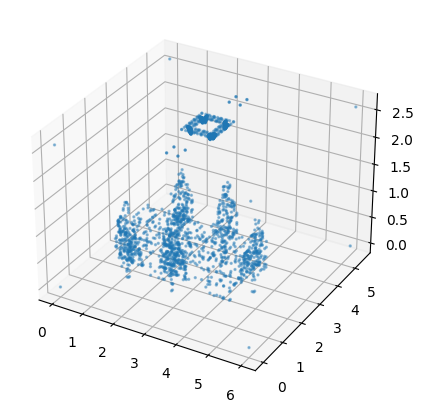

In [19]:
from matplotlib import pyplot as plt

def plot3d_points(point_cloud):
    fig = plt.figure(figsize=(5, 5))
    ax = fig.add_subplot(projection="3d")
    ax.scatter(point_cloud[:, 0], point_cloud[:, 1], point_cloud[:, 2], alpha=0.4, s=2)
    # ax.set_axis_off()
    plt.show()
    
plot3d_points(pointCloud_dict['office1'])

In [20]:
# import numpy as np
# '''
# 点群シャッフルによるデータ増強
# よく考えると無意味だと思う
# '''
# rng = np.random.default_rng()

# pointCloud_augumented_dict = {}
# for office_name, pointCloud in sampledPointCloud_dict.items():
#     pc_list = []
#     for i in range(4):
#         pc = pointCloud.copy()

#         if i >= 1:
#             #点群のシャッフル
#             rng.shuffle(pc)

#         pc_list.append(pc)

#     pointCloud_augumented_dict[office_name] = pc_list

# pointCloud_augumented_dict

In [21]:
# plot3d_points(pointCloud_augumented_dict['office10'][0])
# plot3d_points(pointCloud_augumented_dict['office10'][1])
# plot3d_points(pointCloud_augumented_dict['office10'][2])
# plot3d_points(pointCloud_augumented_dict['office10'][3])

In [22]:
# def get_augumented_dataset():
#     '''
#     点群データ増強に合わせて、メタデータや感染リスク分布のデータも複製して増やす
#     '''
#     case_index_list = list(df_total.index)
#     # case_index_list = list(df_total["casename"])


#     case_index_augumented_list = []

#     pointCloudArray_list = []
#     metaArray_list = []

#     RoI_list = []

#     for case_index in case_index_list:
#         office_name = case_index.split('_', maxsplit=1)[0]
#         pc_list = pointCloud_augumented_dict[office_name]
#         for augumentID, pointCloud in enumerate(pc_list):
#             case_index_augumented_list.append(case_index + '-' + str(augumentID))
#             pointCloudArray_list.append(pointCloud)
#             metaArray_list.append(df_meta_standardized.loc[case_index])
#             # RoI_list.append(df_total["RoI"].loc[case_index])
#             RoI_list.append(df_total["count_timeMean"].loc[case_index])

#     case_index_array = np.array(case_index_augumented_list)
#     metaArray = np.array(metaArray_list)
#     RoIArray = np.array(RoI_list)

#     pointCloudArray = np.array(pointCloudArray_list)
    
#     return case_index_array, pointCloudArray, metaArray, RoIArray

# X_index, X_pc, X_meta, y = get_augumented_dataset()

In [23]:
# def get_officeDataset(officename_list:list, df_core:pd.DataFrame, pointCloud_dict:dict, shuffle:bool):
#     """
#     Return a certain office Dataset.
#     You can specify List of offices.
#     """
    
#     df_main = pd.DataFrame()
    
#     for officename in officename_list:
#         df = df_core[ df_core["office"]==officename ]
#         df_main = pd.concat([df_main, df])
        
#     if shuffle:
#         df_main = df_main.sample(frac=1, random_state=0)
        
#     # meke Dictionary of pointCloudList in order of MainDataFrame
#     pc_list_dict = {"aircon":[], "airvent":[], "body":[], "layout":[], }
#     for officename in df_main["office"]:
#         for key, pc_list in pc_list_dict.items():
#             pc_list.append(pointCloud_dict[officename][key])
            
#     # make input-Dictionary and to ND-Array
#     input_dict = {"meta":df_main[["aircon", "ventilation", "exhaust_a", "exhaust_b", "exhaust_off", ]]}
#     for key, pc in pc_list_dict.items():
#         input_dict[f"pointCloud_{key}"] = np.array(pc)
                
#     return input_dict, df_main["countTimeMean_sit2stand"]
        

In [24]:
def get_officeDataset(
    officename_list:list,
    df_core:pd.DataFrame,
    pointCloud_dict:dict,
    objective_col:str,
    shuffle:bool,
    standardize_pointCloud=True
):
    """
    Return a certain office Dataset.
    You can specify List of offices.
    """
    
    df_main = pd.DataFrame()
    
    for officename in officename_list:
        df = df_core[ df_core["office"]==officename ]
        df_main = pd.concat([df_main, df])
        
    if shuffle:
        df_main = df_main.sample(frac=1, random_state=0)
        
    # meke Dictionary of pointCloudList in order of MainDataFrame
    pc_list = []
    for officename in df_main["office"]:
        pc_list.append(pointCloud_dict[officename])
        
    pc_array = np.array(pc_list)
    
    if standardize_pointCloud:
        pc_array = ( pc_array - pc_array.mean() ) / pc_array.std()
            
    # make input-Dictionary and to ND-Array
    input_dict = {
        "meta":df_main[["aircon", "ventilation", "exhaust_a", "exhaust_b", "exhaust_off", ]],
        "pointCloud":pc_array,
    }
                
    # return input_dict, df_main["countTimeMean_sit2stand"]
    # return input_dict, df_main["n_from2sec/S"]
    return input_dict, df_main[objective_col]
        

In [57]:
X_dict_sample, y_sample = get_officeDataset(
    list(df_ml["office"].unique()),
    df_ml, pointCloud_dict, "countTimeMean_bin",
    standardize_pointCloud=True,
    shuffle=True
)

In [58]:
X_dict_sample

{'meta':                         aircon  ventilation  exhaust_a  exhaust_b  exhaust_off
 case_name                                                                     
 office6_0_246_aout   -1.384552     1.265523   1.147695  -0.871311    -0.398249
 office5_660_0         0.446455    -1.666952  -0.871311  -0.871311     2.510993
 office15_960_82_aout  1.278731    -0.689460   1.147695  -0.871311    -0.398249
 office4_660_82_bout   0.446455    -0.689460  -0.871311   1.147695    -0.398249
 office2_360_246_aout -0.385821     1.265523   1.147695  -0.871311    -0.398249
 ...                        ...          ...        ...        ...          ...
 office10_0_246_bout  -1.384552     1.265523  -0.871311   1.147695    -0.398249
 office4_360_82_bout  -0.385821    -0.689460  -0.871311   1.147695    -0.398249
 office1_960_246_aout  1.278731     1.265523   1.147695  -0.871311    -0.398249
 office15_660_82_aout  0.446455    -0.689460   1.147695  -0.871311    -0.398249
 office6_960_0         1.278731 

In [59]:
y_sample

case_name
office6_0_246_aout      0
office5_660_0           1
office15_960_82_aout    0
office4_660_82_bout     2
office2_360_246_aout    0
                       ..
office10_0_246_bout     3
office4_360_82_bout     2
office1_960_246_aout    0
office15_660_82_aout    2
office6_960_0           2
Name: countTimeMean_bin, Length: 431, dtype: int64

In [60]:
y_sample.nunique()

4

In [29]:
# def get_dataset(df_main, df_meta):
#     '''
#     説明変数と目的変数をNDArrayに変換する
#     '''
    
#     pc_aircon_list = []
#     pc_airvent_list = []
#     pc_body_list = []
#     pc_layout_list = []
    
#     metaArray_list = []

#     RoI_list = []

#     for index, row in df_total.iterrows():
#         office_name = row["office"]
#         pc_aircon_list.append(pointCloud_dict[office_name]["aircon"])
#         pc_airvent_list.append(pointCloud_dict[office_name]["airvent"])
#         pc_body_list.append(pointCloud_dict[office_name]["body"])
#         pc_layout_list.append(pointCloud_dict[office_name]["layout"])
        
#         metaArray_list.append(df_meta_standardized.loc[index])
            
#         RoI_list.append(df_main["countTimeMean_sit2stand"].loc[index])
#         # RoI_list.append(df_main["count_timeMean"].loc[case_index])

#     officename_array = df_total["office"].to_numpy()
#     metaArray = np.array(metaArray_list)
#     RoIArray = np.array(RoI_list)

#     pc_aircon_array = np.array(pc_aircon_list)
#     pc_airvent_array = np.array(pc_airvent_list)
#     pc_body_array = np.array(pc_body_list)
#     pc_layout_array = np.array(pc_layout_list)
    
#     pc_array_dict = {"aircon":pc_aircon_array, "airvent":pc_airvent_array, "body":pc_body_array, "layout":pc_layout_array}
    
#     return officename_array, pc_array_dict, metaArray, RoIArray.reshape(-1,1)


In [30]:
# X_officename, X_pc_dict, X_meta, y = get_dataset(df_total, df_meta)

# # print(X_pc.max())
# # X_pc /= X_pc.max() #Normalization
# # print(X_pc.max())

# for key, X_pc in X_pc_dict.items():
#     #Standardization
#     X_pc_dict[key] = ( X_pc - X_pc.mean() ) / X_pc.std()
    
    
# # l_mul = map(lambda X_pc: ( X_pc - X_pc.std() ) / X_pc.std(), X_pc_list)
# # # print(list(l_mul))

# # X_pc_airvent.std()

In [61]:
import sys

def standardization_test(X:np.ndarray):
    """
    標準化されているかをテスト
    """
    threshold = 1.e-5
    
    if abs(X.mean()) > threshold:
        sys.stderr.write(f'StandardizationError: mean= {X.mean()}\n')
        
    if abs(X.std() - 1.) > threshold:
        sys.stderr.write(f'StandardizationError: std= {X.std()}')
        

In [62]:
# print(X_officename.shape)

for key, value in X_dict_sample.items():
    if key == "meta":
        for column_name, item in value.iteritems():
            X = item.values
            standardization_test(X)
            print(column_name)
            print(X.shape, X.mean(), X.std())
        
    else:
        standardization_test(value)
        
        standardization_test(X)
        print(key)
        print(X.shape, X.mean(), X.std())
    
# print(X_meta.shape, X_meta.mean(), X_meta.var())

# print(y.shape, y.mean(), y.var())

aircon
(431,) 5.976142499142374e-17 1.0
ventilation
(431,) 1.772235361814635e-16 0.9999999999999999
exhaust_a
(431,) -4.12147758561543e-17 0.9999999999999999
exhaust_b
(431,) -2.472886551369258e-17 0.9999999999999998
exhaust_off
(431,) -2.2668126720884866e-17 1.0
pointCloud
(431,) -2.2668126720884866e-17 1.0


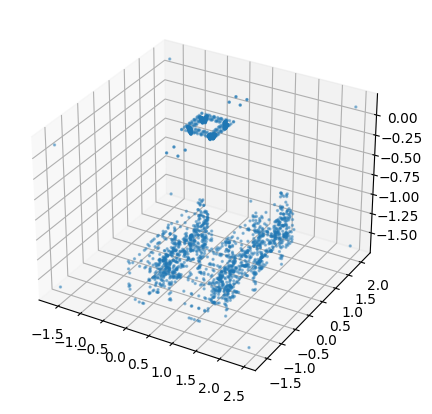

In [33]:
plot3d_points(X_dict_sample["pointCloud"][0, :,:])

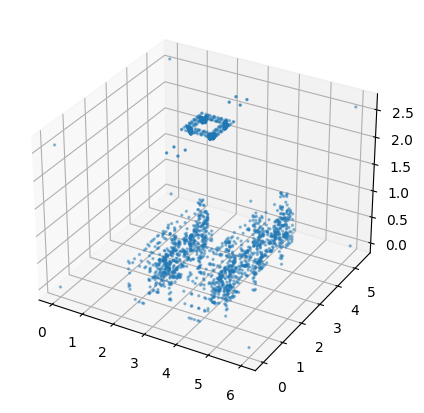

In [34]:
plot3d_points(pointCloud_dict["office6"])

# チューニング

In [169]:
# office_list = list(df_total["office"].unique())
# # office_list = ["office1", "office2", "office3", "office4", "office5", "office6", ]

# office_list

In [160]:
# test_office_list = ["office1", "office7", "office10", "office16", "office22", "office28", ]
test_office_list = ["office1", "office7", "office10", "office16", "office28", ]
# test_office_list = office_list

test_office_list

['office1', 'office7', 'office10', 'office16', 'office28']

In [170]:
idealOffice_list = []

for office in office_list:
    df_office = df_total[df_total["office"]==office]
    if df_office["countTimeMean_bin"].nunique() == 4:
        idealOffice_list.append(office)
        

office_list = idealOffice_list
office_list

['office2',
 'office15',
 'office14',
 'office1',
 'office16',
 'office7',
 'office10',
 'office28',
 'office5']

In [37]:
from tensorflow.python.client import device_lib; print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 12977095142919276741
xla_global_id: -1
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 9739763712
locality {
  bus_id: 1
  links {
  }
}
incarnation: 12932115773935301294
physical_device_desc: "device: 0, name: NVIDIA GeForce RTX 3080 Ti, pci bus id: 0000:06:00.0, compute capability: 8.6"
xla_global_id: 416903419
]


2022-12-22 03:12:04.786663: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1553] Created device /device:GPU:0 with 9288 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 3080 Ti, pci bus id: 0000:06:00.0, compute capability: 8.6


In [38]:
# def conv_bn(x, filters):
#     x = layers.Conv1D(filters, kernel_size=1, padding="valid")(x)
#     x = layers.BatchNormalization(momentum=0.0)(x)
#     return layers.Activation("relu")(x)


In [68]:
from tensorflow import keras
import PointNet

def myPointNet(trial, input_pointCloud:keras.Input):
        
    hp_conv_layers = trial.suggest_int('conv_layers', 1, 3, step=1)
    
    x = input_pointCloud
    for i in range(hp_conv_layers):
        hp_filters = trial.suggest_int(f'filters-{i}', 32, 256, step=32)
        
        x = PointNet.conv_bn(x, hp_filters)
        
#         x = keras.layers.Conv1D(hp_filters, kernel_size=1, padding="valid")(x)
#         x = keras.layers.BatchNormalization(momentum=0.99)(x)       
#         x = keras.layers.ReLU()(x)
    
    return keras.layers.GlobalMaxPooling1D()(x)

In [195]:
from PointNet import conv_bn
from tensorflow import keras

db_path = '/mnt/MachineLearning/OptunaLog/classification_countTimeMean_ideal_accObjective.db'


def total_model_builder(trial):
    """
    感染リスク分布予測モデル

    順序不変性モデルに、メタデータ（空調条件）を合流させ、MLPで感染リスク予測

    KerasTunerから呼び出され、ハイパーパラメータをチューニングする
    """
    
    input_list = []
    features_list = []
    for key, value in X_dict_sample.items():
        if key == "meta":
            # MetaData
            input_meta = keras.Input(shape=(len(value.columns), ), name='meta')
            
            # append metaData to input_list
            input_list.append(input_meta)

            # append metaData to features_list
            features_list.append(input_meta)
            
        elif key == "pointCloud":
            # PointCloud
            input_pc = keras.Input(shape=(value.shape[1], 3), name=key)

            # append pointClouds to input_list
            input_list.append(input_pc)

            # append feturesOfPointClouds to features_list
            features_list.append(myPointNet(trial, input_pointCloud=input_pc))
        
    
    x = keras.layers.Concatenate()(features_list)
    
    hp_dense_layers = trial.suggest_int('dense_layers', 0, 4, step=1)
    if hp_dense_layers > 0:
        hp_activation = trial.suggest_categorical('activation', ["ReLU", "LeakyReLU", "ELU"])
        hp_dropout = trial.suggest_categorical('dropout', [None, 0.3, 0.5])
    
    for i in range(hp_dense_layers):
        hp_units = trial.suggest_int(f'units-{i}', 64, 512, step=64)
        x = keras.layers.Dense(hp_units)(x)
        
        if hp_activation == "ReLU":
            x = keras.layers.ReLU()(x)
        elif hp_activation == "LeakyReLU":
            x = keras.layers.LeakyReLU()(x)
        elif hp_activation == "ELU":
            x = keras.layers.ELU()(x)
            
        if hp_dropout is not None:
            x = keras.layers.Dropout(hp_dropout)(x)

    x = keras.layers.Dense(y_sample.nunique())(x)
    outputs = keras.layers.Softmax()(x)

#     hp_learning_rate = hp.Choice('learning_rate', values = [1e-2, 1e-3, 1e-4]) 
    hp_learning_rate = trial.suggest_float('lr', 1e-5, 1e-1, log=True)
    model = keras.Model(inputs=input_list, outputs=outputs, name="predictionnet")
    model.compile(
        optimizer=keras.optimizers.Adam(learning_rate=hp_learning_rate),
#         optimizer=keras.optimizers.RMSprop(learning_rate=hp_learning_rate),
        # loss='mse',
        # metrics=['mae'],
        loss='sparse_categorical_crossentropy',
        metrics=["sparse_categorical_accuracy"],
        )

    return model


from tensorflow.keras.callbacks import EarlyStopping
import optuna
from keras.backend import clear_session

# 1. Define an objective function to be maximized.
# def objective(trial, X_dict_train, y_train, X_dict_val, y_val):
def objective(trial, fit_office_list, val_office_list):
    # Clear clutter from previous Keras session graphs.
    clear_session()
    print("*** clear_session() occured ! ***")
    
    acc_min_list = []
    for val_office in val_office_list:
        
        train_office_list = [office for office in fit_office_list if office != val_office]
    
        X_dict_train, y_train = get_officeDataset(train_office_list, 
                                                  df_ml, pointCloud_dict, "countTimeMean_bin",
                                                  standardize_pointCloud=True, shuffle=True)
        X_dict_val, y_val = get_officeDataset([val_office],
                                              df_ml, pointCloud_dict, "countTimeMean_bin",
                                              standardize_pointCloud=True, shuffle=False)
    
        model = total_model_builder(trial)

        hp_batch_size = trial.suggest_categorical('batch_size', [1, 4, 16, 32, 64, 128])
    #     hp_batch_size = trial.suggest_categorical('batch_size', [1, 4, 16, 64, 128, 256, 512])

        history = model.fit(
            X_dict_train, y_train,
            validation_data = (X_dict_val, y_val),
            epochs = 200,
            batch_size=hp_batch_size,
            # callbacks = [EarlyStopping(monitor='val_loss', min_delta=0.0, patience=10)],
            callbacks = [EarlyStopping(monitor='val_sparse_categorical_accuracy', min_delta=0.0, patience=10)],
            verbose=False,
        )

        #履歴の最後の１０エポック
        # val_loss_list = history.history['val_loss'][-10:] #List of MSE
        val_acc_list = history.history['val_sparse_categorical_accuracy'][-10:] #List of Accuracy
        
        # evaluate = model.evaluate({'pointCloud':X_pc_val, 'meta':X_meta_val}, y_val, verbose=0)

        # mse_max = np.max(val_loss_list) #終盤の誤差の最大値（振動抑制が目的）
        acc_min = np.min(val_acc_list) #終盤のaccのmin（振動抑制が目的）
        acc_min_list.append(acc_min)
        
        print("(train, val): ", ([s.replace('office', '') for s in train_office_list], val_office), acc_min)

    #交差検証の結果の平均値を目的関数
    return np.mean(acc_min_list)#, np.mean(mse_min_list)


db_path

'/mnt/MachineLearning/OptunaLog/classification_countTimeMean_ideal_accObjective.db'

In [196]:
"""
最終テスト用オフィスを切り替えながらチューニング実行
"""

for test_office in test_office_list:
    print("test_office:", test_office)
    
    study_name = test_office + '_is_test'
    
    fit_office_list = [office for office in idealOffice_list if office != test_office]
    val_office_list = [val_office for val_office in test_office_list if val_office != test_office]
    
    #============= OPTUNA Optimization with RandomSampler =======================
    
    study = optuna.create_study(
        sampler=optuna.samplers.RandomSampler(),
        direction='maximize',#'minimize',
        study_name=study_name,
        storage='sqlite:///'+db_path,
        load_if_exists=True
    )

    study.optimize(
        lambda trial: objective(trial, fit_office_list, val_office_list),
        n_trials=100,
        gc_after_trial=True
    )
    
    #=========================================================================
    
    
    #============= OPTUNA Optimization with TPESampler =======================
    
    study = optuna.create_study(
        sampler=optuna.samplers.TPESampler(),
        direction='maximize',#'minimize',
        study_name=study_name,
        storage='sqlite:///'+db_path,
        load_if_exists=True
    )
    
    study.optimize(
        lambda trial: objective(trial, fit_office_list, val_office_list),
        n_trials=100,
        gc_after_trial=True
    )
    
    #=========================================================================


test_office: office1


[I 2022-12-27 05:38:03,924] A new study created in RDB with name: office1_is_test


*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office7') 0.1428571492433548
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office10') 0.0357142873108387
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office16') 0.1785714328289032


[I 2022-12-27 05:38:15,310] Trial 0 finished with value: 0.13392857555299997 and parameters: {'conv_layers': 2, 'filters-0': 64, 'filters-1': 64, 'dense_layers': 2, 'activation': 'ELU', 'dropout': None, 'units-0': 256, 'units-1': 128, 'lr': 0.00964409534222118, 'batch_size': 16}. Best is trial 0 with value: 0.13392857555299997.


(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office28') 0.1785714328289032
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office7') 0.3214285671710968
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office10') 0.1071428582072258
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office16') 0.0714285746216774


[I 2022-12-27 05:38:24,932] Trial 1 finished with value: 0.1696428582072258 and parameters: {'conv_layers': 1, 'filters-0': 32, 'dense_layers': 1, 'activation': 'ELU', 'dropout': 0.5, 'units-0': 448, 'lr': 0.0005022653332158016, 'batch_size': 64}. Best is trial 1 with value: 0.1696428582072258.


(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office28') 0.1785714328289032
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office7') 0.2142857164144516
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office10') 0.0357142873108387
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office16') 0.1071428582072258


[I 2022-12-27 05:38:39,623] Trial 2 finished with value: 0.10714285913854837 and parameters: {'conv_layers': 3, 'filters-0': 128, 'filters-1': 32, 'filters-2': 160, 'dense_layers': 0, 'lr': 0.0033750517442834335, 'batch_size': 16}. Best is trial 1 with value: 0.1696428582072258.


(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office28') 0.0714285746216774
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office7') 0.1428571492433548
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office10') 0.0357142873108387
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office16') 0.0714285746216774


[I 2022-12-27 05:38:53,507] Trial 3 finished with value: 0.10714286100119352 and parameters: {'conv_layers': 3, 'filters-0': 256, 'filters-1': 64, 'filters-2': 192, 'dense_layers': 4, 'activation': 'ReLU', 'dropout': None, 'units-0': 128, 'units-1': 256, 'units-2': 128, 'units-3': 64, 'lr': 0.005580082576556453, 'batch_size': 64}. Best is trial 1 with value: 0.1696428582072258.


(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office28') 0.1785714328289032
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office7') 0.1428571492433548
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office10') 0.0357142873108387
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office16') 0.0714285746216774


[I 2022-12-27 05:39:24,928] Trial 4 finished with value: 0.08035714644938707 and parameters: {'conv_layers': 2, 'filters-0': 96, 'filters-1': 224, 'dense_layers': 2, 'activation': 'ELU', 'dropout': None, 'units-0': 384, 'units-1': 64, 'lr': 0.008324988487263667, 'batch_size': 1}. Best is trial 1 with value: 0.1696428582072258.


(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office28') 0.0714285746216774
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office7') 0.1428571492433548
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office10') 0.0357142873108387
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office16') 0.0714285746216774


[I 2022-12-27 05:39:39,716] Trial 5 finished with value: 0.14285714458674192 and parameters: {'conv_layers': 1, 'filters-0': 224, 'dense_layers': 1, 'activation': 'ELU', 'dropout': None, 'units-0': 384, 'lr': 1.2673465825352792e-05, 'batch_size': 4}. Best is trial 1 with value: 0.1696428582072258.


(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office28') 0.3214285671710968
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office7') 0.1428571492433548
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office10') 0.0357142873108387
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office16') 0.5357142686843872


[I 2022-12-27 05:39:50,008] Trial 6 finished with value: 0.2767857098951936 and parameters: {'conv_layers': 1, 'filters-0': 160, 'dense_layers': 3, 'activation': 'ReLU', 'dropout': None, 'units-0': 512, 'units-1': 256, 'units-2': 256, 'lr': 0.017772605916740198, 'batch_size': 4}. Best is trial 6 with value: 0.2767857098951936.


(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office28') 0.3928571343421936
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office7') 0.5
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office10') 0.0357142873108387
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office16') 0.3928571343421936


[I 2022-12-27 05:40:02,991] Trial 7 finished with value: 0.285714284516871 and parameters: {'conv_layers': 3, 'filters-0': 32, 'filters-1': 224, 'filters-2': 224, 'dense_layers': 2, 'activation': 'ELU', 'dropout': 0.3, 'units-0': 384, 'units-1': 256, 'lr': 1.680476629159549e-05, 'batch_size': 16}. Best is trial 7 with value: 0.285714284516871.


(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office28') 0.2142857164144516
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office7') 0.1428571492433548
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office10') 0.0357142873108387
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office16') 0.0714285746216774


[I 2022-12-27 05:40:14,908] Trial 8 finished with value: 0.08035714644938707 and parameters: {'conv_layers': 3, 'filters-0': 160, 'filters-1': 256, 'filters-2': 256, 'dense_layers': 0, 'lr': 0.00045024100769991654, 'batch_size': 128}. Best is trial 7 with value: 0.285714284516871.


(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office28') 0.0714285746216774
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office7') 0.5
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office10') 0.0357142873108387
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office16') 0.0714285746216774


[I 2022-12-27 05:40:23,183] Trial 9 finished with value: 0.16964285913854837 and parameters: {'conv_layers': 1, 'filters-0': 160, 'dense_layers': 3, 'activation': 'LeakyReLU', 'dropout': None, 'units-0': 448, 'units-1': 256, 'units-2': 256, 'lr': 1.55567711571156e-05, 'batch_size': 32}. Best is trial 7 with value: 0.285714284516871.


(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office28') 0.0714285746216774
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office7') 0.1428571492433548
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office10') 0.0357142873108387
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office16') 0.0714285746216774


[I 2022-12-27 05:40:39,525] Trial 10 finished with value: 0.08035714644938707 and parameters: {'conv_layers': 3, 'filters-0': 224, 'filters-1': 224, 'filters-2': 256, 'dense_layers': 4, 'activation': 'ELU', 'dropout': 0.5, 'units-0': 128, 'units-1': 64, 'units-2': 512, 'units-3': 64, 'lr': 0.0036941952947604005, 'batch_size': 16}. Best is trial 7 with value: 0.285714284516871.


(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office28') 0.0714285746216774
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office7') 0.1428571492433548
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office10') 0.6428571343421936
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office16') 0.0714285746216774


[I 2022-12-27 05:40:48,116] Trial 11 finished with value: 0.2321428582072258 and parameters: {'conv_layers': 1, 'filters-0': 160, 'dense_layers': 3, 'activation': 'LeakyReLU', 'dropout': 0.5, 'units-0': 64, 'units-1': 64, 'units-2': 192, 'lr': 1.3863635447948253e-05, 'batch_size': 64}. Best is trial 7 with value: 0.285714284516871.


(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office28') 0.0714285746216774
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office7') 0.3214285671710968
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office10') 0.1428571492433548
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office16') 0.2142857164144516


[I 2022-12-27 05:41:01,742] Trial 12 finished with value: 0.25 and parameters: {'conv_layers': 2, 'filters-0': 64, 'filters-1': 160, 'dense_layers': 1, 'activation': 'ReLU', 'dropout': None, 'units-0': 448, 'lr': 0.01812870016985019, 'batch_size': 4}. Best is trial 7 with value: 0.285714284516871.


(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office28') 0.3214285671710968
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office7') 0.5
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office10') 0.0357142873108387
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office16') 0.1428571492433548


[I 2022-12-27 05:41:13,910] Trial 13 finished with value: 0.19642857369035482 and parameters: {'conv_layers': 3, 'filters-0': 224, 'filters-1': 64, 'filters-2': 160, 'dense_layers': 1, 'activation': 'ELU', 'dropout': 0.3, 'units-0': 192, 'lr': 0.00013084706746464175, 'batch_size': 16}. Best is trial 7 with value: 0.285714284516871.


(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office28') 0.1071428582072258
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office7') 0.1428571492433548
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office10') 0.1071428582072258
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office16') 0.1785714328289032


[I 2022-12-27 05:41:45,468] Trial 14 finished with value: 0.16964286006987095 and parameters: {'conv_layers': 1, 'filters-0': 64, 'dense_layers': 2, 'activation': 'LeakyReLU', 'dropout': None, 'units-0': 128, 'units-1': 384, 'lr': 0.0003232339836118022, 'batch_size': 1}. Best is trial 7 with value: 0.285714284516871.


(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office28') 0.25
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office7') 0.1428571492433548
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office10') 0.0357142873108387
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office16') 0.0714285746216774


[I 2022-12-27 05:41:58,484] Trial 15 finished with value: 0.08035714644938707 and parameters: {'conv_layers': 1, 'filters-0': 192, 'dense_layers': 3, 'activation': 'ELU', 'dropout': None, 'units-0': 64, 'units-1': 384, 'units-2': 192, 'lr': 0.0022272394976842773, 'batch_size': 4}. Best is trial 7 with value: 0.285714284516871.


(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office28') 0.0714285746216774
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office7') 0.3928571343421936
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office10') 0.0714285746216774
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office16') 0.3928571343421936


[I 2022-12-27 05:42:07,359] Trial 16 finished with value: 0.28571428544819355 and parameters: {'conv_layers': 1, 'filters-0': 96, 'dense_layers': 2, 'activation': 'LeakyReLU', 'dropout': None, 'units-0': 256, 'units-1': 512, 'lr': 0.008597279069147992, 'batch_size': 16}. Best is trial 16 with value: 0.28571428544819355.


(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office28') 0.2857142984867096
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office7') 0.1428571492433548
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office10') 0.0357142873108387
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office16') 0.3928571343421936


[I 2022-12-27 05:42:20,578] Trial 17 finished with value: 0.16071428637951612 and parameters: {'conv_layers': 3, 'filters-0': 192, 'filters-1': 128, 'filters-2': 224, 'dense_layers': 0, 'lr': 0.007257720273574599, 'batch_size': 128}. Best is trial 16 with value: 0.28571428544819355.


(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office28') 0.0714285746216774
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office7') 0.1428571492433548
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office10') 0.0357142873108387
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office16') 0.3928571343421936


[I 2022-12-27 05:42:28,161] Trial 18 finished with value: 0.16071428637951612 and parameters: {'conv_layers': 1, 'filters-0': 128, 'dense_layers': 2, 'activation': 'ELU', 'dropout': 0.3, 'units-0': 128, 'units-1': 448, 'lr': 0.0003740769289909829, 'batch_size': 32}. Best is trial 16 with value: 0.28571428544819355.


(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office28') 0.0714285746216774
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office7') 0.5
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office10') 0.0357142873108387
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office16') 0.0714285746216774


[I 2022-12-27 05:42:40,076] Trial 19 finished with value: 0.20535714458674192 and parameters: {'conv_layers': 3, 'filters-0': 192, 'filters-1': 224, 'filters-2': 128, 'dense_layers': 1, 'activation': 'ELU', 'dropout': 0.5, 'units-0': 64, 'lr': 0.002651872510513909, 'batch_size': 128}. Best is trial 16 with value: 0.28571428544819355.


(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office28') 0.2142857164144516
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office7') 0.1428571492433548
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office10') 0.0357142873108387
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office16') 0.0714285746216774


[I 2022-12-27 05:42:55,526] Trial 20 finished with value: 0.16071428637951612 and parameters: {'conv_layers': 3, 'filters-0': 192, 'filters-1': 224, 'filters-2': 256, 'dense_layers': 3, 'activation': 'ELU', 'dropout': 0.5, 'units-0': 448, 'units-1': 128, 'units-2': 192, 'lr': 0.00023461746128279382, 'batch_size': 16}. Best is trial 16 with value: 0.28571428544819355.


(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office28') 0.3928571343421936
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office7') 0.1428571492433548
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office10') 0.0357142873108387
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office16') 0.0714285746216774


[I 2022-12-27 05:43:04,318] Trial 21 finished with value: 0.14285714458674192 and parameters: {'conv_layers': 1, 'filters-0': 256, 'dense_layers': 4, 'activation': 'LeakyReLU', 'dropout': 0.3, 'units-0': 192, 'units-1': 448, 'units-2': 128, 'units-3': 512, 'lr': 2.0620837597316588e-05, 'batch_size': 128}. Best is trial 16 with value: 0.28571428544819355.


(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office28') 0.3214285671710968
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office7') 0.5
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office10') 0.0357142873108387
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office16') 0.1785714328289032


[I 2022-12-27 05:43:18,844] Trial 22 finished with value: 0.19642857369035482 and parameters: {'conv_layers': 3, 'filters-0': 64, 'filters-1': 192, 'filters-2': 224, 'dense_layers': 1, 'activation': 'ELU', 'dropout': 0.5, 'units-0': 192, 'lr': 7.570502821171069e-05, 'batch_size': 32}. Best is trial 16 with value: 0.28571428544819355.


(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office28') 0.0714285746216774
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office7') 0.2142857164144516
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office10') 0.0714285746216774
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office16') 0.2142857164144516


[I 2022-12-27 05:43:31,339] Trial 23 finished with value: 0.1428571455180645 and parameters: {'conv_layers': 3, 'filters-0': 96, 'filters-1': 64, 'filters-2': 32, 'dense_layers': 0, 'lr': 0.0005005074084240298, 'batch_size': 16}. Best is trial 16 with value: 0.28571428544819355.


(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office28') 0.0714285746216774
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office7') 0.1428571492433548
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office10') 0.1071428582072258
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office16') 0.1785714328289032


[I 2022-12-27 05:43:40,410] Trial 24 finished with value: 0.16964286006987095 and parameters: {'conv_layers': 2, 'filters-0': 64, 'filters-1': 192, 'dense_layers': 0, 'lr': 0.052300005635749935, 'batch_size': 128}. Best is trial 16 with value: 0.28571428544819355.


(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office28') 0.25
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office7') 0.1428571492433548
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office10') 0.0357142873108387
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office16') 0.0714285746216774


[I 2022-12-27 05:43:49,977] Trial 25 finished with value: 0.16071428637951612 and parameters: {'conv_layers': 2, 'filters-0': 128, 'filters-1': 96, 'dense_layers': 3, 'activation': 'ELU', 'dropout': 0.5, 'units-0': 192, 'units-1': 320, 'units-2': 128, 'lr': 1.5079363230090875e-05, 'batch_size': 64}. Best is trial 16 with value: 0.28571428544819355.


(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office28') 0.3928571343421936
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office7') 0.1428571492433548
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office10') 0.1071428582072258
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office16') 0.2142857164144516


[I 2022-12-27 05:44:02,019] Trial 26 finished with value: 0.1339285746216774 and parameters: {'conv_layers': 3, 'filters-0': 128, 'filters-1': 224, 'filters-2': 64, 'dense_layers': 0, 'lr': 1.0604604998539741e-05, 'batch_size': 64}. Best is trial 16 with value: 0.28571428544819355.


(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office28') 0.0714285746216774
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office7') 0.2857142984867096
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office10') 0.0357142873108387
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office16') 0.2142857164144516


[I 2022-12-27 05:44:14,669] Trial 27 finished with value: 0.17857143376022577 and parameters: {'conv_layers': 2, 'filters-0': 192, 'filters-1': 224, 'dense_layers': 3, 'activation': 'LeakyReLU', 'dropout': 0.5, 'units-0': 512, 'units-1': 384, 'units-2': 384, 'lr': 0.08933690482098412, 'batch_size': 32}. Best is trial 16 with value: 0.28571428544819355.


(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office28') 0.1785714328289032
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office7') 0.1428571492433548
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office10') 0.1071428582072258
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office16') 0.1785714328289032


[I 2022-12-27 05:44:26,036] Trial 28 finished with value: 0.16964286006987095 and parameters: {'conv_layers': 2, 'filters-0': 96, 'filters-1': 256, 'dense_layers': 0, 'lr': 0.0006279687598979611, 'batch_size': 16}. Best is trial 16 with value: 0.28571428544819355.


(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office28') 0.25
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office7') 0.2142857164144516
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office10') 0.1071428582072258
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office16') 0.1428571492433548


[I 2022-12-27 05:45:12,678] Trial 29 finished with value: 0.16964286006987095 and parameters: {'conv_layers': 3, 'filters-0': 96, 'filters-1': 160, 'filters-2': 64, 'dense_layers': 0, 'lr': 0.004689435987622179, 'batch_size': 1}. Best is trial 16 with value: 0.28571428544819355.


(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office28') 0.2142857164144516
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office7') 0.5
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office10') 0.0357142873108387
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office16') 0.1071428582072258


[I 2022-12-27 05:45:23,837] Trial 30 finished with value: 0.17857143003493547 and parameters: {'conv_layers': 1, 'filters-0': 128, 'dense_layers': 2, 'activation': 'ReLU', 'dropout': None, 'units-0': 128, 'units-1': 320, 'lr': 1.1659609196608301e-05, 'batch_size': 4}. Best is trial 16 with value: 0.28571428544819355.


(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office28') 0.0714285746216774
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office7') 0.1428571492433548
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office10') 0.0357142873108387
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office16') 0.1071428582072258


[I 2022-12-27 05:45:32,104] Trial 31 finished with value: 0.12500000279396772 and parameters: {'conv_layers': 1, 'filters-0': 224, 'dense_layers': 3, 'activation': 'LeakyReLU', 'dropout': 0.3, 'units-0': 320, 'units-1': 256, 'units-2': 256, 'lr': 0.001149403748007159, 'batch_size': 128}. Best is trial 16 with value: 0.28571428544819355.


(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office28') 0.2142857164144516
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office7') 0.2857142984867096
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office10') 0.0357142873108387
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office16') 0.2142857164144516


[I 2022-12-27 05:45:42,124] Trial 32 finished with value: 0.15178571920841932 and parameters: {'conv_layers': 2, 'filters-0': 32, 'filters-1': 96, 'dense_layers': 2, 'activation': 'ReLU', 'dropout': 0.3, 'units-0': 512, 'units-1': 256, 'lr': 0.0002106568229985296, 'batch_size': 32}. Best is trial 16 with value: 0.28571428544819355.


(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office28') 0.0714285746216774
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office7') 0.1785714328289032
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office10') 0.1071428582072258
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office16') 0.0714285746216774


[I 2022-12-27 05:46:28,187] Trial 33 finished with value: 0.10714286006987095 and parameters: {'conv_layers': 2, 'filters-0': 224, 'filters-1': 96, 'dense_layers': 3, 'activation': 'ELU', 'dropout': 0.5, 'units-0': 320, 'units-1': 320, 'units-2': 512, 'lr': 0.0004028342062053836, 'batch_size': 1}. Best is trial 16 with value: 0.28571428544819355.


(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office28') 0.0714285746216774
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office7') 0.3928571343421936
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office10') 0.0
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office16') 0.0357142873108387


[I 2022-12-27 05:46:37,862] Trial 34 finished with value: 0.12499999906867743 and parameters: {'conv_layers': 2, 'filters-0': 160, 'filters-1': 96, 'dense_layers': 0, 'lr': 0.0005790619523703562, 'batch_size': 64}. Best is trial 16 with value: 0.28571428544819355.


(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office28') 0.0714285746216774
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office7') 0.2142857164144516
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office10') 0.0357142873108387
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office16') 0.0714285746216774


[I 2022-12-27 05:46:48,303] Trial 35 finished with value: 0.09821428824216127 and parameters: {'conv_layers': 1, 'filters-0': 192, 'dense_layers': 0, 'lr': 0.022729285798600337, 'batch_size': 32}. Best is trial 16 with value: 0.28571428544819355.


(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office28') 0.0714285746216774
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office7') 0.1785714328289032
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office10') 0.0357142873108387
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office16') 0.2142857164144516


[I 2022-12-27 05:46:55,737] Trial 36 finished with value: 0.16964285913854837 and parameters: {'conv_layers': 1, 'filters-0': 160, 'dense_layers': 0, 'lr': 0.0006389833246121994, 'batch_size': 128}. Best is trial 16 with value: 0.28571428544819355.


(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office28') 0.25
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office7') 0.1428571492433548
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office10') 0.1071428582072258
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office16') 0.0357142873108387


[I 2022-12-27 05:47:39,521] Trial 37 finished with value: 0.08928571734577417 and parameters: {'conv_layers': 2, 'filters-0': 128, 'filters-1': 32, 'dense_layers': 0, 'lr': 0.0008508908464182069, 'batch_size': 1}. Best is trial 16 with value: 0.28571428544819355.


(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office28') 0.0714285746216774
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office7') 0.1428571492433548
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office10') 0.0357142873108387
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office16') 0.0714285746216774


[I 2022-12-27 05:47:52,963] Trial 38 finished with value: 0.08035714644938707 and parameters: {'conv_layers': 1, 'filters-0': 256, 'dense_layers': 4, 'activation': 'ReLU', 'dropout': 0.3, 'units-0': 320, 'units-1': 384, 'units-2': 512, 'units-3': 256, 'lr': 0.0002628747321771212, 'batch_size': 4}. Best is trial 16 with value: 0.28571428544819355.


(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office28') 0.0714285746216774
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office7') 0.1428571492433548
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office10') 0.0357142873108387
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office16') 0.1428571492433548


[I 2022-12-27 05:48:03,513] Trial 39 finished with value: 0.09821429010480642 and parameters: {'conv_layers': 3, 'filters-0': 32, 'filters-1': 160, 'filters-2': 128, 'dense_layers': 0, 'lr': 0.0006610810592724836, 'batch_size': 128}. Best is trial 16 with value: 0.28571428544819355.


(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office28') 0.0714285746216774
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office7') 0.1428571492433548
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office10') 0.0357142873108387
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office16') 0.1428571492433548


[I 2022-12-27 05:48:14,263] Trial 40 finished with value: 0.16964286286383867 and parameters: {'conv_layers': 2, 'filters-0': 256, 'filters-1': 96, 'dense_layers': 3, 'activation': 'ReLU', 'dropout': 0.5, 'units-0': 448, 'units-1': 384, 'units-2': 448, 'lr': 0.00552008362589448, 'batch_size': 128}. Best is trial 16 with value: 0.28571428544819355.


(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office28') 0.3571428656578064
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office7') 0.5357142686843872
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office10') 0.0357142873108387
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office16') 0.0714285746216774


[I 2022-12-27 05:48:24,688] Trial 41 finished with value: 0.19642856996506453 and parameters: {'conv_layers': 1, 'filters-0': 64, 'dense_layers': 2, 'activation': 'LeakyReLU', 'dropout': None, 'units-0': 384, 'units-1': 512, 'lr': 0.00023780373265775922, 'batch_size': 64}. Best is trial 16 with value: 0.28571428544819355.


(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office28') 0.1428571492433548
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office7') 0.1785714328289032
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office10') 0.0357142873108387
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office16') 0.1785714328289032


[I 2022-12-27 05:48:44,634] Trial 42 finished with value: 0.16071428824216127 and parameters: {'conv_layers': 3, 'filters-0': 224, 'filters-1': 128, 'filters-2': 128, 'dense_layers': 3, 'activation': 'LeakyReLU', 'dropout': 0.3, 'units-0': 256, 'units-1': 384, 'units-2': 384, 'lr': 0.03502210539298701, 'batch_size': 16}. Best is trial 16 with value: 0.28571428544819355.


(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office28') 0.25
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office7') 0.1428571492433548
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office10') 0.0357142873108387
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office16') 0.0357142873108387


[I 2022-12-27 05:48:53,406] Trial 43 finished with value: 0.13392857275903225 and parameters: {'conv_layers': 1, 'filters-0': 256, 'dense_layers': 1, 'activation': 'ReLU', 'dropout': None, 'units-0': 448, 'lr': 5.479460825313395e-05, 'batch_size': 128}. Best is trial 16 with value: 0.28571428544819355.


(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office28') 0.3214285671710968
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office7') 0.5
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office10') 0.1428571492433548
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office16') 0.6071428656578064


[I 2022-12-27 05:49:05,915] Trial 44 finished with value: 0.348214291036129 and parameters: {'conv_layers': 2, 'filters-0': 160, 'filters-1': 32, 'dense_layers': 1, 'activation': 'ELU', 'dropout': 0.5, 'units-0': 320, 'lr': 0.0017080779911020914, 'batch_size': 16}. Best is trial 44 with value: 0.348214291036129.


(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office28') 0.1428571492433548
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office7') 0.5
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office10') 0.0357142873108387
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office16') 0.5357142686843872


[I 2022-12-27 05:49:18,681] Trial 45 finished with value: 0.3660714225843549 and parameters: {'conv_layers': 3, 'filters-0': 32, 'filters-1': 224, 'filters-2': 64, 'dense_layers': 4, 'activation': 'ReLU', 'dropout': 0.5, 'units-0': 64, 'units-1': 256, 'units-2': 128, 'units-3': 512, 'lr': 0.012468599015306085, 'batch_size': 128}. Best is trial 45 with value: 0.3660714225843549.


(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office28') 0.3928571343421936
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office7') 0.1428571492433548
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office10') 0.0357142873108387
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office16') 0.0714285746216774


[I 2022-12-27 05:49:29,256] Trial 46 finished with value: 0.08035714644938707 and parameters: {'conv_layers': 2, 'filters-0': 32, 'filters-1': 192, 'dense_layers': 4, 'activation': 'ReLU', 'dropout': 0.5, 'units-0': 320, 'units-1': 64, 'units-2': 128, 'units-3': 448, 'lr': 0.040064434594758294, 'batch_size': 64}. Best is trial 45 with value: 0.3660714225843549.


(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office28') 0.0714285746216774
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office7') 0.5
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office10') 0.0357142873108387
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office16') 0.0714285746216774


[I 2022-12-27 05:49:39,614] Trial 47 finished with value: 0.16964285913854837 and parameters: {'conv_layers': 2, 'filters-0': 128, 'filters-1': 192, 'dense_layers': 2, 'activation': 'LeakyReLU', 'dropout': 0.3, 'units-0': 192, 'units-1': 320, 'lr': 0.0009244294712195782, 'batch_size': 128}. Best is trial 45 with value: 0.3660714225843549.


(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office28') 0.0714285746216774
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office7') 0.1428571492433548
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office10') 0.0357142873108387
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office16') 0.2142857164144516


[I 2022-12-27 05:49:53,765] Trial 48 finished with value: 0.11607143189758062 and parameters: {'conv_layers': 2, 'filters-0': 64, 'filters-1': 224, 'dense_layers': 3, 'activation': 'ELU', 'dropout': 0.3, 'units-0': 512, 'units-1': 320, 'units-2': 192, 'lr': 0.0008247039851177919, 'batch_size': 16}. Best is trial 45 with value: 0.3660714225843549.


(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office28') 0.0714285746216774
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office7') 0.3214285671710968
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office10') 0.0357142873108387
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office16') 0.0714285746216774


[I 2022-12-27 05:50:06,440] Trial 49 finished with value: 0.20535714086145163 and parameters: {'conv_layers': 1, 'filters-0': 192, 'dense_layers': 1, 'activation': 'ReLU', 'dropout': 0.5, 'units-0': 320, 'lr': 0.0014390302319928479, 'batch_size': 4}. Best is trial 45 with value: 0.3660714225843549.


(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office28') 0.3928571343421936
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office7') 0.2142857164144516
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office10') 0.0357142873108387
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office16') 0.2857142984867096


[I 2022-12-27 05:50:17,373] Trial 50 finished with value: 0.15178571920841932 and parameters: {'conv_layers': 2, 'filters-0': 128, 'filters-1': 192, 'dense_layers': 1, 'activation': 'ReLU', 'dropout': 0.5, 'units-0': 256, 'lr': 0.0006098034415413057, 'batch_size': 128}. Best is trial 45 with value: 0.3660714225843549.


(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office28') 0.0714285746216774
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office7') 0.2142857164144516
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office10') 0.0357142873108387
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office16') 0.1785714328289032


[I 2022-12-27 05:50:31,648] Trial 51 finished with value: 0.12500000279396772 and parameters: {'conv_layers': 3, 'filters-0': 256, 'filters-1': 128, 'filters-2': 224, 'dense_layers': 1, 'activation': 'ReLU', 'dropout': None, 'units-0': 384, 'lr': 0.0020361412684736105, 'batch_size': 64}. Best is trial 45 with value: 0.3660714225843549.


(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office28') 0.0714285746216774
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office7') 0.1428571492433548
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office10') 0.0357142873108387
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office16') 0.1428571492433548


[I 2022-12-27 05:50:39,899] Trial 52 finished with value: 0.11607143376022577 and parameters: {'conv_layers': 1, 'filters-0': 96, 'dense_layers': 1, 'activation': 'ELU', 'dropout': None, 'units-0': 192, 'lr': 0.00012322013173718152, 'batch_size': 128}. Best is trial 45 with value: 0.3660714225843549.


(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office28') 0.1428571492433548
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office7') 0.1785714328289032
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office10') 0.0357142873108387
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office16') 0.5357142686843872


[I 2022-12-27 05:51:17,606] Trial 53 finished with value: 0.2678571389988065 and parameters: {'conv_layers': 2, 'filters-0': 160, 'filters-1': 128, 'dense_layers': 1, 'activation': 'ReLU', 'dropout': None, 'units-0': 256, 'lr': 0.006571891422894533, 'batch_size': 1}. Best is trial 45 with value: 0.3660714225843549.


(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office28') 0.3214285671710968
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office7') 0.5
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office10') 0.0357142873108387
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office16') 0.5357142686843872


[I 2022-12-27 05:51:52,940] Trial 54 finished with value: 0.2857142826542258 and parameters: {'conv_layers': 2, 'filters-0': 128, 'filters-1': 192, 'dense_layers': 4, 'activation': 'ReLU', 'dropout': None, 'units-0': 512, 'units-1': 64, 'units-2': 256, 'units-3': 384, 'lr': 0.028611695404854146, 'batch_size': 1}. Best is trial 45 with value: 0.3660714225843549.


(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office28') 0.0714285746216774
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office7') 0.1428571492433548
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office10') 0.0357142873108387
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office16') 0.1785714328289032


[I 2022-12-27 05:52:22,075] Trial 55 finished with value: 0.10714286100119352 and parameters: {'conv_layers': 1, 'filters-0': 128, 'dense_layers': 0, 'lr': 0.0006302706815960684, 'batch_size': 1}. Best is trial 45 with value: 0.3660714225843549.


(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office28') 0.0714285746216774
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office7') 0.1785714328289032
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office10') 0.1071428582072258
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office16') 0.0714285746216774


[I 2022-12-27 05:52:43,717] Trial 56 finished with value: 0.10714286006987095 and parameters: {'conv_layers': 3, 'filters-0': 64, 'filters-1': 224, 'filters-2': 192, 'dense_layers': 2, 'activation': 'ELU', 'dropout': 0.3, 'units-0': 448, 'units-1': 256, 'lr': 0.001596825901784263, 'batch_size': 16}. Best is trial 45 with value: 0.3660714225843549.


(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office28') 0.0714285746216774
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office7') 0.0714285746216774
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office10') 0.0357142873108387
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office16') 0.2142857164144516


[I 2022-12-27 05:52:54,863] Trial 57 finished with value: 0.13392857369035482 and parameters: {'conv_layers': 1, 'filters-0': 64, 'dense_layers': 1, 'activation': 'LeakyReLU', 'dropout': None, 'units-0': 448, 'lr': 2.400434303997026e-05, 'batch_size': 64}. Best is trial 45 with value: 0.3660714225843549.


(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office28') 0.2142857164144516
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office7') 0.1071428582072258
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office10') 0.0714285746216774
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office16') 0.1071428582072258


[I 2022-12-27 05:54:02,171] Trial 58 finished with value: 0.0892857164144516 and parameters: {'conv_layers': 3, 'filters-0': 96, 'filters-1': 224, 'filters-2': 32, 'dense_layers': 2, 'activation': 'ELU', 'dropout': 0.3, 'units-0': 256, 'units-1': 256, 'lr': 4.692420217453083e-05, 'batch_size': 1}. Best is trial 45 with value: 0.3660714225843549.


(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office28') 0.0714285746216774
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office7') 0.1428571492433548
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office10') 0.0357142873108387
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office16') 0.0714285746216774


[I 2022-12-27 05:54:26,089] Trial 59 finished with value: 0.08035714644938707 and parameters: {'conv_layers': 1, 'filters-0': 128, 'dense_layers': 2, 'activation': 'ELU', 'dropout': 0.3, 'units-0': 512, 'units-1': 256, 'lr': 0.0020248498346308727, 'batch_size': 1}. Best is trial 45 with value: 0.3660714225843549.


(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office28') 0.0714285746216774
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office7') 0.1428571492433548
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office10') 0.0
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office16') 0.5357142686843872


[I 2022-12-27 05:54:36,080] Trial 60 finished with value: 0.19642856903374195 and parameters: {'conv_layers': 2, 'filters-0': 160, 'filters-1': 96, 'dense_layers': 3, 'activation': 'ReLU', 'dropout': 0.3, 'units-0': 128, 'units-1': 320, 'units-2': 192, 'lr': 0.00020102281213840845, 'batch_size': 128}. Best is trial 45 with value: 0.3660714225843549.


(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office28') 0.1071428582072258
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office7') 0.0714285746216774
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office10') 0.0357142873108387
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office16') 0.2142857164144516


[I 2022-12-27 05:54:43,864] Trial 61 finished with value: 0.17857142817229033 and parameters: {'conv_layers': 1, 'filters-0': 128, 'dense_layers': 1, 'activation': 'LeakyReLU', 'dropout': 0.3, 'units-0': 448, 'lr': 2.257096558163902e-05, 'batch_size': 64}. Best is trial 45 with value: 0.3660714225843549.


(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office28') 0.3928571343421936
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office7') 0.1428571492433548
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office10') 0.0357142873108387
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office16') 0.2142857164144516


[I 2022-12-27 05:54:51,981] Trial 62 finished with value: 0.16071428824216127 and parameters: {'conv_layers': 1, 'filters-0': 160, 'dense_layers': 1, 'activation': 'ELU', 'dropout': None, 'units-0': 320, 'lr': 0.00028726940494484896, 'batch_size': 64}. Best is trial 45 with value: 0.3660714225843549.


(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office28') 0.25
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office7') 0.3571428656578064
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office10') 0.0357142873108387
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office16') 0.0357142873108387


[I 2022-12-27 05:55:40,414] Trial 63 finished with value: 0.1339285746216774 and parameters: {'conv_layers': 2, 'filters-0': 224, 'filters-1': 160, 'dense_layers': 3, 'activation': 'LeakyReLU', 'dropout': None, 'units-0': 192, 'units-1': 256, 'units-2': 448, 'lr': 0.010624411131212078, 'batch_size': 1}. Best is trial 45 with value: 0.3660714225843549.


(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office28') 0.1071428582072258
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office7') 0.5
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office10') 0.0357142873108387
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office16') 0.0714285746216774


[I 2022-12-27 05:55:51,356] Trial 64 finished with value: 0.24999999906867743 and parameters: {'conv_layers': 1, 'filters-0': 224, 'dense_layers': 4, 'activation': 'LeakyReLU', 'dropout': 0.3, 'units-0': 192, 'units-1': 64, 'units-2': 64, 'units-3': 512, 'lr': 1.4747205835906789e-05, 'batch_size': 16}. Best is trial 45 with value: 0.3660714225843549.


(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office28') 0.3928571343421936
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office7') 0.3571428656578064
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office10') 0.0357142873108387
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office16') 0.1428571492433548


[I 2022-12-27 05:56:01,882] Trial 65 finished with value: 0.15178571920841932 and parameters: {'conv_layers': 2, 'filters-0': 224, 'filters-1': 64, 'dense_layers': 2, 'activation': 'ReLU', 'dropout': None, 'units-0': 64, 'units-1': 192, 'lr': 7.467343050571726e-05, 'batch_size': 16}. Best is trial 45 with value: 0.3660714225843549.


(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office28') 0.0714285746216774
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office7') 0.1785714328289032
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office10') 0.0357142873108387
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office16') 0.0714285746216774


[I 2022-12-27 05:56:44,499] Trial 66 finished with value: 0.08928571734577417 and parameters: {'conv_layers': 3, 'filters-0': 96, 'filters-1': 224, 'filters-2': 256, 'dense_layers': 4, 'activation': 'ReLU', 'dropout': 0.5, 'units-0': 128, 'units-1': 192, 'units-2': 320, 'units-3': 320, 'lr': 0.09914145112997931, 'batch_size': 1}. Best is trial 45 with value: 0.3660714225843549.


(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office28') 0.0714285746216774
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office7') 0.1428571492433548
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office10') 0.0357142873108387
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office16') 0.0714285746216774


[I 2022-12-27 05:57:24,541] Trial 67 finished with value: 0.08035714644938707 and parameters: {'conv_layers': 3, 'filters-0': 96, 'filters-1': 160, 'filters-2': 128, 'dense_layers': 4, 'activation': 'ELU', 'dropout': 0.3, 'units-0': 128, 'units-1': 384, 'units-2': 512, 'units-3': 192, 'lr': 0.015179050162986348, 'batch_size': 1}. Best is trial 45 with value: 0.3660714225843549.


(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office28') 0.0714285746216774
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office7') 0.5
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office10') 0.1071428582072258
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office16') 0.0714285746216774
(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office28') 0.0714285746216774


[I 2022-12-27 05:57:41,536] Trial 68 finished with value: 0.18750000186264515 and parameters: {'conv_layers': 3, 'filters-0': 128, 'filters-1': 256, 'filters-2': 96, 'dense_layers': 2, 'activation': 'ELU', 'dropout': None, 'units-0': 448, 'units-1': 128, 'lr': 0.0005616408498287285, 'batch_size': 32}. Best is trial 45 with value: 0.3660714225843549.


*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office7') 0.3214285671710968
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office10') 0.1071428582072258
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office16') 0.0714285746216774


[I 2022-12-27 05:57:51,849] Trial 69 finished with value: 0.14285714365541935 and parameters: {'conv_layers': 1, 'filters-0': 256, 'dense_layers': 4, 'activation': 'ReLU', 'dropout': 0.5, 'units-0': 128, 'units-1': 192, 'units-2': 192, 'units-3': 320, 'lr': 1.9746630211258396e-05, 'batch_size': 16}. Best is trial 45 with value: 0.3660714225843549.


(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office28') 0.0714285746216774
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office7') 0.1428571492433548
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office10') 0.0714285746216774
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office16') 0.1785714328289032


[I 2022-12-27 05:58:05,850] Trial 70 finished with value: 0.1250000037252903 and parameters: {'conv_layers': 3, 'filters-0': 128, 'filters-1': 160, 'filters-2': 32, 'dense_layers': 3, 'activation': 'LeakyReLU', 'dropout': None, 'units-0': 256, 'units-1': 320, 'units-2': 448, 'lr': 0.010876867327654933, 'batch_size': 64}. Best is trial 45 with value: 0.3660714225843549.


(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office28') 0.1071428582072258
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office7') 0.1785714328289032
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office10') 0.0357142873108387
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office16') 0.5


[I 2022-12-27 05:58:15,925] Trial 71 finished with value: 0.23214285913854837 and parameters: {'conv_layers': 1, 'filters-0': 128, 'dense_layers': 1, 'activation': 'LeakyReLU', 'dropout': None, 'units-0': 64, 'lr': 6.545002195029333e-05, 'batch_size': 16}. Best is trial 45 with value: 0.3660714225843549.


(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office28') 0.2142857164144516
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office7') 0.1428571492433548
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office10') 0.0357142873108387
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office16') 0.1428571492433548


[I 2022-12-27 05:58:47,875] Trial 72 finished with value: 0.08928571827709675 and parameters: {'conv_layers': 2, 'filters-0': 256, 'filters-1': 128, 'dense_layers': 0, 'lr': 5.062129855862999e-05, 'batch_size': 1}. Best is trial 45 with value: 0.3660714225843549.


(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office28') 0.0357142873108387
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office7') 0.2142857164144516
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office10') 0.0357142873108387
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office16') 0.3928571343421936


[I 2022-12-27 05:58:56,325] Trial 73 finished with value: 0.17857142817229033 and parameters: {'conv_layers': 1, 'filters-0': 64, 'dense_layers': 2, 'activation': 'ELU', 'dropout': 0.3, 'units-0': 320, 'units-1': 192, 'lr': 0.00037743269955623545, 'batch_size': 64}. Best is trial 45 with value: 0.3660714225843549.


(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office28') 0.0714285746216774
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office7') 0.5714285969734192
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office10') 0.0357142873108387
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office16') 0.2857142984867096


[I 2022-12-27 05:59:13,901] Trial 74 finished with value: 0.29464287031441927 and parameters: {'conv_layers': 3, 'filters-0': 192, 'filters-1': 224, 'filters-2': 32, 'dense_layers': 3, 'activation': 'LeakyReLU', 'dropout': None, 'units-0': 512, 'units-1': 256, 'units-2': 128, 'lr': 0.00013099496289241977, 'batch_size': 4}. Best is trial 45 with value: 0.3660714225843549.


(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office28') 0.2857142984867096
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office7') 0.1428571492433548
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office10') 0.0357142873108387
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office16') 0.2142857164144516


[I 2022-12-27 05:59:26,960] Trial 75 finished with value: 0.11607143189758062 and parameters: {'conv_layers': 1, 'filters-0': 256, 'dense_layers': 4, 'activation': 'ELU', 'dropout': None, 'units-0': 192, 'units-1': 256, 'units-2': 64, 'units-3': 256, 'lr': 0.003283537366471326, 'batch_size': 4}. Best is trial 45 with value: 0.3660714225843549.


(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office28') 0.0714285746216774
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office7') 0.2142857164144516
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office10') 0.0714285746216774
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office16') 0.1785714328289032


[I 2022-12-27 05:59:46,609] Trial 76 finished with value: 0.17857143096625805 and parameters: {'conv_layers': 3, 'filters-0': 32, 'filters-1': 160, 'filters-2': 192, 'dense_layers': 2, 'activation': 'LeakyReLU', 'dropout': None, 'units-0': 256, 'units-1': 448, 'lr': 0.022391290283554726, 'batch_size': 4}. Best is trial 45 with value: 0.3660714225843549.


(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office28') 0.25
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office7') 0.1428571492433548
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office10') 0.0357142873108387
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office16') 0.0714285746216774


[I 2022-12-27 06:00:01,826] Trial 77 finished with value: 0.12500000279396772 and parameters: {'conv_layers': 3, 'filters-0': 128, 'filters-1': 32, 'filters-2': 256, 'dense_layers': 2, 'activation': 'ELU', 'dropout': 0.3, 'units-0': 320, 'units-1': 192, 'lr': 0.00972678644045728, 'batch_size': 16}. Best is trial 45 with value: 0.3660714225843549.


(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office28') 0.25
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office7') 0.1428571492433548
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office10') 0.0357142873108387
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office16') 0.0714285746216774


[I 2022-12-27 06:00:09,617] Trial 78 finished with value: 0.08035714644938707 and parameters: {'conv_layers': 1, 'filters-0': 128, 'dense_layers': 3, 'activation': 'ReLU', 'dropout': 0.3, 'units-0': 512, 'units-1': 384, 'units-2': 128, 'lr': 0.00983891659038475, 'batch_size': 128}. Best is trial 45 with value: 0.3660714225843549.


(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office28') 0.0714285746216774
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office7') 0.1428571492433548
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office10') 0.0357142873108387
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office16') 0.0714285746216774


[I 2022-12-27 06:00:45,043] Trial 79 finished with value: 0.08035714644938707 and parameters: {'conv_layers': 3, 'filters-0': 256, 'filters-1': 64, 'filters-2': 256, 'dense_layers': 4, 'activation': 'ReLU', 'dropout': None, 'units-0': 512, 'units-1': 256, 'units-2': 512, 'units-3': 384, 'lr': 0.00022246094731385134, 'batch_size': 1}. Best is trial 45 with value: 0.3660714225843549.


(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office28') 0.0714285746216774
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office7') 0.25
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office10') 0.1071428582072258
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office16') 0.3571428656578064


[I 2022-12-27 06:01:24,802] Trial 80 finished with value: 0.22321428917348385 and parameters: {'conv_layers': 2, 'filters-0': 128, 'filters-1': 128, 'dense_layers': 0, 'lr': 0.010060605249928058, 'batch_size': 1}. Best is trial 45 with value: 0.3660714225843549.


(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office28') 0.1785714328289032
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office7') 0.1428571492433548
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office10') 0.1071428582072258
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office16') 0.0714285746216774


[I 2022-12-27 06:01:35,577] Trial 81 finished with value: 0.08928571734577417 and parameters: {'conv_layers': 2, 'filters-0': 128, 'filters-1': 64, 'dense_layers': 0, 'lr': 2.447798827327606e-05, 'batch_size': 16}. Best is trial 45 with value: 0.3660714225843549.


(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office28') 0.0357142873108387
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office7') 0.1428571492433548
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office10') 0.0357142873108387
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office16') 0.0714285746216774


[I 2022-12-27 06:01:47,694] Trial 82 finished with value: 0.15178571920841932 and parameters: {'conv_layers': 2, 'filters-0': 192, 'filters-1': 160, 'dense_layers': 3, 'activation': 'LeakyReLU', 'dropout': 0.3, 'units-0': 256, 'units-1': 448, 'units-2': 128, 'lr': 0.013961757783557967, 'batch_size': 128}. Best is trial 45 with value: 0.3660714225843549.


(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office28') 0.3571428656578064
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office7') 0.5
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office10') 0.1071428582072258
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office16') 0.5


[I 2022-12-27 06:01:57,886] Trial 83 finished with value: 0.32142857275903225 and parameters: {'conv_layers': 3, 'filters-0': 96, 'filters-1': 64, 'filters-2': 96, 'dense_layers': 0, 'lr': 4.133748109934754e-05, 'batch_size': 64}. Best is trial 45 with value: 0.3660714225843549.


(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office28') 0.1785714328289032
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office7') 0.3571428656578064
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office10') 0.0357142873108387
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office16') 0.1785714328289032


[I 2022-12-27 06:02:18,627] Trial 84 finished with value: 0.20535714644938707 and parameters: {'conv_layers': 3, 'filters-0': 192, 'filters-1': 128, 'filters-2': 32, 'dense_layers': 0, 'lr': 0.001136018229288341, 'batch_size': 4}. Best is trial 45 with value: 0.3660714225843549.


(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office28') 0.25
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office7') 0.5
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office10') 0.0357142873108387
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office16') 0.5357142686843872


[I 2022-12-27 06:02:46,244] Trial 85 finished with value: 0.3660714225843549 and parameters: {'conv_layers': 1, 'filters-0': 256, 'dense_layers': 3, 'activation': 'ReLU', 'dropout': 0.5, 'units-0': 64, 'units-1': 384, 'units-2': 256, 'lr': 0.0036400955987935728, 'batch_size': 1}. Best is trial 45 with value: 0.3660714225843549.


(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office28') 0.3928571343421936
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office7') 0.2142857164144516
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office10') 0.0357142873108387
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office16') 0.0357142873108387


[I 2022-12-27 06:03:38,145] Trial 86 finished with value: 0.0892857164144516 and parameters: {'conv_layers': 3, 'filters-0': 32, 'filters-1': 192, 'filters-2': 192, 'dense_layers': 1, 'activation': 'ReLU', 'dropout': None, 'units-0': 256, 'lr': 0.0005835185282824654, 'batch_size': 1}. Best is trial 45 with value: 0.3660714225843549.


(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office28') 0.0714285746216774
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office7') 0.2857142984867096
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office10') 0.1071428582072258
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office16') 0.2142857164144516


[I 2022-12-27 06:03:51,762] Trial 87 finished with value: 0.22321429289877415 and parameters: {'conv_layers': 2, 'filters-0': 128, 'filters-1': 96, 'dense_layers': 2, 'activation': 'LeakyReLU', 'dropout': None, 'units-0': 192, 'units-1': 128, 'lr': 0.01068197284036429, 'batch_size': 32}. Best is trial 45 with value: 0.3660714225843549.


(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office28') 0.2857142984867096
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office7') 0.5
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office10') 0.0357142873108387
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office16') 0.0714285746216774


[I 2022-12-27 06:04:05,223] Trial 88 finished with value: 0.17857143003493547 and parameters: {'conv_layers': 3, 'filters-0': 256, 'filters-1': 128, 'filters-2': 192, 'dense_layers': 2, 'activation': 'ELU', 'dropout': None, 'units-0': 64, 'units-1': 128, 'lr': 0.00013849655278504487, 'batch_size': 128}. Best is trial 45 with value: 0.3660714225843549.


(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office28') 0.1071428582072258
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office7') 0.3928571343421936
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office10') 0.0357142873108387
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office16') 0.3214285671710968


[I 2022-12-27 06:04:22,197] Trial 89 finished with value: 0.2857142807915807 and parameters: {'conv_layers': 3, 'filters-0': 256, 'filters-1': 32, 'filters-2': 96, 'dense_layers': 4, 'activation': 'LeakyReLU', 'dropout': 0.3, 'units-0': 128, 'units-1': 128, 'units-2': 512, 'units-3': 64, 'lr': 2.8013460163397852e-05, 'batch_size': 4}. Best is trial 45 with value: 0.3660714225843549.


(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office28') 0.3928571343421936
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office7') 0.1428571492433548
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office10') 0.0357142873108387
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office16') 0.0714285746216774


[I 2022-12-27 06:04:31,840] Trial 90 finished with value: 0.08035714644938707 and parameters: {'conv_layers': 1, 'filters-0': 128, 'dense_layers': 4, 'activation': 'ELU', 'dropout': 0.3, 'units-0': 192, 'units-1': 320, 'units-2': 192, 'units-3': 256, 'lr': 0.0018342120451907199, 'batch_size': 64}. Best is trial 45 with value: 0.3660714225843549.


(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office28') 0.0714285746216774
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office7') 0.4285714328289032
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office10') 0.0357142873108387
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office16') 0.1785714328289032


[I 2022-12-27 06:04:40,588] Trial 91 finished with value: 0.17857143189758062 and parameters: {'conv_layers': 1, 'filters-0': 160, 'dense_layers': 1, 'activation': 'LeakyReLU', 'dropout': 0.3, 'units-0': 448, 'lr': 0.04874182508692208, 'batch_size': 128}. Best is trial 45 with value: 0.3660714225843549.


(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office28') 0.0714285746216774
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office7') 0.3214285671710968
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office10') 0.0357142873108387
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office16') 0.5357142686843872


[I 2022-12-27 06:04:51,362] Trial 92 finished with value: 0.3214285643771291 and parameters: {'conv_layers': 1, 'filters-0': 96, 'dense_layers': 2, 'activation': 'ReLU', 'dropout': 0.5, 'units-0': 64, 'units-1': 448, 'lr': 0.004175749519475615, 'batch_size': 4}. Best is trial 45 with value: 0.3660714225843549.


(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office28') 0.3928571343421936
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office7') 0.4642857015132904
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office10') 0.1071428582072258
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office16') 0.1428571492433548


[I 2022-12-27 06:05:05,030] Trial 93 finished with value: 0.24107142724096775 and parameters: {'conv_layers': 3, 'filters-0': 64, 'filters-1': 32, 'filters-2': 224, 'dense_layers': 0, 'lr': 0.011569059678350159, 'batch_size': 16}. Best is trial 45 with value: 0.3660714225843549.


(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office28') 0.25
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office7') 0.1785714328289032
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office10') 0.0357142873108387
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office16') 0.1785714328289032


[I 2022-12-27 06:05:49,172] Trial 94 finished with value: 0.16071428824216127 and parameters: {'conv_layers': 2, 'filters-0': 224, 'filters-1': 128, 'dense_layers': 2, 'activation': 'LeakyReLU', 'dropout': 0.5, 'units-0': 448, 'units-1': 320, 'lr': 0.0002732248984113708, 'batch_size': 1}. Best is trial 45 with value: 0.3660714225843549.


(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office28') 0.25
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office7') 0.1785714328289032
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office10') 0.0357142873108387
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office16') 0.0714285746216774


[I 2022-12-27 06:06:05,305] Trial 95 finished with value: 0.16071429010480642 and parameters: {'conv_layers': 3, 'filters-0': 256, 'filters-1': 128, 'filters-2': 192, 'dense_layers': 2, 'activation': 'ReLU', 'dropout': 0.3, 'units-0': 64, 'units-1': 256, 'lr': 0.0002889869111449003, 'batch_size': 4}. Best is trial 45 with value: 0.3660714225843549.


(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office28') 0.3571428656578064
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office7') 0.1428571492433548
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office10') 0.0357142873108387
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office16') 0.0714285746216774


[I 2022-12-27 06:06:15,773] Trial 96 finished with value: 0.08035714644938707 and parameters: {'conv_layers': 2, 'filters-0': 64, 'filters-1': 192, 'dense_layers': 3, 'activation': 'ELU', 'dropout': None, 'units-0': 448, 'units-1': 64, 'units-2': 128, 'lr': 0.005727836013967202, 'batch_size': 64}. Best is trial 45 with value: 0.3660714225843549.


(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office28') 0.0714285746216774
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office7') 0.2142857164144516
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office10') 0.1071428582072258
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office16') 0.1785714328289032


[I 2022-12-27 06:06:28,523] Trial 97 finished with value: 0.1428571455180645 and parameters: {'conv_layers': 3, 'filters-0': 32, 'filters-1': 128, 'filters-2': 256, 'dense_layers': 0, 'lr': 0.00011856601276634799, 'batch_size': 16}. Best is trial 45 with value: 0.3660714225843549.


(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office28') 0.0714285746216774
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office7') 0.4642857015132904
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office10') 0.0357142873108387
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office16') 0.2857142984867096


[I 2022-12-27 06:06:38,989] Trial 98 finished with value: 0.2857142882421613 and parameters: {'conv_layers': 3, 'filters-0': 64, 'filters-1': 64, 'filters-2': 32, 'dense_layers': 1, 'activation': 'ReLU', 'dropout': 0.3, 'units-0': 512, 'lr': 5.278042229726624e-05, 'batch_size': 32}. Best is trial 45 with value: 0.3660714225843549.


(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office28') 0.3571428656578064
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office7') 0.1428571492433548
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office10') 0.0357142873108387
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office16') 0.1785714328289032


[I 2022-12-27 06:06:53,522] Trial 99 finished with value: 0.10714286100119352 and parameters: {'conv_layers': 3, 'filters-0': 224, 'filters-1': 192, 'filters-2': 192, 'dense_layers': 3, 'activation': 'ELU', 'dropout': 0.5, 'units-0': 320, 'units-1': 320, 'units-2': 320, 'lr': 0.0312498942187549, 'batch_size': 16}. Best is trial 45 with value: 0.3660714225843549.


(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office28') 0.0714285746216774


[I 2022-12-27 06:06:54,508] Using an existing study with name 'office1_is_test' instead of creating a new one.


*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office7') 0.5
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office10') 0.0357142873108387
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office16') 0.5357142686843872


[I 2022-12-27 06:07:05,860] Trial 100 finished with value: 0.2857142826542258 and parameters: {'conv_layers': 3, 'filters-0': 96, 'filters-1': 256, 'filters-2': 64, 'dense_layers': 2, 'activation': 'ReLU', 'dropout': 0.5, 'units-0': 384, 'units-1': 512, 'lr': 3.374678223675203e-05, 'batch_size': 32}. Best is trial 45 with value: 0.3660714225843549.


(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office28') 0.0714285746216774
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office7') 0.1428571492433548
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office10') 0.0357142873108387
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office16') 0.0714285746216774


[I 2022-12-27 06:07:17,915] Trial 101 finished with value: 0.16071428637951612 and parameters: {'conv_layers': 3, 'filters-0': 96, 'filters-1': 256, 'filters-2': 64, 'dense_layers': 2, 'activation': 'ReLU', 'dropout': 0.5, 'units-0': 384, 'units-1': 512, 'lr': 3.2652499808290016e-05, 'batch_size': 32}. Best is trial 45 with value: 0.3660714225843549.


(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office28') 0.3928571343421936
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office7') 0.4285714328289032
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office10') 0.0357142873108387
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office16') 0.4642857015132904


[I 2022-12-27 06:07:32,022] Trial 102 finished with value: 0.285714284516871 and parameters: {'conv_layers': 3, 'filters-0': 96, 'filters-1': 256, 'filters-2': 64, 'dense_layers': 2, 'activation': 'ReLU', 'dropout': 0.5, 'units-0': 384, 'units-1': 512, 'lr': 0.002791574080726532, 'batch_size': 32}. Best is trial 45 with value: 0.3660714225843549.


(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office28') 0.2142857164144516
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office7') 0.25
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office10') 0.1071428582072258
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office16') 0.0714285746216774


[I 2022-12-27 06:07:47,957] Trial 103 finished with value: 0.1517857164144516 and parameters: {'conv_layers': 3, 'filters-0': 96, 'filters-1': 256, 'filters-2': 96, 'dense_layers': 2, 'activation': 'ReLU', 'dropout': 0.5, 'units-0': 512, 'units-1': 448, 'lr': 0.004092681181373302, 'batch_size': 32}. Best is trial 45 with value: 0.3660714225843549.


(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office28') 0.1785714328289032
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office7') 0.1428571492433548
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office10') 0.0357142873108387
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office16') 0.3214285671710968


[I 2022-12-27 06:08:01,348] Trial 104 finished with value: 0.14285714458674192 and parameters: {'conv_layers': 3, 'filters-0': 32, 'filters-1': 224, 'filters-2': 64, 'dense_layers': 2, 'activation': 'ReLU', 'dropout': 0.5, 'units-0': 64, 'units-1': 512, 'lr': 0.00262962559961769, 'batch_size': 32}. Best is trial 45 with value: 0.3660714225843549.


(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office28') 0.0714285746216774
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office7') 0.1785714328289032
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office10') 0.1071428582072258
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office16') 0.3928571343421936


[I 2022-12-27 06:08:19,064] Trial 105 finished with value: 0.24107143096625805 and parameters: {'conv_layers': 3, 'filters-0': 96, 'filters-1': 256, 'filters-2': 32, 'dense_layers': 2, 'activation': 'ReLU', 'dropout': 0.5, 'units-0': 384, 'units-1': 512, 'lr': 0.006400414369137582, 'batch_size': 4}. Best is trial 45 with value: 0.3660714225843549.


(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office28') 0.2857142984867096
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office7') 0.1428571492433548
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office10') 0.0357142873108387
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office16') 0.2857142984867096


[I 2022-12-27 06:08:33,457] Trial 106 finished with value: 0.15178572107106447 and parameters: {'conv_layers': 3, 'filters-0': 96, 'filters-1': 256, 'filters-2': 64, 'dense_layers': 2, 'activation': 'ReLU', 'dropout': 0.5, 'units-0': 384, 'units-1': 512, 'lr': 4.04265792579654e-05, 'batch_size': 32}. Best is trial 45 with value: 0.3660714225843549.


(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office28') 0.1428571492433548
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office7') 0.2142857164144516
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office10') 0.0357142873108387
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office16') 0.1785714328289032


[I 2022-12-27 06:08:47,158] Trial 107 finished with value: 0.15178571734577417 and parameters: {'conv_layers': 3, 'filters-0': 96, 'filters-1': 256, 'filters-2': 64, 'dense_layers': 2, 'activation': 'ReLU', 'dropout': 0.5, 'units-0': 384, 'units-1': 512, 'lr': 0.0032699615571370427, 'batch_size': 32}. Best is trial 45 with value: 0.3660714225843549.


(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office28') 0.1785714328289032
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office7') 0.5
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office10') 0.0357142873108387
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office16') 0.5357142686843872


[I 2022-12-27 06:09:04,191] Trial 108 finished with value: 0.3660714225843549 and parameters: {'conv_layers': 3, 'filters-0': 32, 'filters-1': 224, 'filters-2': 96, 'dense_layers': 4, 'activation': 'ReLU', 'dropout': 0.5, 'units-0': 512, 'units-1': 448, 'units-2': 256, 'units-3': 448, 'lr': 0.004573999162113661, 'batch_size': 4}. Best is trial 45 with value: 0.3660714225843549.


(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office28') 0.3928571343421936
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office7') 0.1428571492433548
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office10') 0.0357142873108387
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office16') 0.5357142686843872


[I 2022-12-27 06:09:20,015] Trial 109 finished with value: 0.2767857098951936 and parameters: {'conv_layers': 3, 'filters-0': 32, 'filters-1': 224, 'filters-2': 96, 'dense_layers': 4, 'activation': 'ReLU', 'dropout': 0.5, 'units-0': 64, 'units-1': 448, 'units-2': 64, 'units-3': 448, 'lr': 0.007579146603857755, 'batch_size': 4}. Best is trial 45 with value: 0.3660714225843549.


(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office28') 0.3928571343421936
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office7') 0.1428571492433548
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office10') 0.0357142873108387
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office16') 0.2142857164144516


[I 2022-12-27 06:09:38,549] Trial 110 finished with value: 0.19642857182770967 and parameters: {'conv_layers': 3, 'filters-0': 32, 'filters-1': 64, 'filters-2': 96, 'dense_layers': 3, 'activation': 'ReLU', 'dropout': 0.5, 'units-0': 512, 'units-1': 448, 'units-2': 256, 'lr': 0.004125275772420209, 'batch_size': 4}. Best is trial 45 with value: 0.3660714225843549.


(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office28') 0.3928571343421936
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office7') 0.2142857164144516
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office10') 0.1071428582072258
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office16') 0.3928571343421936


[I 2022-12-27 06:09:55,407] Trial 111 finished with value: 0.22321428544819355 and parameters: {'conv_layers': 3, 'filters-0': 64, 'filters-1': 224, 'filters-2': 64, 'dense_layers': 2, 'activation': 'ReLU', 'dropout': 0.5, 'units-0': 384, 'units-1': 512, 'lr': 0.002471667883103836, 'batch_size': 32}. Best is trial 45 with value: 0.3660714225843549.


(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office28') 0.1785714328289032
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office7') 0.5
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office10') 0.0357142873108387
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office16') 0.5357142686843872


[I 2022-12-27 06:10:08,749] Trial 112 finished with value: 0.2857142826542258 and parameters: {'conv_layers': 3, 'filters-0': 32, 'filters-1': 256, 'filters-2': 160, 'dense_layers': 2, 'activation': 'ReLU', 'dropout': 0.5, 'units-0': 512, 'units-1': 448, 'lr': 1.7798240324982928e-05, 'batch_size': 32}. Best is trial 45 with value: 0.3660714225843549.


(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office28') 0.0714285746216774
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office7') 0.3214285671710968
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office10') 0.1071428582072258
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office16') 0.3214285671710968


[I 2022-12-27 06:10:25,605] Trial 113 finished with value: 0.25892857275903225 and parameters: {'conv_layers': 3, 'filters-0': 96, 'filters-1': 32, 'filters-2': 32, 'dense_layers': 2, 'activation': 'ReLU', 'dropout': 0.5, 'units-0': 384, 'units-1': 512, 'lr': 0.004811230411753314, 'batch_size': 4}. Best is trial 45 with value: 0.3660714225843549.


(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office28') 0.2857142984867096
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office7') 0.1428571492433548
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office10') 0.0357142873108387
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office16') 0.0714285746216774


[I 2022-12-27 06:10:37,630] Trial 114 finished with value: 0.08035714644938707 and parameters: {'conv_layers': 3, 'filters-0': 32, 'filters-1': 224, 'filters-2': 160, 'dense_layers': 2, 'activation': 'ReLU', 'dropout': 0.5, 'units-0': 512, 'units-1': 448, 'lr': 0.003059590345032792, 'batch_size': 32}. Best is trial 45 with value: 0.3660714225843549.


(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office28') 0.0714285746216774
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office7') 0.5
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office10') 0.0357142873108387
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office16') 0.1428571492433548


[I 2022-12-27 06:10:54,964] Trial 115 finished with value: 0.18750000279396772 and parameters: {'conv_layers': 3, 'filters-0': 32, 'filters-1': 224, 'filters-2': 32, 'dense_layers': 2, 'activation': 'ReLU', 'dropout': 0.5, 'units-0': 512, 'units-1': 448, 'lr': 1.983788835619328e-05, 'batch_size': 4}. Best is trial 45 with value: 0.3660714225843549.


(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office28') 0.0714285746216774
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office7') 0.1428571492433548
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office10') 0.0357142873108387
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office16') 0.0714285746216774


[I 2022-12-27 06:11:09,780] Trial 116 finished with value: 0.16071428637951612 and parameters: {'conv_layers': 3, 'filters-0': 32, 'filters-1': 256, 'filters-2': 160, 'dense_layers': 2, 'activation': 'ReLU', 'dropout': 0.5, 'units-0': 512, 'units-1': 448, 'lr': 1.6664383122244435e-05, 'batch_size': 16}. Best is trial 45 with value: 0.3660714225843549.


(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office28') 0.3928571343421936
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office7') 0.1785714328289032
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office10') 0.0357142873108387
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office16') 0.3214285671710968


[I 2022-12-27 06:11:21,172] Trial 117 finished with value: 0.23214285541325808 and parameters: {'conv_layers': 3, 'filters-0': 64, 'filters-1': 224, 'filters-2': 64, 'dense_layers': 1, 'activation': 'ReLU', 'dropout': 0.5, 'units-0': 64, 'lr': 0.007897636342556715, 'batch_size': 32}. Best is trial 45 with value: 0.3660714225843549.


(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office28') 0.3928571343421936
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office7') 0.3928571343421936
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office10') 0.0357142873108387
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office16') 0.0714285746216774


[I 2022-12-27 06:11:39,114] Trial 118 finished with value: 0.14285714272409678 and parameters: {'conv_layers': 3, 'filters-0': 64, 'filters-1': 192, 'filters-2': 96, 'dense_layers': 4, 'activation': 'ReLU', 'dropout': 0.5, 'units-0': 512, 'units-1': 384, 'units-2': 320, 'units-3': 448, 'lr': 9.058728336771065e-05, 'batch_size': 4}. Best is trial 45 with value: 0.3660714225843549.


(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office28') 0.0714285746216774
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office7') 0.5
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office10') 0.0357142873108387
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office16') 0.3928571343421936


[I 2022-12-27 06:11:52,747] Trial 119 finished with value: 0.24999999906867743 and parameters: {'conv_layers': 3, 'filters-0': 96, 'filters-1': 256, 'filters-2': 64, 'dense_layers': 2, 'activation': 'ReLU', 'dropout': 0.5, 'units-0': 384, 'units-1': 512, 'lr': 3.5175508019990944e-05, 'batch_size': 16}. Best is trial 45 with value: 0.3660714225843549.


(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office28') 0.0714285746216774
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office7') 0.2857142984867096
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office10') 0.0357142873108387
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office16') 0.5357142686843872
(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office28') 0.0714285746216774


[I 2022-12-27 06:12:05,413] Trial 120 finished with value: 0.23214285727590322 and parameters: {'conv_layers': 3, 'filters-0': 96, 'filters-1': 64, 'filters-2': 32, 'dense_layers': 3, 'activation': 'ReLU', 'dropout': 0.5, 'units-0': 384, 'units-1': 512, 'units-2': 256, 'lr': 1.1475127320002993e-05, 'batch_size': 32}. Best is trial 45 with value: 0.3660714225843549.


*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office7') 0.1785714328289032
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office10') 0.0357142873108387
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office16') 0.1428571492433548


[I 2022-12-27 06:12:23,740] Trial 121 finished with value: 0.10714286100119352 and parameters: {'conv_layers': 3, 'filters-0': 96, 'filters-1': 224, 'filters-2': 64, 'dense_layers': 4, 'activation': 'ReLU', 'dropout': 0.5, 'units-0': 512, 'units-1': 512, 'units-2': 256, 'units-3': 384, 'lr': 0.004813552431852987, 'batch_size': 4}. Best is trial 45 with value: 0.3660714225843549.


(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office28') 0.0714285746216774
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office7') 0.1428571492433548
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office10') 0.0357142873108387
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office16') 0.0714285746216774


[I 2022-12-27 06:12:37,856] Trial 122 finished with value: 0.08928571734577417 and parameters: {'conv_layers': 3, 'filters-0': 96, 'filters-1': 224, 'filters-2': 128, 'dense_layers': 4, 'activation': 'ReLU', 'dropout': 0.5, 'units-0': 320, 'units-1': 192, 'units-2': 320, 'units-3': 512, 'lr': 0.0013273105106779842, 'batch_size': 16}. Best is trial 45 with value: 0.3660714225843549.


(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office28') 0.1071428582072258
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office7') 0.1071428582072258
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office10') 0.0357142873108387
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office16') 0.1785714328289032
(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office28') 0.3928571343421936


[I 2022-12-27 06:12:50,018] Trial 123 finished with value: 0.17857142817229033 and parameters: {'conv_layers': 3, 'filters-0': 32, 'filters-1': 256, 'filters-2': 96, 'dense_layers': 2, 'activation': 'ReLU', 'dropout': 0.5, 'units-0': 512, 'units-1': 448, 'lr': 3.072710427837321e-05, 'batch_size': 32}. Best is trial 45 with value: 0.3660714225843549.


*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office7') 0.5
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office10') 0.0357142873108387
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office16') 0.2142857164144516


[I 2022-12-27 06:13:06,557] Trial 124 finished with value: 0.285714284516871 and parameters: {'conv_layers': 3, 'filters-0': 160, 'filters-1': 32, 'filters-2': 32, 'dense_layers': 4, 'activation': 'ReLU', 'dropout': 0.5, 'units-0': 64, 'units-1': 256, 'units-2': 192, 'units-3': 384, 'lr': 0.07754614619882254, 'batch_size': 4}. Best is trial 45 with value: 0.3660714225843549.


(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office28') 0.3928571343421936
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office7') 0.5
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office10') 0.0357142873108387
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office16') 0.2142857164144516


[I 2022-12-27 06:13:22,648] Trial 125 finished with value: 0.20535714458674192 and parameters: {'conv_layers': 3, 'filters-0': 160, 'filters-1': 32, 'filters-2': 32, 'dense_layers': 4, 'activation': 'ReLU', 'dropout': 0.5, 'units-0': 64, 'units-1': 256, 'units-2': 192, 'units-3': 448, 'lr': 0.003731248871048016, 'batch_size': 4}. Best is trial 45 with value: 0.3660714225843549.


(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office28') 0.0714285746216774
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office7') 0.4285714328289032
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office10') 0.0357142873108387
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office16') 0.1785714328289032


[I 2022-12-27 06:13:42,799] Trial 126 finished with value: 0.17857143189758062 and parameters: {'conv_layers': 3, 'filters-0': 160, 'filters-1': 32, 'filters-2': 32, 'dense_layers': 4, 'activation': 'ReLU', 'dropout': 0.5, 'units-0': 64, 'units-1': 256, 'units-2': 192, 'units-3': 384, 'lr': 5.805311474495669e-05, 'batch_size': 4}. Best is trial 45 with value: 0.3660714225843549.


(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office28') 0.0714285746216774
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office7') 0.1428571492433548
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office10') 0.0357142873108387
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office16') 0.3571428656578064


[I 2022-12-27 06:14:01,090] Trial 127 finished with value: 0.23214285913854837 and parameters: {'conv_layers': 3, 'filters-0': 64, 'filters-1': 32, 'filters-2': 64, 'dense_layers': 4, 'activation': 'ReLU', 'dropout': 0.5, 'units-0': 64, 'units-1': 256, 'units-2': 128, 'units-3': 512, 'lr': 4.351606743683761e-05, 'batch_size': 4}. Best is trial 45 with value: 0.3660714225843549.


(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office28') 0.3928571343421936
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office7') 0.3571428656578064
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office10') 0.0714285746216774
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office16') 0.0357142873108387


[I 2022-12-27 06:14:17,299] Trial 128 finished with value: 0.16071429010480642 and parameters: {'conv_layers': 1, 'filters-0': 160, 'dense_layers': 4, 'activation': 'LeakyReLU', 'dropout': None, 'units-0': 128, 'units-1': 384, 'units-2': 256, 'units-3': 384, 'lr': 0.013280308851422064, 'batch_size': 4}. Best is trial 45 with value: 0.3660714225843549.


(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office28') 0.1785714328289032
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office7') 0.5
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office10') 0.0357142873108387
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office16') 0.0714285746216774


[I 2022-12-27 06:14:26,290] Trial 129 finished with value: 0.16964285913854837 and parameters: {'conv_layers': 1, 'filters-0': 160, 'dense_layers': 4, 'activation': 'ReLU', 'dropout': None, 'units-0': 64, 'units-1': 192, 'units-2': 256, 'units-3': 448, 'lr': 0.062085215412528566, 'batch_size': 16}. Best is trial 45 with value: 0.3660714225843549.


(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office28') 0.0714285746216774
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office7') 0.5
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office10') 0.0357142873108387
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office16') 0.5357142686843872


[I 2022-12-27 06:14:51,233] Trial 130 finished with value: 0.3660714225843549 and parameters: {'conv_layers': 1, 'filters-0': 192, 'dense_layers': 4, 'activation': 'ReLU', 'dropout': None, 'units-0': 448, 'units-1': 192, 'units-2': 192, 'units-3': 320, 'lr': 0.01978874584144713, 'batch_size': 1}. Best is trial 45 with value: 0.3660714225843549.


(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office28') 0.3928571343421936
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office7') 0.1428571492433548
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office10') 0.0357142873108387
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office16') 0.0714285746216774


[I 2022-12-27 06:15:04,168] Trial 131 finished with value: 0.09821429010480642 and parameters: {'conv_layers': 1, 'filters-0': 192, 'dense_layers': 4, 'activation': 'ReLU', 'dropout': 0.5, 'units-0': 448, 'units-1': 256, 'units-2': 192, 'units-3': 320, 'lr': 0.021693037042743352, 'batch_size': 4}. Best is trial 45 with value: 0.3660714225843549.


(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office28') 0.1428571492433548
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office7') 0.5
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office10') 0.0357142873108387
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office16') 0.0714285746216774


[I 2022-12-27 06:15:33,708] Trial 132 finished with value: 0.17857143003493547 and parameters: {'conv_layers': 1, 'filters-0': 32, 'dense_layers': 4, 'activation': 'ReLU', 'dropout': 0.5, 'units-0': 512, 'units-1': 192, 'units-2': 192, 'units-3': 192, 'lr': 0.01650121611653748, 'batch_size': 1}. Best is trial 45 with value: 0.3660714225843549.


(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office28') 0.1071428582072258
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office7') 0.1428571492433548
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office10') 0.0357142873108387
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office16') 0.0714285746216774


[I 2022-12-27 06:15:43,625] Trial 133 finished with value: 0.08035714644938707 and parameters: {'conv_layers': 1, 'filters-0': 192, 'dense_layers': 4, 'activation': 'ReLU', 'dropout': 0.5, 'units-0': 448, 'units-1': 256, 'units-2': 128, 'units-3': 448, 'lr': 0.07046491369956316, 'batch_size': 16}. Best is trial 45 with value: 0.3660714225843549.


(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office28') 0.0714285746216774
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office7') 0.1428571492433548
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office10') 0.6785714030265808
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office16') 0.1785714328289032


[I 2022-12-27 06:15:50,674] Trial 134 finished with value: 0.3035714253783226 and parameters: {'conv_layers': 1, 'filters-0': 32, 'dense_layers': 1, 'activation': 'ReLU', 'dropout': 0.5, 'units-0': 512, 'lr': 1.6723492610944558e-05, 'batch_size': 32}. Best is trial 45 with value: 0.3660714225843549.


(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office28') 0.2142857164144516
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office7') 0.1428571492433548
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office10') 0.1071428582072258
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office16') 0.0714285746216774


[I 2022-12-27 06:16:01,608] Trial 135 finished with value: 0.08928571734577417 and parameters: {'conv_layers': 1, 'filters-0': 32, 'dense_layers': 1, 'activation': 'LeakyReLU', 'dropout': 0.5, 'units-0': 64, 'lr': 1.3793445477565133e-05, 'batch_size': 4}. Best is trial 45 with value: 0.3660714225843549.


(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office28') 0.0357142873108387
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office7') 0.1428571492433548
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office10') 0.0714285746216774
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office16') 0.25


[I 2022-12-27 06:16:10,333] Trial 136 finished with value: 0.18750000558793545 and parameters: {'conv_layers': 1, 'filters-0': 32, 'dense_layers': 1, 'activation': 'ReLU', 'dropout': None, 'units-0': 448, 'lr': 0.0018433920208206973, 'batch_size': 16}. Best is trial 45 with value: 0.3660714225843549.


(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office28') 0.2857142984867096
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office7') 0.1428571492433548
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office10') 0.0357142873108387
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office16') 0.0714285746216774


[I 2022-12-27 06:16:38,417] Trial 137 finished with value: 0.12500000279396772 and parameters: {'conv_layers': 1, 'filters-0': 192, 'dense_layers': 1, 'activation': 'ELU', 'dropout': 0.5, 'units-0': 512, 'lr': 0.002850575987743704, 'batch_size': 1}. Best is trial 45 with value: 0.3660714225843549.


(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office28') 0.25
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office7') 0.1071428582072258
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office10') 0.0357142873108387
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office16') 0.0714285746216774


[I 2022-12-27 06:16:46,175] Trial 138 finished with value: 0.07142857369035482 and parameters: {'conv_layers': 1, 'filters-0': 160, 'dense_layers': 1, 'activation': 'ReLU', 'dropout': 0.5, 'units-0': 448, 'lr': 0.0064597047835666015, 'batch_size': 64}. Best is trial 45 with value: 0.3660714225843549.


(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office28') 0.0714285746216774
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office7') 0.3571428656578064
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office10') 0.1071428582072258
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office16') 0.3928571343421936


[I 2022-12-27 06:16:54,750] Trial 139 finished with value: 0.25892857275903225 and parameters: {'conv_layers': 1, 'filters-0': 32, 'dense_layers': 1, 'activation': 'ReLU', 'dropout': None, 'units-0': 64, 'lr': 0.005026044484510565, 'batch_size': 32}. Best is trial 45 with value: 0.3660714225843549.


(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office28') 0.1785714328289032
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office7') 0.2142857164144516
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office10') 0.0714285746216774
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office16') 0.25


[I 2022-12-27 06:17:11,210] Trial 140 finished with value: 0.1517857164144516 and parameters: {'conv_layers': 1, 'filters-0': 64, 'dense_layers': 4, 'activation': 'LeakyReLU', 'dropout': 0.3, 'units-0': 512, 'units-1': 256, 'units-2': 64, 'units-3': 320, 'lr': 0.0023619601452071113, 'batch_size': 4}. Best is trial 45 with value: 0.3660714225843549.


(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office28') 0.0714285746216774
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office7') 0.2857142984867096
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office10') 0.0357142873108387
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office16') 0.3214285671710968


[I 2022-12-27 06:17:22,693] Trial 141 finished with value: 0.16964286006987095 and parameters: {'conv_layers': 3, 'filters-0': 96, 'filters-1': 64, 'filters-2': 32, 'dense_layers': 2, 'activation': 'ReLU', 'dropout': 0.5, 'units-0': 384, 'units-1': 512, 'lr': 2.7704160245676487e-05, 'batch_size': 32}. Best is trial 45 with value: 0.3660714225843549.


(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office28') 0.0357142873108387
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office7') 0.2857142984867096
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office10') 0.0714285746216774
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office16') 0.25


[I 2022-12-27 06:17:37,709] Trial 142 finished with value: 0.21428571827709675 and parameters: {'conv_layers': 3, 'filters-0': 96, 'filters-1': 64, 'filters-2': 64, 'dense_layers': 2, 'activation': 'ReLU', 'dropout': 0.5, 'units-0': 384, 'units-1': 320, 'lr': 0.008202991281695557, 'batch_size': 32}. Best is trial 45 with value: 0.3660714225843549.


(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office28') 0.25
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office7') 0.5
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office10') 0.0357142873108387
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office16') 0.0714285746216774
(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office28') 0.0714285746216774


[I 2022-12-27 06:17:50,220] Trial 143 finished with value: 0.16964285913854837 and parameters: {'conv_layers': 3, 'filters-0': 192, 'filters-1': 32, 'filters-2': 32, 'dense_layers': 2, 'activation': 'ReLU', 'dropout': 0.5, 'units-0': 320, 'units-1': 192, 'lr': 3.6971689943640064e-05, 'batch_size': 32}. Best is trial 45 with value: 0.3660714225843549.


*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office7') 0.2142857164144516
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office10') 0.1428571492433548
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office16') 0.3571428656578064


[I 2022-12-27 06:18:03,734] Trial 144 finished with value: 0.2678571492433548 and parameters: {'conv_layers': 3, 'filters-0': 96, 'filters-1': 32, 'filters-2': 32, 'dense_layers': 2, 'activation': 'ReLU', 'dropout': 0.5, 'units-0': 384, 'units-1': 512, 'lr': 0.0015011526169352329, 'batch_size': 32}. Best is trial 45 with value: 0.3660714225843549.


(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office28') 0.3571428656578064
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office7') 0.6071428656578064
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office10') 0.1071428582072258
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office16') 0.3214285671710968


[I 2022-12-27 06:18:12,910] Trial 145 finished with value: 0.33035714738070965 and parameters: {'conv_layers': 1, 'filters-0': 32, 'dense_layers': 1, 'activation': 'ELU', 'dropout': 0.5, 'units-0': 64, 'lr': 0.003935741401958619, 'batch_size': 32}. Best is trial 45 with value: 0.3660714225843549.


(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office28') 0.2857142984867096
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office7') 0.4642857015132904
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office10') 0.1071428582072258
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office16') 0.5


[I 2022-12-27 06:18:22,518] Trial 146 finished with value: 0.33928571455180645 and parameters: {'conv_layers': 1, 'filters-0': 32, 'dense_layers': 1, 'activation': 'ELU', 'dropout': 0.5, 'units-0': 64, 'lr': 0.003987413153363997, 'batch_size': 16}. Best is trial 45 with value: 0.3660714225843549.


(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office28') 0.2857142984867096
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office7') 0.3928571343421936
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office10') 0.1071428582072258
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office16') 0.3571428656578064


[I 2022-12-27 06:18:31,651] Trial 147 finished with value: 0.25892857275903225 and parameters: {'conv_layers': 1, 'filters-0': 32, 'dense_layers': 1, 'activation': 'ELU', 'dropout': 0.5, 'units-0': 64, 'lr': 0.003394659761676731, 'batch_size': 16}. Best is trial 45 with value: 0.3660714225843549.


(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office28') 0.1785714328289032
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office7') 0.1428571492433548
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office10') 0.1071428582072258
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office16') 0.3571428656578064


[I 2022-12-27 06:18:39,768] Trial 148 finished with value: 0.24107143469154835 and parameters: {'conv_layers': 1, 'filters-0': 32, 'dense_layers': 1, 'activation': 'ELU', 'dropout': None, 'units-0': 64, 'lr': 1.0244858238997269e-05, 'batch_size': 16}. Best is trial 45 with value: 0.3660714225843549.


(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office28') 0.3571428656578064
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office7') 0.3928571343421936
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office10') 0.1071428582072258
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office16') 0.3214285671710968


[I 2022-12-27 06:18:49,344] Trial 149 finished with value: 0.26785713993012905 and parameters: {'conv_layers': 1, 'filters-0': 32, 'dense_layers': 1, 'activation': 'ELU', 'dropout': 0.3, 'units-0': 64, 'lr': 0.004199949229005524, 'batch_size': 16}. Best is trial 45 with value: 0.3660714225843549.


(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office28') 0.25
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office7') 0.3571428656578064
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office10') 0.1071428582072258
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office16') 0.1785714328289032


[I 2022-12-27 06:18:59,243] Trial 150 finished with value: 0.21428571827709675 and parameters: {'conv_layers': 1, 'filters-0': 32, 'dense_layers': 1, 'activation': 'ELU', 'dropout': 0.5, 'units-0': 64, 'lr': 0.005676515531504607, 'batch_size': 16}. Best is trial 45 with value: 0.3660714225843549.


(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office28') 0.2142857164144516
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office7') 0.1428571492433548
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office10') 0.0
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office16') 0.1071428582072258


[I 2022-12-27 06:19:27,952] Trial 151 finished with value: 0.0803571455180645 and parameters: {'conv_layers': 1, 'filters-0': 32, 'dense_layers': 1, 'activation': 'ELU', 'dropout': 0.5, 'units-0': 64, 'lr': 9.072131883049319e-05, 'batch_size': 1}. Best is trial 45 with value: 0.3660714225843549.


(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office28') 0.0714285746216774
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office7') 0.6071428656578064
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office10') 0.0714285746216774
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office16') 0.0714285746216774


[I 2022-12-27 06:19:36,019] Trial 152 finished with value: 0.2857142873108387 and parameters: {'conv_layers': 1, 'filters-0': 32, 'dense_layers': 1, 'activation': 'ELU', 'dropout': 0.5, 'units-0': 64, 'lr': 0.0022836145828545253, 'batch_size': 128}. Best is trial 45 with value: 0.3660714225843549.


(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office28') 0.3928571343421936
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office7') 0.5357142686843872
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office10') 0.0714285746216774
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office16') 0.2857142984867096


[I 2022-12-27 06:19:43,527] Trial 153 finished with value: 0.31250000186264515 and parameters: {'conv_layers': 1, 'filters-0': 32, 'dense_layers': 1, 'activation': 'ELU', 'dropout': 0.5, 'units-0': 128, 'lr': 0.002297505355301848, 'batch_size': 128}. Best is trial 45 with value: 0.3660714225843549.


(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office28') 0.3571428656578064
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office7') 0.5714285969734192
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office10') 0.0714285746216774
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office16') 0.5357142686843872


[I 2022-12-27 06:19:52,577] Trial 154 finished with value: 0.39285714365541935 and parameters: {'conv_layers': 1, 'filters-0': 32, 'dense_layers': 1, 'activation': 'ELU', 'dropout': 0.5, 'units-0': 128, 'lr': 0.002028275925095688, 'batch_size': 128}. Best is trial 154 with value: 0.39285714365541935.


(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office28') 0.3928571343421936
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office7') 0.5357142686843872
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office10') 0.0357142873108387
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office16') 0.3928571343421936


[I 2022-12-27 06:20:00,735] Trial 155 finished with value: 0.3482142807915807 and parameters: {'conv_layers': 1, 'filters-0': 32, 'dense_layers': 1, 'activation': 'ELU', 'dropout': 0.5, 'units-0': 128, 'lr': 0.0022142716638420866, 'batch_size': 128}. Best is trial 154 with value: 0.39285714365541935.


(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office28') 0.4285714328289032
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office7') 0.6071428656578064
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office10') 0.1071428582072258
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office16') 0.2857142984867096


[I 2022-12-27 06:20:08,527] Trial 156 finished with value: 0.34821428917348385 and parameters: {'conv_layers': 1, 'filters-0': 32, 'dense_layers': 1, 'activation': 'ELU', 'dropout': 0.5, 'units-0': 128, 'lr': 0.001974014559354912, 'batch_size': 128}. Best is trial 154 with value: 0.39285714365541935.


(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office28') 0.3928571343421936
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office7') 0.5
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office10') 0.0714285746216774
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office16') 0.4642857015132904


[I 2022-12-27 06:20:16,261] Trial 157 finished with value: 0.2767857126891613 and parameters: {'conv_layers': 1, 'filters-0': 32, 'dense_layers': 1, 'activation': 'ELU', 'dropout': 0.5, 'units-0': 128, 'lr': 0.001258449999130294, 'batch_size': 128}. Best is trial 154 with value: 0.39285714365541935.


(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office28') 0.0714285746216774
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office7') 0.6071428656578064
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office10') 0.0714285746216774
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office16') 0.4642857015132904


[I 2022-12-27 06:20:24,052] Trial 158 finished with value: 0.34821428544819355 and parameters: {'conv_layers': 1, 'filters-0': 32, 'dense_layers': 1, 'activation': 'ELU', 'dropout': 0.5, 'units-0': 128, 'lr': 0.0018497904172279324, 'batch_size': 128}. Best is trial 154 with value: 0.39285714365541935.


(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office28') 0.25
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office7') 0.3214285671710968
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office10') 0.0714285746216774
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office16') 0.4642857015132904


[I 2022-12-27 06:20:31,802] Trial 159 finished with value: 0.30357142724096775 and parameters: {'conv_layers': 1, 'filters-0': 32, 'dense_layers': 1, 'activation': 'ELU', 'dropout': 0.5, 'units-0': 128, 'lr': 0.002018106161179347, 'batch_size': 128}. Best is trial 154 with value: 0.39285714365541935.


(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office28') 0.3571428656578064
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office7') 0.6428571343421936
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office10') 0.0357142873108387
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office16') 0.2142857164144516


[I 2022-12-27 06:20:39,377] Trial 160 finished with value: 0.24999999906867743 and parameters: {'conv_layers': 1, 'filters-0': 32, 'dense_layers': 1, 'activation': 'ELU', 'dropout': 0.5, 'units-0': 128, 'lr': 0.0018227400037481168, 'batch_size': 128}. Best is trial 154 with value: 0.39285714365541935.


(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office28') 0.1071428582072258
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office7') 0.1428571492433548
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office10') 0.0714285746216774
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office16') 0.5


[I 2022-12-27 06:20:48,079] Trial 161 finished with value: 0.29464285634458065 and parameters: {'conv_layers': 1, 'filters-0': 32, 'dense_layers': 1, 'activation': 'ELU', 'dropout': 0.5, 'units-0': 128, 'lr': 0.001557402838873958, 'batch_size': 128}. Best is trial 154 with value: 0.39285714365541935.


(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office28') 0.4642857015132904
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office7') 0.5714285969734192
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office10') 0.0357142873108387
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office16') 0.2857142984867096


[I 2022-12-27 06:20:55,270] Trial 162 finished with value: 0.24107143934816122 and parameters: {'conv_layers': 1, 'filters-0': 32, 'dense_layers': 1, 'activation': 'ELU', 'dropout': 0.5, 'units-0': 128, 'lr': 0.0009372032889532331, 'batch_size': 128}. Best is trial 154 with value: 0.39285714365541935.


(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office28') 0.0714285746216774
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office7') 0.5
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office10') 0.0714285746216774
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office16') 0.5714285969734192


[I 2022-12-27 06:21:03,071] Trial 163 finished with value: 0.37500000931322575 and parameters: {'conv_layers': 1, 'filters-0': 32, 'dense_layers': 1, 'activation': 'ELU', 'dropout': 0.5, 'units-0': 128, 'lr': 0.0019553262843677944, 'batch_size': 128}. Best is trial 154 with value: 0.39285714365541935.


(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office28') 0.3571428656578064
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office7') 0.1428571492433548
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office10') 0.0357142873108387
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office16') 0.1785714328289032


[I 2022-12-27 06:21:09,946] Trial 164 finished with value: 0.14285714644938707 and parameters: {'conv_layers': 1, 'filters-0': 32, 'dense_layers': 1, 'activation': 'ELU', 'dropout': 0.5, 'units-0': 128, 'lr': 0.0020483950869354057, 'batch_size': 128}. Best is trial 154 with value: 0.39285714365541935.


(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office28') 0.2142857164144516
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office7') 0.5
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office10') 0.0357142873108387
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office16') 0.1428571492433548


[I 2022-12-27 06:21:18,346] Trial 165 finished with value: 0.24107143376022577 and parameters: {'conv_layers': 1, 'filters-0': 32, 'dense_layers': 1, 'activation': 'ELU', 'dropout': 0.5, 'units-0': 128, 'lr': 0.0017344512968071465, 'batch_size': 128}. Best is trial 154 with value: 0.39285714365541935.


(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office28') 0.2857142984867096
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office7') 0.5
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office10') 0.0357142873108387
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office16') 0.2142857164144516


[I 2022-12-27 06:21:25,613] Trial 166 finished with value: 0.258928575553 and parameters: {'conv_layers': 1, 'filters-0': 32, 'dense_layers': 1, 'activation': 'ELU', 'dropout': 0.5, 'units-0': 128, 'lr': 0.0023165357680442742, 'batch_size': 128}. Best is trial 154 with value: 0.39285714365541935.


(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office28') 0.2857142984867096
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office7') 0.6428571343421936
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office10') 0.0357142873108387
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office16') 0.0714285746216774


[I 2022-12-27 06:21:33,063] Trial 167 finished with value: 0.2857142826542258 and parameters: {'conv_layers': 1, 'filters-0': 32, 'dense_layers': 1, 'activation': 'ELU', 'dropout': 0.5, 'units-0': 128, 'lr': 0.0028372149079357815, 'batch_size': 128}. Best is trial 154 with value: 0.39285714365541935.


(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office28') 0.3928571343421936
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office7') 0.1428571492433548
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office10') 0.0357142873108387
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office16') 0.5714285969734192


[I 2022-12-27 06:21:40,388] Trial 168 finished with value: 0.20535715203732252 and parameters: {'conv_layers': 1, 'filters-0': 32, 'dense_layers': 1, 'activation': 'ELU', 'dropout': 0.5, 'units-0': 128, 'lr': 0.0010150509012226616, 'batch_size': 128}. Best is trial 154 with value: 0.39285714365541935.


(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office28') 0.0714285746216774
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office7') 0.5
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office10') 0.0714285746216774
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office16') 0.3214285671710968


[I 2022-12-27 06:21:48,104] Trial 169 finished with value: 0.29464286006987095 and parameters: {'conv_layers': 1, 'filters-0': 32, 'dense_layers': 1, 'activation': 'ELU', 'dropout': 0.5, 'units-0': 128, 'lr': 0.0036666994679614958, 'batch_size': 128}. Best is trial 154 with value: 0.39285714365541935.


(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office28') 0.2857142984867096
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office7') 0.5
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office10') 0.1071428582072258
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office16') 0.2857142984867096


[I 2022-12-27 06:21:56,296] Trial 170 finished with value: 0.30357143096625805 and parameters: {'conv_layers': 1, 'filters-0': 32, 'dense_layers': 1, 'activation': 'ELU', 'dropout': 0.5, 'units-0': 128, 'lr': 0.002048798888184687, 'batch_size': 128}. Best is trial 154 with value: 0.39285714365541935.


(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office28') 0.3214285671710968
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office7') 0.5
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office10') 0.0357142873108387
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office16') 0.2142857164144516


[I 2022-12-27 06:22:03,997] Trial 171 finished with value: 0.285714284516871 and parameters: {'conv_layers': 1, 'filters-0': 32, 'dense_layers': 1, 'activation': 'ELU', 'dropout': 0.5, 'units-0': 128, 'lr': 0.002132127188832402, 'batch_size': 128}. Best is trial 154 with value: 0.39285714365541935.


(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office28') 0.3928571343421936
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office7') 0.25
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office10') 0.0357142873108387
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office16') 0.1785714328289032


[I 2022-12-27 06:22:10,863] Trial 172 finished with value: 0.16071428824216127 and parameters: {'conv_layers': 1, 'filters-0': 32, 'dense_layers': 1, 'activation': 'ELU', 'dropout': 0.5, 'units-0': 128, 'lr': 0.0013055164965007566, 'batch_size': 128}. Best is trial 154 with value: 0.39285714365541935.


(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office28') 0.1785714328289032
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office7') 0.6071428656578064
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office10') 0.0714285746216774
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office16') 0.0714285746216774


[I 2022-12-27 06:22:18,413] Trial 173 finished with value: 0.2500000037252903 and parameters: {'conv_layers': 1, 'filters-0': 32, 'dense_layers': 1, 'activation': 'ELU', 'dropout': 0.5, 'units-0': 128, 'lr': 0.0016068147152680503, 'batch_size': 128}. Best is trial 154 with value: 0.39285714365541935.


(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office28') 0.25
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office7') 0.5
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office10') 0.0714285746216774
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office16') 0.4285714328289032


[I 2022-12-27 06:22:25,633] Trial 174 finished with value: 0.30357143096625805 and parameters: {'conv_layers': 1, 'filters-0': 32, 'dense_layers': 1, 'activation': 'ELU', 'dropout': 0.5, 'units-0': 128, 'lr': 0.0032300263695830937, 'batch_size': 128}. Best is trial 154 with value: 0.39285714365541935.


(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office28') 0.2142857164144516
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office7') 0.5
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office10') 0.0714285746216774
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office16') 0.4285714328289032


[I 2022-12-27 06:22:33,764] Trial 175 finished with value: 0.34821428544819355 and parameters: {'conv_layers': 1, 'filters-0': 32, 'dense_layers': 1, 'activation': 'ELU', 'dropout': 0.5, 'units-0': 128, 'lr': 0.0025982655080332385, 'batch_size': 128}. Best is trial 154 with value: 0.39285714365541935.


(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office28') 0.3928571343421936
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office7') 0.5357142686843872
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office10') 0.1071428582072258
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office16') 0.4285714328289032


[I 2022-12-27 06:22:41,322] Trial 176 finished with value: 0.35714285634458065 and parameters: {'conv_layers': 1, 'filters-0': 32, 'dense_layers': 1, 'activation': 'ELU', 'dropout': 0.5, 'units-0': 128, 'lr': 0.003100868240032125, 'batch_size': 128}. Best is trial 154 with value: 0.39285714365541935.


(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office28') 0.3571428656578064
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office7') 0.1785714328289032
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office10') 0.0357142873108387
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office16') 0.2142857164144516


[I 2022-12-27 06:22:48,622] Trial 177 finished with value: 0.18750000093132257 and parameters: {'conv_layers': 1, 'filters-0': 32, 'dense_layers': 1, 'activation': 'ELU', 'dropout': 0.5, 'units-0': 192, 'lr': 0.0024513718817522237, 'batch_size': 128}. Best is trial 154 with value: 0.39285714365541935.


(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office28') 0.3214285671710968
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office7') 0.4285714328289032
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office10') 0.1071428582072258
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office16') 0.1071428582072258


[I 2022-12-27 06:22:56,547] Trial 178 finished with value: 0.2232142873108387 and parameters: {'conv_layers': 1, 'filters-0': 32, 'dense_layers': 1, 'activation': 'ELU', 'dropout': 0.5, 'units-0': 128, 'lr': 0.004072384278182436, 'batch_size': 128}. Best is trial 154 with value: 0.39285714365541935.


(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office28') 0.25
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office7') 0.5
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office10') 0.1071428582072258
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office16') 0.0714285746216774


[I 2022-12-27 06:23:04,222] Trial 179 finished with value: 0.2678571417927742 and parameters: {'conv_layers': 1, 'filters-0': 32, 'dense_layers': 1, 'activation': 'ELU', 'dropout': 0.5, 'units-0': 128, 'lr': 0.0031568001777226074, 'batch_size': 128}. Best is trial 154 with value: 0.39285714365541935.


(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office28') 0.3928571343421936
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office7') 0.6785714030265808
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office10') 0.1071428582072258
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office16') 0.6071428656578064


[I 2022-12-27 06:23:11,881] Trial 180 finished with value: 0.3749999962747097 and parameters: {'conv_layers': 1, 'filters-0': 32, 'dense_layers': 1, 'activation': 'ELU', 'dropout': 0.5, 'units-0': 192, 'lr': 0.002772330668665657, 'batch_size': 128}. Best is trial 154 with value: 0.39285714365541935.


(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office28') 0.1071428582072258
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office7') 0.2142857164144516
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office10') 0.0357142873108387
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office16') 0.3214285671710968


[I 2022-12-27 06:23:18,881] Trial 181 finished with value: 0.23214285913854837 and parameters: {'conv_layers': 1, 'filters-0': 32, 'dense_layers': 1, 'activation': 'ELU', 'dropout': 0.5, 'units-0': 192, 'lr': 0.002759074072555042, 'batch_size': 128}. Best is trial 154 with value: 0.39285714365541935.


(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office28') 0.3571428656578064
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office7') 0.6071428656578064
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office10') 0.0714285746216774
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office16') 0.3928571343421936


[I 2022-12-27 06:23:26,556] Trial 182 finished with value: 0.31250000186264515 and parameters: {'conv_layers': 1, 'filters-0': 32, 'dense_layers': 1, 'activation': 'ELU', 'dropout': 0.5, 'units-0': 128, 'lr': 0.0035558573468721494, 'batch_size': 128}. Best is trial 154 with value: 0.39285714365541935.


(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office28') 0.1785714328289032
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office7') 0.5
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office10') 0.1428571492433548
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office16') 0.5357142686843872


[I 2022-12-27 06:23:35,356] Trial 183 finished with value: 0.3571428544819355 and parameters: {'conv_layers': 1, 'filters-0': 32, 'dense_layers': 1, 'activation': 'ELU', 'dropout': 0.5, 'units-0': 192, 'lr': 0.0038293482939796325, 'batch_size': 128}. Best is trial 154 with value: 0.39285714365541935.


(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office28') 0.25
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office7') 0.5714285969734192
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office10') 0.1071428582072258
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office16') 0.4642857015132904


[I 2022-12-27 06:23:43,139] Trial 184 finished with value: 0.40178571455180645 and parameters: {'conv_layers': 1, 'filters-0': 32, 'dense_layers': 1, 'activation': 'ELU', 'dropout': 0.5, 'units-0': 192, 'lr': 0.003998647513927213, 'batch_size': 128}. Best is trial 184 with value: 0.40178571455180645.


(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office28') 0.4642857015132904
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office7') 0.1428571492433548
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office10') 0.1428571492433548
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office16') 0.1428571492433548


[I 2022-12-27 06:23:50,414] Trial 185 finished with value: 0.160714291036129 and parameters: {'conv_layers': 1, 'filters-0': 32, 'dense_layers': 1, 'activation': 'ELU', 'dropout': 0.5, 'units-0': 192, 'lr': 0.004718286049398618, 'batch_size': 128}. Best is trial 184 with value: 0.40178571455180645.


(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office28') 0.2142857164144516
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office7') 0.5714285969734192
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office10') 0.0357142873108387
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office16') 0.3214285671710968


[I 2022-12-27 06:23:57,898] Trial 186 finished with value: 0.30357143748551607 and parameters: {'conv_layers': 1, 'filters-0': 32, 'dense_layers': 1, 'activation': 'ELU', 'dropout': 0.5, 'units-0': 192, 'lr': 0.003987458762318153, 'batch_size': 128}. Best is trial 184 with value: 0.40178571455180645.


(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office28') 0.2857142984867096
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office7') 0.4642857015132904
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office10') 0.0357142873108387
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office16') 0.1071428582072258


[I 2022-12-27 06:24:04,956] Trial 187 finished with value: 0.23214285355061293 and parameters: {'conv_layers': 1, 'filters-0': 32, 'dense_layers': 1, 'activation': 'ELU', 'dropout': 0.5, 'units-0': 192, 'lr': 0.00546064230009991, 'batch_size': 128}. Best is trial 184 with value: 0.40178571455180645.


(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office28') 0.3214285671710968
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office7') 0.4285714328289032
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office10') 0.0357142873108387
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office16') 0.5


[I 2022-12-27 06:24:12,739] Trial 188 finished with value: 0.3303571464493871 and parameters: {'conv_layers': 1, 'filters-0': 32, 'dense_layers': 1, 'activation': 'ELU', 'dropout': 0.5, 'units-0': 192, 'lr': 0.002761323598670033, 'batch_size': 128}. Best is trial 184 with value: 0.40178571455180645.


(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office28') 0.3571428656578064
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office7') 0.6785714030265808
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office10') 0.0714285746216774
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office16') 0.4642857015132904


[I 2022-12-27 06:24:20,673] Trial 189 finished with value: 0.41071427799761295 and parameters: {'conv_layers': 1, 'filters-0': 32, 'dense_layers': 1, 'activation': 'ELU', 'dropout': 0.5, 'units-0': 192, 'lr': 0.0026203760167149513, 'batch_size': 128}. Best is trial 189 with value: 0.41071427799761295.


(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office28') 0.4285714328289032
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office7') 0.5
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office10') 0.0357142873108387
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office16') 0.4285714328289032


[I 2022-12-27 06:24:28,023] Trial 190 finished with value: 0.3125000046566129 and parameters: {'conv_layers': 1, 'filters-0': 32, 'dense_layers': 1, 'activation': 'ELU', 'dropout': 0.5, 'units-0': 192, 'lr': 0.002695185371679713, 'batch_size': 128}. Best is trial 189 with value: 0.41071427799761295.


(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office28') 0.2857142984867096
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office7') 0.4285714328289032
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office10') 0.1071428582072258
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office16') 0.3214285671710968


[I 2022-12-27 06:24:35,215] Trial 191 finished with value: 0.25892857275903225 and parameters: {'conv_layers': 1, 'filters-0': 32, 'dense_layers': 1, 'activation': 'ELU', 'dropout': 0.5, 'units-0': 192, 'lr': 0.003060504310823075, 'batch_size': 128}. Best is trial 189 with value: 0.41071427799761295.


(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office28') 0.1785714328289032
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office7') 0.6071428656578064
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office10') 0.0714285746216774
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office16') 0.25


[I 2022-12-27 06:24:42,957] Trial 192 finished with value: 0.31250000186264515 and parameters: {'conv_layers': 1, 'filters-0': 32, 'dense_layers': 1, 'activation': 'ELU', 'dropout': 0.5, 'units-0': 192, 'lr': 0.002693910379275457, 'batch_size': 128}. Best is trial 189 with value: 0.41071427799761295.


(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office28') 0.3214285671710968
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office7') 0.5
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office10') 0.0357142873108387
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office16') 0.2142857164144516


[I 2022-12-27 06:24:50,190] Trial 193 finished with value: 0.258928575553 and parameters: {'conv_layers': 1, 'filters-0': 32, 'dense_layers': 1, 'activation': 'ELU', 'dropout': 0.5, 'units-0': 192, 'lr': 0.0016948695511299224, 'batch_size': 128}. Best is trial 189 with value: 0.41071427799761295.


(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office28') 0.2857142984867096
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office7') 0.5
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office10') 0.0714285746216774
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office16') 0.4285714328289032


[I 2022-12-27 06:24:57,681] Trial 194 finished with value: 0.29464286006987095 and parameters: {'conv_layers': 1, 'filters-0': 32, 'dense_layers': 1, 'activation': 'ELU', 'dropout': 0.5, 'units-0': 192, 'lr': 0.0035223761847593604, 'batch_size': 128}. Best is trial 189 with value: 0.41071427799761295.


(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office28') 0.1785714328289032
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office7') 0.5
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office10') 0.0357142873108387
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office16') 0.3214285671710968


[I 2022-12-27 06:25:05,107] Trial 195 finished with value: 0.3035714300349355 and parameters: {'conv_layers': 1, 'filters-0': 32, 'dense_layers': 1, 'activation': 'ELU', 'dropout': 0.5, 'units-0': 192, 'lr': 0.0044208915212308585, 'batch_size': 128}. Best is trial 189 with value: 0.41071427799761295.


(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office28') 0.3571428656578064
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office7') 0.6785714030265808
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office10') 0.1785714328289032
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office16') 0.6071428656578064


[I 2022-12-27 06:25:13,699] Trial 196 finished with value: 0.4553571417927742 and parameters: {'conv_layers': 1, 'filters-0': 32, 'dense_layers': 1, 'activation': 'ELU', 'dropout': 0.5, 'units-0': 256, 'lr': 0.0024150241972611614, 'batch_size': 128}. Best is trial 196 with value: 0.4553571417927742.


(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office28') 0.3571428656578064
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office7') 0.3571428656578064
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office10') 0.0357142873108387
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office16') 0.2142857164144516


[I 2022-12-27 06:25:21,041] Trial 197 finished with value: 0.16964286100119352 and parameters: {'conv_layers': 1, 'filters-0': 32, 'dense_layers': 1, 'activation': 'ELU', 'dropout': 0.5, 'units-0': 256, 'lr': 0.01969196944545161, 'batch_size': 128}. Best is trial 196 with value: 0.4553571417927742.


(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office28') 0.0714285746216774
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office7') 0.5
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office10') 0.0714285746216774
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office16') 0.1428571492433548


[I 2022-12-27 06:25:28,275] Trial 198 finished with value: 0.25000000558793545 and parameters: {'conv_layers': 1, 'filters-0': 32, 'dense_layers': 1, 'activation': 'ELU', 'dropout': 0.5, 'units-0': 192, 'lr': 0.0024375529663276884, 'batch_size': 128}. Best is trial 196 with value: 0.4553571417927742.


(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office28') 0.2857142984867096
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office7') 0.5
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office10') 0.0714285746216774
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office16') 0.2142857164144516


[I 2022-12-27 06:25:35,499] Trial 199 finished with value: 0.26785714738070965 and parameters: {'conv_layers': 1, 'filters-0': 32, 'dense_layers': 1, 'activation': 'ELU', 'dropout': 0.5, 'units-0': 256, 'lr': 0.001913909135194736, 'batch_size': 128}. Best is trial 196 with value: 0.4553571417927742.


(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office28') 0.2857142984867096


[I 2022-12-27 06:25:36,419] A new study created in RDB with name: office7_is_test


test_office: office7
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office1') 0.05128205195069313
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office10') 0.0357142873108387
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office16') 0.0357142873108387


[I 2022-12-27 06:25:49,201] Trial 0 finished with value: 0.05746337119489908 and parameters: {'conv_layers': 3, 'filters-0': 192, 'filters-1': 256, 'filters-2': 192, 'dense_layers': 1, 'activation': 'ReLU', 'dropout': None, 'units-0': 192, 'lr': 7.586062540795822e-05, 'batch_size': 64}. Best is trial 0 with value: 0.05746337119489908.


(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office28') 0.1071428582072258
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office1') 0.05128205195069313
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office10') 0.0357142873108387
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office16') 0.5


[I 2022-12-27 06:25:57,891] Trial 1 finished with value: 0.1646062284708023 and parameters: {'conv_layers': 1, 'filters-0': 192, 'dense_layers': 0, 'lr': 0.0038007018492682305, 'batch_size': 64}. Best is trial 1 with value: 0.1646062284708023.


(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office28') 0.0714285746216774
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office1') 0.05128205195069313
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office10') 0.0357142873108387
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office16') 0.2142857164144516


[I 2022-12-27 06:26:16,158] Trial 2 finished with value: 0.17353479750454426 and parameters: {'conv_layers': 3, 'filters-0': 160, 'filters-1': 160, 'filters-2': 256, 'dense_layers': 2, 'activation': 'LeakyReLU', 'dropout': 0.3, 'units-0': 384, 'units-1': 128, 'lr': 3.73241729700678e-05, 'batch_size': 4}. Best is trial 2 with value: 0.17353479750454426.


(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office28') 0.3928571343421936
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office1') 0.05128205195069313
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office10') 0.0357142873108387
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office16') 0.0714285746216774


[I 2022-12-27 06:26:29,292] Trial 3 finished with value: 0.05746337212622166 and parameters: {'conv_layers': 3, 'filters-0': 64, 'filters-1': 64, 'filters-2': 256, 'dense_layers': 1, 'activation': 'ReLU', 'dropout': 0.5, 'units-0': 320, 'lr': 0.00018534790938546693, 'batch_size': 32}. Best is trial 2 with value: 0.17353479750454426.


(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office28') 0.0714285746216774
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office1') 0.05128205195069313
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office10') 0.0357142873108387
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office16') 0.0714285746216774


[I 2022-12-27 06:26:39,741] Trial 4 finished with value: 0.05746337212622166 and parameters: {'conv_layers': 2, 'filters-0': 224, 'filters-1': 96, 'dense_layers': 3, 'activation': 'ELU', 'dropout': 0.3, 'units-0': 320, 'units-1': 512, 'units-2': 448, 'lr': 0.010850731302617, 'batch_size': 128}. Best is trial 2 with value: 0.17353479750454426.


(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office28') 0.0714285746216774
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office1') 0.1538461595773697
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office10') 0.0357142873108387
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office16') 0.0714285746216774


[I 2022-12-27 06:26:51,117] Trial 5 finished with value: 0.0831043990328908 and parameters: {'conv_layers': 2, 'filters-0': 224, 'filters-1': 160, 'dense_layers': 4, 'activation': 'ReLU', 'dropout': 0.3, 'units-0': 64, 'units-1': 64, 'units-2': 512, 'units-3': 448, 'lr': 0.00013593045866121806, 'batch_size': 64}. Best is trial 2 with value: 0.17353479750454426.


(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office28') 0.0714285746216774
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office1') 0.20512820780277252
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office10') 0.1428571492433548
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office16') 0.0714285746216774


[I 2022-12-27 06:27:08,833] Trial 6 finished with value: 0.14949634112417698 and parameters: {'conv_layers': 2, 'filters-0': 160, 'filters-1': 256, 'dense_layers': 4, 'activation': 'LeakyReLU', 'dropout': None, 'units-0': 256, 'units-1': 384, 'units-2': 320, 'units-3': 384, 'lr': 0.0017628275357527631, 'batch_size': 16}. Best is trial 2 with value: 0.17353479750454426.


(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office28') 0.1785714328289032
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office1') 0.07692307978868484
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office10') 0.0357142873108387
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office16') 0.2142857164144516


[I 2022-12-27 06:27:17,684] Trial 7 finished with value: 0.162087912671268 and parameters: {'conv_layers': 2, 'filters-0': 64, 'filters-1': 32, 'dense_layers': 3, 'activation': 'LeakyReLU', 'dropout': None, 'units-0': 512, 'units-1': 128, 'units-2': 384, 'lr': 1.3359532719218612e-05, 'batch_size': 128}. Best is trial 2 with value: 0.17353479750454426.


(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office28') 0.3214285671710968
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office1') 0.05128205195069313
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office10') 0.0357142873108387
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office16') 0.1785714328289032
(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office28') 0.0714285746216774


[I 2022-12-27 06:27:56,769] Trial 8 finished with value: 0.0842490866780281 and parameters: {'conv_layers': 3, 'filters-0': 96, 'filters-1': 256, 'filters-2': 224, 'dense_layers': 2, 'activation': 'ELU', 'dropout': None, 'units-0': 64, 'units-1': 448, 'lr': 0.03976430342882672, 'batch_size': 1}. Best is trial 2 with value: 0.17353479750454426.


*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office1') 0.20512820780277252
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office10') 0.1428571492433548
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office16') 0.3571428656578064


[I 2022-12-27 06:28:13,109] Trial 9 finished with value: 0.20306777022778988 and parameters: {'conv_layers': 2, 'filters-0': 256, 'filters-1': 32, 'dense_layers': 2, 'activation': 'ELU', 'dropout': 0.3, 'units-0': 256, 'units-1': 256, 'lr': 8.939934434399698e-05, 'batch_size': 16}. Best is trial 9 with value: 0.20306777022778988.


(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office28') 0.1071428582072258
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office1') 0.1794871836900711
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office10') 0.1071428582072258
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office16') 0.1785714328289032


[I 2022-12-27 06:28:26,501] Trial 10 finished with value: 0.13415751233696938 and parameters: {'conv_layers': 1, 'filters-0': 256, 'dense_layers': 0, 'lr': 1.4765851153404365e-05, 'batch_size': 4}. Best is trial 9 with value: 0.20306777022778988.


(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office28') 0.0714285746216774
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office1') 0.05128205195069313
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office10') 0.0357142873108387
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office16') 0.0714285746216774


[I 2022-12-27 06:28:38,521] Trial 11 finished with value: 0.05746337212622166 and parameters: {'conv_layers': 2, 'filters-0': 128, 'filters-1': 128, 'dense_layers': 4, 'activation': 'ELU', 'dropout': 0.5, 'units-0': 64, 'units-1': 384, 'units-2': 192, 'units-3': 256, 'lr': 0.012323033431552843, 'batch_size': 32}. Best is trial 9 with value: 0.20306777022778988.


(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office28') 0.0714285746216774
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office1') 0.12820513546466827
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office10') 0.0357142873108387
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office16') 0.2142857164144516


[I 2022-12-27 06:28:53,451] Trial 12 finished with value: 0.13026557210832834 and parameters: {'conv_layers': 2, 'filters-0': 128, 'filters-1': 128, 'dense_layers': 1, 'activation': 'ReLU', 'dropout': 0.5, 'units-0': 384, 'lr': 6.46010307210854e-05, 'batch_size': 4}. Best is trial 9 with value: 0.20306777022778988.


(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office28') 0.1428571492433548
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office1') 0.10256410390138626
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office10') 0.0357142873108387
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office16') 0.2142857164144516


[I 2022-12-27 06:29:06,477] Trial 13 finished with value: 0.10599817056208849 and parameters: {'conv_layers': 3, 'filters-0': 224, 'filters-1': 64, 'filters-2': 96, 'dense_layers': 3, 'activation': 'ReLU', 'dropout': 0.3, 'units-0': 128, 'units-1': 128, 'units-2': 64, 'lr': 0.00034621823527303947, 'batch_size': 32}. Best is trial 9 with value: 0.20306777022778988.


(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office28') 0.0714285746216774
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office1') 0.41025641560554504
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office10') 0.1785714328289032
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office16') 0.2857142984867096


[I 2022-12-27 06:30:03,910] Trial 14 finished with value: 0.29006411135196686 and parameters: {'conv_layers': 3, 'filters-0': 32, 'filters-1': 256, 'filters-2': 96, 'dense_layers': 0, 'lr': 0.023884579303951343, 'batch_size': 1}. Best is trial 14 with value: 0.29006411135196686.


(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office28') 0.2857142984867096
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office1') 0.1538461595773697
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office10') 0.1428571492433548
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office16') 0.2857142984867096


[I 2022-12-27 06:30:25,469] Trial 15 finished with value: 0.19917583093047142 and parameters: {'conv_layers': 3, 'filters-0': 256, 'filters-1': 128, 'filters-2': 128, 'dense_layers': 1, 'activation': 'LeakyReLU', 'dropout': 0.5, 'units-0': 192, 'lr': 0.051329584122181866, 'batch_size': 4}. Best is trial 14 with value: 0.29006411135196686.


(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office28') 0.2142857164144516
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office1') 0.20512820780277252
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office10') 0.0357142873108387
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office16') 0.0714285746216774


[I 2022-12-27 06:30:34,369] Trial 16 finished with value: 0.0959249110892415 and parameters: {'conv_layers': 1, 'filters-0': 128, 'dense_layers': 4, 'activation': 'ReLU', 'dropout': None, 'units-0': 384, 'units-1': 128, 'units-2': 448, 'units-3': 64, 'lr': 0.0015351011635379747, 'batch_size': 16}. Best is trial 14 with value: 0.29006411135196686.


(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office28') 0.0714285746216774
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office1') 0.38461539149284363
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office10') 0.1071428582072258
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office16') 0.1785714328289032


[I 2022-12-27 06:30:49,611] Trial 17 finished with value: 0.23008242063224316 and parameters: {'conv_layers': 1, 'filters-0': 192, 'dense_layers': 1, 'activation': 'LeakyReLU', 'dropout': 0.3, 'units-0': 192, 'lr': 0.020469009307571978, 'batch_size': 4}. Best is trial 14 with value: 0.29006411135196686.


(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office28') 0.25
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office1') 0.05128205195069313
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office10') 0.0357142873108387
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office16') 0.1785714328289032


[I 2022-12-27 06:31:02,086] Trial 18 finished with value: 0.11996337212622166 and parameters: {'conv_layers': 2, 'filters-0': 192, 'filters-1': 160, 'dense_layers': 0, 'lr': 0.0204024153131455, 'batch_size': 16}. Best is trial 14 with value: 0.29006411135196686.


(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office28') 0.2142857164144516
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office1') 0.1794871836900711
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office10') 0.0714285746216774
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office16') 0.1428571492433548


[I 2022-12-27 06:31:13,344] Trial 19 finished with value: 0.11630037054419518 and parameters: {'conv_layers': 3, 'filters-0': 128, 'filters-1': 96, 'filters-2': 96, 'dense_layers': 1, 'activation': 'LeakyReLU', 'dropout': 0.5, 'units-0': 448, 'lr': 0.0020456762406787714, 'batch_size': 128}. Best is trial 14 with value: 0.29006411135196686.


(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office28') 0.0714285746216774
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office1') 0.23076923191547394
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office10') 0.0357142873108387
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office16') 0.2142857164144516


[I 2022-12-27 06:31:22,046] Trial 20 finished with value: 0.16483516711741686 and parameters: {'conv_layers': 1, 'filters-0': 32, 'dense_layers': 3, 'activation': 'LeakyReLU', 'dropout': None, 'units-0': 384, 'units-1': 384, 'units-2': 384, 'lr': 0.003369886552907251, 'batch_size': 32}. Best is trial 14 with value: 0.29006411135196686.


(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office28') 0.1785714328289032
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office1') 0.28205129504203796
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office10') 0.0357142873108387
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office16') 0.0714285746216774


[I 2022-12-27 06:31:34,170] Trial 21 finished with value: 0.14194139745086432 and parameters: {'conv_layers': 3, 'filters-0': 64, 'filters-1': 96, 'filters-2': 256, 'dense_layers': 0, 'lr': 0.0571704564492604, 'batch_size': 128}. Best is trial 14 with value: 0.29006411135196686.


(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office28') 0.1785714328289032
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office1') 0.20512820780277252
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office10') 0.1071428582072258
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office16') 0.2857142984867096


[I 2022-12-27 06:32:38,729] Trial 22 finished with value: 0.21199634112417698 and parameters: {'conv_layers': 3, 'filters-0': 192, 'filters-1': 224, 'filters-2': 32, 'dense_layers': 2, 'activation': 'LeakyReLU', 'dropout': 0.5, 'units-0': 384, 'units-1': 512, 'lr': 0.0004903207094621698, 'batch_size': 1}. Best is trial 14 with value: 0.29006411135196686.


(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office28') 0.25
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office1') 0.38461539149284363
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office10') 0.1428571492433548
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office16') 0.3214285671710968


[I 2022-12-27 06:32:53,046] Trial 23 finished with value: 0.2836538515985012 and parameters: {'conv_layers': 2, 'filters-0': 160, 'filters-1': 64, 'dense_layers': 2, 'activation': 'ReLU', 'dropout': 0.3, 'units-0': 256, 'units-1': 256, 'lr': 0.00923170936101342, 'batch_size': 16}. Best is trial 14 with value: 0.29006411135196686.


(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office28') 0.2857142984867096
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office1') 0.1794871836900711
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office10') 0.0357142873108387
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office16') 0.3214285671710968


[I 2022-12-27 06:33:08,554] Trial 24 finished with value: 0.23237179312855005 and parameters: {'conv_layers': 3, 'filters-0': 224, 'filters-1': 224, 'filters-2': 32, 'dense_layers': 3, 'activation': 'ELU', 'dropout': 0.3, 'units-0': 384, 'units-1': 192, 'units-2': 128, 'lr': 9.512913183209878e-05, 'batch_size': 32}. Best is trial 14 with value: 0.29006411135196686.


(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office28') 0.3928571343421936
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office1') 0.23076923191547394
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office10') 0.1071428582072258
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office16') 0.0714285746216774


[I 2022-12-27 06:33:26,038] Trial 25 finished with value: 0.12019230984151363 and parameters: {'conv_layers': 1, 'filters-0': 64, 'dense_layers': 3, 'activation': 'ELU', 'dropout': 0.3, 'units-0': 192, 'units-1': 128, 'units-2': 64, 'lr': 0.006308615141216281, 'batch_size': 4}. Best is trial 14 with value: 0.29006411135196686.


(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office28') 0.0714285746216774
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office1') 0.05128205195069313
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office10') 0.0357142873108387
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office16') 0.0714285746216774


[I 2022-12-27 06:33:35,305] Trial 26 finished with value: 0.05746337212622166 and parameters: {'conv_layers': 2, 'filters-0': 128, 'filters-1': 256, 'dense_layers': 0, 'lr': 0.002535607585611515, 'batch_size': 64}. Best is trial 14 with value: 0.29006411135196686.


(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office28') 0.0714285746216774
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office1') 0.05128205195069313
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office10') 0.0357142873108387
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office16') 0.3928571343421936


[I 2022-12-27 06:33:44,371] Trial 27 finished with value: 0.1467490829527378 and parameters: {'conv_layers': 2, 'filters-0': 128, 'filters-1': 160, 'dense_layers': 0, 'lr': 0.0023541107060893905, 'batch_size': 128}. Best is trial 14 with value: 0.29006411135196686.


(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office28') 0.1071428582072258
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office1') 0.05128205195069313
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office10') 0.0357142873108387
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office16') 0.2142857164144516


[I 2022-12-27 06:33:55,780] Trial 28 finished with value: 0.15567765571177006 and parameters: {'conv_layers': 2, 'filters-0': 96, 'filters-1': 192, 'dense_layers': 2, 'activation': 'LeakyReLU', 'dropout': 0.5, 'units-0': 448, 'units-1': 128, 'lr': 2.0188680983556848e-05, 'batch_size': 16}. Best is trial 14 with value: 0.29006411135196686.


(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office28') 0.3214285671710968
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office1') 0.23076923191547394
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office10') 0.1428571492433548
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office16') 0.25


[I 2022-12-27 06:34:57,197] Trial 29 finished with value: 0.21840659528970718 and parameters: {'conv_layers': 2, 'filters-0': 192, 'filters-1': 96, 'dense_layers': 2, 'activation': 'LeakyReLU', 'dropout': 0.5, 'units-0': 64, 'units-1': 320, 'lr': 0.005642567811934236, 'batch_size': 1}. Best is trial 14 with value: 0.29006411135196686.


(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office28') 0.25
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office1') 0.20512820780277252
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office10') 0.0357142873108387
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office16') 0.2142857164144516


[I 2022-12-27 06:35:08,581] Trial 30 finished with value: 0.13163919653743505 and parameters: {'conv_layers': 2, 'filters-0': 128, 'filters-1': 64, 'dense_layers': 4, 'activation': 'ReLU', 'dropout': 0.3, 'units-0': 128, 'units-1': 448, 'units-2': 192, 'units-3': 128, 'lr': 0.02726410325419544, 'batch_size': 16}. Best is trial 14 with value: 0.29006411135196686.


(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office28') 0.0714285746216774
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office1') 0.05128205195069313
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office10') 0.0357142873108387
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office16') 0.0714285746216774


[I 2022-12-27 06:35:17,131] Trial 31 finished with value: 0.05746337212622166 and parameters: {'conv_layers': 1, 'filters-0': 96, 'dense_layers': 4, 'activation': 'ELU', 'dropout': None, 'units-0': 320, 'units-1': 448, 'units-2': 320, 'units-3': 384, 'lr': 0.0850474169342254, 'batch_size': 64}. Best is trial 14 with value: 0.29006411135196686.


(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office28') 0.0714285746216774
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office1') 0.05128205195069313
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office10') 0.0357142873108387
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office16') 0.25


[I 2022-12-27 06:35:30,839] Trial 32 finished with value: 0.12889194302260876 and parameters: {'conv_layers': 2, 'filters-0': 256, 'filters-1': 256, 'dense_layers': 1, 'activation': 'ReLU', 'dropout': None, 'units-0': 320, 'lr': 0.0002307103753956569, 'batch_size': 16}. Best is trial 14 with value: 0.29006411135196686.


(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office28') 0.1785714328289032
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office1') 0.3333333432674408
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office10') 0.1071428582072258
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office16') 0.1428571492433548


[I 2022-12-27 06:36:39,674] Trial 33 finished with value: 0.20833333767950535 and parameters: {'conv_layers': 3, 'filters-0': 64, 'filters-1': 160, 'filters-2': 64, 'dense_layers': 1, 'activation': 'ReLU', 'dropout': 0.5, 'units-0': 256, 'lr': 0.00027109747904612095, 'batch_size': 1}. Best is trial 14 with value: 0.29006411135196686.


(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office28') 0.25
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office1') 0.41025641560554504
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office10') 0.0357142873108387
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office16') 0.0714285746216774


[I 2022-12-27 06:36:52,932] Trial 34 finished with value: 0.14720696303993464 and parameters: {'conv_layers': 3, 'filters-0': 256, 'filters-1': 224, 'filters-2': 64, 'dense_layers': 2, 'activation': 'ReLU', 'dropout': 0.5, 'units-0': 128, 'units-1': 448, 'lr': 2.770846569449402e-05, 'batch_size': 64}. Best is trial 14 with value: 0.29006411135196686.


(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office28') 0.0714285746216774
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office1') 0.05128205195069313
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office10') 0.0357142873108387
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office16') 0.0714285746216774


[I 2022-12-27 06:37:21,724] Trial 35 finished with value: 0.05746337212622166 and parameters: {'conv_layers': 1, 'filters-0': 64, 'dense_layers': 4, 'activation': 'ELU', 'dropout': None, 'units-0': 128, 'units-1': 384, 'units-2': 256, 'units-3': 64, 'lr': 0.061972281340158475, 'batch_size': 1}. Best is trial 14 with value: 0.29006411135196686.


(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office28') 0.0714285746216774
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office1') 0.20512820780277252
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office10') 0.0357142873108387
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office16') 0.2142857164144516


[I 2022-12-27 06:37:38,745] Trial 36 finished with value: 0.13163919653743505 and parameters: {'conv_layers': 2, 'filters-0': 64, 'filters-1': 32, 'dense_layers': 3, 'activation': 'LeakyReLU', 'dropout': 0.3, 'units-0': 448, 'units-1': 64, 'units-2': 256, 'lr': 1.7438624142454145e-05, 'batch_size': 4}. Best is trial 14 with value: 0.29006411135196686.


(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office28') 0.0714285746216774
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office1') 0.1794871836900711
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office10') 0.0357142873108387
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office16') 0.2142857164144516


[I 2022-12-27 06:37:49,741] Trial 37 finished with value: 0.1341575114056468 and parameters: {'conv_layers': 2, 'filters-0': 160, 'filters-1': 128, 'dense_layers': 1, 'activation': 'LeakyReLU', 'dropout': 0.3, 'units-0': 128, 'lr': 0.010389158981302967, 'batch_size': 32}. Best is trial 14 with value: 0.29006411135196686.


(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office28') 0.1071428582072258
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office1') 0.05128205195069313
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office10') 0.0357142873108387
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office16') 0.2142857164144516


[I 2022-12-27 06:37:58,850] Trial 38 finished with value: 0.0931776575744152 and parameters: {'conv_layers': 1, 'filters-0': 96, 'dense_layers': 3, 'activation': 'ReLU', 'dropout': 0.3, 'units-0': 448, 'units-1': 448, 'units-2': 512, 'lr': 0.00011729439069737347, 'batch_size': 32}. Best is trial 14 with value: 0.29006411135196686.


(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office28') 0.0714285746216774
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office1') 0.05128205195069313
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office10') 0.0357142873108387
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office16') 0.1428571492433548


[I 2022-12-27 06:38:45,401] Trial 39 finished with value: 0.075320515781641 and parameters: {'conv_layers': 2, 'filters-0': 160, 'filters-1': 128, 'dense_layers': 1, 'activation': 'ReLU', 'dropout': 0.5, 'units-0': 448, 'lr': 0.00011194974807583284, 'batch_size': 1}. Best is trial 14 with value: 0.29006411135196686.


(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office28') 0.0714285746216774
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office1') 0.20512820780277252
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office10') 0.0357142873108387
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office16') 0.5357142686843872


[I 2022-12-27 06:38:53,284] Trial 40 finished with value: 0.21199633460491896 and parameters: {'conv_layers': 1, 'filters-0': 160, 'dense_layers': 1, 'activation': 'LeakyReLU', 'dropout': 0.3, 'units-0': 384, 'lr': 2.2550689831714628e-05, 'batch_size': 32}. Best is trial 14 with value: 0.29006411135196686.


(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office28') 0.0714285746216774
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office1') 0.05128205195069313
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office10') 0.0357142873108387
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office16') 0.1785714328289032


[I 2022-12-27 06:39:08,492] Trial 41 finished with value: 0.16460622660815716 and parameters: {'conv_layers': 3, 'filters-0': 256, 'filters-1': 128, 'filters-2': 192, 'dense_layers': 1, 'activation': 'ELU', 'dropout': 0.5, 'units-0': 192, 'lr': 9.568259680929932e-05, 'batch_size': 16}. Best is trial 14 with value: 0.29006411135196686.


(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office28') 0.3928571343421936
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office1') 0.05128205195069313
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office10') 0.0357142873108387
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office16') 0.0714285746216774


[I 2022-12-27 06:39:17,167] Trial 42 finished with value: 0.05746337212622166 and parameters: {'conv_layers': 1, 'filters-0': 128, 'dense_layers': 4, 'activation': 'ELU', 'dropout': 0.5, 'units-0': 64, 'units-1': 128, 'units-2': 256, 'units-3': 192, 'lr': 0.08178325439466595, 'batch_size': 64}. Best is trial 14 with value: 0.29006411135196686.


(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office28') 0.0714285746216774
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office1') 0.20512820780277252
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office10') 0.0357142873108387
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office16') 0.0714285746216774


[I 2022-12-27 06:39:28,075] Trial 43 finished with value: 0.12271062564104795 and parameters: {'conv_layers': 2, 'filters-0': 192, 'filters-1': 160, 'dense_layers': 0, 'lr': 2.3529884323046168e-05, 'batch_size': 64}. Best is trial 14 with value: 0.29006411135196686.


(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office28') 0.1785714328289032
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office1') 0.20512820780277252
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office10') 0.1428571492433548
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office16') 0.2142857164144516


[I 2022-12-27 06:39:39,300] Trial 44 finished with value: 0.1494963401928544 and parameters: {'conv_layers': 2, 'filters-0': 192, 'filters-1': 96, 'dense_layers': 4, 'activation': 'LeakyReLU', 'dropout': 0.5, 'units-0': 64, 'units-1': 128, 'units-2': 64, 'units-3': 320, 'lr': 1.082479692540777e-05, 'batch_size': 64}. Best is trial 14 with value: 0.29006411135196686.


(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office28') 0.0357142873108387
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office1') 0.07692307978868484
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office10') 0.1428571492433548
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office16') 0.2857142984867096


[I 2022-12-27 06:39:59,259] Trial 45 finished with value: 0.1710164900869131 and parameters: {'conv_layers': 2, 'filters-0': 192, 'filters-1': 128, 'dense_layers': 3, 'activation': 'LeakyReLU', 'dropout': 0.3, 'units-0': 512, 'units-1': 384, 'units-2': 320, 'lr': 0.0018233469194857026, 'batch_size': 4}. Best is trial 14 with value: 0.29006411135196686.


(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office28') 0.1785714328289032
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office1') 0.1538461595773697
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office10') 0.0357142873108387
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office16') 0.1428571492433548


[I 2022-12-27 06:40:06,943] Trial 46 finished with value: 0.1456043990328908 and parameters: {'conv_layers': 1, 'filters-0': 64, 'dense_layers': 2, 'activation': 'LeakyReLU', 'dropout': 0.3, 'units-0': 384, 'units-1': 128, 'lr': 0.09218218780318979, 'batch_size': 128}. Best is trial 14 with value: 0.29006411135196686.


(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office28') 0.25
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office1') 0.12820513546466827
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office10') 0.0714285746216774
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office16') 0.2857142984867096


[I 2022-12-27 06:40:16,069] Trial 47 finished with value: 0.17490843124687672 and parameters: {'conv_layers': 1, 'filters-0': 32, 'dense_layers': 3, 'activation': 'ELU', 'dropout': 0.5, 'units-0': 384, 'units-1': 192, 'units-2': 256, 'lr': 0.002346657879655427, 'batch_size': 32}. Best is trial 14 with value: 0.29006411135196686.


(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office28') 0.2142857164144516
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office1') 0.05128205195069313
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office10') 0.0357142873108387
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office16') 0.0714285746216774


[I 2022-12-27 06:41:05,477] Trial 48 finished with value: 0.05746337212622166 and parameters: {'conv_layers': 2, 'filters-0': 128, 'filters-1': 256, 'dense_layers': 4, 'activation': 'ELU', 'dropout': 0.5, 'units-0': 192, 'units-1': 128, 'units-2': 384, 'units-3': 384, 'lr': 0.006919243471498944, 'batch_size': 1}. Best is trial 14 with value: 0.29006411135196686.


(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office28') 0.0714285746216774
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office1') 0.3333333432674408
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office10') 0.0357142873108387
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office16') 0.25


[I 2022-12-27 06:41:16,160] Trial 49 finished with value: 0.21726190764456987 and parameters: {'conv_layers': 3, 'filters-0': 64, 'filters-1': 128, 'filters-2': 160, 'dense_layers': 0, 'lr': 0.07562914954487888, 'batch_size': 64}. Best is trial 14 with value: 0.29006411135196686.


(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office28') 0.25
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office1') 0.20512820780277252
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office10') 0.1071428582072258
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office16') 0.3214285671710968


[I 2022-12-27 06:41:27,202] Trial 50 finished with value: 0.20306776650249958 and parameters: {'conv_layers': 2, 'filters-0': 128, 'filters-1': 64, 'dense_layers': 1, 'activation': 'ELU', 'dropout': None, 'units-0': 64, 'lr': 0.09193919900489195, 'batch_size': 32}. Best is trial 14 with value: 0.29006411135196686.


(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office28') 0.1785714328289032
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office1') 0.05128205195069313
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office10') 0.0714285746216774
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office16') 0.0714285746216774


[I 2022-12-27 06:41:41,813] Trial 51 finished with value: 0.06639194395393133 and parameters: {'conv_layers': 3, 'filters-0': 160, 'filters-1': 256, 'filters-2': 160, 'dense_layers': 0, 'lr': 0.0024050995850202197, 'batch_size': 64}. Best is trial 14 with value: 0.29006411135196686.


(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office28') 0.0714285746216774
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office1') 0.3333333432674408
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office10') 0.0357142873108387
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office16') 0.0714285746216774


[I 2022-12-27 06:41:55,377] Trial 52 finished with value: 0.12797619495540857 and parameters: {'conv_layers': 3, 'filters-0': 224, 'filters-1': 32, 'filters-2': 192, 'dense_layers': 3, 'activation': 'ReLU', 'dropout': 0.3, 'units-0': 320, 'units-1': 64, 'units-2': 384, 'lr': 9.525985313926152e-05, 'batch_size': 64}. Best is trial 14 with value: 0.29006411135196686.


(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office28') 0.0714285746216774
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office1') 0.05128205195069313
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office10') 0.0357142873108387
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office16') 0.0714285746216774


[I 2022-12-27 06:42:04,928] Trial 53 finished with value: 0.05746337212622166 and parameters: {'conv_layers': 1, 'filters-0': 160, 'dense_layers': 3, 'activation': 'ELU', 'dropout': 0.3, 'units-0': 320, 'units-1': 128, 'units-2': 192, 'lr': 0.00135937048223429, 'batch_size': 64}. Best is trial 14 with value: 0.29006411135196686.


(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office28') 0.0714285746216774
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office1') 0.05128205195069313
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office10') 0.0357142873108387
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office16') 0.2142857164144516
(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office28') 0.1071428582072258


[I 2022-12-27 06:42:17,869] Trial 54 finished with value: 0.10210622847080231 and parameters: {'conv_layers': 2, 'filters-0': 192, 'filters-1': 128, 'dense_layers': 2, 'activation': 'LeakyReLU', 'dropout': None, 'units-0': 64, 'units-1': 384, 'lr': 0.000683903798882459, 'batch_size': 32}. Best is trial 14 with value: 0.29006411135196686.


*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office1') 0.1538461595773697
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office10') 0.0357142873108387
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office16') 0.0714285746216774


[I 2022-12-27 06:42:26,953] Trial 55 finished with value: 0.0831043990328908 and parameters: {'conv_layers': 1, 'filters-0': 192, 'dense_layers': 3, 'activation': 'LeakyReLU', 'dropout': 0.5, 'units-0': 192, 'units-1': 192, 'units-2': 192, 'lr': 0.005108738962210336, 'batch_size': 32}. Best is trial 14 with value: 0.29006411135196686.


(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office28') 0.0714285746216774
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office1') 0.20512820780277252
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office10') 0.0357142873108387
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office16') 0.5357142686843872


[I 2022-12-27 06:42:37,294] Trial 56 finished with value: 0.292353474535048 and parameters: {'conv_layers': 2, 'filters-0': 96, 'filters-1': 256, 'dense_layers': 2, 'activation': 'ReLU', 'dropout': None, 'units-0': 448, 'units-1': 320, 'lr': 7.895206908356088e-05, 'batch_size': 32}. Best is trial 56 with value: 0.292353474535048.


(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office28') 0.3928571343421936
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office1') 0.1794871836900711
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office10') 0.0357142873108387
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office16') 0.0714285746216774


[I 2022-12-27 06:42:48,252] Trial 57 finished with value: 0.08951465506106615 and parameters: {'conv_layers': 1, 'filters-0': 160, 'dense_layers': 0, 'lr': 0.00013840695697640723, 'batch_size': 4}. Best is trial 56 with value: 0.292353474535048.


(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office28') 0.0714285746216774
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office1') 0.20512820780277252
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office10') 0.0357142873108387
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office16') 0.5357142686843872


[I 2022-12-27 06:42:58,260] Trial 58 finished with value: 0.21199633460491896 and parameters: {'conv_layers': 1, 'filters-0': 192, 'dense_layers': 3, 'activation': 'LeakyReLU', 'dropout': 0.3, 'units-0': 320, 'units-1': 512, 'units-2': 64, 'lr': 9.321788612006633e-05, 'batch_size': 16}. Best is trial 56 with value: 0.292353474535048.


(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office28') 0.0714285746216774
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office1') 0.05128205195069313
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office10') 0.0357142873108387
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office16') 0.0714285746216774


[I 2022-12-27 06:43:12,385] Trial 59 finished with value: 0.05746337212622166 and parameters: {'conv_layers': 3, 'filters-0': 32, 'filters-1': 224, 'filters-2': 192, 'dense_layers': 4, 'activation': 'LeakyReLU', 'dropout': None, 'units-0': 448, 'units-1': 448, 'units-2': 320, 'units-3': 256, 'lr': 2.2123325072041376e-05, 'batch_size': 64}. Best is trial 56 with value: 0.292353474535048.


(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office28') 0.0714285746216774
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office1') 0.10256410390138626
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office10') 0.0357142873108387
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office16') 0.0714285746216774


[I 2022-12-27 06:43:31,210] Trial 60 finished with value: 0.07028388511389494 and parameters: {'conv_layers': 2, 'filters-0': 192, 'filters-1': 224, 'dense_layers': 0, 'lr': 7.437741516010249e-05, 'batch_size': 4}. Best is trial 56 with value: 0.292353474535048.


(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office28') 0.0714285746216774
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office1') 0.1538461595773697
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office10') 0.0357142873108387
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office16') 0.1428571492433548


[I 2022-12-27 06:44:26,601] Trial 61 finished with value: 0.10096154268831015 and parameters: {'conv_layers': 1, 'filters-0': 192, 'dense_layers': 3, 'activation': 'ELU', 'dropout': None, 'units-0': 128, 'units-1': 384, 'units-2': 64, 'lr': 7.33980786324848e-05, 'batch_size': 1}. Best is trial 56 with value: 0.292353474535048.


(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office28') 0.0714285746216774
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office1') 0.20512820780277252
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office10') 0.0357142873108387
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office16') 0.0714285746216774


[I 2022-12-27 06:44:45,808] Trial 62 finished with value: 0.0959249110892415 and parameters: {'conv_layers': 2, 'filters-0': 256, 'filters-1': 256, 'dense_layers': 2, 'activation': 'ELU', 'dropout': 0.3, 'units-0': 128, 'units-1': 64, 'lr': 5.947568777118293e-05, 'batch_size': 4}. Best is trial 56 with value: 0.292353474535048.


(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office28') 0.0714285746216774
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office1') 0.3333333432674408
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office10') 0.1428571492433548
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office16') 0.25


[I 2022-12-27 06:45:00,383] Trial 63 finished with value: 0.2440476231276989 and parameters: {'conv_layers': 1, 'filters-0': 224, 'dense_layers': 3, 'activation': 'LeakyReLU', 'dropout': 0.5, 'units-0': 512, 'units-1': 128, 'units-2': 64, 'lr': 0.019138708950568527, 'batch_size': 4}. Best is trial 56 with value: 0.292353474535048.


(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office28') 0.25
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office1') 0.07692307978868484
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office10') 0.0357142873108387
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office16') 0.1428571492433548


[I 2022-12-27 06:45:10,258] Trial 64 finished with value: 0.162087912671268 and parameters: {'conv_layers': 1, 'filters-0': 256, 'dense_layers': 0, 'lr': 0.00021455735048386826, 'batch_size': 64}. Best is trial 56 with value: 0.292353474535048.


(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office28') 0.3928571343421936
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office1') 0.12820513546466827
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office10') 0.1428571492433548
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office16') 0.3571428656578064


[I 2022-12-27 06:45:19,391] Trial 65 finished with value: 0.17490843124687672 and parameters: {'conv_layers': 2, 'filters-0': 224, 'filters-1': 32, 'dense_layers': 0, 'lr': 9.203310572866475e-05, 'batch_size': 128}. Best is trial 56 with value: 0.292353474535048.


(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office28') 0.0714285746216774
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office1') 0.1794871836900711
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office10') 0.0357142873108387
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office16') 0.0714285746216774


[I 2022-12-27 06:45:28,201] Trial 66 finished with value: 0.08951465506106615 and parameters: {'conv_layers': 1, 'filters-0': 192, 'dense_layers': 1, 'activation': 'ReLU', 'dropout': 0.5, 'units-0': 256, 'lr': 0.0005564714073507809, 'batch_size': 16}. Best is trial 56 with value: 0.292353474535048.


(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office28') 0.0714285746216774
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office1') 0.12820513546466827
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office10') 0.1071428582072258
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office16') 0.1428571492433548


[I 2022-12-27 06:45:37,775] Trial 67 finished with value: 0.12133700028061867 and parameters: {'conv_layers': 1, 'filters-0': 96, 'dense_layers': 2, 'activation': 'LeakyReLU', 'dropout': 0.5, 'units-0': 512, 'units-1': 256, 'lr': 0.00045187046351528344, 'batch_size': 32}. Best is trial 56 with value: 0.292353474535048.


(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office28') 0.1071428582072258
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office1') 0.05128205195069313
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office10') 0.0357142873108387
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office16') 0.1428571492433548


[I 2022-12-27 06:45:49,026] Trial 68 finished with value: 0.075320515781641 and parameters: {'conv_layers': 2, 'filters-0': 128, 'filters-1': 128, 'dense_layers': 3, 'activation': 'ELU', 'dropout': 0.5, 'units-0': 192, 'units-1': 192, 'units-2': 320, 'lr': 0.000691864304515944, 'batch_size': 32}. Best is trial 56 with value: 0.292353474535048.


(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office28') 0.0714285746216774
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office1') 0.07692307978868484
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office10') 0.1071428582072258
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office16') 0.2857142984867096


[I 2022-12-27 06:46:05,299] Trial 69 finished with value: 0.16208791732788086 and parameters: {'conv_layers': 2, 'filters-0': 224, 'filters-1': 64, 'dense_layers': 0, 'lr': 0.014381370224307697, 'batch_size': 4}. Best is trial 56 with value: 0.292353474535048.


(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office28') 0.1785714328289032
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office1') 0.05128205195069313
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office10') 0.0357142873108387
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office16') 0.2142857164144516


[I 2022-12-27 06:46:22,324] Trial 70 finished with value: 0.0931776575744152 and parameters: {'conv_layers': 1, 'filters-0': 256, 'dense_layers': 4, 'activation': 'ELU', 'dropout': 0.5, 'units-0': 448, 'units-1': 256, 'units-2': 384, 'units-3': 512, 'lr': 9.29360211303885e-05, 'batch_size': 4}. Best is trial 56 with value: 0.292353474535048.


(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office28') 0.0714285746216774
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office1') 0.05128205195069313
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office10') 0.0357142873108387
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office16') 0.0714285746216774


[I 2022-12-27 06:46:43,415] Trial 71 finished with value: 0.05746337212622166 and parameters: {'conv_layers': 2, 'filters-0': 32, 'filters-1': 256, 'dense_layers': 2, 'activation': 'LeakyReLU', 'dropout': 0.3, 'units-0': 320, 'units-1': 64, 'lr': 0.0005503791547276101, 'batch_size': 4}. Best is trial 56 with value: 0.292353474535048.


(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office28') 0.0714285746216774
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office1') 0.05128205195069313
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office10') 0.0357142873108387
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office16') 0.1785714328289032


[I 2022-12-27 06:46:55,773] Trial 72 finished with value: 0.0842490866780281 and parameters: {'conv_layers': 2, 'filters-0': 256, 'filters-1': 256, 'dense_layers': 4, 'activation': 'ELU', 'dropout': 0.5, 'units-0': 128, 'units-1': 448, 'units-2': 512, 'units-3': 192, 'lr': 0.0003583194294002682, 'batch_size': 64}. Best is trial 56 with value: 0.292353474535048.


(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office28') 0.0714285746216774
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office1') 0.20512820780277252
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office10') 0.0357142873108387
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office16') 0.2142857164144516


[I 2022-12-27 06:47:30,423] Trial 73 finished with value: 0.13163919653743505 and parameters: {'conv_layers': 3, 'filters-0': 96, 'filters-1': 96, 'filters-2': 160, 'dense_layers': 3, 'activation': 'ReLU', 'dropout': None, 'units-0': 384, 'units-1': 448, 'units-2': 320, 'lr': 0.0034628803905995087, 'batch_size': 1}. Best is trial 56 with value: 0.292353474535048.


(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office28') 0.0714285746216774
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office1') 0.05128205195069313
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office10') 0.0357142873108387
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office16') 0.0714285746216774


[I 2022-12-27 06:47:47,098] Trial 74 finished with value: 0.05746337212622166 and parameters: {'conv_layers': 1, 'filters-0': 224, 'dense_layers': 4, 'activation': 'ELU', 'dropout': 0.5, 'units-0': 128, 'units-1': 64, 'units-2': 320, 'units-3': 320, 'lr': 0.00480081571222848, 'batch_size': 4}. Best is trial 56 with value: 0.292353474535048.


(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office28') 0.0714285746216774
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office1') 0.05128205195069313
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office10') 0.0357142873108387
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office16') 0.1785714328289032


[I 2022-12-27 06:48:42,256] Trial 75 finished with value: 0.0842490866780281 and parameters: {'conv_layers': 2, 'filters-0': 128, 'filters-1': 64, 'dense_layers': 4, 'activation': 'ELU', 'dropout': None, 'units-0': 128, 'units-1': 64, 'units-2': 448, 'units-3': 128, 'lr': 2.8853361849250768e-05, 'batch_size': 1}. Best is trial 56 with value: 0.292353474535048.


(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office28') 0.0714285746216774
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office1') 0.20512820780277252
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office10') 0.0714285746216774
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office16') 0.0714285746216774


[I 2022-12-27 06:48:51,865] Trial 76 finished with value: 0.16735348105430603 and parameters: {'conv_layers': 1, 'filters-0': 64, 'dense_layers': 2, 'activation': 'ReLU', 'dropout': None, 'units-0': 320, 'units-1': 64, 'lr': 0.00021289629960932876, 'batch_size': 16}. Best is trial 56 with value: 0.292353474535048.


(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office28') 0.3214285671710968
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office1') 0.20512820780277252
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office10') 0.0357142873108387
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office16') 0.0714285746216774


[I 2022-12-27 06:49:38,907] Trial 77 finished with value: 0.0959249110892415 and parameters: {'conv_layers': 3, 'filters-0': 192, 'filters-1': 224, 'filters-2': 192, 'dense_layers': 4, 'activation': 'ELU', 'dropout': None, 'units-0': 192, 'units-1': 448, 'units-2': 448, 'units-3': 128, 'lr': 6.344583348558488e-05, 'batch_size': 1}. Best is trial 56 with value: 0.292353474535048.


(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office28') 0.0714285746216774
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office1') 0.05128205195069313
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office10') 0.0357142873108387
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office16') 0.0714285746216774


[I 2022-12-27 06:50:19,532] Trial 78 finished with value: 0.05746337212622166 and parameters: {'conv_layers': 3, 'filters-0': 160, 'filters-1': 96, 'filters-2': 256, 'dense_layers': 0, 'lr': 0.0012409615244278799, 'batch_size': 1}. Best is trial 56 with value: 0.292353474535048.


(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office28') 0.0714285746216774
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office1') 0.05128205195069313
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office10') 0.0357142873108387
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office16') 0.0714285746216774


[I 2022-12-27 06:50:28,165] Trial 79 finished with value: 0.05746337212622166 and parameters: {'conv_layers': 1, 'filters-0': 160, 'dense_layers': 2, 'activation': 'ReLU', 'dropout': 0.3, 'units-0': 448, 'units-1': 320, 'lr': 0.040477000708509715, 'batch_size': 16}. Best is trial 56 with value: 0.292353474535048.


(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office28') 0.0714285746216774
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office1') 0.05128205195069313
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office10') 0.0357142873108387
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office16') 0.1785714328289032


[I 2022-12-27 06:50:34,940] Trial 80 finished with value: 0.0842490866780281 and parameters: {'conv_layers': 1, 'filters-0': 64, 'dense_layers': 1, 'activation': 'ELU', 'dropout': 0.5, 'units-0': 256, 'lr': 9.1083667908469e-05, 'batch_size': 128}. Best is trial 56 with value: 0.292353474535048.


(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office28') 0.0714285746216774
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office1') 0.05128205195069313
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office10') 0.0357142873108387
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office16') 0.0714285746216774


[I 2022-12-27 06:50:46,240] Trial 81 finished with value: 0.06639194302260876 and parameters: {'conv_layers': 3, 'filters-0': 32, 'filters-1': 224, 'filters-2': 160, 'dense_layers': 0, 'lr': 0.002277655697747101, 'batch_size': 128}. Best is trial 56 with value: 0.292353474535048.


(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office28') 0.1071428582072258
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office1') 0.025641025975346565
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office10') 0.0357142873108387
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office16') 0.2142857164144516


[I 2022-12-27 06:50:58,273] Trial 82 finished with value: 0.13141025742515922 and parameters: {'conv_layers': 3, 'filters-0': 256, 'filters-1': 160, 'filters-2': 64, 'dense_layers': 1, 'activation': 'LeakyReLU', 'dropout': 0.3, 'units-0': 256, 'lr': 0.00013507411460554505, 'batch_size': 64}. Best is trial 56 with value: 0.292353474535048.


(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office28') 0.25
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office1') 0.12820513546466827
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office10') 0.0357142873108387
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office16') 0.0714285746216774


[I 2022-12-27 06:51:09,858] Trial 83 finished with value: 0.12133699934929609 and parameters: {'conv_layers': 3, 'filters-0': 32, 'filters-1': 64, 'filters-2': 128, 'dense_layers': 0, 'lr': 2.8391265027624517e-05, 'batch_size': 16}. Best is trial 56 with value: 0.292353474535048.


(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office28') 0.25
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office1') 0.20512820780277252
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office10') 0.0357142873108387
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office16') 0.1785714328289032


[I 2022-12-27 06:51:28,957] Trial 84 finished with value: 0.12271062564104795 and parameters: {'conv_layers': 2, 'filters-0': 96, 'filters-1': 256, 'dense_layers': 0, 'lr': 1.8631432022665616e-05, 'batch_size': 4}. Best is trial 56 with value: 0.292353474535048.


(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office28') 0.0714285746216774
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office1') 0.05128205195069313
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office10') 0.0357142873108387
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office16') 0.2142857164144516


[I 2022-12-27 06:51:36,515] Trial 85 finished with value: 0.0931776575744152 and parameters: {'conv_layers': 1, 'filters-0': 160, 'dense_layers': 2, 'activation': 'ReLU', 'dropout': None, 'units-0': 256, 'units-1': 448, 'lr': 0.020333719891987317, 'batch_size': 128}. Best is trial 56 with value: 0.292353474535048.


(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office28') 0.0714285746216774
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office1') 0.05128205195069313
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office10') 0.0357142873108387
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office16') 0.1428571492433548


[I 2022-12-27 06:51:49,140] Trial 86 finished with value: 0.075320515781641 and parameters: {'conv_layers': 3, 'filters-0': 224, 'filters-1': 160, 'filters-2': 192, 'dense_layers': 2, 'activation': 'ELU', 'dropout': 0.3, 'units-0': 256, 'units-1': 64, 'lr': 0.0010650612998081511, 'batch_size': 64}. Best is trial 56 with value: 0.292353474535048.


(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office28') 0.0714285746216774
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office1') 0.20512820780277252
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office10') 0.0357142873108387
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office16') 0.2142857164144516


[I 2022-12-27 06:51:57,265] Trial 87 finished with value: 0.1673534819856286 and parameters: {'conv_layers': 1, 'filters-0': 192, 'dense_layers': 2, 'activation': 'ReLU', 'dropout': 0.3, 'units-0': 128, 'units-1': 128, 'lr': 0.00032089279524394245, 'batch_size': 128}. Best is trial 56 with value: 0.292353474535048.


(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office28') 0.2142857164144516
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office1') 0.07692307978868484
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office10') 0.1428571492433548
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office16') 0.0714285746216774


[I 2022-12-27 06:52:53,181] Trial 88 finished with value: 0.09958791546523571 and parameters: {'conv_layers': 3, 'filters-0': 256, 'filters-1': 224, 'filters-2': 192, 'dense_layers': 0, 'lr': 0.0006514865231568846, 'batch_size': 1}. Best is trial 56 with value: 0.292353474535048.


(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office28') 0.1071428582072258
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office1') 0.23076923191547394
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office10') 0.0357142873108387
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office16') 0.3214285671710968


[I 2022-12-27 06:53:05,639] Trial 89 finished with value: 0.21840659622102976 and parameters: {'conv_layers': 3, 'filters-0': 160, 'filters-1': 128, 'filters-2': 64, 'dense_layers': 0, 'lr': 0.08265943489963276, 'batch_size': 64}. Best is trial 56 with value: 0.292353474535048.


(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office28') 0.2857142984867096
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office1') 0.05128205195069313
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office10') 0.0357142873108387
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office16') 0.0714285746216774


[I 2022-12-27 06:53:15,373] Trial 90 finished with value: 0.05746337212622166 and parameters: {'conv_layers': 2, 'filters-0': 32, 'filters-1': 96, 'dense_layers': 2, 'activation': 'LeakyReLU', 'dropout': 0.3, 'units-0': 192, 'units-1': 320, 'lr': 3.243982214416406e-05, 'batch_size': 32}. Best is trial 56 with value: 0.292353474535048.


(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office28') 0.0714285746216774
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office1') 0.3589743673801422
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office10') 0.1785714328289032
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office16') 0.2857142984867096


[I 2022-12-27 06:54:07,740] Trial 91 finished with value: 0.26831502467393875 and parameters: {'conv_layers': 3, 'filters-0': 160, 'filters-1': 224, 'filters-2': 96, 'dense_layers': 0, 'lr': 0.039692012031648294, 'batch_size': 1}. Best is trial 56 with value: 0.292353474535048.


(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office28') 0.25
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office1') 0.3076923191547394
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office10') 0.0357142873108387
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office16') 0.1785714328289032


[I 2022-12-27 06:54:18,365] Trial 92 finished with value: 0.14835165347903967 and parameters: {'conv_layers': 2, 'filters-0': 160, 'filters-1': 64, 'dense_layers': 3, 'activation': 'ReLU', 'dropout': 0.5, 'units-0': 64, 'units-1': 128, 'units-2': 256, 'lr': 1.9934846551021106e-05, 'batch_size': 16}. Best is trial 56 with value: 0.292353474535048.


(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office28') 0.0714285746216774
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office1') 0.10256410390138626
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office10') 0.0357142873108387
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office16') 0.1428571492433548


[I 2022-12-27 06:54:30,068] Trial 93 finished with value: 0.13278388511389494 and parameters: {'conv_layers': 2, 'filters-0': 224, 'filters-1': 128, 'dense_layers': 1, 'activation': 'ELU', 'dropout': 0.5, 'units-0': 192, 'lr': 0.0014414866529585525, 'batch_size': 128}. Best is trial 56 with value: 0.292353474535048.


(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office28') 0.25
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office1') 0.05128205195069313
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office10') 0.0357142873108387
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office16') 0.2142857164144516


[I 2022-12-27 06:54:40,515] Trial 94 finished with value: 0.0931776575744152 and parameters: {'conv_layers': 2, 'filters-0': 128, 'filters-1': 224, 'dense_layers': 2, 'activation': 'ReLU', 'dropout': 0.3, 'units-0': 448, 'units-1': 448, 'lr': 0.024057543786676013, 'batch_size': 64}. Best is trial 56 with value: 0.292353474535048.


(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office28') 0.0714285746216774
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office1') 0.05128205195069313
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office10') 0.0357142873108387
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office16') 0.0714285746216774


[I 2022-12-27 06:54:52,507] Trial 95 finished with value: 0.05746337212622166 and parameters: {'conv_layers': 2, 'filters-0': 160, 'filters-1': 256, 'dense_layers': 4, 'activation': 'ELU', 'dropout': 0.5, 'units-0': 192, 'units-1': 64, 'units-2': 64, 'units-3': 256, 'lr': 0.006841583196449401, 'batch_size': 64}. Best is trial 56 with value: 0.292353474535048.


(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office28') 0.0714285746216774
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office1') 0.05128205195069313
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office10') 0.0357142873108387
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office16') 0.1428571492433548


[I 2022-12-27 06:55:06,132] Trial 96 finished with value: 0.075320515781641 and parameters: {'conv_layers': 3, 'filters-0': 96, 'filters-1': 224, 'filters-2': 32, 'dense_layers': 3, 'activation': 'ELU', 'dropout': 0.3, 'units-0': 192, 'units-1': 512, 'units-2': 256, 'lr': 0.07068233939542289, 'batch_size': 128}. Best is trial 56 with value: 0.292353474535048.


(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office28') 0.0714285746216774
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office1') 0.20512820780277252
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office10') 0.0357142873108387
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office16') 0.2142857164144516


[I 2022-12-27 06:55:16,382] Trial 97 finished with value: 0.13163919653743505 and parameters: {'conv_layers': 2, 'filters-0': 128, 'filters-1': 64, 'dense_layers': 4, 'activation': 'ReLU', 'dropout': 0.5, 'units-0': 256, 'units-1': 384, 'units-2': 320, 'units-3': 384, 'lr': 0.0025263831201248195, 'batch_size': 128}. Best is trial 56 with value: 0.292353474535048.


(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office28') 0.0714285746216774
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office1') 0.05128205195069313
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office10') 0.0357142873108387
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office16') 0.1785714328289032


[I 2022-12-27 06:55:27,990] Trial 98 finished with value: 0.16460622660815716 and parameters: {'conv_layers': 2, 'filters-0': 224, 'filters-1': 256, 'dense_layers': 1, 'activation': 'LeakyReLU', 'dropout': 0.5, 'units-0': 384, 'lr': 3.128047084755867e-05, 'batch_size': 64}. Best is trial 56 with value: 0.292353474535048.


(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office28') 0.3928571343421936
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office1') 0.05128205195069313
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office10') 0.1428571492433548
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office16') 0.2142857164144516


[I 2022-12-27 06:55:41,917] Trial 99 finished with value: 0.20032051298767328 and parameters: {'conv_layers': 3, 'filters-0': 128, 'filters-1': 96, 'filters-2': 256, 'dense_layers': 2, 'activation': 'ReLU', 'dropout': None, 'units-0': 64, 'units-1': 384, 'lr': 2.7769500342297167e-05, 'batch_size': 128}. Best is trial 56 with value: 0.292353474535048.


(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office28') 0.3928571343421936


[I 2022-12-27 06:55:42,887] Using an existing study with name 'office7_is_test' instead of creating a new one.


*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office1') 0.3589743673801422
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office10') 0.1785714328289032
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office16') 0.2857142984867096


[I 2022-12-27 06:56:34,580] Trial 100 finished with value: 0.26831502467393875 and parameters: {'conv_layers': 3, 'filters-0': 224, 'filters-1': 192, 'filters-2': 96, 'dense_layers': 0, 'lr': 0.040075405014323245, 'batch_size': 1}. Best is trial 56 with value: 0.292353474535048.


(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office28') 0.25
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office1') 0.3589743673801422
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office10') 0.2142857164144516
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office16') 0.3571428656578064


[I 2022-12-27 06:57:28,023] Trial 101 finished with value: 0.29510073736310005 and parameters: {'conv_layers': 3, 'filters-0': 224, 'filters-1': 192, 'filters-2': 96, 'dense_layers': 0, 'lr': 0.033980524269639864, 'batch_size': 1}. Best is trial 101 with value: 0.29510073736310005.


(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office28') 0.25
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office1') 0.38461539149284363
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office10') 0.1785714328289032
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office16') 0.3928571343421936


[I 2022-12-27 06:58:10,598] Trial 102 finished with value: 0.3015109896659851 and parameters: {'conv_layers': 3, 'filters-0': 224, 'filters-1': 192, 'filters-2': 96, 'dense_layers': 0, 'lr': 0.03545124388501237, 'batch_size': 1}. Best is trial 102 with value: 0.3015109896659851.


(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office28') 0.25
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office1') 0.3589743673801422
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office10') 0.1785714328289032
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office16') 0.3571428656578064


[I 2022-12-27 06:58:56,823] Trial 103 finished with value: 0.28617216646671295 and parameters: {'conv_layers': 3, 'filters-0': 224, 'filters-1': 192, 'filters-2': 96, 'dense_layers': 0, 'lr': 0.03835679993510891, 'batch_size': 1}. Best is trial 102 with value: 0.3015109896659851.


(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office28') 0.25
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office1') 0.3589743673801422
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office10') 0.2142857164144516
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office16') 0.3571428656578064


[I 2022-12-27 06:59:50,448] Trial 104 finished with value: 0.29510073736310005 and parameters: {'conv_layers': 3, 'filters-0': 224, 'filters-1': 192, 'filters-2': 96, 'dense_layers': 0, 'lr': 0.034036829532880446, 'batch_size': 1}. Best is trial 102 with value: 0.3015109896659851.


(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office28') 0.25
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office1') 0.38461539149284363
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office10') 0.1785714328289032
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office16') 0.3214285671710968


[I 2022-12-27 07:00:42,899] Trial 105 finished with value: 0.2836538478732109 and parameters: {'conv_layers': 3, 'filters-0': 224, 'filters-1': 192, 'filters-2': 96, 'dense_layers': 0, 'lr': 0.03737931112603212, 'batch_size': 1}. Best is trial 102 with value: 0.3015109896659851.


(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office28') 0.25
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office1') 0.38461539149284363
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office10') 0.1785714328289032
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office16') 0.3214285671710968


[I 2022-12-27 07:01:34,690] Trial 106 finished with value: 0.2836538478732109 and parameters: {'conv_layers': 3, 'filters-0': 224, 'filters-1': 192, 'filters-2': 96, 'dense_layers': 0, 'lr': 0.035607943164451414, 'batch_size': 1}. Best is trial 102 with value: 0.3015109896659851.


(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office28') 0.25
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office1') 0.3589743673801422
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office10') 0.1785714328289032
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office16') 0.3214285671710968


[I 2022-12-27 07:02:26,549] Trial 107 finished with value: 0.27724359184503555 and parameters: {'conv_layers': 3, 'filters-0': 224, 'filters-1': 192, 'filters-2': 96, 'dense_layers': 0, 'lr': 0.03575312151513163, 'batch_size': 1}. Best is trial 102 with value: 0.3015109896659851.


(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office28') 0.25
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office1') 0.3333333432674408
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office10') 0.2142857164144516
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office16') 0.3571428656578064


[I 2022-12-27 07:03:19,516] Trial 108 finished with value: 0.2886904813349247 and parameters: {'conv_layers': 3, 'filters-0': 224, 'filters-1': 192, 'filters-2': 96, 'dense_layers': 0, 'lr': 0.032789528394050825, 'batch_size': 1}. Best is trial 102 with value: 0.3015109896659851.


(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office28') 0.25
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office1') 0.3589743673801422
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office10') 0.1785714328289032
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office16') 0.3571428656578064


[I 2022-12-27 07:04:01,299] Trial 109 finished with value: 0.28617216646671295 and parameters: {'conv_layers': 3, 'filters-0': 224, 'filters-1': 192, 'filters-2': 96, 'dense_layers': 0, 'lr': 0.03314676317377354, 'batch_size': 1}. Best is trial 102 with value: 0.3015109896659851.


(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office28') 0.25
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office1') 0.3589743673801422
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office10') 0.2142857164144516
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office16') 0.3571428656578064


[I 2022-12-27 07:04:54,925] Trial 110 finished with value: 0.29510073736310005 and parameters: {'conv_layers': 3, 'filters-0': 224, 'filters-1': 192, 'filters-2': 96, 'dense_layers': 0, 'lr': 0.032926192296149646, 'batch_size': 1}. Best is trial 102 with value: 0.3015109896659851.


(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office28') 0.25
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office1') 0.25641027092933655
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office10') 0.1785714328289032
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office16') 0.25


[I 2022-12-27 07:05:34,020] Trial 111 finished with value: 0.23374542593955994 and parameters: {'conv_layers': 3, 'filters-0': 224, 'filters-1': 192, 'filters-2': 96, 'dense_layers': 0, 'lr': 0.027945854811004655, 'batch_size': 1}. Best is trial 102 with value: 0.3015109896659851.


(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office28') 0.25
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office1') 0.3333333432674408
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office10') 0.2142857164144516
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office16') 0.2857142984867096


[I 2022-12-27 07:06:34,442] Trial 112 finished with value: 0.2886904813349247 and parameters: {'conv_layers': 3, 'filters-0': 224, 'filters-1': 192, 'filters-2': 96, 'dense_layers': 0, 'lr': 0.0508904348058819, 'batch_size': 1}. Best is trial 102 with value: 0.3015109896659851.


(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office28') 0.3214285671710968
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office1') 0.3333333432674408
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office10') 0.2142857164144516
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office16') 0.2857142984867096


[I 2022-12-27 07:07:34,667] Trial 113 finished with value: 0.2886904813349247 and parameters: {'conv_layers': 3, 'filters-0': 224, 'filters-1': 192, 'filters-2': 128, 'dense_layers': 0, 'lr': 0.05102661861773949, 'batch_size': 1}. Best is trial 102 with value: 0.3015109896659851.


(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office28') 0.3214285671710968
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office1') 0.3333333432674408
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office10') 0.2142857164144516
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office16') 0.2857142984867096


[I 2022-12-27 07:08:25,976] Trial 114 finished with value: 0.2886904813349247 and parameters: {'conv_layers': 3, 'filters-0': 224, 'filters-1': 192, 'filters-2': 128, 'dense_layers': 0, 'lr': 0.05461907272475728, 'batch_size': 1}. Best is trial 102 with value: 0.3015109896659851.


(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office28') 0.3214285671710968
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office1') 0.3589743673801422
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office10') 0.2142857164144516
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office16') 0.2857142984867096


[I 2022-12-27 07:09:26,210] Trial 115 finished with value: 0.29510073736310005 and parameters: {'conv_layers': 3, 'filters-0': 224, 'filters-1': 192, 'filters-2': 128, 'dense_layers': 0, 'lr': 0.04754108032468817, 'batch_size': 1}. Best is trial 102 with value: 0.3015109896659851.


(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office28') 0.3214285671710968
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office1') 0.3333333432674408
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office10') 0.2142857164144516
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office16') 0.2857142984867096


[I 2022-12-27 07:10:25,902] Trial 116 finished with value: 0.2886904813349247 and parameters: {'conv_layers': 3, 'filters-0': 224, 'filters-1': 192, 'filters-2': 128, 'dense_layers': 0, 'lr': 0.05170274886750211, 'batch_size': 1}. Best is trial 102 with value: 0.3015109896659851.


(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office28') 0.3214285671710968
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office1') 0.3333333432674408
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office10') 0.2142857164144516
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office16') 0.2857142984867096


[I 2022-12-27 07:11:25,577] Trial 117 finished with value: 0.2886904813349247 and parameters: {'conv_layers': 3, 'filters-0': 224, 'filters-1': 192, 'filters-2': 128, 'dense_layers': 0, 'lr': 0.051459672346906474, 'batch_size': 1}. Best is trial 102 with value: 0.3015109896659851.


(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office28') 0.3214285671710968
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office1') 0.3589743673801422
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office10') 0.2142857164144516
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office16') 0.2857142984867096


[I 2022-12-27 07:12:16,777] Trial 118 finished with value: 0.29510073736310005 and parameters: {'conv_layers': 3, 'filters-0': 224, 'filters-1': 192, 'filters-2': 128, 'dense_layers': 0, 'lr': 0.055175005958781005, 'batch_size': 1}. Best is trial 102 with value: 0.3015109896659851.


(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office28') 0.3214285671710968
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office1') 0.3333333432674408
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office10') 0.2142857164144516
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office16') 0.2857142984867096


[I 2022-12-27 07:13:16,945] Trial 119 finished with value: 0.2886904813349247 and parameters: {'conv_layers': 3, 'filters-0': 224, 'filters-1': 192, 'filters-2': 128, 'dense_layers': 0, 'lr': 0.04980320111590297, 'batch_size': 1}. Best is trial 102 with value: 0.3015109896659851.


(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office28') 0.3214285671710968
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office1') 0.3589743673801422
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office10') 0.2142857164144516
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office16') 0.3214285671710968


[I 2022-12-27 07:14:07,161] Trial 120 finished with value: 0.30402930453419685 and parameters: {'conv_layers': 3, 'filters-0': 224, 'filters-1': 192, 'filters-2': 128, 'dense_layers': 0, 'lr': 0.06265580179938195, 'batch_size': 1}. Best is trial 120 with value: 0.30402930453419685.


(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office28') 0.3214285671710968
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office1') 0.43589743971824646
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office10') 0.1428571492433548
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office16') 0.3928571343421936


[I 2022-12-27 07:15:00,054] Trial 121 finished with value: 0.3232600726187229 and parameters: {'conv_layers': 3, 'filters-0': 224, 'filters-1': 192, 'filters-2': 128, 'dense_layers': 0, 'lr': 0.015616845589064853, 'batch_size': 1}. Best is trial 121 with value: 0.3232600726187229.


(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office28') 0.3214285671710968
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office1') 0.43589743971824646
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office10') 0.1428571492433548
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office16') 0.2857142984867096


[I 2022-12-27 07:15:45,662] Trial 122 finished with value: 0.2786172218620777 and parameters: {'conv_layers': 3, 'filters-0': 224, 'filters-1': 192, 'filters-2': 128, 'dense_layers': 0, 'lr': 0.016972614855224978, 'batch_size': 1}. Best is trial 121 with value: 0.3232600726187229.


(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office28') 0.25
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office1') 0.3589743673801422
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office10') 0.2142857164144516
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office16') 0.3214285671710968


[I 2022-12-27 07:16:35,896] Trial 123 finished with value: 0.30402930453419685 and parameters: {'conv_layers': 3, 'filters-0': 224, 'filters-1': 192, 'filters-2': 128, 'dense_layers': 0, 'lr': 0.059996679398788194, 'batch_size': 1}. Best is trial 121 with value: 0.3232600726187229.


(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office28') 0.3214285671710968
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office1') 0.3589743673801422
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office10') 0.2142857164144516
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office16') 0.3214285671710968


[I 2022-12-27 07:17:25,438] Trial 124 finished with value: 0.30402930453419685 and parameters: {'conv_layers': 3, 'filters-0': 224, 'filters-1': 192, 'filters-2': 128, 'dense_layers': 0, 'lr': 0.06501460122461901, 'batch_size': 1}. Best is trial 121 with value: 0.3232600726187229.


(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office28') 0.3214285671710968
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office1') 0.38461539149284363
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office10') 0.1785714328289032
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office16') 0.3214285671710968


[I 2022-12-27 07:18:14,899] Trial 125 finished with value: 0.2836538478732109 and parameters: {'conv_layers': 3, 'filters-0': 224, 'filters-1': 160, 'filters-2': 128, 'dense_layers': 0, 'lr': 0.028691968665281696, 'batch_size': 1}. Best is trial 121 with value: 0.3232600726187229.


(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office28') 0.25
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office1') 0.3589743673801422
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office10') 0.2142857164144516
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office16') 0.3214285671710968
(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office28') 0.3214285671710968


[I 2022-12-27 07:19:04,619] Trial 126 finished with value: 0.30402930453419685 and parameters: {'conv_layers': 3, 'filters-0': 224, 'filters-1': 192, 'filters-2': 128, 'dense_layers': 0, 'lr': 0.06562930368093124, 'batch_size': 1}. Best is trial 121 with value: 0.3232600726187229.


*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office1') 0.3589743673801422
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office10') 0.2142857164144516
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office16') 0.3571428656578064


[I 2022-12-27 07:19:58,325] Trial 127 finished with value: 0.32188645377755165 and parameters: {'conv_layers': 3, 'filters-0': 224, 'filters-1': 192, 'filters-2': 128, 'dense_layers': 0, 'lr': 0.06958975284111234, 'batch_size': 1}. Best is trial 121 with value: 0.3232600726187229.


(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office28') 0.3571428656578064
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office1') 0.3589743673801422
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office10') 0.2142857164144516
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office16') 0.3214285671710968


[I 2022-12-27 07:20:42,843] Trial 128 finished with value: 0.31295787915587425 and parameters: {'conv_layers': 3, 'filters-0': 224, 'filters-1': 192, 'filters-2': 128, 'dense_layers': 0, 'lr': 0.07059794303389086, 'batch_size': 1}. Best is trial 121 with value: 0.3232600726187229.


(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office28') 0.3571428656578064
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office1') 0.3333333432674408
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office10') 0.1785714328289032
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office16') 0.3214285671710968


[I 2022-12-27 07:21:34,202] Trial 129 finished with value: 0.2976190522313118 and parameters: {'conv_layers': 3, 'filters-0': 224, 'filters-1': 192, 'filters-2': 128, 'dense_layers': 0, 'lr': 0.0805307190636146, 'batch_size': 1}. Best is trial 121 with value: 0.3232600726187229.


(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office28') 0.3571428656578064
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office1') 0.3589743673801422
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office10') 0.2142857164144516
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office16') 0.3214285671710968


[I 2022-12-27 07:22:23,870] Trial 130 finished with value: 0.30402930453419685 and parameters: {'conv_layers': 3, 'filters-0': 224, 'filters-1': 192, 'filters-2': 128, 'dense_layers': 0, 'lr': 0.06589979869355338, 'batch_size': 1}. Best is trial 121 with value: 0.3232600726187229.


(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office28') 0.3214285671710968
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office1') 0.3589743673801422
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office10') 0.2142857164144516
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office16') 0.3214285671710968


[I 2022-12-27 07:23:13,412] Trial 131 finished with value: 0.30402930453419685 and parameters: {'conv_layers': 3, 'filters-0': 224, 'filters-1': 192, 'filters-2': 128, 'dense_layers': 0, 'lr': 0.06833235399604048, 'batch_size': 1}. Best is trial 121 with value: 0.3232600726187229.


(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office28') 0.3214285671710968
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office1') 0.3589743673801422
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office10') 0.2142857164144516
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office16') 0.3214285671710968


[I 2022-12-27 07:24:03,763] Trial 132 finished with value: 0.30402930453419685 and parameters: {'conv_layers': 3, 'filters-0': 224, 'filters-1': 192, 'filters-2': 128, 'dense_layers': 0, 'lr': 0.06412060879562992, 'batch_size': 1}. Best is trial 121 with value: 0.3232600726187229.


(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office28') 0.3214285671710968
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office1') 0.25641027092933655
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office10') 0.1428571492433548
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office16') 0.3214285671710968


[I 2022-12-27 07:24:55,164] Trial 133 finished with value: 0.26053113862872124 and parameters: {'conv_layers': 3, 'filters-0': 256, 'filters-1': 192, 'filters-2': 128, 'dense_layers': 0, 'lr': 0.09973592317395355, 'batch_size': 1}. Best is trial 121 with value: 0.3232600726187229.


(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office28') 0.3214285671710968
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office1') 0.3589743673801422
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office10') 0.2142857164144516
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office16') 0.3214285671710968


[I 2022-12-27 07:25:39,817] Trial 134 finished with value: 0.31295787915587425 and parameters: {'conv_layers': 3, 'filters-0': 224, 'filters-1': 160, 'filters-2': 128, 'dense_layers': 0, 'lr': 0.0704439126104145, 'batch_size': 1}. Best is trial 121 with value: 0.3232600726187229.


(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office28') 0.3571428656578064
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office1') 0.3589743673801422
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office10') 0.2142857164144516
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office16') 0.3214285671710968


[I 2022-12-27 07:26:28,332] Trial 135 finished with value: 0.30402930453419685 and parameters: {'conv_layers': 3, 'filters-0': 224, 'filters-1': 160, 'filters-2': 128, 'dense_layers': 0, 'lr': 0.0671565728297082, 'batch_size': 1}. Best is trial 121 with value: 0.3232600726187229.


(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office28') 0.3214285671710968
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office1') 0.3589743673801422
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office10') 0.2142857164144516
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office16') 0.3214285671710968


[I 2022-12-27 07:27:27,624] Trial 136 finished with value: 0.30402930453419685 and parameters: {'conv_layers': 3, 'filters-0': 224, 'filters-1': 160, 'filters-2': 160, 'dense_layers': 0, 'lr': 0.06527677773335498, 'batch_size': 1}. Best is trial 121 with value: 0.3232600726187229.


(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office28') 0.3214285671710968
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office1') 0.3589743673801422
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office10') 0.2142857164144516
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office16') 0.3214285671710968


[I 2022-12-27 07:28:17,150] Trial 137 finished with value: 0.30402930453419685 and parameters: {'conv_layers': 3, 'filters-0': 224, 'filters-1': 160, 'filters-2': 160, 'dense_layers': 0, 'lr': 0.06607090583275531, 'batch_size': 1}. Best is trial 121 with value: 0.3232600726187229.


(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office28') 0.3214285671710968
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office1') 0.3589743673801422
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office10') 0.2142857164144516
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office16') 0.3214285671710968
(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office28') 0.3214285671710968


[I 2022-12-27 07:29:06,720] Trial 138 finished with value: 0.30402930453419685 and parameters: {'conv_layers': 3, 'filters-0': 256, 'filters-1': 160, 'filters-2': 160, 'dense_layers': 0, 'lr': 0.06684820533647311, 'batch_size': 1}. Best is trial 121 with value: 0.3232600726187229.


*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office1') 0.3589743673801422
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office10') 0.2142857164144516
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office16') 0.3214285671710968


[I 2022-12-27 07:29:56,327] Trial 139 finished with value: 0.30402930453419685 and parameters: {'conv_layers': 3, 'filters-0': 256, 'filters-1': 160, 'filters-2': 160, 'dense_layers': 0, 'lr': 0.066277797840481, 'batch_size': 1}. Best is trial 121 with value: 0.3232600726187229.


(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office28') 0.3214285671710968
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office1') 0.3589743673801422
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office10') 0.2142857164144516
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office16') 0.3214285671710968


[I 2022-12-27 07:30:40,702] Trial 140 finished with value: 0.30402930453419685 and parameters: {'conv_layers': 3, 'filters-0': 256, 'filters-1': 160, 'filters-2': 160, 'dense_layers': 0, 'lr': 0.07190189980181064, 'batch_size': 1}. Best is trial 121 with value: 0.3232600726187229.


(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office28') 0.3214285671710968
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office1') 0.3589743673801422
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office10') 0.2142857164144516
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office16') 0.3214285671710968


[I 2022-12-27 07:31:30,087] Trial 141 finished with value: 0.30402930453419685 and parameters: {'conv_layers': 3, 'filters-0': 256, 'filters-1': 160, 'filters-2': 160, 'dense_layers': 0, 'lr': 0.06873119555362169, 'batch_size': 1}. Best is trial 121 with value: 0.3232600726187229.


(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office28') 0.3214285671710968
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office1') 0.25641027092933655
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office10') 0.1428571492433548
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office16') 0.3214285671710968


[I 2022-12-27 07:32:21,237] Trial 142 finished with value: 0.26053113862872124 and parameters: {'conv_layers': 3, 'filters-0': 256, 'filters-1': 160, 'filters-2': 160, 'dense_layers': 0, 'lr': 0.09931828153549944, 'batch_size': 1}. Best is trial 121 with value: 0.3232600726187229.


(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office28') 0.3214285671710968
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office1') 0.3589743673801422
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office10') 0.2142857164144516
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office16') 0.3214285671710968


[I 2022-12-27 07:33:11,220] Trial 143 finished with value: 0.30402930453419685 and parameters: {'conv_layers': 3, 'filters-0': 256, 'filters-1': 160, 'filters-2': 160, 'dense_layers': 0, 'lr': 0.06396912885770485, 'batch_size': 1}. Best is trial 121 with value: 0.3232600726187229.


(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office28') 0.3214285671710968
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office1') 0.3333333432674408
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office10') 0.2142857164144516
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office16') 0.3214285671710968


[I 2022-12-27 07:34:01,121] Trial 144 finished with value: 0.2976190485060215 and parameters: {'conv_layers': 3, 'filters-0': 256, 'filters-1': 160, 'filters-2': 160, 'dense_layers': 0, 'lr': 0.06227223675909679, 'batch_size': 1}. Best is trial 121 with value: 0.3232600726187229.


(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office28') 0.3214285671710968
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office1') 0.3333333432674408
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office10') 0.1785714328289032
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office16') 0.3214285671710968


[I 2022-12-27 07:34:52,672] Trial 145 finished with value: 0.2976190522313118 and parameters: {'conv_layers': 3, 'filters-0': 224, 'filters-1': 160, 'filters-2': 128, 'dense_layers': 0, 'lr': 0.08426986182460068, 'batch_size': 1}. Best is trial 121 with value: 0.3232600726187229.


(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office28') 0.3571428656578064
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office1') 0.3589743673801422
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office10') 0.2142857164144516
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office16') 0.3214285671710968


[I 2022-12-27 07:35:37,189] Trial 146 finished with value: 0.30402930453419685 and parameters: {'conv_layers': 3, 'filters-0': 192, 'filters-1': 160, 'filters-2': 160, 'dense_layers': 0, 'lr': 0.07240580895734175, 'batch_size': 1}. Best is trial 121 with value: 0.3232600726187229.


(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office28') 0.3214285671710968
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office1') 0.3589743673801422
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office10') 0.2142857164144516
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office16') 0.2857142984867096


[I 2022-12-27 07:36:37,364] Trial 147 finished with value: 0.29510073736310005 and parameters: {'conv_layers': 3, 'filters-0': 192, 'filters-1': 160, 'filters-2': 128, 'dense_layers': 0, 'lr': 0.044536983833314, 'batch_size': 1}. Best is trial 121 with value: 0.3232600726187229.


(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office28') 0.3214285671710968
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office1') 0.3333333432674408
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office10') 0.1785714328289032
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office16') 0.3214285671710968


[I 2022-12-27 07:37:28,673] Trial 148 finished with value: 0.2976190522313118 and parameters: {'conv_layers': 3, 'filters-0': 256, 'filters-1': 160, 'filters-2': 160, 'dense_layers': 0, 'lr': 0.07920863036278603, 'batch_size': 1}. Best is trial 121 with value: 0.3232600726187229.


(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office28') 0.3571428656578064
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office1') 0.3589743673801422
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office10') 0.2142857164144516
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office16') 0.3214285671710968


[I 2022-12-27 07:38:13,107] Trial 149 finished with value: 0.30402930453419685 and parameters: {'conv_layers': 3, 'filters-0': 256, 'filters-1': 160, 'filters-2': 160, 'dense_layers': 0, 'lr': 0.07235315547178922, 'batch_size': 1}. Best is trial 121 with value: 0.3232600726187229.


(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office28') 0.3214285671710968
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office1') 0.3333333432674408
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office10') 0.1785714328289032
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office16') 0.2857142984867096


[I 2022-12-27 07:38:58,699] Trial 150 finished with value: 0.2797619104385376 and parameters: {'conv_layers': 3, 'filters-0': 256, 'filters-1': 160, 'filters-2': 160, 'dense_layers': 0, 'lr': 0.08821188051756625, 'batch_size': 1}. Best is trial 121 with value: 0.3232600726187229.


(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office28') 0.3214285671710968
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office1') 0.3589743673801422
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office10') 0.2142857164144516
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office16') 0.3214285671710968


[I 2022-12-27 07:39:47,366] Trial 151 finished with value: 0.30402930453419685 and parameters: {'conv_layers': 3, 'filters-0': 256, 'filters-1': 160, 'filters-2': 128, 'dense_layers': 0, 'lr': 0.06759965700756763, 'batch_size': 1}. Best is trial 121 with value: 0.3232600726187229.


(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office28') 0.3214285671710968
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office1') 0.3589743673801422
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office10') 0.2142857164144516
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office16') 0.3214285671710968


[I 2022-12-27 07:40:31,392] Trial 152 finished with value: 0.31295787915587425 and parameters: {'conv_layers': 3, 'filters-0': 256, 'filters-1': 160, 'filters-2': 160, 'dense_layers': 0, 'lr': 0.07348572888010435, 'batch_size': 1}. Best is trial 121 with value: 0.3232600726187229.


(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office28') 0.3571428656578064
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office1') 0.3589743673801422
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office10') 0.2142857164144516
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office16') 0.3214285671710968


[I 2022-12-27 07:41:21,650] Trial 153 finished with value: 0.30402930453419685 and parameters: {'conv_layers': 3, 'filters-0': 224, 'filters-1': 160, 'filters-2': 128, 'dense_layers': 0, 'lr': 0.06160253390576916, 'batch_size': 1}. Best is trial 121 with value: 0.3232600726187229.


(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office28') 0.3214285671710968
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office1') 0.38461539149284363
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office10') 0.2142857164144516
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office16') 0.3214285671710968


[I 2022-12-27 07:42:05,926] Trial 154 finished with value: 0.3104395605623722 and parameters: {'conv_layers': 3, 'filters-0': 224, 'filters-1': 160, 'filters-2': 128, 'dense_layers': 0, 'lr': 0.05862135663495978, 'batch_size': 1}. Best is trial 121 with value: 0.3232600726187229.


(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office28') 0.3214285671710968
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office1') 0.25641027092933655
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office10') 0.1428571492433548
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office16') 0.3214285671710968


[I 2022-12-27 07:42:57,068] Trial 155 finished with value: 0.26053113862872124 and parameters: {'conv_layers': 3, 'filters-0': 256, 'filters-1': 160, 'filters-2': 160, 'dense_layers': 0, 'lr': 0.09854089922632309, 'batch_size': 1}. Best is trial 121 with value: 0.3232600726187229.


(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office28') 0.3214285671710968
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office1') 0.3589743673801422
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office10') 0.1785714328289032
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office16') 0.3214285671710968


[I 2022-12-27 07:43:48,410] Trial 156 finished with value: 0.30402930825948715 and parameters: {'conv_layers': 3, 'filters-0': 192, 'filters-1': 160, 'filters-2': 128, 'dense_layers': 0, 'lr': 0.07783675306017965, 'batch_size': 1}. Best is trial 121 with value: 0.3232600726187229.


(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office28') 0.3571428656578064
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office1') 0.3333333432674408
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office10') 0.1785714328289032
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office16') 0.3214285671710968


[I 2022-12-27 07:44:39,519] Trial 157 finished with value: 0.2976190522313118 and parameters: {'conv_layers': 3, 'filters-0': 256, 'filters-1': 160, 'filters-2': 160, 'dense_layers': 0, 'lr': 0.07831173565480293, 'batch_size': 1}. Best is trial 121 with value: 0.3232600726187229.


(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office28') 0.3571428656578064
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office1') 0.3589743673801422
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office10') 0.2142857164144516
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office16') 0.2857142984867096


[I 2022-12-27 07:45:39,661] Trial 158 finished with value: 0.29510073736310005 and parameters: {'conv_layers': 3, 'filters-0': 256, 'filters-1': 160, 'filters-2': 160, 'dense_layers': 0, 'lr': 0.04423719490454284, 'batch_size': 1}. Best is trial 121 with value: 0.3232600726187229.


(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office28') 0.3214285671710968
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office1') 0.3589743673801422
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office10') 0.2142857164144516
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office16') 0.2857142984867096


[I 2022-12-27 07:46:28,645] Trial 159 finished with value: 0.29510073736310005 and parameters: {'conv_layers': 3, 'filters-0': 256, 'filters-1': 160, 'filters-2': 128, 'dense_layers': 0, 'lr': 0.05651711563405398, 'batch_size': 1}. Best is trial 121 with value: 0.3232600726187229.


(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office28') 0.3214285671710968
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office1') 0.38461539149284363
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office10') 0.2142857164144516
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office16') 0.2857142984867096


[I 2022-12-27 07:47:28,796] Trial 160 finished with value: 0.3015109933912754 and parameters: {'conv_layers': 3, 'filters-0': 256, 'filters-1': 160, 'filters-2': 128, 'dense_layers': 0, 'lr': 0.0450852392762957, 'batch_size': 1}. Best is trial 121 with value: 0.3232600726187229.


(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office28') 0.3214285671710968
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office1') 0.3333333432674408
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office10') 0.1785714328289032
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office16') 0.3214285671710968


[I 2022-12-27 07:48:19,938] Trial 161 finished with value: 0.2976190522313118 and parameters: {'conv_layers': 3, 'filters-0': 256, 'filters-1': 160, 'filters-2': 160, 'dense_layers': 0, 'lr': 0.07975250005898987, 'batch_size': 1}. Best is trial 121 with value: 0.3232600726187229.


(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office28') 0.3571428656578064
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office1') 0.3589743673801422
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office10') 0.2142857164144516
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office16') 0.3214285671710968


[I 2022-12-27 07:49:03,822] Trial 162 finished with value: 0.31295787915587425 and parameters: {'conv_layers': 3, 'filters-0': 256, 'filters-1': 160, 'filters-2': 160, 'dense_layers': 0, 'lr': 0.07321720294217042, 'batch_size': 1}. Best is trial 121 with value: 0.3232600726187229.


(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office28') 0.3571428656578064
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office1') 0.3589743673801422
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office10') 0.2142857164144516
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office16') 0.3214285671710968


[I 2022-12-27 07:49:55,131] Trial 163 finished with value: 0.31295787915587425 and parameters: {'conv_layers': 3, 'filters-0': 256, 'filters-1': 160, 'filters-2': 160, 'dense_layers': 0, 'lr': 0.07611401104423643, 'batch_size': 1}. Best is trial 121 with value: 0.3232600726187229.


(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office28') 0.3571428656578064
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office1') 0.3333333432674408
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office10') 0.1785714328289032
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office16') 0.3214285671710968


[I 2022-12-27 07:50:46,239] Trial 164 finished with value: 0.2976190522313118 and parameters: {'conv_layers': 3, 'filters-0': 256, 'filters-1': 160, 'filters-2': 160, 'dense_layers': 0, 'lr': 0.08101949687687617, 'batch_size': 1}. Best is trial 121 with value: 0.3232600726187229.


(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office28') 0.3571428656578064
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office1') 0.3333333432674408
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office10') 0.1785714328289032
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office16') 0.3214285671710968


[I 2022-12-27 07:51:37,340] Trial 165 finished with value: 0.2976190522313118 and parameters: {'conv_layers': 3, 'filters-0': 256, 'filters-1': 160, 'filters-2': 160, 'dense_layers': 0, 'lr': 0.08655878849076067, 'batch_size': 1}. Best is trial 121 with value: 0.3232600726187229.


(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office28') 0.3571428656578064
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office1') 0.25641027092933655
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office10') 0.1428571492433548
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office16') 0.3214285671710968


[I 2022-12-27 07:52:28,500] Trial 166 finished with value: 0.26053113862872124 and parameters: {'conv_layers': 3, 'filters-0': 256, 'filters-1': 160, 'filters-2': 160, 'dense_layers': 0, 'lr': 0.09968026833657033, 'batch_size': 1}. Best is trial 121 with value: 0.3232600726187229.


(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office28') 0.3214285671710968
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office1') 0.3333333432674408
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office10') 0.2142857164144516
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office16') 0.2857142984867096


[I 2022-12-27 07:53:28,192] Trial 167 finished with value: 0.2886904813349247 and parameters: {'conv_layers': 3, 'filters-0': 224, 'filters-1': 128, 'filters-2': 128, 'dense_layers': 0, 'lr': 0.05290135144602891, 'batch_size': 1}. Best is trial 121 with value: 0.3232600726187229.


(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office28') 0.3214285671710968
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office1') 0.3589743673801422
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office10') 0.2142857164144516
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office16') 0.3928571343421936
(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office28') 0.3214285671710968


[I 2022-12-27 07:54:22,380] Trial 168 finished with value: 0.32188644632697105 and parameters: {'conv_layers': 3, 'filters-0': 256, 'filters-1': 160, 'filters-2': 192, 'dense_layers': 0, 'lr': 0.04458353004360161, 'batch_size': 1}. Best is trial 121 with value: 0.3232600726187229.


*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office1') 0.3076923191547394
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office10') 0.2142857164144516
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office16') 0.2857142984867096


[I 2022-12-27 07:55:29,411] Trial 169 finished with value: 0.28228022530674934 and parameters: {'conv_layers': 3, 'filters-0': 256, 'filters-1': 160, 'filters-2': 224, 'dense_layers': 0, 'lr': 0.04581881455947722, 'batch_size': 1}. Best is trial 121 with value: 0.3232600726187229.


(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office28') 0.3214285671710968
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office1') 0.38461539149284363
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office10') 0.2142857164144516
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office16') 0.3214285671710968


[I 2022-12-27 07:56:19,587] Trial 170 finished with value: 0.3104395605623722 and parameters: {'conv_layers': 3, 'filters-0': 224, 'filters-1': 192, 'filters-2': 128, 'dense_layers': 0, 'lr': 0.05904297917670591, 'batch_size': 1}. Best is trial 121 with value: 0.3232600726187229.


(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office28') 0.3214285671710968
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office1') 0.28205129504203796
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office10') 0.2142857164144516
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office16') 0.2857142984867096


[I 2022-12-27 07:57:17,713] Trial 171 finished with value: 0.275869969278574 and parameters: {'conv_layers': 3, 'filters-0': 256, 'filters-1': 160, 'filters-2': 192, 'dense_layers': 0, 'lr': 0.05500612254743361, 'batch_size': 1}. Best is trial 121 with value: 0.3232600726187229.


(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office28') 0.3214285671710968
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office1') 0.3589743673801422
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office10') 0.2142857164144516
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office16') 0.3214285671710968


[I 2022-12-27 07:58:09,122] Trial 172 finished with value: 0.31295787915587425 and parameters: {'conv_layers': 3, 'filters-0': 256, 'filters-1': 160, 'filters-2': 160, 'dense_layers': 0, 'lr': 0.07647510717387468, 'batch_size': 1}. Best is trial 121 with value: 0.3232600726187229.


(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office28') 0.3571428656578064
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office1') 0.1794871836900711
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office10') 0.1785714328289032
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office16') 0.3214285671710968


[I 2022-12-27 07:59:02,639] Trial 173 finished with value: 0.22344322502613068 and parameters: {'conv_layers': 3, 'filters-0': 256, 'filters-1': 160, 'filters-2': 128, 'dense_layers': 0, 'lr': 0.008754867220817072, 'batch_size': 1}. Best is trial 121 with value: 0.3232600726187229.


(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office28') 0.2142857164144516
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office1') 0.3333333432674408
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office10') 0.1785714328289032
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office16') 0.3214285671710968


[I 2022-12-27 07:59:53,932] Trial 174 finished with value: 0.2976190522313118 and parameters: {'conv_layers': 3, 'filters-0': 256, 'filters-1': 160, 'filters-2': 192, 'dense_layers': 0, 'lr': 0.07830603145837974, 'batch_size': 1}. Best is trial 121 with value: 0.3232600726187229.


(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office28') 0.3571428656578064
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office1') 0.3589743673801422
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office10') 0.2142857164144516
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office16') 0.2857142984867096


[I 2022-12-27 08:00:54,033] Trial 175 finished with value: 0.29510073736310005 and parameters: {'conv_layers': 3, 'filters-0': 256, 'filters-1': 160, 'filters-2': 160, 'dense_layers': 0, 'lr': 0.04369217175402054, 'batch_size': 1}. Best is trial 121 with value: 0.3232600726187229.


(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office28') 0.3214285671710968
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office1') 0.3333333432674408
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office10') 0.1785714328289032
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office16') 0.3214285671710968


[I 2022-12-27 08:01:45,292] Trial 176 finished with value: 0.2976190522313118 and parameters: {'conv_layers': 3, 'filters-0': 192, 'filters-1': 160, 'filters-2': 128, 'dense_layers': 0, 'lr': 0.07912912173827062, 'batch_size': 1}. Best is trial 121 with value: 0.3232600726187229.


(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office28') 0.3571428656578064
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office1') 0.3589743673801422
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office10') 0.2142857164144516
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office16') 0.2857142984867096


[I 2022-12-27 08:02:34,176] Trial 177 finished with value: 0.29510073736310005 and parameters: {'conv_layers': 3, 'filters-0': 256, 'filters-1': 160, 'filters-2': 160, 'dense_layers': 0, 'lr': 0.05556058556583205, 'batch_size': 1}. Best is trial 121 with value: 0.3232600726187229.


(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office28') 0.3214285671710968
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office1') 0.3333333432674408
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office10') 0.2142857164144516
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office16') 0.2857142984867096


[I 2022-12-27 08:03:23,285] Trial 178 finished with value: 0.2886904813349247 and parameters: {'conv_layers': 3, 'filters-0': 224, 'filters-1': 160, 'filters-2': 128, 'dense_layers': 0, 'lr': 0.05517293657262932, 'batch_size': 1}. Best is trial 121 with value: 0.3232600726187229.


(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office28') 0.3214285671710968
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office1') 0.3589743673801422
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office10') 0.2142857164144516
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office16') 0.3214285671710968


[I 2022-12-27 08:04:13,311] Trial 179 finished with value: 0.30402930453419685 and parameters: {'conv_layers': 3, 'filters-0': 224, 'filters-1': 160, 'filters-2': 224, 'dense_layers': 0, 'lr': 0.059624795787233856, 'batch_size': 1}. Best is trial 121 with value: 0.3232600726187229.


(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office28') 0.3214285671710968
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office1') 0.25641027092933655
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office10') 0.1428571492433548
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office16') 0.3214285671710968


[I 2022-12-27 08:05:04,527] Trial 180 finished with value: 0.26053113862872124 and parameters: {'conv_layers': 3, 'filters-0': 256, 'filters-1': 128, 'filters-2': 160, 'dense_layers': 0, 'lr': 0.09948397250993368, 'batch_size': 1}. Best is trial 121 with value: 0.3232600726187229.


(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office28') 0.3214285671710968
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office1') 0.3589743673801422
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office10') 0.2142857164144516
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office16') 0.3214285671710968


[I 2022-12-27 08:05:49,178] Trial 181 finished with value: 0.30402930453419685 and parameters: {'conv_layers': 3, 'filters-0': 224, 'filters-1': 160, 'filters-2': 128, 'dense_layers': 0, 'lr': 0.07120209587510451, 'batch_size': 1}. Best is trial 121 with value: 0.3232600726187229.


(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office28') 0.3214285671710968
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office1') 0.3589743673801422
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office10') 0.2142857164144516
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office16') 0.3214285671710968


[I 2022-12-27 08:06:39,446] Trial 182 finished with value: 0.30402930453419685 and parameters: {'conv_layers': 3, 'filters-0': 224, 'filters-1': 192, 'filters-2': 128, 'dense_layers': 0, 'lr': 0.06073216673192008, 'batch_size': 1}. Best is trial 121 with value: 0.3232600726187229.


(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office28') 0.3214285671710968
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office1') 0.3333333432674408
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office10') 0.2142857164144516
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office16') 0.2857142984867096


[I 2022-12-27 08:07:23,304] Trial 183 finished with value: 0.2976190559566021 and parameters: {'conv_layers': 3, 'filters-0': 256, 'filters-1': 160, 'filters-2': 160, 'dense_layers': 0, 'lr': 0.0754065187557944, 'batch_size': 1}. Best is trial 121 with value: 0.3232600726187229.


(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office28') 0.3571428656578064
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office1') 0.3589743673801422
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office10') 0.1785714328289032
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office16') 0.2857142984867096


[I 2022-12-27 08:08:15,538] Trial 184 finished with value: 0.27724359929561615 and parameters: {'conv_layers': 3, 'filters-0': 256, 'filters-1': 160, 'filters-2': 160, 'dense_layers': 0, 'lr': 0.042233088077153834, 'batch_size': 1}. Best is trial 121 with value: 0.3232600726187229.


(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office28') 0.2857142984867096
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office1') 0.3333333432674408
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office10') 0.1785714328289032
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office16') 0.2857142984867096


[I 2022-12-27 08:09:01,280] Trial 185 finished with value: 0.2797619104385376 and parameters: {'conv_layers': 3, 'filters-0': 256, 'filters-1': 160, 'filters-2': 128, 'dense_layers': 0, 'lr': 0.08875501086260136, 'batch_size': 1}. Best is trial 121 with value: 0.3232600726187229.


(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office28') 0.3214285671710968
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office1') 0.3589743673801422
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office10') 0.2142857164144516
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office16') 0.3214285671710968
(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office28') 0.3214285671710968


[I 2022-12-27 08:09:46,067] Trial 186 finished with value: 0.30402930453419685 and parameters: {'conv_layers': 3, 'filters-0': 256, 'filters-1': 192, 'filters-2': 128, 'dense_layers': 0, 'lr': 0.07138034185767485, 'batch_size': 1}. Best is trial 121 with value: 0.3232600726187229.


*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office1') 0.38461539149284363
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office10') 0.2142857164144516
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office16') 0.3214285671710968


[I 2022-12-27 08:10:36,232] Trial 187 finished with value: 0.3104395605623722 and parameters: {'conv_layers': 3, 'filters-0': 224, 'filters-1': 192, 'filters-2': 128, 'dense_layers': 0, 'lr': 0.060014022024474416, 'batch_size': 1}. Best is trial 121 with value: 0.3232600726187229.


(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office28') 0.3214285671710968
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office1') 0.3589743673801422
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office10') 0.2142857164144516
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office16') 0.2857142984867096


[I 2022-12-27 08:11:36,558] Trial 188 finished with value: 0.29510073736310005 and parameters: {'conv_layers': 3, 'filters-0': 224, 'filters-1': 192, 'filters-2': 128, 'dense_layers': 0, 'lr': 0.04956309613700147, 'batch_size': 1}. Best is trial 121 with value: 0.3232600726187229.


(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office28') 0.3214285671710968
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office1') 0.3589743673801422
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office10') 0.2142857164144516
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office16') 0.2857142984867096


[I 2022-12-27 08:12:20,567] Trial 189 finished with value: 0.30402931198477745 and parameters: {'conv_layers': 3, 'filters-0': 256, 'filters-1': 160, 'filters-2': 128, 'dense_layers': 0, 'lr': 0.07537359260978986, 'batch_size': 1}. Best is trial 121 with value: 0.3232600726187229.


(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office28') 0.3571428656578064
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office1') 0.41025641560554504
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office10') 0.1785714328289032
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office16') 0.2857142984867096


[I 2022-12-27 08:13:02,875] Trial 190 finished with value: 0.28113553673028946 and parameters: {'conv_layers': 3, 'filters-0': 224, 'filters-1': 192, 'filters-2': 128, 'dense_layers': 0, 'lr': 0.02526164670175035, 'batch_size': 1}. Best is trial 121 with value: 0.3232600726187229.


(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office28') 0.25
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office1') 0.3333333432674408
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office10') 0.1785714328289032
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office16') 0.2857142984867096


[I 2022-12-27 08:13:48,484] Trial 191 finished with value: 0.288690485060215 and parameters: {'conv_layers': 3, 'filters-0': 256, 'filters-1': 160, 'filters-2': 192, 'dense_layers': 0, 'lr': 0.08749651302300071, 'batch_size': 1}. Best is trial 121 with value: 0.3232600726187229.


(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office28') 0.3571428656578064
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office1') 0.3589743673801422
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office10') 0.2142857164144516
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office16') 0.3571428656578064


[I 2022-12-27 08:14:33,276] Trial 192 finished with value: 0.32188645377755165 and parameters: {'conv_layers': 3, 'filters-0': 224, 'filters-1': 160, 'filters-2': 128, 'dense_layers': 0, 'lr': 0.07001087222279448, 'batch_size': 1}. Best is trial 121 with value: 0.3232600726187229.


(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office28') 0.3571428656578064
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office1') 0.3589743673801422
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office10') 0.2142857164144516
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office16') 0.2857142984867096


[I 2022-12-27 08:15:22,252] Trial 193 finished with value: 0.29510073736310005 and parameters: {'conv_layers': 3, 'filters-0': 224, 'filters-1': 160, 'filters-2': 256, 'dense_layers': 0, 'lr': 0.05560054858423714, 'batch_size': 1}. Best is trial 121 with value: 0.3232600726187229.


(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office28') 0.3214285671710968
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office1') 0.3589743673801422
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office10') 0.2142857164144516
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office16') 0.3214285671710968


[I 2022-12-27 08:16:07,015] Trial 194 finished with value: 0.30402930453419685 and parameters: {'conv_layers': 3, 'filters-0': 224, 'filters-1': 160, 'filters-2': 128, 'dense_layers': 0, 'lr': 0.07257118377817326, 'batch_size': 1}. Best is trial 121 with value: 0.3232600726187229.


(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office28') 0.3214285671710968
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office1') 0.3589743673801422
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office10') 0.2142857164144516
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office16') 0.2857142984867096


[I 2022-12-27 08:17:07,170] Trial 195 finished with value: 0.29510073736310005 and parameters: {'conv_layers': 3, 'filters-0': 256, 'filters-1': 160, 'filters-2': 128, 'dense_layers': 0, 'lr': 0.04645219132944371, 'batch_size': 1}. Best is trial 121 with value: 0.3232600726187229.


(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office28') 0.3214285671710968
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office1') 0.25641027092933655
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office10') 0.1428571492433548
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office16') 0.3214285671710968


[I 2022-12-27 08:17:58,370] Trial 196 finished with value: 0.26053113862872124 and parameters: {'conv_layers': 3, 'filters-0': 192, 'filters-1': 160, 'filters-2': 192, 'dense_layers': 0, 'lr': 0.09980823559064292, 'batch_size': 1}. Best is trial 121 with value: 0.3232600726187229.


(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office28') 0.3214285671710968
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office1') 0.3589743673801422
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office10') 0.2142857164144516
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office16') 0.3214285671710968


[I 2022-12-27 08:18:48,621] Trial 197 finished with value: 0.30402930453419685 and parameters: {'conv_layers': 3, 'filters-0': 224, 'filters-1': 192, 'filters-2': 128, 'dense_layers': 0, 'lr': 0.0604219828463164, 'batch_size': 1}. Best is trial 121 with value: 0.3232600726187229.


(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office28') 0.3214285671710968
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office1') 0.3333333432674408
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office10') 0.2142857164144516
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office16') 0.2857142984867096


[I 2022-12-27 08:19:37,896] Trial 198 finished with value: 0.2886904813349247 and parameters: {'conv_layers': 3, 'filters-0': 224, 'filters-1': 192, 'filters-2': 128, 'dense_layers': 0, 'lr': 0.05671563253756111, 'batch_size': 1}. Best is trial 121 with value: 0.3232600726187229.


(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office28') 0.3214285671710968
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office1') 0.3333333432674408
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office10') 0.1785714328289032
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office16') 0.3214285671710968


[I 2022-12-27 08:20:29,239] Trial 199 finished with value: 0.2976190522313118 and parameters: {'conv_layers': 3, 'filters-0': 224, 'filters-1': 192, 'filters-2': 128, 'dense_layers': 0, 'lr': 0.0836591141449812, 'batch_size': 1}. Best is trial 121 with value: 0.3232600726187229.


(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office28') 0.3571428656578064


[I 2022-12-27 08:20:30,232] A new study created in RDB with name: office10_is_test


test_office: office10
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office1') 0.3076923191547394
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office7') 0.1785714328289032
(train, val):  (['2', '15', '14', '1', '7', '28', '5'], 'office16') 0.3571428656578064


[I 2022-12-27 08:20:42,359] Trial 0 finished with value: 0.2287087980657816 and parameters: {'conv_layers': 3, 'filters-0': 128, 'filters-1': 128, 'filters-2': 128, 'dense_layers': 1, 'activation': 'LeakyReLU', 'dropout': None, 'units-0': 320, 'lr': 0.011722722069772805, 'batch_size': 128}. Best is trial 0 with value: 0.2287087980657816.


(train, val):  (['2', '15', '14', '1', '16', '7', '5'], 'office28') 0.0714285746216774
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office1') 0.05128205195069313
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office7') 0.2142857164144516
(train, val):  (['2', '15', '14', '1', '7', '28', '5'], 'office16') 0.1428571492433548


[I 2022-12-27 08:20:53,106] Trial 1 finished with value: 0.20032051298767328 and parameters: {'conv_layers': 2, 'filters-0': 192, 'filters-1': 32, 'dense_layers': 2, 'activation': 'ELU', 'dropout': 0.5, 'units-0': 384, 'units-1': 64, 'lr': 2.310254622975114e-05, 'batch_size': 32}. Best is trial 0 with value: 0.2287087980657816.


(train, val):  (['2', '15', '14', '1', '16', '7', '5'], 'office28') 0.3928571343421936
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office1') 0.20512820780277252
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office7') 0.1428571492433548
(train, val):  (['2', '15', '14', '1', '7', '28', '5'], 'office16') 0.5357142686843872


[I 2022-12-27 08:21:04,673] Trial 2 finished with value: 0.30128204822540283 and parameters: {'conv_layers': 2, 'filters-0': 192, 'filters-1': 128, 'dense_layers': 2, 'activation': 'ReLU', 'dropout': 0.5, 'units-0': 384, 'units-1': 448, 'lr': 0.044942579491509295, 'batch_size': 16}. Best is trial 2 with value: 0.30128204822540283.


(train, val):  (['2', '15', '14', '1', '16', '7', '5'], 'office28') 0.3214285671710968
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office1') 0.20512820780277252
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office7') 0.4642857015132904
(train, val):  (['2', '15', '14', '1', '7', '28', '5'], 'office16') 0.3214285671710968


[I 2022-12-27 08:21:17,731] Trial 3 finished with value: 0.29235347732901573 and parameters: {'conv_layers': 2, 'filters-0': 96, 'filters-1': 192, 'dense_layers': 1, 'activation': 'LeakyReLU', 'dropout': 0.3, 'units-0': 320, 'lr': 0.008156482547969104, 'batch_size': 16}. Best is trial 2 with value: 0.30128204822540283.


(train, val):  (['2', '15', '14', '1', '16', '7', '5'], 'office28') 0.1785714328289032
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office1') 0.05128205195069313
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office7') 0.1071428582072258
(train, val):  (['2', '15', '14', '1', '7', '28', '5'], 'office16') 0.0714285746216774


[I 2022-12-27 08:21:28,339] Trial 4 finished with value: 0.08424908574670553 and parameters: {'conv_layers': 2, 'filters-0': 32, 'filters-1': 256, 'dense_layers': 4, 'activation': 'LeakyReLU', 'dropout': None, 'units-0': 512, 'units-1': 64, 'units-2': 256, 'units-3': 512, 'lr': 0.00820714499152935, 'batch_size': 128}. Best is trial 2 with value: 0.30128204822540283.


(train, val):  (['2', '15', '14', '1', '16', '7', '5'], 'office28') 0.1071428582072258
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office1') 0.05128205195069313
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office7') 0.1428571492433548
(train, val):  (['2', '15', '14', '1', '7', '28', '5'], 'office16') 0.0714285746216774


[I 2022-12-27 08:21:48,515] Trial 5 finished with value: 0.11103480216115713 and parameters: {'conv_layers': 2, 'filters-0': 160, 'filters-1': 256, 'dense_layers': 2, 'activation': 'ELU', 'dropout': None, 'units-0': 128, 'units-1': 512, 'lr': 0.0054466930020956525, 'batch_size': 4}. Best is trial 2 with value: 0.30128204822540283.


(train, val):  (['2', '15', '14', '1', '16', '7', '5'], 'office28') 0.1785714328289032
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office1') 0.3076923191547394
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office7') 0.2857142984867096
(train, val):  (['2', '15', '14', '1', '7', '28', '5'], 'office16') 0.0714285746216774


[I 2022-12-27 08:21:55,048] Trial 6 finished with value: 0.2197802271693945 and parameters: {'conv_layers': 1, 'filters-0': 32, 'dense_layers': 0, 'lr': 1.001710810377605e-05, 'batch_size': 32}. Best is trial 2 with value: 0.30128204822540283.


(train, val):  (['2', '15', '14', '1', '16', '7', '5'], 'office28') 0.2142857164144516
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office1') 0.1538461595773697
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office7') 0.4642857015132904
(train, val):  (['2', '15', '14', '1', '7', '28', '5'], 'office16') 0.2857142984867096


[I 2022-12-27 08:22:05,215] Trial 7 finished with value: 0.24381868354976177 and parameters: {'conv_layers': 1, 'filters-0': 64, 'dense_layers': 3, 'activation': 'LeakyReLU', 'dropout': 0.3, 'units-0': 448, 'units-1': 256, 'units-2': 448, 'lr': 0.011289388479000174, 'batch_size': 32}. Best is trial 2 with value: 0.30128204822540283.


(train, val):  (['2', '15', '14', '1', '16', '7', '5'], 'office28') 0.0714285746216774
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office1') 0.20512820780277252
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office7') 0.1428571492433548
(train, val):  (['2', '15', '14', '1', '7', '28', '5'], 'office16') 0.5357142686843872


[I 2022-12-27 08:22:34,740] Trial 8 finished with value: 0.30128204822540283 and parameters: {'conv_layers': 1, 'filters-0': 96, 'dense_layers': 2, 'activation': 'ReLU', 'dropout': 0.3, 'units-0': 448, 'units-1': 128, 'lr': 3.433630578094323e-05, 'batch_size': 1}. Best is trial 2 with value: 0.30128204822540283.


(train, val):  (['2', '15', '14', '1', '16', '7', '5'], 'office28') 0.3214285671710968
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office1') 0.05128205195069313
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office7') 0.3214285671710968
(train, val):  (['2', '15', '14', '1', '7', '28', '5'], 'office16') 0.1785714328289032


[I 2022-12-27 08:22:43,465] Trial 9 finished with value: 0.14674908481538296 and parameters: {'conv_layers': 2, 'filters-0': 128, 'filters-1': 32, 'dense_layers': 0, 'lr': 0.003757031813927964, 'batch_size': 128}. Best is trial 2 with value: 0.30128204822540283.


(train, val):  (['2', '15', '14', '1', '16', '7', '5'], 'office28') 0.0357142873108387
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office1') 0.05128205195069313
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office7') 0.1428571492433548
(train, val):  (['2', '15', '14', '1', '7', '28', '5'], 'office16') 0.2142857164144516


[I 2022-12-27 08:22:51,990] Trial 10 finished with value: 0.11996337305754423 and parameters: {'conv_layers': 1, 'filters-0': 256, 'dense_layers': 2, 'activation': 'ELU', 'dropout': 0.3, 'units-0': 384, 'units-1': 128, 'lr': 0.004811646975592902, 'batch_size': 64}. Best is trial 2 with value: 0.30128204822540283.


(train, val):  (['2', '15', '14', '1', '16', '7', '5'], 'office28') 0.0714285746216774
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office1') 0.05128205195069313
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office7') 0.5
(train, val):  (['2', '15', '14', '1', '7', '28', '5'], 'office16') 0.3928571343421936


[I 2022-12-27 08:23:08,266] Trial 11 finished with value: 0.3253205129876733 and parameters: {'conv_layers': 2, 'filters-0': 256, 'filters-1': 224, 'dense_layers': 1, 'activation': 'ELU', 'dropout': 0.5, 'units-0': 512, 'lr': 1.93102707478392e-05, 'batch_size': 4}. Best is trial 11 with value: 0.3253205129876733.


(train, val):  (['2', '15', '14', '1', '16', '7', '5'], 'office28') 0.3571428656578064
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office1') 0.20512820780277252
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office7') 0.4642857015132904
(train, val):  (['2', '15', '14', '1', '7', '28', '5'], 'office16') 0.5357142686843872


[I 2022-12-27 08:23:20,225] Trial 12 finished with value: 0.39949632808566093 and parameters: {'conv_layers': 3, 'filters-0': 160, 'filters-1': 128, 'filters-2': 96, 'dense_layers': 3, 'activation': 'ELU', 'dropout': 0.5, 'units-0': 448, 'units-1': 256, 'units-2': 256, 'lr': 0.00016028426297128116, 'batch_size': 64}. Best is trial 12 with value: 0.39949632808566093.


(train, val):  (['2', '15', '14', '1', '16', '7', '5'], 'office28') 0.3928571343421936
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office1') 0.05128205195069313
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office7') 0.3571428656578064
(train, val):  (['2', '15', '14', '1', '7', '28', '5'], 'office16') 0.2142857164144516


[I 2022-12-27 08:23:30,025] Trial 13 finished with value: 0.2538919420912862 and parameters: {'conv_layers': 2, 'filters-0': 64, 'filters-1': 96, 'dense_layers': 3, 'activation': 'ReLU', 'dropout': 0.3, 'units-0': 448, 'units-1': 256, 'units-2': 384, 'lr': 0.039742431008112755, 'batch_size': 32}. Best is trial 12 with value: 0.39949632808566093.


(train, val):  (['2', '15', '14', '1', '16', '7', '5'], 'office28') 0.3928571343421936
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office1') 0.05128205195069313
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office7') 0.5
(train, val):  (['2', '15', '14', '1', '7', '28', '5'], 'office16') 0.1071428582072258


[I 2022-12-27 08:23:42,349] Trial 14 finished with value: 0.20032051485031843 and parameters: {'conv_layers': 3, 'filters-0': 64, 'filters-1': 96, 'filters-2': 224, 'dense_layers': 0, 'lr': 0.00805237216247763, 'batch_size': 64}. Best is trial 12 with value: 0.39949632808566093.


(train, val):  (['2', '15', '14', '1', '16', '7', '5'], 'office28') 0.1428571492433548
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office1') 0.23076923191547394
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office7') 0.5357142686843872
(train, val):  (['2', '15', '14', '1', '7', '28', '5'], 'office16') 0.3571428656578064


[I 2022-12-27 08:23:56,784] Trial 15 finished with value: 0.3701923079788685 and parameters: {'conv_layers': 3, 'filters-0': 192, 'filters-1': 32, 'filters-2': 64, 'dense_layers': 2, 'activation': 'ReLU', 'dropout': 0.3, 'units-0': 64, 'units-1': 64, 'lr': 0.0757517678757984, 'batch_size': 32}. Best is trial 12 with value: 0.39949632808566093.


(train, val):  (['2', '15', '14', '1', '16', '7', '5'], 'office28') 0.3571428656578064
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office1') 0.20512820780277252
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office7') 0.5
(train, val):  (['2', '15', '14', '1', '7', '28', '5'], 'office16') 0.5357142686843872


[I 2022-12-27 08:24:14,629] Trial 16 finished with value: 0.40842490270733833 and parameters: {'conv_layers': 3, 'filters-0': 96, 'filters-1': 96, 'filters-2': 160, 'dense_layers': 3, 'activation': 'ReLU', 'dropout': 0.3, 'units-0': 256, 'units-1': 256, 'units-2': 384, 'lr': 0.005860913979822657, 'batch_size': 4}. Best is trial 16 with value: 0.40842490270733833.


(train, val):  (['2', '15', '14', '1', '16', '7', '5'], 'office28') 0.3928571343421936
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office1') 0.05128205195069313
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office7') 0.1428571492433548
(train, val):  (['2', '15', '14', '1', '7', '28', '5'], 'office16') 0.1785714328289032


[I 2022-12-27 08:24:25,575] Trial 17 finished with value: 0.11103480216115713 and parameters: {'conv_layers': 2, 'filters-0': 64, 'filters-1': 64, 'dense_layers': 3, 'activation': 'ELU', 'dropout': None, 'units-0': 320, 'units-1': 320, 'units-2': 192, 'lr': 0.09079087659199943, 'batch_size': 16}. Best is trial 16 with value: 0.40842490270733833.


(train, val):  (['2', '15', '14', '1', '16', '7', '5'], 'office28') 0.0714285746216774
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office1') 0.05128205195069313
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office7') 0.2142857164144516
(train, val):  (['2', '15', '14', '1', '7', '28', '5'], 'office16') 0.1785714328289032


[I 2022-12-27 08:25:16,675] Trial 18 finished with value: 0.18246337492018938 and parameters: {'conv_layers': 2, 'filters-0': 192, 'filters-1': 160, 'dense_layers': 2, 'activation': 'ELU', 'dropout': None, 'units-0': 256, 'units-1': 512, 'lr': 6.149880302244963e-05, 'batch_size': 1}. Best is trial 16 with value: 0.40842490270733833.


(train, val):  (['2', '15', '14', '1', '16', '7', '5'], 'office28') 0.2857142984867096
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office1') 0.05128205195069313
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office7') 0.1071428582072258
(train, val):  (['2', '15', '14', '1', '7', '28', '5'], 'office16') 0.0714285746216774


[I 2022-12-27 08:25:42,733] Trial 19 finished with value: 0.07532051485031843 and parameters: {'conv_layers': 2, 'filters-0': 64, 'filters-1': 192, 'dense_layers': 0, 'lr': 2.8395343992964818e-05, 'batch_size': 1}. Best is trial 16 with value: 0.40842490270733833.


(train, val):  (['2', '15', '14', '1', '16', '7', '5'], 'office28') 0.0714285746216774
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office1') 0.20512820780277252
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office7') 0.1428571492433548
(train, val):  (['2', '15', '14', '1', '7', '28', '5'], 'office16') 0.0714285746216774


[I 2022-12-27 08:25:51,317] Trial 20 finished with value: 0.12271062657237053 and parameters: {'conv_layers': 1, 'filters-0': 224, 'dense_layers': 3, 'activation': 'ReLU', 'dropout': None, 'units-0': 320, 'units-1': 256, 'units-2': 256, 'lr': 0.021377846447761056, 'batch_size': 128}. Best is trial 16 with value: 0.40842490270733833.


(train, val):  (['2', '15', '14', '1', '16', '7', '5'], 'office28') 0.0714285746216774
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office1') 0.20512820780277252
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office7') 0.5
(train, val):  (['2', '15', '14', '1', '7', '28', '5'], 'office16') 0.5357142686843872


[I 2022-12-27 08:26:08,709] Trial 21 finished with value: 0.40842490270733833 and parameters: {'conv_layers': 3, 'filters-0': 96, 'filters-1': 96, 'filters-2': 160, 'dense_layers': 3, 'activation': 'ReLU', 'dropout': 0.5, 'units-0': 384, 'units-1': 64, 'units-2': 448, 'lr': 0.004611344776594762, 'batch_size': 4}. Best is trial 16 with value: 0.40842490270733833.


(train, val):  (['2', '15', '14', '1', '16', '7', '5'], 'office28') 0.3928571343421936
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office1') 0.20512820780277252
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office7') 0.5
(train, val):  (['2', '15', '14', '1', '7', '28', '5'], 'office16') 0.5357142686843872


[I 2022-12-27 08:26:16,967] Trial 22 finished with value: 0.40842490270733833 and parameters: {'conv_layers': 1, 'filters-0': 128, 'dense_layers': 3, 'activation': 'ReLU', 'dropout': 0.3, 'units-0': 64, 'units-1': 448, 'units-2': 448, 'lr': 0.0075410047591501885, 'batch_size': 32}. Best is trial 16 with value: 0.40842490270733833.


(train, val):  (['2', '15', '14', '1', '16', '7', '5'], 'office28') 0.3928571343421936
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office1') 0.05128205195069313
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office7') 0.2142857164144516
(train, val):  (['2', '15', '14', '1', '7', '28', '5'], 'office16') 0.2142857164144516


[I 2022-12-27 08:26:27,425] Trial 23 finished with value: 0.13782051485031843 and parameters: {'conv_layers': 1, 'filters-0': 256, 'dense_layers': 3, 'activation': 'ELU', 'dropout': None, 'units-0': 128, 'units-1': 128, 'units-2': 384, 'lr': 0.002563608768314692, 'batch_size': 32}. Best is trial 16 with value: 0.40842490270733833.


(train, val):  (['2', '15', '14', '1', '16', '7', '5'], 'office28') 0.0714285746216774
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office1') 0.1794871836900711
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office7') 0.5357142686843872
(train, val):  (['2', '15', '14', '1', '7', '28', '5'], 'office16') 0.3571428656578064


[I 2022-12-27 08:26:41,359] Trial 24 finished with value: 0.3395146541297436 and parameters: {'conv_layers': 3, 'filters-0': 256, 'filters-1': 32, 'filters-2': 64, 'dense_layers': 0, 'lr': 0.06077214087678686, 'batch_size': 16}. Best is trial 16 with value: 0.40842490270733833.


(train, val):  (['2', '15', '14', '1', '16', '7', '5'], 'office28') 0.2857142984867096
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office1') 0.05128205195069313
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office7') 0.2857142984867096
(train, val):  (['2', '15', '14', '1', '7', '28', '5'], 'office16') 0.0714285746216774


[I 2022-12-27 08:26:53,268] Trial 25 finished with value: 0.11996337492018938 and parameters: {'conv_layers': 2, 'filters-0': 64, 'filters-1': 224, 'dense_layers': 4, 'activation': 'LeakyReLU', 'dropout': None, 'units-0': 128, 'units-1': 256, 'units-2': 320, 'units-3': 64, 'lr': 0.002553530082003957, 'batch_size': 64}. Best is trial 16 with value: 0.40842490270733833.


(train, val):  (['2', '15', '14', '1', '16', '7', '5'], 'office28') 0.0714285746216774
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office1') 0.05128205195069313
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office7') 0.1428571492433548
(train, val):  (['2', '15', '14', '1', '7', '28', '5'], 'office16') 0.25


[I 2022-12-27 08:27:04,443] Trial 26 finished with value: 0.20924908388406038 and parameters: {'conv_layers': 2, 'filters-0': 192, 'filters-1': 128, 'dense_layers': 3, 'activation': 'ReLU', 'dropout': 0.5, 'units-0': 192, 'units-1': 128, 'units-2': 512, 'lr': 0.0008968878760585443, 'batch_size': 16}. Best is trial 16 with value: 0.40842490270733833.


(train, val):  (['2', '15', '14', '1', '16', '7', '5'], 'office28') 0.3928571343421936
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office1') 0.20512820780277252
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office7') 0.1785714328289032
(train, val):  (['2', '15', '14', '1', '7', '28', '5'], 'office16') 0.3928571343421936


[I 2022-12-27 08:27:21,451] Trial 27 finished with value: 0.23878205195069313 and parameters: {'conv_layers': 1, 'filters-0': 64, 'dense_layers': 4, 'activation': 'LeakyReLU', 'dropout': None, 'units-0': 320, 'units-1': 256, 'units-2': 192, 'units-3': 448, 'lr': 0.0022149267254160236, 'batch_size': 4}. Best is trial 16 with value: 0.40842490270733833.


(train, val):  (['2', '15', '14', '1', '16', '7', '5'], 'office28') 0.1785714328289032
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office1') 0.05128205195069313
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office7') 0.5
(train, val):  (['2', '15', '14', '1', '7', '28', '5'], 'office16') 0.0714285746216774


[I 2022-12-27 08:27:29,009] Trial 28 finished with value: 0.20924908574670553 and parameters: {'conv_layers': 1, 'filters-0': 224, 'dense_layers': 2, 'activation': 'LeakyReLU', 'dropout': None, 'units-0': 320, 'units-1': 384, 'lr': 2.4935578179051166e-05, 'batch_size': 128}. Best is trial 16 with value: 0.40842490270733833.


(train, val):  (['2', '15', '14', '1', '16', '7', '5'], 'office28') 0.2142857164144516
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office1') 0.07692307978868484
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office7') 0.3214285671710968
(train, val):  (['2', '15', '14', '1', '7', '28', '5'], 'office16') 0.3214285671710968


[I 2022-12-27 08:27:52,018] Trial 29 finished with value: 0.2335164826363325 and parameters: {'conv_layers': 3, 'filters-0': 160, 'filters-1': 256, 'filters-2': 128, 'dense_layers': 0, 'lr': 0.0017206582858540472, 'batch_size': 4}. Best is trial 16 with value: 0.40842490270733833.


(train, val):  (['2', '15', '14', '1', '16', '7', '5'], 'office28') 0.2142857164144516
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office1') 0.05128205195069313
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office7') 0.1428571492433548
(train, val):  (['2', '15', '14', '1', '7', '28', '5'], 'office16') 0.0714285746216774


[I 2022-12-27 08:28:00,401] Trial 30 finished with value: 0.08424908760935068 and parameters: {'conv_layers': 1, 'filters-0': 192, 'dense_layers': 3, 'activation': 'ELU', 'dropout': 0.3, 'units-0': 192, 'units-1': 320, 'units-2': 128, 'lr': 0.02907555692061001, 'batch_size': 64}. Best is trial 16 with value: 0.40842490270733833.


(train, val):  (['2', '15', '14', '1', '16', '7', '5'], 'office28') 0.0714285746216774
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office1') 0.05128205195069313
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office7') 0.1428571492433548
(train, val):  (['2', '15', '14', '1', '7', '28', '5'], 'office16') 0.0714285746216774


[I 2022-12-27 08:28:34,235] Trial 31 finished with value: 0.08424908760935068 and parameters: {'conv_layers': 2, 'filters-0': 96, 'filters-1': 256, 'dense_layers': 0, 'lr': 0.0003594657067773568, 'batch_size': 1}. Best is trial 16 with value: 0.40842490270733833.


(train, val):  (['2', '15', '14', '1', '16', '7', '5'], 'office28') 0.0714285746216774
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office1') 0.20512820780277252
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office7') 0.1428571492433548
(train, val):  (['2', '15', '14', '1', '7', '28', '5'], 'office16') 0.0714285746216774


[I 2022-12-27 08:29:11,319] Trial 32 finished with value: 0.12271062657237053 and parameters: {'conv_layers': 3, 'filters-0': 192, 'filters-1': 96, 'filters-2': 96, 'dense_layers': 3, 'activation': 'ReLU', 'dropout': 0.5, 'units-0': 256, 'units-1': 320, 'units-2': 64, 'lr': 5.6992726542507085e-05, 'batch_size': 1}. Best is trial 16 with value: 0.40842490270733833.


(train, val):  (['2', '15', '14', '1', '16', '7', '5'], 'office28') 0.0714285746216774
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office1') 0.05128205195069313
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office7') 0.5
(train, val):  (['2', '15', '14', '1', '7', '28', '5'], 'office16') 0.1785714328289032


[I 2022-12-27 08:29:25,344] Trial 33 finished with value: 0.20032051485031843 and parameters: {'conv_layers': 1, 'filters-0': 160, 'dense_layers': 3, 'activation': 'ELU', 'dropout': 0.5, 'units-0': 256, 'units-1': 64, 'units-2': 320, 'lr': 2.4933396891599433e-05, 'batch_size': 4}. Best is trial 16 with value: 0.40842490270733833.


(train, val):  (['2', '15', '14', '1', '16', '7', '5'], 'office28') 0.0714285746216774
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office1') 0.23076923191547394
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office7') 0.3928571343421936
(train, val):  (['2', '15', '14', '1', '7', '28', '5'], 'office16') 0.4642857015132904


[I 2022-12-27 08:29:39,715] Trial 34 finished with value: 0.3791208751499653 and parameters: {'conv_layers': 3, 'filters-0': 192, 'filters-1': 256, 'filters-2': 32, 'dense_layers': 2, 'activation': 'ReLU', 'dropout': 0.5, 'units-0': 384, 'units-1': 512, 'lr': 0.010587367740312338, 'batch_size': 64}. Best is trial 16 with value: 0.40842490270733833.


(train, val):  (['2', '15', '14', '1', '16', '7', '5'], 'office28') 0.4285714328289032
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office1') 0.05128205195069313
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office7') 0.5
(train, val):  (['2', '15', '14', '1', '7', '28', '5'], 'office16') 0.0714285746216774


[I 2022-12-27 08:29:49,055] Trial 35 finished with value: 0.24496337305754423 and parameters: {'conv_layers': 1, 'filters-0': 224, 'dense_layers': 1, 'activation': 'LeakyReLU', 'dropout': 0.3, 'units-0': 128, 'lr': 0.013038939589004941, 'batch_size': 128}. Best is trial 16 with value: 0.40842490270733833.


(train, val):  (['2', '15', '14', '1', '16', '7', '5'], 'office28') 0.3571428656578064
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office1') 0.20512820780277252
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office7') 0.25
(train, val):  (['2', '15', '14', '1', '7', '28', '5'], 'office16') 0.2142857164144516


[I 2022-12-27 08:30:33,944] Trial 36 finished with value: 0.22985348105430603 and parameters: {'conv_layers': 3, 'filters-0': 256, 'filters-1': 256, 'filters-2': 256, 'dense_layers': 1, 'activation': 'ELU', 'dropout': None, 'units-0': 512, 'lr': 0.030054844377129384, 'batch_size': 1}. Best is trial 16 with value: 0.40842490270733833.


(train, val):  (['2', '15', '14', '1', '16', '7', '5'], 'office28') 0.25
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office1') 0.05128205195069313
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office7') 0.1428571492433548
(train, val):  (['2', '15', '14', '1', '7', '28', '5'], 'office16') 0.1428571492433548


[I 2022-12-27 08:30:44,686] Trial 37 finished with value: 0.11103480216115713 and parameters: {'conv_layers': 2, 'filters-0': 32, 'filters-1': 192, 'dense_layers': 2, 'activation': 'ReLU', 'dropout': 0.3, 'units-0': 64, 'units-1': 64, 'lr': 0.0002291243562111202, 'batch_size': 32}. Best is trial 16 with value: 0.40842490270733833.


(train, val):  (['2', '15', '14', '1', '16', '7', '5'], 'office28') 0.1071428582072258
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office1') 0.23076923191547394
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office7') 0.5
(train, val):  (['2', '15', '14', '1', '7', '28', '5'], 'office16') 0.3214285671710968


[I 2022-12-27 08:31:04,136] Trial 38 finished with value: 0.3434065915644169 and parameters: {'conv_layers': 3, 'filters-0': 224, 'filters-1': 256, 'filters-2': 32, 'dense_layers': 2, 'activation': 'LeakyReLU', 'dropout': 0.3, 'units-0': 448, 'units-1': 256, 'lr': 0.003011715752673665, 'batch_size': 4}. Best is trial 16 with value: 0.40842490270733833.


(train, val):  (['2', '15', '14', '1', '16', '7', '5'], 'office28') 0.3214285671710968
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office1') 0.05128205195069313
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office7') 0.3571428656578064
(train, val):  (['2', '15', '14', '1', '7', '28', '5'], 'office16') 0.5357142686843872


[I 2022-12-27 08:31:17,079] Trial 39 finished with value: 0.3074633711948991 and parameters: {'conv_layers': 2, 'filters-0': 256, 'filters-1': 32, 'dense_layers': 2, 'activation': 'ELU', 'dropout': 0.5, 'units-0': 192, 'units-1': 64, 'lr': 2.6053869283343085e-05, 'batch_size': 32}. Best is trial 16 with value: 0.40842490270733833.


(train, val):  (['2', '15', '14', '1', '16', '7', '5'], 'office28') 0.2857142984867096
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office1') 0.05128205195069313
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office7') 0.5
(train, val):  (['2', '15', '14', '1', '7', '28', '5'], 'office16') 0.0714285746216774


[I 2022-12-27 08:31:24,836] Trial 40 finished with value: 0.17353480029851198 and parameters: {'conv_layers': 1, 'filters-0': 128, 'dense_layers': 0, 'lr': 1.6600276860967675e-05, 'batch_size': 32}. Best is trial 16 with value: 0.40842490270733833.


(train, val):  (['2', '15', '14', '1', '16', '7', '5'], 'office28') 0.0714285746216774
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office1') 0.07692307978868484
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office7') 0.5714285969734192
(train, val):  (['2', '15', '14', '1', '7', '28', '5'], 'office16') 0.5357142686843872


[I 2022-12-27 08:31:42,629] Trial 41 finished with value: 0.3942307699471712 and parameters: {'conv_layers': 2, 'filters-0': 32, 'filters-1': 32, 'dense_layers': 2, 'activation': 'LeakyReLU', 'dropout': None, 'units-0': 384, 'units-1': 384, 'lr': 5.192815074122195e-05, 'batch_size': 4}. Best is trial 16 with value: 0.40842490270733833.


(train, val):  (['2', '15', '14', '1', '16', '7', '5'], 'office28') 0.3928571343421936
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office1') 0.20512820780277252
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office7') 0.0714285746216774
(train, val):  (['2', '15', '14', '1', '7', '28', '5'], 'office16') 0.25


[I 2022-12-27 08:31:53,664] Trial 42 finished with value: 0.20306777022778988 and parameters: {'conv_layers': 1, 'filters-0': 224, 'dense_layers': 3, 'activation': 'LeakyReLU', 'dropout': 0.5, 'units-0': 128, 'units-1': 512, 'units-2': 448, 'lr': 0.09366357405843345, 'batch_size': 128}. Best is trial 16 with value: 0.40842490270733833.


(train, val):  (['2', '15', '14', '1', '16', '7', '5'], 'office28') 0.2857142984867096
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office1') 0.05128205195069313
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office7') 0.1428571492433548
(train, val):  (['2', '15', '14', '1', '7', '28', '5'], 'office16') 0.0357142873108387


[I 2022-12-27 08:32:33,379] Trial 43 finished with value: 0.11996337212622166 and parameters: {'conv_layers': 3, 'filters-0': 128, 'filters-1': 256, 'filters-2': 96, 'dense_layers': 0, 'lr': 0.0002111675754821354, 'batch_size': 1}. Best is trial 16 with value: 0.40842490270733833.


(train, val):  (['2', '15', '14', '1', '16', '7', '5'], 'office28') 0.25
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office1') 0.1538461595773697
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office7') 0.2142857164144516
(train, val):  (['2', '15', '14', '1', '7', '28', '5'], 'office16') 0.1785714328289032


[I 2022-12-27 08:32:39,796] Trial 44 finished with value: 0.15453297086060047 and parameters: {'conv_layers': 1, 'filters-0': 64, 'dense_layers': 0, 'lr': 9.654575539566279e-05, 'batch_size': 32}. Best is trial 16 with value: 0.40842490270733833.


(train, val):  (['2', '15', '14', '1', '16', '7', '5'], 'office28') 0.0714285746216774
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office1') 0.05128205195069313
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office7') 0.5
(train, val):  (['2', '15', '14', '1', '7', '28', '5'], 'office16') 0.0714285746216774


[I 2022-12-27 08:33:16,980] Trial 45 finished with value: 0.25389194022864103 and parameters: {'conv_layers': 3, 'filters-0': 224, 'filters-1': 160, 'filters-2': 224, 'dense_layers': 3, 'activation': 'ReLU', 'dropout': 0.3, 'units-0': 512, 'units-1': 64, 'units-2': 64, 'lr': 0.0010512845160660013, 'batch_size': 1}. Best is trial 16 with value: 0.40842490270733833.


(train, val):  (['2', '15', '14', '1', '16', '7', '5'], 'office28') 0.3928571343421936
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office1') 0.05128205195069313
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office7') 0.3928571343421936
(train, val):  (['2', '15', '14', '1', '7', '28', '5'], 'office16') 0.1785714328289032


[I 2022-12-27 08:33:31,796] Trial 46 finished with value: 0.2538919383659959 and parameters: {'conv_layers': 2, 'filters-0': 96, 'filters-1': 192, 'dense_layers': 0, 'lr': 5.3249829259521976e-05, 'batch_size': 4}. Best is trial 16 with value: 0.40842490270733833.


(train, val):  (['2', '15', '14', '1', '16', '7', '5'], 'office28') 0.3928571343421936
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office1') 0.05128205195069313
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office7') 0.1428571492433548
(train, val):  (['2', '15', '14', '1', '7', '28', '5'], 'office16') 0.5357142686843872


[I 2022-12-27 08:33:39,422] Trial 47 finished with value: 0.2806776510551572 and parameters: {'conv_layers': 1, 'filters-0': 64, 'dense_layers': 2, 'activation': 'ReLU', 'dropout': 0.3, 'units-0': 256, 'units-1': 256, 'lr': 0.07204083021407877, 'batch_size': 32}. Best is trial 16 with value: 0.40842490270733833.


(train, val):  (['2', '15', '14', '1', '16', '7', '5'], 'office28') 0.3928571343421936
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office1') 0.23076923191547394
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office7') 0.6071428656578064
(train, val):  (['2', '15', '14', '1', '7', '28', '5'], 'office16') 0.5


[I 2022-12-27 08:33:48,948] Trial 48 finished with value: 0.4416208826005459 and parameters: {'conv_layers': 1, 'filters-0': 32, 'dense_layers': 4, 'activation': 'ReLU', 'dropout': None, 'units-0': 384, 'units-1': 384, 'units-2': 320, 'units-3': 256, 'lr': 0.000742863921729954, 'batch_size': 32}. Best is trial 48 with value: 0.4416208826005459.


(train, val):  (['2', '15', '14', '1', '16', '7', '5'], 'office28') 0.4285714328289032
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office1') 0.23076923191547394
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office7') 0.3928571343421936
(train, val):  (['2', '15', '14', '1', '7', '28', '5'], 'office16') 0.3571428656578064


[I 2022-12-27 08:33:59,490] Trial 49 finished with value: 0.2898351661860943 and parameters: {'conv_layers': 2, 'filters-0': 64, 'filters-1': 32, 'dense_layers': 2, 'activation': 'LeakyReLU', 'dropout': 0.3, 'units-0': 320, 'units-1': 128, 'lr': 0.018187633949475163, 'batch_size': 16}. Best is trial 48 with value: 0.4416208826005459.


(train, val):  (['2', '15', '14', '1', '16', '7', '5'], 'office28') 0.1785714328289032
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office1') 0.05128205195069313
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office7') 0.5
(train, val):  (['2', '15', '14', '1', '7', '28', '5'], 'office16') 0.3214285671710968


[I 2022-12-27 08:34:09,164] Trial 50 finished with value: 0.3163919383659959 and parameters: {'conv_layers': 1, 'filters-0': 128, 'dense_layers': 1, 'activation': 'ReLU', 'dropout': None, 'units-0': 384, 'lr': 0.00026230524212349487, 'batch_size': 32}. Best is trial 48 with value: 0.4416208826005459.


(train, val):  (['2', '15', '14', '1', '16', '7', '5'], 'office28') 0.3928571343421936
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office1') 0.10256410390138626
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office7') 0.5
(train, val):  (['2', '15', '14', '1', '7', '28', '5'], 'office16') 0.2142857164144516


[I 2022-12-27 08:34:23,347] Trial 51 finished with value: 0.30242673866450787 and parameters: {'conv_layers': 2, 'filters-0': 192, 'filters-1': 160, 'dense_layers': 1, 'activation': 'ELU', 'dropout': None, 'units-0': 128, 'lr': 0.0003245697853915753, 'batch_size': 32}. Best is trial 48 with value: 0.4416208826005459.


(train, val):  (['2', '15', '14', '1', '16', '7', '5'], 'office28') 0.3928571343421936
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office1') 0.1794871836900711
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office7') 0.1428571492433548
(train, val):  (['2', '15', '14', '1', '7', '28', '5'], 'office16') 0.5357142686843872


[I 2022-12-27 08:34:42,782] Trial 52 finished with value: 0.2948717921972275 and parameters: {'conv_layers': 2, 'filters-0': 32, 'filters-1': 96, 'dense_layers': 1, 'activation': 'LeakyReLU', 'dropout': 0.3, 'units-0': 512, 'lr': 2.063038799743388e-05, 'batch_size': 4}. Best is trial 48 with value: 0.4416208826005459.


(train, val):  (['2', '15', '14', '1', '16', '7', '5'], 'office28') 0.3214285671710968
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office1') 0.05128205195069313
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office7') 0.5357142686843872
(train, val):  (['2', '15', '14', '1', '7', '28', '5'], 'office16') 0.3214285671710968


[I 2022-12-27 08:34:59,172] Trial 53 finished with value: 0.2985347965732217 and parameters: {'conv_layers': 1, 'filters-0': 96, 'dense_layers': 2, 'activation': 'LeakyReLU', 'dropout': 0.5, 'units-0': 128, 'units-1': 448, 'lr': 0.0013879877808338145, 'batch_size': 4}. Best is trial 48 with value: 0.4416208826005459.


(train, val):  (['2', '15', '14', '1', '16', '7', '5'], 'office28') 0.2857142984867096
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office1') 0.05128205195069313
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office7') 0.1428571492433548
(train, val):  (['2', '15', '14', '1', '7', '28', '5'], 'office16') 0.0714285746216774


[I 2022-12-27 08:35:08,907] Trial 54 finished with value: 0.08424908760935068 and parameters: {'conv_layers': 2, 'filters-0': 96, 'filters-1': 96, 'dense_layers': 4, 'activation': 'ELU', 'dropout': 0.3, 'units-0': 64, 'units-1': 320, 'units-2': 320, 'units-3': 384, 'lr': 0.004258706363024045, 'batch_size': 128}. Best is trial 48 with value: 0.4416208826005459.


(train, val):  (['2', '15', '14', '1', '16', '7', '5'], 'office28') 0.0714285746216774
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office1') 0.05128205195069313
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office7') 0.2857142984867096
(train, val):  (['2', '15', '14', '1', '7', '28', '5'], 'office16') 0.0714285746216774
(train, val):  (['2', '15', '14', '1', '16', '7', '5'], 'office28') 0.2857142984867096


[I 2022-12-27 08:35:27,100] Trial 55 finished with value: 0.17353480588644743 and parameters: {'conv_layers': 3, 'filters-0': 224, 'filters-1': 256, 'filters-2': 32, 'dense_layers': 4, 'activation': 'ELU', 'dropout': 0.3, 'units-0': 320, 'units-1': 512, 'units-2': 384, 'units-3': 448, 'lr': 0.0039976010574048265, 'batch_size': 16}. Best is trial 48 with value: 0.4416208826005459.


*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office1') 0.07692307978868484
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office7') 0.4642857015132904
(train, val):  (['2', '15', '14', '1', '7', '28', '5'], 'office16') 0.25


[I 2022-12-27 08:35:37,539] Trial 56 finished with value: 0.21565933898091316 and parameters: {'conv_layers': 3, 'filters-0': 32, 'filters-1': 192, 'filters-2': 32, 'dense_layers': 0, 'lr': 0.0012652355418995684, 'batch_size': 128}. Best is trial 48 with value: 0.4416208826005459.


(train, val):  (['2', '15', '14', '1', '16', '7', '5'], 'office28') 0.0714285746216774
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office1') 0.20512820780277252
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office7') 0.1428571492433548
(train, val):  (['2', '15', '14', '1', '7', '28', '5'], 'office16') 0.0714285746216774


[I 2022-12-27 08:36:20,448] Trial 57 finished with value: 0.12271062657237053 and parameters: {'conv_layers': 3, 'filters-0': 96, 'filters-1': 128, 'filters-2': 160, 'dense_layers': 4, 'activation': 'ELU', 'dropout': 0.5, 'units-0': 448, 'units-1': 320, 'units-2': 320, 'units-3': 128, 'lr': 0.0022339720026035162, 'batch_size': 1}. Best is trial 48 with value: 0.4416208826005459.


(train, val):  (['2', '15', '14', '1', '16', '7', '5'], 'office28') 0.0714285746216774
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office1') 0.05128205195069313
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office7') 0.5
(train, val):  (['2', '15', '14', '1', '7', '28', '5'], 'office16') 0.2142857164144516


[I 2022-12-27 08:36:31,806] Trial 58 finished with value: 0.2896062256768346 and parameters: {'conv_layers': 2, 'filters-0': 160, 'filters-1': 256, 'dense_layers': 3, 'activation': 'ReLU', 'dropout': 0.5, 'units-0': 192, 'units-1': 384, 'units-2': 256, 'lr': 0.041893284647613806, 'batch_size': 32}. Best is trial 48 with value: 0.4416208826005459.


(train, val):  (['2', '15', '14', '1', '16', '7', '5'], 'office28') 0.3928571343421936
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office1') 0.05128205195069313
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office7') 0.4642857015132904
(train, val):  (['2', '15', '14', '1', '7', '28', '5'], 'office16') 0.1785714328289032


[I 2022-12-27 08:36:45,383] Trial 59 finished with value: 0.23603479657322168 and parameters: {'conv_layers': 3, 'filters-0': 160, 'filters-1': 64, 'filters-2': 128, 'dense_layers': 0, 'lr': 0.006074790811679074, 'batch_size': 16}. Best is trial 48 with value: 0.4416208826005459.


(train, val):  (['2', '15', '14', '1', '16', '7', '5'], 'office28') 0.25
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office1') 0.05128205195069313
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office7') 0.1428571492433548
(train, val):  (['2', '15', '14', '1', '7', '28', '5'], 'office16') 0.0714285746216774


[I 2022-12-27 08:36:56,932] Trial 60 finished with value: 0.08424908760935068 and parameters: {'conv_layers': 2, 'filters-0': 224, 'filters-1': 128, 'dense_layers': 3, 'activation': 'ELU', 'dropout': 0.5, 'units-0': 64, 'units-1': 512, 'units-2': 448, 'lr': 0.01197887956598393, 'batch_size': 16}. Best is trial 48 with value: 0.4416208826005459.


(train, val):  (['2', '15', '14', '1', '16', '7', '5'], 'office28') 0.0714285746216774
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office1') 0.05128205195069313
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office7') 0.5
(train, val):  (['2', '15', '14', '1', '7', '28', '5'], 'office16') 0.3214285671710968


[I 2022-12-27 08:37:09,857] Trial 61 finished with value: 0.3163919383659959 and parameters: {'conv_layers': 3, 'filters-0': 64, 'filters-1': 64, 'filters-2': 128, 'dense_layers': 2, 'activation': 'LeakyReLU', 'dropout': 0.3, 'units-0': 64, 'units-1': 448, 'lr': 0.0007333496848875836, 'batch_size': 32}. Best is trial 48 with value: 0.4416208826005459.


(train, val):  (['2', '15', '14', '1', '16', '7', '5'], 'office28') 0.3928571343421936
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office1') 0.05128205195069313
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office7') 0.1428571492433548
(train, val):  (['2', '15', '14', '1', '7', '28', '5'], 'office16') 0.1785714328289032


[I 2022-12-27 08:37:19,058] Trial 62 finished with value: 0.11996337305754423 and parameters: {'conv_layers': 2, 'filters-0': 96, 'filters-1': 128, 'dense_layers': 0, 'lr': 1.3406274049063599e-05, 'batch_size': 32}. Best is trial 48 with value: 0.4416208826005459.


(train, val):  (['2', '15', '14', '1', '16', '7', '5'], 'office28') 0.1071428582072258
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office1') 0.20512820780277252
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office7') 0.5357142686843872
(train, val):  (['2', '15', '14', '1', '7', '28', '5'], 'office16') 0.2857142984867096


[I 2022-12-27 08:37:31,950] Trial 63 finished with value: 0.36378205195069313 and parameters: {'conv_layers': 1, 'filters-0': 96, 'dense_layers': 3, 'activation': 'ELU', 'dropout': 0.3, 'units-0': 128, 'units-1': 384, 'units-2': 64, 'lr': 0.0011824107845275508, 'batch_size': 16}. Best is trial 48 with value: 0.4416208826005459.


(train, val):  (['2', '15', '14', '1', '16', '7', '5'], 'office28') 0.4285714328289032
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office1') 0.20512820780277252
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office7') 0.1428571492433548
(train, val):  (['2', '15', '14', '1', '7', '28', '5'], 'office16') 0.1428571492433548


[I 2022-12-27 08:37:40,624] Trial 64 finished with value: 0.22092491015791893 and parameters: {'conv_layers': 1, 'filters-0': 128, 'dense_layers': 3, 'activation': 'LeakyReLU', 'dropout': 0.3, 'units-0': 384, 'units-1': 384, 'units-2': 64, 'lr': 0.00014378008186825134, 'batch_size': 128}. Best is trial 48 with value: 0.4416208826005459.


(train, val):  (['2', '15', '14', '1', '16', '7', '5'], 'office28') 0.3928571343421936
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office1') 0.05128205195069313
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office7') 0.1785714328289032
(train, val):  (['2', '15', '14', '1', '7', '28', '5'], 'office16') 0.2142857164144516


[I 2022-12-27 08:38:08,359] Trial 65 finished with value: 0.15567765850573778 and parameters: {'conv_layers': 3, 'filters-0': 96, 'filters-1': 224, 'filters-2': 32, 'dense_layers': 4, 'activation': 'LeakyReLU', 'dropout': 0.3, 'units-0': 256, 'units-1': 192, 'units-2': 448, 'units-3': 320, 'lr': 0.08792408371068182, 'batch_size': 4}. Best is trial 48 with value: 0.4416208826005459.


(train, val):  (['2', '15', '14', '1', '16', '7', '5'], 'office28') 0.1785714328289032
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office1') 0.05128205195069313
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office7') 0.2857142984867096
(train, val):  (['2', '15', '14', '1', '7', '28', '5'], 'office16') 0.0


[I 2022-12-27 08:38:17,259] Trial 66 finished with value: 0.12889194581657648 and parameters: {'conv_layers': 2, 'filters-0': 32, 'filters-1': 32, 'dense_layers': 2, 'activation': 'ELU', 'dropout': 0.3, 'units-0': 512, 'units-1': 192, 'lr': 3.2103880365779694e-05, 'batch_size': 64}. Best is trial 48 with value: 0.4416208826005459.


(train, val):  (['2', '15', '14', '1', '16', '7', '5'], 'office28') 0.1785714328289032
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office1') 0.1794871836900711
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office7') 0.3928571343421936
(train, val):  (['2', '15', '14', '1', '7', '28', '5'], 'office16') 0.3214285671710968


[I 2022-12-27 08:38:40,284] Trial 67 finished with value: 0.312728937715292 and parameters: {'conv_layers': 3, 'filters-0': 128, 'filters-1': 64, 'filters-2': 96, 'dense_layers': 4, 'activation': 'LeakyReLU', 'dropout': 0.3, 'units-0': 384, 'units-1': 192, 'units-2': 192, 'units-3': 320, 'lr': 0.0015911462702066664, 'batch_size': 4}. Best is trial 48 with value: 0.4416208826005459.


(train, val):  (['2', '15', '14', '1', '16', '7', '5'], 'office28') 0.3571428656578064
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office1') 0.05128205195069313
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office7') 0.5
(train, val):  (['2', '15', '14', '1', '7', '28', '5'], 'office16') 0.3214285671710968


[I 2022-12-27 08:38:54,316] Trial 68 finished with value: 0.2628205129876733 and parameters: {'conv_layers': 2, 'filters-0': 96, 'filters-1': 96, 'dense_layers': 0, 'lr': 3.0151969882577645e-05, 'batch_size': 4}. Best is trial 48 with value: 0.4416208826005459.


(train, val):  (['2', '15', '14', '1', '16', '7', '5'], 'office28') 0.1785714328289032
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office1') 0.20512820780277252
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office7') 0.1428571492433548
(train, val):  (['2', '15', '14', '1', '7', '28', '5'], 'office16') 0.3928571343421936


[I 2022-12-27 08:39:04,116] Trial 69 finished with value: 0.28342490643262863 and parameters: {'conv_layers': 2, 'filters-0': 96, 'filters-1': 128, 'dense_layers': 4, 'activation': 'ReLU', 'dropout': 0.3, 'units-0': 128, 'units-1': 320, 'units-2': 64, 'units-3': 192, 'lr': 0.0039452094025102845, 'batch_size': 128}. Best is trial 48 with value: 0.4416208826005459.


(train, val):  (['2', '15', '14', '1', '16', '7', '5'], 'office28') 0.3928571343421936
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office1') 0.1794871836900711
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office7') 0.5
(train, val):  (['2', '15', '14', '1', '7', '28', '5'], 'office16') 0.5357142686843872


[I 2022-12-27 08:39:13,776] Trial 70 finished with value: 0.402014646679163 and parameters: {'conv_layers': 2, 'filters-0': 64, 'filters-1': 64, 'dense_layers': 4, 'activation': 'ReLU', 'dropout': None, 'units-0': 320, 'units-1': 320, 'units-2': 320, 'units-3': 192, 'lr': 6.619281011858983e-05, 'batch_size': 128}. Best is trial 48 with value: 0.4416208826005459.


(train, val):  (['2', '15', '14', '1', '16', '7', '5'], 'office28') 0.3928571343421936
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office1') 0.05128205195069313
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office7') 0.1428571492433548
(train, val):  (['2', '15', '14', '1', '7', '28', '5'], 'office16') 0.2857142984867096


[I 2022-12-27 08:39:33,709] Trial 71 finished with value: 0.13782051857560873 and parameters: {'conv_layers': 2, 'filters-0': 64, 'filters-1': 224, 'dense_layers': 3, 'activation': 'ELU', 'dropout': None, 'units-0': 320, 'units-1': 256, 'units-2': 64, 'lr': 0.02261659065266916, 'batch_size': 4}. Best is trial 48 with value: 0.4416208826005459.


(train, val):  (['2', '15', '14', '1', '16', '7', '5'], 'office28') 0.0714285746216774
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office1') 0.05128205195069313
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office7') 0.1428571492433548
(train, val):  (['2', '15', '14', '1', '7', '28', '5'], 'office16') 0.0357142873108387


[I 2022-12-27 08:40:04,934] Trial 72 finished with value: 0.075320515781641 and parameters: {'conv_layers': 2, 'filters-0': 64, 'filters-1': 96, 'dense_layers': 2, 'activation': 'ELU', 'dropout': 0.5, 'units-0': 192, 'units-1': 128, 'lr': 0.05314905368542982, 'batch_size': 1}. Best is trial 48 with value: 0.4416208826005459.


(train, val):  (['2', '15', '14', '1', '16', '7', '5'], 'office28') 0.0714285746216774
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office1') 0.05128205195069313
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office7') 0.1785714328289032
(train, val):  (['2', '15', '14', '1', '7', '28', '5'], 'office16') 0.0714285746216774
(train, val):  (['2', '15', '14', '1', '16', '7', '5'], 'office28') 0.3928571343421936


[I 2022-12-27 08:40:32,053] Trial 73 finished with value: 0.17353479843586683 and parameters: {'conv_layers': 1, 'filters-0': 128, 'dense_layers': 3, 'activation': 'ReLU', 'dropout': 0.5, 'units-0': 384, 'units-1': 512, 'units-2': 256, 'lr': 1.2255534626113964e-05, 'batch_size': 1}. Best is trial 48 with value: 0.4416208826005459.


*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office1') 0.05128205195069313
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office7') 0.3571428656578064
(train, val):  (['2', '15', '14', '1', '7', '28', '5'], 'office16') 0.2142857164144516


[I 2022-12-27 08:40:41,392] Trial 74 finished with value: 0.20924908760935068 and parameters: {'conv_layers': 1, 'filters-0': 96, 'dense_layers': 0, 'lr': 0.006959172652384795, 'batch_size': 16}. Best is trial 48 with value: 0.4416208826005459.


(train, val):  (['2', '15', '14', '1', '16', '7', '5'], 'office28') 0.2142857164144516
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office1') 0.1794871836900711
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office7') 0.3928571343421936
(train, val):  (['2', '15', '14', '1', '7', '28', '5'], 'office16') 0.2142857164144516


[I 2022-12-27 08:40:56,742] Trial 75 finished with value: 0.3216575086116791 and parameters: {'conv_layers': 1, 'filters-0': 64, 'dense_layers': 2, 'activation': 'ReLU', 'dropout': 0.5, 'units-0': 128, 'units-1': 192, 'lr': 0.001009445318912096, 'batch_size': 4}. Best is trial 48 with value: 0.4416208826005459.


(train, val):  (['2', '15', '14', '1', '16', '7', '5'], 'office28') 0.5
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office1') 0.20512820780277252
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office7') 0.5
(train, val):  (['2', '15', '14', '1', '7', '28', '5'], 'office16') 0.5


[I 2022-12-27 08:41:08,643] Trial 76 finished with value: 0.40842491015791893 and parameters: {'conv_layers': 1, 'filters-0': 192, 'dense_layers': 1, 'activation': 'ReLU', 'dropout': 0.3, 'units-0': 512, 'lr': 0.005604659368535196, 'batch_size': 16}. Best is trial 48 with value: 0.4416208826005459.


(train, val):  (['2', '15', '14', '1', '16', '7', '5'], 'office28') 0.4285714328289032
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office1') 0.1794871836900711
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office7') 0.5
(train, val):  (['2', '15', '14', '1', '7', '28', '5'], 'office16') 0.5357142686843872


[I 2022-12-27 08:41:40,034] Trial 77 finished with value: 0.402014646679163 and parameters: {'conv_layers': 2, 'filters-0': 224, 'filters-1': 256, 'dense_layers': 1, 'activation': 'ReLU', 'dropout': None, 'units-0': 192, 'lr': 0.0071160222695744926, 'batch_size': 1}. Best is trial 48 with value: 0.4416208826005459.


(train, val):  (['2', '15', '14', '1', '16', '7', '5'], 'office28') 0.3928571343421936
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office1') 0.20512820780277252
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office7') 0.4642857015132904
(train, val):  (['2', '15', '14', '1', '7', '28', '5'], 'office16') 0.2142857164144516


[I 2022-12-27 08:41:51,634] Trial 78 finished with value: 0.30128204822540283 and parameters: {'conv_layers': 2, 'filters-0': 256, 'filters-1': 128, 'dense_layers': 0, 'lr': 0.0006890309708765396, 'batch_size': 16}. Best is trial 48 with value: 0.4416208826005459.


(train, val):  (['2', '15', '14', '1', '16', '7', '5'], 'office28') 0.3214285671710968
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office1') 0.20512820780277252
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office7') 0.2857142984867096
(train, val):  (['2', '15', '14', '1', '7', '28', '5'], 'office16') 0.1785714328289032


[I 2022-12-27 08:42:41,818] Trial 79 finished with value: 0.29235348477959633 and parameters: {'conv_layers': 1, 'filters-0': 32, 'dense_layers': 4, 'activation': 'ELU', 'dropout': None, 'units-0': 448, 'units-1': 64, 'units-2': 192, 'units-3': 384, 'lr': 1.9617319413873435e-05, 'batch_size': 1}. Best is trial 48 with value: 0.4416208826005459.


(train, val):  (['2', '15', '14', '1', '16', '7', '5'], 'office28') 0.5
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office1') 0.05128205195069313
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office7') 0.1428571492433548
(train, val):  (['2', '15', '14', '1', '7', '28', '5'], 'office16') 0.0714285746216774


[I 2022-12-27 08:43:23,936] Trial 80 finished with value: 0.11103480216115713 and parameters: {'conv_layers': 3, 'filters-0': 96, 'filters-1': 256, 'filters-2': 256, 'dense_layers': 4, 'activation': 'ELU', 'dropout': None, 'units-0': 192, 'units-1': 320, 'units-2': 128, 'units-3': 448, 'lr': 0.0001593891508612929, 'batch_size': 1}. Best is trial 48 with value: 0.4416208826005459.


(train, val):  (['2', '15', '14', '1', '16', '7', '5'], 'office28') 0.1785714328289032
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office1') 0.20512820780277252
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office7') 0.3928571343421936
(train, val):  (['2', '15', '14', '1', '7', '28', '5'], 'office16') 0.3571428656578064


[I 2022-12-27 08:43:39,335] Trial 81 finished with value: 0.33699633553624153 and parameters: {'conv_layers': 3, 'filters-0': 160, 'filters-1': 160, 'filters-2': 160, 'dense_layers': 2, 'activation': 'LeakyReLU', 'dropout': 0.5, 'units-0': 448, 'units-1': 256, 'lr': 0.0024891270970578278, 'batch_size': 16}. Best is trial 48 with value: 0.4416208826005459.


(train, val):  (['2', '15', '14', '1', '16', '7', '5'], 'office28') 0.3928571343421936
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office1') 0.25641027092933655
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office7') 0.4285714328289032
(train, val):  (['2', '15', '14', '1', '7', '28', '5'], 'office16') 0.0714285746216774


[I 2022-12-27 08:44:43,187] Trial 82 finished with value: 0.24267399869859219 and parameters: {'conv_layers': 3, 'filters-0': 256, 'filters-1': 192, 'filters-2': 96, 'dense_layers': 1, 'activation': 'LeakyReLU', 'dropout': 0.5, 'units-0': 384, 'lr': 0.0002601935688937066, 'batch_size': 1}. Best is trial 48 with value: 0.4416208826005459.


(train, val):  (['2', '15', '14', '1', '16', '7', '5'], 'office28') 0.2142857164144516
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office1') 0.05128205195069313
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office7') 0.5
(train, val):  (['2', '15', '14', '1', '7', '28', '5'], 'office16') 0.0


[I 2022-12-27 08:44:50,844] Trial 83 finished with value: 0.19139194209128618 and parameters: {'conv_layers': 1, 'filters-0': 64, 'dense_layers': 0, 'lr': 0.012748231479270905, 'batch_size': 128}. Best is trial 48 with value: 0.4416208826005459.


(train, val):  (['2', '15', '14', '1', '16', '7', '5'], 'office28') 0.2142857164144516
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office1') 0.20512820780277252
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office7') 0.3928571343421936
(train, val):  (['2', '15', '14', '1', '7', '28', '5'], 'office16') 0.3214285671710968


[I 2022-12-27 08:44:58,178] Trial 84 finished with value: 0.28342490643262863 and parameters: {'conv_layers': 1, 'filters-0': 32, 'dense_layers': 2, 'activation': 'ELU', 'dropout': 0.3, 'units-0': 128, 'units-1': 256, 'lr': 3.211568354649603e-05, 'batch_size': 64}. Best is trial 48 with value: 0.4416208826005459.


(train, val):  (['2', '15', '14', '1', '16', '7', '5'], 'office28') 0.2142857164144516
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office1') 0.05128205195069313
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office7') 0.5
(train, val):  (['2', '15', '14', '1', '7', '28', '5'], 'office16') 0.5357142686843872


[I 2022-12-27 08:45:06,670] Trial 85 finished with value: 0.28960622381418943 and parameters: {'conv_layers': 1, 'filters-0': 256, 'dense_layers': 2, 'activation': 'ReLU', 'dropout': 0.5, 'units-0': 192, 'units-1': 192, 'lr': 0.012593186470981036, 'batch_size': 64}. Best is trial 48 with value: 0.4416208826005459.


(train, val):  (['2', '15', '14', '1', '16', '7', '5'], 'office28') 0.0714285746216774
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office1') 0.25641027092933655
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office7') 0.5357142686843872
(train, val):  (['2', '15', '14', '1', '7', '28', '5'], 'office16') 0.3214285671710968


[I 2022-12-27 08:45:20,696] Trial 86 finished with value: 0.36767399311065674 and parameters: {'conv_layers': 3, 'filters-0': 32, 'filters-1': 224, 'filters-2': 32, 'dense_layers': 4, 'activation': 'LeakyReLU', 'dropout': 0.3, 'units-0': 192, 'units-1': 448, 'units-2': 512, 'units-3': 128, 'lr': 0.002225397608187665, 'batch_size': 64}. Best is trial 48 with value: 0.4416208826005459.


(train, val):  (['2', '15', '14', '1', '16', '7', '5'], 'office28') 0.3571428656578064
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office1') 0.20512820780277252
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office7') 0.5
(train, val):  (['2', '15', '14', '1', '7', '28', '5'], 'office16') 0.1428571492433548


[I 2022-12-27 08:45:30,578] Trial 87 finished with value: 0.26556776836514473 and parameters: {'conv_layers': 2, 'filters-0': 64, 'filters-1': 96, 'dense_layers': 3, 'activation': 'ReLU', 'dropout': 0.3, 'units-0': 512, 'units-1': 512, 'units-2': 384, 'lr': 5.0468931749524356e-05, 'batch_size': 128}. Best is trial 48 with value: 0.4416208826005459.


(train, val):  (['2', '15', '14', '1', '16', '7', '5'], 'office28') 0.2142857164144516
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office1') 0.05128205195069313
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office7') 0.1428571492433548
(train, val):  (['2', '15', '14', '1', '7', '28', '5'], 'office16') 0.0714285746216774


[I 2022-12-27 08:45:45,870] Trial 88 finished with value: 0.08424908760935068 and parameters: {'conv_layers': 3, 'filters-0': 256, 'filters-1': 256, 'filters-2': 160, 'dense_layers': 4, 'activation': 'ELU', 'dropout': 0.3, 'units-0': 448, 'units-1': 64, 'units-2': 448, 'units-3': 448, 'lr': 0.004978499531039663, 'batch_size': 16}. Best is trial 48 with value: 0.4416208826005459.


(train, val):  (['2', '15', '14', '1', '16', '7', '5'], 'office28') 0.0714285746216774
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office1') 0.20512820780277252
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office7') 0.1428571492433548
(train, val):  (['2', '15', '14', '1', '7', '28', '5'], 'office16') 0.4285714328289032


[I 2022-12-27 08:46:24,578] Trial 89 finished with value: 0.29235348105430603 and parameters: {'conv_layers': 3, 'filters-0': 160, 'filters-1': 32, 'filters-2': 32, 'dense_layers': 1, 'activation': 'ReLU', 'dropout': 0.3, 'units-0': 256, 'lr': 0.0814522334796734, 'batch_size': 1}. Best is trial 48 with value: 0.4416208826005459.


(train, val):  (['2', '15', '14', '1', '16', '7', '5'], 'office28') 0.3928571343421936
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office1') 0.43589743971824646
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office7') 0.2142857164144516
(train, val):  (['2', '15', '14', '1', '7', '28', '5'], 'office16') 0.2142857164144516


[I 2022-12-27 08:46:33,587] Trial 90 finished with value: 0.2696886472404003 and parameters: {'conv_layers': 2, 'filters-0': 64, 'filters-1': 160, 'dense_layers': 2, 'activation': 'ReLU', 'dropout': 0.5, 'units-0': 64, 'units-1': 128, 'lr': 6.412062250071984e-05, 'batch_size': 128}. Best is trial 48 with value: 0.4416208826005459.


(train, val):  (['2', '15', '14', '1', '16', '7', '5'], 'office28') 0.2142857164144516
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office1') 0.05128205195069313
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office7') 0.5
(train, val):  (['2', '15', '14', '1', '7', '28', '5'], 'office16') 0.25


[I 2022-12-27 08:46:48,614] Trial 91 finished with value: 0.2985347965732217 and parameters: {'conv_layers': 3, 'filters-0': 160, 'filters-1': 192, 'filters-2': 128, 'dense_layers': 4, 'activation': 'LeakyReLU', 'dropout': 0.3, 'units-0': 128, 'units-1': 320, 'units-2': 256, 'units-3': 512, 'lr': 0.00039768927979846153, 'batch_size': 64}. Best is trial 48 with value: 0.4416208826005459.


(train, val):  (['2', '15', '14', '1', '16', '7', '5'], 'office28') 0.3928571343421936
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office1') 0.05128205195069313
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office7') 0.3214285671710968
(train, val):  (['2', '15', '14', '1', '7', '28', '5'], 'office16') 0.3571428656578064


[I 2022-12-27 08:47:09,729] Trial 92 finished with value: 0.2717490876093507 and parameters: {'conv_layers': 2, 'filters-0': 96, 'filters-1': 160, 'dense_layers': 3, 'activation': 'LeakyReLU', 'dropout': None, 'units-0': 128, 'units-1': 512, 'units-2': 448, 'lr': 0.00011522124876534249, 'batch_size': 4}. Best is trial 48 with value: 0.4416208826005459.


(train, val):  (['2', '15', '14', '1', '16', '7', '5'], 'office28') 0.3571428656578064
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office1') 0.05128205195069313
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office7') 0.5
(train, val):  (['2', '15', '14', '1', '7', '28', '5'], 'office16') 0.5357142686843872


[I 2022-12-27 08:47:22,646] Trial 93 finished with value: 0.3699633637443185 and parameters: {'conv_layers': 3, 'filters-0': 192, 'filters-1': 96, 'filters-2': 192, 'dense_layers': 3, 'activation': 'ReLU', 'dropout': None, 'units-0': 64, 'units-1': 128, 'units-2': 320, 'lr': 6.172039655038266e-05, 'batch_size': 16}. Best is trial 48 with value: 0.4416208826005459.


(train, val):  (['2', '15', '14', '1', '16', '7', '5'], 'office28') 0.3928571343421936
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office1') 0.20512820780277252
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office7') 0.1428571492433548
(train, val):  (['2', '15', '14', '1', '7', '28', '5'], 'office16') 0.0714285746216774


[I 2022-12-27 08:47:32,389] Trial 94 finished with value: 0.12271062657237053 and parameters: {'conv_layers': 2, 'filters-0': 256, 'filters-1': 160, 'dense_layers': 0, 'lr': 1.0275062959800243e-05, 'batch_size': 32}. Best is trial 48 with value: 0.4416208826005459.


(train, val):  (['2', '15', '14', '1', '16', '7', '5'], 'office28') 0.0714285746216774
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office1') 0.05128205195069313
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office7') 0.5
(train, val):  (['2', '15', '14', '1', '7', '28', '5'], 'office16') 0.3928571343421936


[I 2022-12-27 08:47:43,505] Trial 95 finished with value: 0.3342490801587701 and parameters: {'conv_layers': 3, 'filters-0': 160, 'filters-1': 224, 'filters-2': 32, 'dense_layers': 1, 'activation': 'ReLU', 'dropout': None, 'units-0': 448, 'lr': 0.00015302254266645919, 'batch_size': 64}. Best is trial 48 with value: 0.4416208826005459.


(train, val):  (['2', '15', '14', '1', '16', '7', '5'], 'office28') 0.3928571343421936
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office1') 0.05128205195069313
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office7') 0.25
(train, val):  (['2', '15', '14', '1', '7', '28', '5'], 'office16') 0.1785714328289032


[I 2022-12-27 08:47:57,139] Trial 96 finished with value: 0.17353480029851198 and parameters: {'conv_layers': 1, 'filters-0': 192, 'dense_layers': 2, 'activation': 'ELU', 'dropout': 0.3, 'units-0': 512, 'units-1': 384, 'lr': 0.00104619692742777, 'batch_size': 4}. Best is trial 48 with value: 0.4416208826005459.


(train, val):  (['2', '15', '14', '1', '16', '7', '5'], 'office28') 0.2142857164144516
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office1') 0.05128205195069313
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office7') 0.1428571492433548
(train, val):  (['2', '15', '14', '1', '7', '28', '5'], 'office16') 0.0714285746216774


[I 2022-12-27 08:48:38,905] Trial 97 finished with value: 0.12889194395393133 and parameters: {'conv_layers': 3, 'filters-0': 32, 'filters-1': 160, 'filters-2': 256, 'dense_layers': 0, 'lr': 0.0006692844829734486, 'batch_size': 1}. Best is trial 48 with value: 0.4416208826005459.


(train, val):  (['2', '15', '14', '1', '16', '7', '5'], 'office28') 0.25
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office1') 0.05128205195069313
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office7') 0.3214285671710968
(train, val):  (['2', '15', '14', '1', '7', '28', '5'], 'office16') 0.25


[I 2022-12-27 08:48:53,597] Trial 98 finished with value: 0.23603479657322168 and parameters: {'conv_layers': 3, 'filters-0': 96, 'filters-1': 224, 'filters-2': 32, 'dense_layers': 0, 'lr': 0.0036473080756959674, 'batch_size': 16}. Best is trial 48 with value: 0.4416208826005459.


(train, val):  (['2', '15', '14', '1', '16', '7', '5'], 'office28') 0.3214285671710968
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office1') 0.05128205195069313
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office7') 0.1428571492433548
(train, val):  (['2', '15', '14', '1', '7', '28', '5'], 'office16') 0.4642857015132904


[I 2022-12-27 08:49:03,380] Trial 99 finished with value: 0.22710622567683458 and parameters: {'conv_layers': 2, 'filters-0': 96, 'filters-1': 128, 'dense_layers': 2, 'activation': 'LeakyReLU', 'dropout': None, 'units-0': 384, 'units-1': 64, 'lr': 1.2795759510890643e-05, 'batch_size': 128}. Best is trial 48 with value: 0.4416208826005459.


(train, val):  (['2', '15', '14', '1', '16', '7', '5'], 'office28') 0.25


[I 2022-12-27 08:49:04,309] Using an existing study with name 'office10_is_test' instead of creating a new one.


*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office1') 0.05128205195069313
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office7') 0.1428571492433548
(train, val):  (['2', '15', '14', '1', '7', '28', '5'], 'office16') 0.0714285746216774


[I 2022-12-27 08:49:16,509] Trial 100 finished with value: 0.16460622753947973 and parameters: {'conv_layers': 3, 'filters-0': 192, 'filters-1': 64, 'filters-2': 192, 'dense_layers': 3, 'activation': 'ReLU', 'dropout': None, 'units-0': 384, 'units-1': 448, 'units-2': 384, 'lr': 0.0074697155997861175, 'batch_size': 64}. Best is trial 48 with value: 0.4416208826005459.


(train, val):  (['2', '15', '14', '1', '16', '7', '5'], 'office28') 0.3928571343421936
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office1') 0.23076923191547394
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office7') 0.5714285969734192
(train, val):  (['2', '15', '14', '1', '7', '28', '5'], 'office16') 0.5357142686843872


[I 2022-12-27 08:49:30,306] Trial 101 finished with value: 0.4237637408077717 and parameters: {'conv_layers': 3, 'filters-0': 192, 'filters-1': 64, 'filters-2': 64, 'dense_layers': 1, 'activation': 'ReLU', 'dropout': None, 'units-0': 384, 'lr': 0.010048563235077895, 'batch_size': 32}. Best is trial 48 with value: 0.4416208826005459.


(train, val):  (['2', '15', '14', '1', '16', '7', '5'], 'office28') 0.3571428656578064
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office1') 0.23076923191547394
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office7') 0.6071428656578064
(train, val):  (['2', '15', '14', '1', '7', '28', '5'], 'office16') 0.4285714328289032


[I 2022-12-27 08:49:44,131] Trial 102 finished with value: 0.4059065990149975 and parameters: {'conv_layers': 3, 'filters-0': 192, 'filters-1': 64, 'filters-2': 64, 'dense_layers': 1, 'activation': 'ReLU', 'dropout': None, 'units-0': 384, 'lr': 0.008769477688023523, 'batch_size': 32}. Best is trial 48 with value: 0.4416208826005459.


(train, val):  (['2', '15', '14', '1', '16', '7', '5'], 'office28') 0.3571428656578064
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office1') 0.25641027092933655
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office7') 0.5714285969734192
(train, val):  (['2', '15', '14', '1', '7', '28', '5'], 'office16') 0.4642857015132904


[I 2022-12-27 08:49:57,082] Trial 103 finished with value: 0.43910256773233414 and parameters: {'conv_layers': 3, 'filters-0': 192, 'filters-1': 64, 'filters-2': 64, 'dense_layers': 1, 'activation': 'ReLU', 'dropout': None, 'units-0': 384, 'lr': 0.00912922899941583, 'batch_size': 32}. Best is trial 48 with value: 0.4416208826005459.


(train, val):  (['2', '15', '14', '1', '16', '7', '5'], 'office28') 0.4642857015132904
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office1') 0.25641027092933655
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office7') 0.5
(train, val):  (['2', '15', '14', '1', '7', '28', '5'], 'office16') 0.3928571343421936


[I 2022-12-27 08:50:10,289] Trial 104 finished with value: 0.38553113490343094 and parameters: {'conv_layers': 3, 'filters-0': 192, 'filters-1': 64, 'filters-2': 64, 'dense_layers': 1, 'activation': 'ReLU', 'dropout': None, 'units-0': 320, 'lr': 0.010040582295824196, 'batch_size': 32}. Best is trial 48 with value: 0.4416208826005459.


(train, val):  (['2', '15', '14', '1', '16', '7', '5'], 'office28') 0.3928571343421936
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office1') 0.1794871836900711
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office7') 0.6071428656578064
(train, val):  (['2', '15', '14', '1', '7', '28', '5'], 'office16') 0.3928571343421936


[I 2022-12-27 08:50:23,114] Trial 105 finished with value: 0.3841575123369694 and parameters: {'conv_layers': 3, 'filters-0': 192, 'filters-1': 64, 'filters-2': 64, 'dense_layers': 1, 'activation': 'ReLU', 'dropout': None, 'units-0': 384, 'lr': 0.009778804701985784, 'batch_size': 32}. Best is trial 48 with value: 0.4416208826005459.


(train, val):  (['2', '15', '14', '1', '16', '7', '5'], 'office28') 0.3571428656578064
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office1') 0.3076923191547394
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office7') 0.5357142686843872
(train, val):  (['2', '15', '14', '1', '7', '28', '5'], 'office16') 0.5
(train, val):  (['2', '15', '14', '1', '16', '7', '5'], 'office28') 0.4642857015132904


[I 2022-12-27 08:50:36,982] Trial 106 finished with value: 0.45192307233810425 and parameters: {'conv_layers': 3, 'filters-0': 224, 'filters-1': 64, 'filters-2': 64, 'dense_layers': 1, 'activation': 'ReLU', 'dropout': None, 'units-0': 320, 'lr': 0.016965100076288844, 'batch_size': 32}. Best is trial 106 with value: 0.45192307233810425.


*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office1') 0.28205129504203796
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office7') 0.5
(train, val):  (['2', '15', '14', '1', '7', '28', '5'], 'office16') 0.3928571343421936


[I 2022-12-27 08:50:50,064] Trial 107 finished with value: 0.4187271073460579 and parameters: {'conv_layers': 3, 'filters-0': 224, 'filters-1': 64, 'filters-2': 64, 'dense_layers': 1, 'activation': 'ReLU', 'dropout': None, 'units-0': 320, 'lr': 0.017860743593319888, 'batch_size': 32}. Best is trial 106 with value: 0.45192307233810425.


(train, val):  (['2', '15', '14', '1', '16', '7', '5'], 'office28') 0.5
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office1') 0.3076923191547394
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office7') 0.4642857015132904
(train, val):  (['2', '15', '14', '1', '7', '28', '5'], 'office16') 0.2142857164144516


[I 2022-12-27 08:51:02,890] Trial 108 finished with value: 0.33585165068507195 and parameters: {'conv_layers': 3, 'filters-0': 224, 'filters-1': 64, 'filters-2': 64, 'dense_layers': 1, 'activation': 'ReLU', 'dropout': None, 'units-0': 320, 'lr': 0.01590795057896814, 'batch_size': 32}. Best is trial 106 with value: 0.45192307233810425.


(train, val):  (['2', '15', '14', '1', '16', '7', '5'], 'office28') 0.3571428656578064
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office1') 0.23076923191547394
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office7') 0.6071428656578064
(train, val):  (['2', '15', '14', '1', '7', '28', '5'], 'office16') 0.3571428656578064


[I 2022-12-27 08:51:16,890] Trial 109 finished with value: 0.3969780243933201 and parameters: {'conv_layers': 3, 'filters-0': 224, 'filters-1': 64, 'filters-2': 64, 'dense_layers': 1, 'activation': 'ReLU', 'dropout': None, 'units-0': 256, 'lr': 0.008840641343410454, 'batch_size': 32}. Best is trial 106 with value: 0.45192307233810425.


(train, val):  (['2', '15', '14', '1', '16', '7', '5'], 'office28') 0.3928571343421936
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office1') 0.20512820780277252
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office7') 0.5714285969734192
(train, val):  (['2', '15', '14', '1', '7', '28', '5'], 'office16') 0.3571428656578064


[I 2022-12-27 08:51:29,549] Trial 110 finished with value: 0.38163920119404793 and parameters: {'conv_layers': 3, 'filters-0': 192, 'filters-1': 64, 'filters-2': 64, 'dense_layers': 1, 'activation': 'ReLU', 'dropout': None, 'units-0': 320, 'lr': 0.005686407015425742, 'batch_size': 32}. Best is trial 106 with value: 0.45192307233810425.


(train, val):  (['2', '15', '14', '1', '16', '7', '5'], 'office28') 0.3928571343421936
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office1') 0.23076923191547394
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office7') 0.3928571343421936
(train, val):  (['2', '15', '14', '1', '7', '28', '5'], 'office16') 0.4642857015132904


[I 2022-12-27 08:51:43,382] Trial 111 finished with value: 0.3969780169427395 and parameters: {'conv_layers': 3, 'filters-0': 224, 'filters-1': 64, 'filters-2': 96, 'dense_layers': 1, 'activation': 'ReLU', 'dropout': None, 'units-0': 320, 'lr': 0.01556875426633743, 'batch_size': 32}. Best is trial 106 with value: 0.45192307233810425.


(train, val):  (['2', '15', '14', '1', '16', '7', '5'], 'office28') 0.5
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office1') 0.3076923191547394
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office7') 0.5357142686843872
(train, val):  (['2', '15', '14', '1', '7', '28', '5'], 'office16') 0.3928571343421936


[I 2022-12-27 08:51:57,425] Trial 112 finished with value: 0.40728021413087845 and parameters: {'conv_layers': 3, 'filters-0': 224, 'filters-1': 64, 'filters-2': 64, 'dense_layers': 1, 'activation': 'ReLU', 'dropout': None, 'units-0': 320, 'lr': 0.0247626890038153, 'batch_size': 32}. Best is trial 106 with value: 0.45192307233810425.


(train, val):  (['2', '15', '14', '1', '16', '7', '5'], 'office28') 0.3928571343421936
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office1') 0.23076923191547394
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office7') 0.5714285969734192
(train, val):  (['2', '15', '14', '1', '7', '28', '5'], 'office16') 0.3571428656578064


[I 2022-12-27 08:52:10,916] Trial 113 finished with value: 0.3701923154294491 and parameters: {'conv_layers': 3, 'filters-0': 224, 'filters-1': 64, 'filters-2': 64, 'dense_layers': 1, 'activation': 'ReLU', 'dropout': None, 'units-0': 320, 'lr': 0.028980107462278516, 'batch_size': 32}. Best is trial 106 with value: 0.45192307233810425.


(train, val):  (['2', '15', '14', '1', '16', '7', '5'], 'office28') 0.3214285671710968
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office1') 0.28205129504203796
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office7') 0.4642857015132904
(train, val):  (['2', '15', '14', '1', '7', '28', '5'], 'office16') 0.4642857015132904


[I 2022-12-27 08:52:22,690] Trial 114 finished with value: 0.4008699581027031 and parameters: {'conv_layers': 3, 'filters-0': 192, 'filters-1': 64, 'filters-2': 64, 'dense_layers': 1, 'activation': 'ReLU', 'dropout': None, 'units-0': 320, 'lr': 0.02232173364057808, 'batch_size': 32}. Best is trial 106 with value: 0.45192307233810425.


(train, val):  (['2', '15', '14', '1', '16', '7', '5'], 'office28') 0.3928571343421936
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office1') 0.23076923191547394
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office7') 0.5357142686843872
(train, val):  (['2', '15', '14', '1', '7', '28', '5'], 'office16') 0.4642857015132904


[I 2022-12-27 08:52:40,149] Trial 115 finished with value: 0.4237637259066105 and parameters: {'conv_layers': 3, 'filters-0': 224, 'filters-1': 96, 'filters-2': 192, 'dense_layers': 1, 'activation': 'ReLU', 'dropout': None, 'units-0': 384, 'lr': 0.006312138577199764, 'batch_size': 32}. Best is trial 106 with value: 0.45192307233810425.


(train, val):  (['2', '15', '14', '1', '16', '7', '5'], 'office28') 0.4642857015132904
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office1') 0.20512820780277252
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office7') 0.4642857015132904
(train, val):  (['2', '15', '14', '1', '7', '28', '5'], 'office16') 0.4285714328289032


[I 2022-12-27 08:52:56,432] Trial 116 finished with value: 0.32806776463985443 and parameters: {'conv_layers': 3, 'filters-0': 224, 'filters-1': 96, 'filters-2': 192, 'dense_layers': 1, 'activation': 'ReLU', 'dropout': None, 'units-0': 384, 'lr': 0.0182607917418756, 'batch_size': 32}. Best is trial 106 with value: 0.45192307233810425.


(train, val):  (['2', '15', '14', '1', '16', '7', '5'], 'office28') 0.2142857164144516
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office1') 0.1794871836900711
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office7') 0.3571428656578064
(train, val):  (['2', '15', '14', '1', '7', '28', '5'], 'office16') 0.3928571343421936


[I 2022-12-27 08:53:11,224] Trial 117 finished with value: 0.312728937715292 and parameters: {'conv_layers': 3, 'filters-0': 224, 'filters-1': 96, 'filters-2': 160, 'dense_layers': 1, 'activation': 'ReLU', 'dropout': None, 'units-0': 384, 'lr': 0.005957838689942645, 'batch_size': 32}. Best is trial 106 with value: 0.45192307233810425.


(train, val):  (['2', '15', '14', '1', '16', '7', '5'], 'office28') 0.3214285671710968
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office1') 0.10256410390138626
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office7') 0.5
(train, val):  (['2', '15', '14', '1', '7', '28', '5'], 'office16') 0.3928571343421936


[I 2022-12-27 08:53:24,558] Trial 118 finished with value: 0.32028388418257236 and parameters: {'conv_layers': 3, 'filters-0': 192, 'filters-1': 32, 'filters-2': 64, 'dense_layers': 1, 'activation': 'ReLU', 'dropout': None, 'units-0': 384, 'lr': 0.0032893403076279856, 'batch_size': 32}. Best is trial 106 with value: 0.45192307233810425.


(train, val):  (['2', '15', '14', '1', '16', '7', '5'], 'office28') 0.2857142984867096
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office1') 0.20512820780277252
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office7') 0.6428571343421936
(train, val):  (['2', '15', '14', '1', '7', '28', '5'], 'office16') 0.3571428656578064


[I 2022-12-27 08:53:39,766] Trial 119 finished with value: 0.39056776836514473 and parameters: {'conv_layers': 3, 'filters-0': 224, 'filters-1': 96, 'filters-2': 192, 'dense_layers': 1, 'activation': 'ReLU', 'dropout': None, 'units-0': 384, 'lr': 0.02785132252876407, 'batch_size': 32}. Best is trial 106 with value: 0.45192307233810425.


(train, val):  (['2', '15', '14', '1', '16', '7', '5'], 'office28') 0.3571428656578064
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office1') 0.43589743971824646
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office7') 0.5714285969734192
(train, val):  (['2', '15', '14', '1', '7', '28', '5'], 'office16') 0.3928571343421936


[I 2022-12-27 08:53:56,375] Trial 120 finished with value: 0.4393315091729164 and parameters: {'conv_layers': 3, 'filters-0': 224, 'filters-1': 96, 'filters-2': 96, 'dense_layers': 1, 'activation': 'ReLU', 'dropout': None, 'units-0': 384, 'lr': 0.014629033805524534, 'batch_size': 32}. Best is trial 106 with value: 0.45192307233810425.


(train, val):  (['2', '15', '14', '1', '16', '7', '5'], 'office28') 0.3571428656578064
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office1') 0.38461539149284363
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office7') 0.5
(train, val):  (['2', '15', '14', '1', '7', '28', '5'], 'office16') 0.3928571343421936


[I 2022-12-27 08:54:10,275] Trial 121 finished with value: 0.4175824150443077 and parameters: {'conv_layers': 3, 'filters-0': 224, 'filters-1': 96, 'filters-2': 96, 'dense_layers': 1, 'activation': 'ReLU', 'dropout': None, 'units-0': 384, 'lr': 0.03422975496365727, 'batch_size': 32}. Best is trial 106 with value: 0.45192307233810425.


(train, val):  (['2', '15', '14', '1', '16', '7', '5'], 'office28') 0.3928571343421936
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office1') 0.25641027092933655
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office7') 0.4285714328289032
(train, val):  (['2', '15', '14', '1', '7', '28', '5'], 'office16') 0.4642857015132904


[I 2022-12-27 08:54:23,651] Trial 122 finished with value: 0.33195970952510834 and parameters: {'conv_layers': 3, 'filters-0': 224, 'filters-1': 96, 'filters-2': 96, 'dense_layers': 1, 'activation': 'ReLU', 'dropout': None, 'units-0': 384, 'lr': 0.03621913303077627, 'batch_size': 32}. Best is trial 106 with value: 0.45192307233810425.


(train, val):  (['2', '15', '14', '1', '16', '7', '5'], 'office28') 0.1785714328289032
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office1') 0.23076923191547394
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office7') 0.5357142686843872
(train, val):  (['2', '15', '14', '1', '7', '28', '5'], 'office16') 0.3928571343421936


[I 2022-12-27 08:54:38,717] Trial 123 finished with value: 0.3880494423210621 and parameters: {'conv_layers': 3, 'filters-0': 224, 'filters-1': 96, 'filters-2': 160, 'dense_layers': 1, 'activation': 'ReLU', 'dropout': None, 'units-0': 384, 'lr': 0.013912648103467123, 'batch_size': 32}. Best is trial 106 with value: 0.45192307233810425.


(train, val):  (['2', '15', '14', '1', '16', '7', '5'], 'office28') 0.3928571343421936
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office1') 0.43589743971824646
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office7') 0.5714285969734192
(train, val):  (['2', '15', '14', '1', '7', '28', '5'], 'office16') 0.3928571343421936


[I 2022-12-27 08:54:53,700] Trial 124 finished with value: 0.4571886509656906 and parameters: {'conv_layers': 3, 'filters-0': 224, 'filters-1': 96, 'filters-2': 96, 'dense_layers': 1, 'activation': 'ReLU', 'dropout': None, 'units-0': 448, 'lr': 0.01833108942910372, 'batch_size': 32}. Best is trial 124 with value: 0.4571886509656906.


(train, val):  (['2', '15', '14', '1', '16', '7', '5'], 'office28') 0.4285714328289032
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office1') 0.38461539149284363
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office7') 0.5
(train, val):  (['2', '15', '14', '1', '7', '28', '5'], 'office16') 0.4642857015132904


[I 2022-12-27 08:55:07,734] Trial 125 finished with value: 0.4532966986298561 and parameters: {'conv_layers': 3, 'filters-0': 224, 'filters-1': 96, 'filters-2': 96, 'dense_layers': 1, 'activation': 'ReLU', 'dropout': None, 'units-0': 448, 'lr': 0.018078258053881895, 'batch_size': 32}. Best is trial 124 with value: 0.4571886509656906.


(train, val):  (['2', '15', '14', '1', '16', '7', '5'], 'office28') 0.4642857015132904
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office1') 0.43589743971824646
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office7') 0.5
(train, val):  (['2', '15', '14', '1', '7', '28', '5'], 'office16') 0.5


[I 2022-12-27 08:55:24,042] Trial 126 finished with value: 0.4482600763440132 and parameters: {'conv_layers': 3, 'filters-0': 224, 'filters-1': 96, 'filters-2': 96, 'dense_layers': 1, 'activation': 'ReLU', 'dropout': None, 'units-0': 448, 'lr': 0.016349507037616524, 'batch_size': 32}. Best is trial 124 with value: 0.4571886509656906.


(train, val):  (['2', '15', '14', '1', '16', '7', '5'], 'office28') 0.3571428656578064
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office1') 0.20512820780277252
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office7') 0.5357142686843872
(train, val):  (['2', '15', '14', '1', '7', '28', '5'], 'office16') 0.4642857015132904
(train, val):  (['2', '15', '14', '1', '16', '7', '5'], 'office28') 0.1785714328289032


[I 2022-12-27 08:55:39,637] Trial 127 finished with value: 0.34592490270733833 and parameters: {'conv_layers': 3, 'filters-0': 224, 'filters-1': 96, 'filters-2': 96, 'dense_layers': 1, 'activation': 'ReLU', 'dropout': None, 'units-0': 448, 'lr': 0.018608233990246564, 'batch_size': 32}. Best is trial 124 with value: 0.4571886509656906.


*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office1') 0.4615384638309479
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office7') 0.2142857164144516
(train, val):  (['2', '15', '14', '1', '7', '28', '5'], 'office16') 0.4642857015132904


[I 2022-12-27 08:55:54,167] Trial 128 finished with value: 0.40109889581799507 and parameters: {'conv_layers': 3, 'filters-0': 224, 'filters-1': 96, 'filters-2': 96, 'dense_layers': 1, 'activation': 'ReLU', 'dropout': None, 'units-0': 448, 'lr': 0.014914331518101617, 'batch_size': 32}. Best is trial 124 with value: 0.4571886509656906.


(train, val):  (['2', '15', '14', '1', '16', '7', '5'], 'office28') 0.4642857015132904
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office1') 0.38461539149284363
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office7') 0.5
(train, val):  (['2', '15', '14', '1', '7', '28', '5'], 'office16') 0.3928571343421936


[I 2022-12-27 08:56:07,885] Trial 129 finished with value: 0.4354395568370819 and parameters: {'conv_layers': 3, 'filters-0': 224, 'filters-1': 96, 'filters-2': 96, 'dense_layers': 1, 'activation': 'ReLU', 'dropout': None, 'units-0': 448, 'lr': 0.037347499791406044, 'batch_size': 32}. Best is trial 124 with value: 0.4571886509656906.


(train, val):  (['2', '15', '14', '1', '16', '7', '5'], 'office28') 0.4642857015132904
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office1') 0.23076923191547394
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office7') 0.4642857015132904
(train, val):  (['2', '15', '14', '1', '7', '28', '5'], 'office16') 0.4285714328289032


[I 2022-12-27 08:56:22,935] Trial 130 finished with value: 0.3791208751499653 and parameters: {'conv_layers': 3, 'filters-0': 224, 'filters-1': 96, 'filters-2': 96, 'dense_layers': 1, 'activation': 'ReLU', 'dropout': None, 'units-0': 448, 'lr': 0.03746244270803043, 'batch_size': 32}. Best is trial 124 with value: 0.4571886509656906.


(train, val):  (['2', '15', '14', '1', '16', '7', '5'], 'office28') 0.3928571343421936
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office1') 0.1794871836900711
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office7') 0.4642857015132904
(train, val):  (['2', '15', '14', '1', '7', '28', '5'], 'office16') 0.3928571343421936


[I 2022-12-27 08:56:36,001] Trial 131 finished with value: 0.339514646679163 and parameters: {'conv_layers': 3, 'filters-0': 224, 'filters-1': 96, 'filters-2': 96, 'dense_layers': 1, 'activation': 'ReLU', 'dropout': None, 'units-0': 448, 'lr': 0.04643357240932669, 'batch_size': 32}. Best is trial 124 with value: 0.4571886509656906.


(train, val):  (['2', '15', '14', '1', '16', '7', '5'], 'office28') 0.3214285671710968
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office1') 0.43589743971824646
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office7') 0.4642857015132904
(train, val):  (['2', '15', '14', '1', '7', '28', '5'], 'office16') 0.3571428656578064


[I 2022-12-27 08:56:51,368] Trial 132 finished with value: 0.4036172181367874 and parameters: {'conv_layers': 3, 'filters-0': 224, 'filters-1': 128, 'filters-2': 96, 'dense_layers': 1, 'activation': 'ReLU', 'dropout': None, 'units-0': 448, 'lr': 0.010761396113516833, 'batch_size': 32}. Best is trial 124 with value: 0.4571886509656906.


(train, val):  (['2', '15', '14', '1', '16', '7', '5'], 'office28') 0.3571428656578064
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office1') 0.1538461595773697
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office7') 0.6071428656578064
(train, val):  (['2', '15', '14', '1', '7', '28', '5'], 'office16') 0.4285714328289032


[I 2022-12-27 08:57:06,460] Trial 133 finished with value: 0.377747256308794 and parameters: {'conv_layers': 3, 'filters-0': 224, 'filters-1': 96, 'filters-2': 128, 'dense_layers': 1, 'activation': 'ReLU', 'dropout': None, 'units-0': 448, 'lr': 0.019837506774562533, 'batch_size': 32}. Best is trial 124 with value: 0.4571886509656906.


(train, val):  (['2', '15', '14', '1', '16', '7', '5'], 'office28') 0.3214285671710968
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office1') 0.20512820780277252
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office7') 0.3928571343421936
(train, val):  (['2', '15', '14', '1', '7', '28', '5'], 'office16') 0.4642857015132904


[I 2022-12-27 08:57:21,443] Trial 134 finished with value: 0.36378204450011253 and parameters: {'conv_layers': 3, 'filters-0': 224, 'filters-1': 96, 'filters-2': 96, 'dense_layers': 1, 'activation': 'ReLU', 'dropout': None, 'units-0': 512, 'lr': 0.03104838938490916, 'batch_size': 32}. Best is trial 124 with value: 0.4571886509656906.


(train, val):  (['2', '15', '14', '1', '16', '7', '5'], 'office28') 0.3928571343421936
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office1') 0.3333333432674408
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office7') 0.6071428656578064
(train, val):  (['2', '15', '14', '1', '7', '28', '5'], 'office16') 0.4285714328289032


[I 2022-12-27 08:57:36,993] Trial 135 finished with value: 0.4494047686457634 and parameters: {'conv_layers': 3, 'filters-0': 224, 'filters-1': 128, 'filters-2': 128, 'dense_layers': 1, 'activation': 'ReLU', 'dropout': None, 'units-0': 448, 'lr': 0.05863878309970459, 'batch_size': 32}. Best is trial 124 with value: 0.4571886509656906.


(train, val):  (['2', '15', '14', '1', '16', '7', '5'], 'office28') 0.4285714328289032
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office1') 0.43589743971824646
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office7') 0.4642857015132904
(train, val):  (['2', '15', '14', '1', '7', '28', '5'], 'office16') 0.4642857015132904


[I 2022-12-27 08:57:52,127] Trial 136 finished with value: 0.4393314942717552 and parameters: {'conv_layers': 3, 'filters-0': 224, 'filters-1': 128, 'filters-2': 128, 'dense_layers': 1, 'activation': 'ReLU', 'dropout': None, 'units-0': 448, 'lr': 0.057571892937679225, 'batch_size': 32}. Best is trial 124 with value: 0.4571886509656906.


(train, val):  (['2', '15', '14', '1', '16', '7', '5'], 'office28') 0.3928571343421936
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office1') 0.28205129504203796
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office7') 0.5714285969734192
(train, val):  (['2', '15', '14', '1', '7', '28', '5'], 'office16') 0.3928571343421936


[I 2022-12-27 08:58:05,977] Trial 137 finished with value: 0.4008699730038643 and parameters: {'conv_layers': 3, 'filters-0': 224, 'filters-1': 128, 'filters-2': 128, 'dense_layers': 1, 'activation': 'ReLU', 'dropout': None, 'units-0': 448, 'lr': 0.05988085629034105, 'batch_size': 32}. Best is trial 124 with value: 0.4571886509656906.


(train, val):  (['2', '15', '14', '1', '16', '7', '5'], 'office28') 0.3571428656578064
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office1') 0.38461539149284363
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office7') 0.4285714328289032
(train, val):  (['2', '15', '14', '1', '7', '28', '5'], 'office16') 0.5


[I 2022-12-27 08:58:20,827] Trial 138 finished with value: 0.4086538478732109 and parameters: {'conv_layers': 3, 'filters-0': 256, 'filters-1': 128, 'filters-2': 128, 'dense_layers': 1, 'activation': 'ReLU', 'dropout': None, 'units-0': 448, 'lr': 0.04999531154366645, 'batch_size': 32}. Best is trial 124 with value: 0.4571886509656906.


(train, val):  (['2', '15', '14', '1', '16', '7', '5'], 'office28') 0.3214285671710968
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office1') 0.28205129504203796
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office7') 0.3214285671710968
(train, val):  (['2', '15', '14', '1', '7', '28', '5'], 'office16') 0.3571428656578064


[I 2022-12-27 08:58:34,352] Trial 139 finished with value: 0.3383699655532837 and parameters: {'conv_layers': 3, 'filters-0': 224, 'filters-1': 96, 'filters-2': 96, 'dense_layers': 1, 'activation': 'ReLU', 'dropout': None, 'units-0': 448, 'lr': 0.07314100254720142, 'batch_size': 32}. Best is trial 124 with value: 0.4571886509656906.


(train, val):  (['2', '15', '14', '1', '16', '7', '5'], 'office28') 0.3928571343421936
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office1') 0.25641027092933655
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office7') 0.6071428656578064
(train, val):  (['2', '15', '14', '1', '7', '28', '5'], 'office16') 0.3571428656578064


[I 2022-12-27 08:58:47,977] Trial 140 finished with value: 0.39445971697568893 and parameters: {'conv_layers': 3, 'filters-0': 224, 'filters-1': 128, 'filters-2': 128, 'dense_layers': 1, 'activation': 'ReLU', 'dropout': None, 'units-0': 448, 'lr': 0.033046755981405815, 'batch_size': 32}. Best is trial 124 with value: 0.4571886509656906.


(train, val):  (['2', '15', '14', '1', '16', '7', '5'], 'office28') 0.3571428656578064
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office1') 0.23076923191547394
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office7') 0.4285714328289032
(train, val):  (['2', '15', '14', '1', '7', '28', '5'], 'office16') 0.5357142686843872


[I 2022-12-27 08:59:03,286] Trial 141 finished with value: 0.3969780169427395 and parameters: {'conv_layers': 3, 'filters-0': 256, 'filters-1': 128, 'filters-2': 128, 'dense_layers': 1, 'activation': 'ReLU', 'dropout': None, 'units-0': 448, 'lr': 0.04645493437504388, 'batch_size': 32}. Best is trial 124 with value: 0.4571886509656906.


(train, val):  (['2', '15', '14', '1', '16', '7', '5'], 'office28') 0.3928571343421936
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office1') 0.41025641560554504
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office7') 0.5357142686843872
(train, val):  (['2', '15', '14', '1', '7', '28', '5'], 'office16') 0.3571428656578064


[I 2022-12-27 08:59:18,279] Trial 142 finished with value: 0.43292124569416046 and parameters: {'conv_layers': 3, 'filters-0': 256, 'filters-1': 128, 'filters-2': 128, 'dense_layers': 1, 'activation': 'ReLU', 'dropout': None, 'units-0': 448, 'lr': 0.05497409311504689, 'batch_size': 32}. Best is trial 124 with value: 0.4571886509656906.


(train, val):  (['2', '15', '14', '1', '16', '7', '5'], 'office28') 0.4285714328289032
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office1') 0.43589743971824646
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office7') 0.5714285969734192
(train, val):  (['2', '15', '14', '1', '7', '28', '5'], 'office16') 0.3571428656578064


[I 2022-12-27 08:59:33,671] Trial 143 finished with value: 0.4304029420018196 and parameters: {'conv_layers': 3, 'filters-0': 224, 'filters-1': 128, 'filters-2': 96, 'dense_layers': 1, 'activation': 'ReLU', 'dropout': None, 'units-0': 448, 'lr': 0.06103152153648034, 'batch_size': 32}. Best is trial 124 with value: 0.4571886509656906.


(train, val):  (['2', '15', '14', '1', '16', '7', '5'], 'office28') 0.3571428656578064
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office1') 0.23076923191547394
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office7') 0.4642857015132904
(train, val):  (['2', '15', '14', '1', '7', '28', '5'], 'office16') 0.3571428656578064


[I 2022-12-27 08:59:46,914] Trial 144 finished with value: 0.3523351661860943 and parameters: {'conv_layers': 3, 'filters-0': 256, 'filters-1': 128, 'filters-2': 128, 'dense_layers': 1, 'activation': 'ReLU', 'dropout': None, 'units-0': 448, 'lr': 0.06513592791869471, 'batch_size': 32}. Best is trial 124 with value: 0.4571886509656906.


(train, val):  (['2', '15', '14', '1', '16', '7', '5'], 'office28') 0.3571428656578064
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office1') 0.3333333432674408
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office7') 0.5
(train, val):  (['2', '15', '14', '1', '7', '28', '5'], 'office16') 0.5


[I 2022-12-27 09:00:00,464] Trial 145 finished with value: 0.4226190522313118 and parameters: {'conv_layers': 3, 'filters-0': 224, 'filters-1': 128, 'filters-2': 96, 'dense_layers': 1, 'activation': 'ReLU', 'dropout': None, 'units-0': 448, 'lr': 0.05687492524431576, 'batch_size': 32}. Best is trial 124 with value: 0.4571886509656906.


(train, val):  (['2', '15', '14', '1', '16', '7', '5'], 'office28') 0.3571428656578064
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office1') 0.38461539149284363
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office7') 0.4285714328289032
(train, val):  (['2', '15', '14', '1', '7', '28', '5'], 'office16') 0.4642857015132904


[I 2022-12-27 09:00:13,907] Trial 146 finished with value: 0.3997252732515335 and parameters: {'conv_layers': 3, 'filters-0': 224, 'filters-1': 128, 'filters-2': 96, 'dense_layers': 1, 'activation': 'ReLU', 'dropout': None, 'units-0': 448, 'lr': 0.09718811444646372, 'batch_size': 32}. Best is trial 124 with value: 0.4571886509656906.


(train, val):  (['2', '15', '14', '1', '16', '7', '5'], 'office28') 0.3214285671710968
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office1') 0.3076923191547394
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office7') 0.2857142984867096
(train, val):  (['2', '15', '14', '1', '7', '28', '5'], 'office16') 0.4642857015132904


[I 2022-12-27 09:00:31,350] Trial 147 finished with value: 0.37156593799591064 and parameters: {'conv_layers': 3, 'filters-0': 256, 'filters-1': 128, 'filters-2': 96, 'dense_layers': 1, 'activation': 'ReLU', 'dropout': None, 'units-0': 448, 'lr': 0.058308818015225354, 'batch_size': 32}. Best is trial 124 with value: 0.4571886509656906.


(train, val):  (['2', '15', '14', '1', '16', '7', '5'], 'office28') 0.4285714328289032
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office1') 0.20512820780277252
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office7') 0.5714285969734192
(train, val):  (['2', '15', '14', '1', '7', '28', '5'], 'office16') 0.25
(train, val):  (['2', '15', '14', '1', '16', '7', '5'], 'office28') 0.3571428656578064


[I 2022-12-27 09:00:47,061] Trial 148 finished with value: 0.3459249176084995 and parameters: {'conv_layers': 3, 'filters-0': 224, 'filters-1': 128, 'filters-2': 128, 'dense_layers': 1, 'activation': 'ReLU', 'dropout': None, 'units-0': 448, 'lr': 0.04447598929708387, 'batch_size': 32}. Best is trial 124 with value: 0.4571886509656906.


*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office1') 0.05128205195069313
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office7') 0.5
(train, val):  (['2', '15', '14', '1', '7', '28', '5'], 'office16') 0.25


[I 2022-12-27 09:01:03,893] Trial 149 finished with value: 0.2985347965732217 and parameters: {'conv_layers': 3, 'filters-0': 224, 'filters-1': 128, 'filters-2': 96, 'dense_layers': 1, 'activation': 'ReLU', 'dropout': None, 'units-0': 448, 'lr': 0.00046482176221753396, 'batch_size': 32}. Best is trial 124 with value: 0.4571886509656906.


(train, val):  (['2', '15', '14', '1', '16', '7', '5'], 'office28') 0.3928571343421936
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office1') 0.1794871836900711
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office7') 0.4642857015132904
(train, val):  (['2', '15', '14', '1', '7', '28', '5'], 'office16') 0.3928571343421936


[I 2022-12-27 09:01:18,941] Trial 150 finished with value: 0.3484432213008404 and parameters: {'conv_layers': 3, 'filters-0': 224, 'filters-1': 128, 'filters-2': 128, 'dense_layers': 1, 'activation': 'ReLU', 'dropout': None, 'units-0': 448, 'lr': 0.02523609670911617, 'batch_size': 32}. Best is trial 124 with value: 0.4571886509656906.


(train, val):  (['2', '15', '14', '1', '16', '7', '5'], 'office28') 0.3571428656578064
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office1') 0.28205129504203796
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office7') 0.4285714328289032
(train, val):  (['2', '15', '14', '1', '7', '28', '5'], 'office16') 0.25


[I 2022-12-27 09:01:31,702] Trial 151 finished with value: 0.3383699655532837 and parameters: {'conv_layers': 3, 'filters-0': 224, 'filters-1': 64, 'filters-2': 64, 'dense_layers': 1, 'activation': 'ReLU', 'dropout': None, 'units-0': 448, 'lr': 0.07421370414347259, 'batch_size': 32}. Best is trial 124 with value: 0.4571886509656906.


(train, val):  (['2', '15', '14', '1', '16', '7', '5'], 'office28') 0.3928571343421936
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office1') 0.23076923191547394
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office7') 0.4642857015132904
(train, val):  (['2', '15', '14', '1', '7', '28', '5'], 'office16') 0.4642857015132904


[I 2022-12-27 09:01:46,428] Trial 152 finished with value: 0.3880494423210621 and parameters: {'conv_layers': 3, 'filters-0': 224, 'filters-1': 96, 'filters-2': 96, 'dense_layers': 1, 'activation': 'ReLU', 'dropout': None, 'units-0': 448, 'lr': 0.016584604836512567, 'batch_size': 32}. Best is trial 124 with value: 0.4571886509656906.


(train, val):  (['2', '15', '14', '1', '16', '7', '5'], 'office28') 0.3928571343421936
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office1') 0.3076923191547394
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office7') 0.5714285969734192
(train, val):  (['2', '15', '14', '1', '7', '28', '5'], 'office16') 0.3214285671710968


[I 2022-12-27 09:02:01,729] Trial 153 finished with value: 0.38049451261758804 and parameters: {'conv_layers': 3, 'filters-0': 224, 'filters-1': 128, 'filters-2': 224, 'dense_layers': 1, 'activation': 'ReLU', 'dropout': None, 'units-0': 384, 'lr': 0.06131110358680306, 'batch_size': 32}. Best is trial 124 with value: 0.4571886509656906.


(train, val):  (['2', '15', '14', '1', '16', '7', '5'], 'office28') 0.3214285671710968
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office1') 0.3589743673801422
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office7') 0.6071428656578064
(train, val):  (['2', '15', '14', '1', '7', '28', '5'], 'office16') 0.4285714328289032


[I 2022-12-27 09:02:16,154] Trial 154 finished with value: 0.42902930825948715 and parameters: {'conv_layers': 3, 'filters-0': 224, 'filters-1': 96, 'filters-2': 64, 'dense_layers': 1, 'activation': 'ReLU', 'dropout': None, 'units-0': 384, 'lr': 0.011206395751529062, 'batch_size': 32}. Best is trial 124 with value: 0.4571886509656906.


(train, val):  (['2', '15', '14', '1', '16', '7', '5'], 'office28') 0.3214285671710968
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office1') 0.3589743673801422
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office7') 0.4285714328289032
(train, val):  (['2', '15', '14', '1', '7', '28', '5'], 'office16') 0.5


[I 2022-12-27 09:02:29,722] Trial 155 finished with value: 0.41117216646671295 and parameters: {'conv_layers': 3, 'filters-0': 256, 'filters-1': 96, 'filters-2': 64, 'dense_layers': 1, 'activation': 'ReLU', 'dropout': None, 'units-0': 384, 'lr': 0.013405972650754387, 'batch_size': 32}. Best is trial 124 with value: 0.4571886509656906.


(train, val):  (['2', '15', '14', '1', '16', '7', '5'], 'office28') 0.3571428656578064
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office1') 0.20512820780277252
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office7') 0.4285714328289032
(train, val):  (['2', '15', '14', '1', '7', '28', '5'], 'office16') 0.4285714328289032


[I 2022-12-27 09:02:43,189] Trial 156 finished with value: 0.36378205195069313 and parameters: {'conv_layers': 3, 'filters-0': 224, 'filters-1': 96, 'filters-2': 96, 'dense_layers': 1, 'activation': 'ReLU', 'dropout': None, 'units-0': 384, 'lr': 0.010868235612541672, 'batch_size': 32}. Best is trial 124 with value: 0.4571886509656906.


(train, val):  (['2', '15', '14', '1', '16', '7', '5'], 'office28') 0.3928571343421936
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office1') 0.20512820780277252
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office7') 0.5
(train, val):  (['2', '15', '14', '1', '7', '28', '5'], 'office16') 0.5


[I 2022-12-27 09:02:56,506] Trial 157 finished with value: 0.39056776836514473 and parameters: {'conv_layers': 3, 'filters-0': 224, 'filters-1': 96, 'filters-2': 96, 'dense_layers': 1, 'activation': 'ReLU', 'dropout': None, 'units-0': 448, 'lr': 0.04179616907851521, 'batch_size': 32}. Best is trial 124 with value: 0.4571886509656906.


(train, val):  (['2', '15', '14', '1', '16', '7', '5'], 'office28') 0.3571428656578064
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office1') 0.28205129504203796
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office7') 0.5
(train, val):  (['2', '15', '14', '1', '7', '28', '5'], 'office16') 0.4642857015132904


[I 2022-12-27 09:03:09,448] Trial 158 finished with value: 0.365155678242445 and parameters: {'conv_layers': 3, 'filters-0': 224, 'filters-1': 128, 'filters-2': 64, 'dense_layers': 1, 'activation': 'ReLU', 'dropout': None, 'units-0': 384, 'lr': 0.021170126335834392, 'batch_size': 32}. Best is trial 124 with value: 0.4571886509656906.


(train, val):  (['2', '15', '14', '1', '16', '7', '5'], 'office28') 0.2142857164144516
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office1') 0.1794871836900711
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office7') 0.4642857015132904
(train, val):  (['2', '15', '14', '1', '7', '28', '5'], 'office16') 0.3928571343421936


[I 2022-12-27 09:03:22,966] Trial 159 finished with value: 0.339514646679163 and parameters: {'conv_layers': 3, 'filters-0': 224, 'filters-1': 96, 'filters-2': 128, 'dense_layers': 1, 'activation': 'ReLU', 'dropout': None, 'units-0': 448, 'lr': 0.054104269902844664, 'batch_size': 32}. Best is trial 124 with value: 0.4571886509656906.


(train, val):  (['2', '15', '14', '1', '16', '7', '5'], 'office28') 0.3214285671710968
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office1') 0.23076923191547394
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office7') 0.5357142686843872
(train, val):  (['2', '15', '14', '1', '7', '28', '5'], 'office16') 0.4285714328289032


[I 2022-12-27 09:03:37,140] Trial 160 finished with value: 0.4148351587355137 and parameters: {'conv_layers': 3, 'filters-0': 224, 'filters-1': 128, 'filters-2': 96, 'dense_layers': 1, 'activation': 'ReLU', 'dropout': None, 'units-0': 512, 'lr': 0.008400706029452148, 'batch_size': 32}. Best is trial 124 with value: 0.4571886509656906.


(train, val):  (['2', '15', '14', '1', '16', '7', '5'], 'office28') 0.4642857015132904
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office1') 0.25641027092933655
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office7') 0.5
(train, val):  (['2', '15', '14', '1', '7', '28', '5'], 'office16') 0.3928571343421936


[I 2022-12-27 09:03:51,141] Trial 161 finished with value: 0.40338827669620514 and parameters: {'conv_layers': 3, 'filters-0': 224, 'filters-1': 64, 'filters-2': 64, 'dense_layers': 1, 'activation': 'ReLU', 'dropout': None, 'units-0': 448, 'lr': 0.012746009238113995, 'batch_size': 32}. Best is trial 124 with value: 0.4571886509656906.


(train, val):  (['2', '15', '14', '1', '16', '7', '5'], 'office28') 0.4642857015132904
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office1') 0.38461539149284363
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office7') 0.3571428656578064
(train, val):  (['2', '15', '14', '1', '7', '28', '5'], 'office16') 0.3928571343421936


[I 2022-12-27 09:04:04,950] Trial 162 finished with value: 0.3729395642876625 and parameters: {'conv_layers': 3, 'filters-0': 224, 'filters-1': 96, 'filters-2': 64, 'dense_layers': 1, 'activation': 'ReLU', 'dropout': None, 'units-0': 384, 'lr': 0.023118605996979024, 'batch_size': 32}. Best is trial 124 with value: 0.4571886509656906.


(train, val):  (['2', '15', '14', '1', '16', '7', '5'], 'office28') 0.3571428656578064
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office1') 0.28205129504203796
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office7') 0.6071428656578064
(train, val):  (['2', '15', '14', '1', '7', '28', '5'], 'office16') 0.25


[I 2022-12-27 09:04:19,327] Trial 163 finished with value: 0.3740842565894127 and parameters: {'conv_layers': 3, 'filters-0': 224, 'filters-1': 64, 'filters-2': 64, 'dense_layers': 1, 'activation': 'ReLU', 'dropout': None, 'units-0': 384, 'lr': 0.017055949520633055, 'batch_size': 32}. Best is trial 124 with value: 0.4571886509656906.


(train, val):  (['2', '15', '14', '1', '16', '7', '5'], 'office28') 0.3571428656578064
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office1') 0.10256410390138626
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office7') 0.5
(train, val):  (['2', '15', '14', '1', '7', '28', '5'], 'office16') 0.3928571343421936


[I 2022-12-27 09:04:32,835] Trial 164 finished with value: 0.32028388418257236 and parameters: {'conv_layers': 3, 'filters-0': 224, 'filters-1': 64, 'filters-2': 64, 'dense_layers': 1, 'activation': 'ReLU', 'dropout': None, 'units-0': 448, 'lr': 0.0005362624007162743, 'batch_size': 32}. Best is trial 124 with value: 0.4571886509656906.


(train, val):  (['2', '15', '14', '1', '16', '7', '5'], 'office28') 0.2857142984867096
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office1') 0.1794871836900711
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office7') 0.5714285969734192
(train, val):  (['2', '15', '14', '1', '7', '28', '5'], 'office16') 0.4642857015132904


[I 2022-12-27 09:04:46,961] Trial 165 finished with value: 0.3930860869586468 and parameters: {'conv_layers': 3, 'filters-0': 192, 'filters-1': 96, 'filters-2': 96, 'dense_layers': 1, 'activation': 'ReLU', 'dropout': None, 'units-0': 384, 'lr': 0.07987949645703747, 'batch_size': 32}. Best is trial 124 with value: 0.4571886509656906.


(train, val):  (['2', '15', '14', '1', '16', '7', '5'], 'office28') 0.3571428656578064
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office1') 0.25641027092933655
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office7') 0.3571428656578064
(train, val):  (['2', '15', '14', '1', '7', '28', '5'], 'office16') 0.4285714328289032


[I 2022-12-27 09:05:01,260] Trial 166 finished with value: 0.35874542593955994 and parameters: {'conv_layers': 3, 'filters-0': 224, 'filters-1': 64, 'filters-2': 64, 'dense_layers': 1, 'activation': 'ReLU', 'dropout': None, 'units-0': 448, 'lr': 0.011083346813152505, 'batch_size': 32}. Best is trial 124 with value: 0.4571886509656906.


(train, val):  (['2', '15', '14', '1', '16', '7', '5'], 'office28') 0.3928571343421936
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office1') 0.38461539149284363
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office7') 0.5714285969734192
(train, val):  (['2', '15', '14', '1', '7', '28', '5'], 'office16') 0.25


[I 2022-12-27 09:05:15,561] Trial 167 finished with value: 0.4265109971165657 and parameters: {'conv_layers': 3, 'filters-0': 256, 'filters-1': 96, 'filters-2': 64, 'dense_layers': 1, 'activation': 'ReLU', 'dropout': None, 'units-0': 448, 'lr': 0.015162668126360685, 'batch_size': 32}. Best is trial 124 with value: 0.4571886509656906.


(train, val):  (['2', '15', '14', '1', '16', '7', '5'], 'office28') 0.5
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office1') 0.20512820780277252
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office7') 0.3571428656578064
(train, val):  (['2', '15', '14', '1', '7', '28', '5'], 'office16') 0.3928571343421936


[I 2022-12-27 09:05:29,836] Trial 168 finished with value: 0.31021062657237053 and parameters: {'conv_layers': 3, 'filters-0': 256, 'filters-1': 96, 'filters-2': 96, 'dense_layers': 1, 'activation': 'ReLU', 'dropout': None, 'units-0': 448, 'lr': 0.026558925291130006, 'batch_size': 32}. Best is trial 124 with value: 0.4571886509656906.


(train, val):  (['2', '15', '14', '1', '16', '7', '5'], 'office28') 0.2857142984867096
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office1') 0.20512820780277252
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office7') 0.5714285969734192
(train, val):  (['2', '15', '14', '1', '7', '28', '5'], 'office16') 0.3214285671710968


[I 2022-12-27 09:05:43,472] Trial 169 finished with value: 0.37271062657237053 and parameters: {'conv_layers': 3, 'filters-0': 256, 'filters-1': 96, 'filters-2': 96, 'dense_layers': 1, 'activation': 'ReLU', 'dropout': None, 'units-0': 448, 'lr': 0.03923088758237234, 'batch_size': 32}. Best is trial 124 with value: 0.4571886509656906.


(train, val):  (['2', '15', '14', '1', '16', '7', '5'], 'office28') 0.3928571343421936
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office1') 0.23076923191547394
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office7') 0.5714285969734192
(train, val):  (['2', '15', '14', '1', '7', '28', '5'], 'office16') 0.3928571343421936


[I 2022-12-27 09:05:58,030] Trial 170 finished with value: 0.3880494572222233 and parameters: {'conv_layers': 3, 'filters-0': 256, 'filters-1': 128, 'filters-2': 128, 'dense_layers': 1, 'activation': 'ReLU', 'dropout': None, 'units-0': 448, 'lr': 0.007152021359533975, 'batch_size': 32}. Best is trial 124 with value: 0.4571886509656906.


(train, val):  (['2', '15', '14', '1', '16', '7', '5'], 'office28') 0.3571428656578064
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office1') 0.3589743673801422
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office7') 0.5357142686843872
(train, val):  (['2', '15', '14', '1', '7', '28', '5'], 'office16') 0.5714285969734192


[I 2022-12-27 09:06:12,714] Trial 171 finished with value: 0.47367216646671295 and parameters: {'conv_layers': 3, 'filters-0': 256, 'filters-1': 96, 'filters-2': 64, 'dense_layers': 1, 'activation': 'ReLU', 'dropout': None, 'units-0': 384, 'lr': 0.019199304634456484, 'batch_size': 32}. Best is trial 171 with value: 0.47367216646671295.


(train, val):  (['2', '15', '14', '1', '16', '7', '5'], 'office28') 0.4285714328289032
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office1') 0.20512820780277252
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office7') 0.5
(train, val):  (['2', '15', '14', '1', '7', '28', '5'], 'office16') 0.3928571343421936


[I 2022-12-27 09:06:27,663] Trial 172 finished with value: 0.38163919374346733 and parameters: {'conv_layers': 3, 'filters-0': 256, 'filters-1': 96, 'filters-2': 64, 'dense_layers': 1, 'activation': 'ReLU', 'dropout': None, 'units-0': 384, 'lr': 0.013548902060782263, 'batch_size': 32}. Best is trial 171 with value: 0.47367216646671295.


(train, val):  (['2', '15', '14', '1', '16', '7', '5'], 'office28') 0.4285714328289032
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office1') 0.20512820780277252
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office7') 0.5714285969734192
(train, val):  (['2', '15', '14', '1', '7', '28', '5'], 'office16') 0.3214285671710968


[I 2022-12-27 09:06:41,472] Trial 173 finished with value: 0.3637820594012737 and parameters: {'conv_layers': 3, 'filters-0': 256, 'filters-1': 96, 'filters-2': 64, 'dense_layers': 1, 'activation': 'ReLU', 'dropout': None, 'units-0': 384, 'lr': 0.009345085267509965, 'batch_size': 32}. Best is trial 171 with value: 0.47367216646671295.


(train, val):  (['2', '15', '14', '1', '16', '7', '5'], 'office28') 0.3571428656578064
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office1') 0.3333333432674408
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office7') 0.5
(train, val):  (['2', '15', '14', '1', '7', '28', '5'], 'office16') 0.4642857015132904


[I 2022-12-27 09:06:56,924] Trial 174 finished with value: 0.4226190447807312 and parameters: {'conv_layers': 3, 'filters-0': 256, 'filters-1': 96, 'filters-2': 64, 'dense_layers': 1, 'activation': 'ReLU', 'dropout': None, 'units-0': 448, 'lr': 0.014843275528658101, 'batch_size': 32}. Best is trial 171 with value: 0.47367216646671295.


(train, val):  (['2', '15', '14', '1', '16', '7', '5'], 'office28') 0.3928571343421936
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office1') 0.25641027092933655
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office7') 0.5357142686843872
(train, val):  (['2', '15', '14', '1', '7', '28', '5'], 'office16') 0.4642857015132904


[I 2022-12-27 09:07:12,348] Trial 175 finished with value: 0.42124541848897934 and parameters: {'conv_layers': 3, 'filters-0': 256, 'filters-1': 96, 'filters-2': 160, 'dense_layers': 1, 'activation': 'ReLU', 'dropout': None, 'units-0': 384, 'lr': 0.019843844217896933, 'batch_size': 32}. Best is trial 171 with value: 0.47367216646671295.


(train, val):  (['2', '15', '14', '1', '16', '7', '5'], 'office28') 0.4285714328289032
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office1') 0.1794871836900711
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office7') 0.4642857015132904
(train, val):  (['2', '15', '14', '1', '7', '28', '5'], 'office16') 0.3571428656578064


[I 2022-12-27 09:07:26,132] Trial 176 finished with value: 0.3305860795080662 and parameters: {'conv_layers': 3, 'filters-0': 256, 'filters-1': 128, 'filters-2': 96, 'dense_layers': 1, 'activation': 'ReLU', 'dropout': None, 'units-0': 384, 'lr': 0.05355710488451612, 'batch_size': 32}. Best is trial 171 with value: 0.47367216646671295.


(train, val):  (['2', '15', '14', '1', '16', '7', '5'], 'office28') 0.3214285671710968
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office1') 0.1794871836900711
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office7') 0.3928571343421936
(train, val):  (['2', '15', '14', '1', '7', '28', '5'], 'office16') 0.4285714328289032


[I 2022-12-27 09:07:39,165] Trial 177 finished with value: 0.3395146541297436 and parameters: {'conv_layers': 3, 'filters-0': 224, 'filters-1': 96, 'filters-2': 64, 'dense_layers': 1, 'activation': 'ReLU', 'dropout': None, 'units-0': 448, 'lr': 0.01142038670201735, 'batch_size': 32}. Best is trial 171 with value: 0.47367216646671295.


(train, val):  (['2', '15', '14', '1', '16', '7', '5'], 'office28') 0.3571428656578064
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office1') 0.20512820780277252
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office7') 0.4642857015132904
(train, val):  (['2', '15', '14', '1', '7', '28', '5'], 'office16') 0.2857142984867096


[I 2022-12-27 09:07:51,542] Trial 178 finished with value: 0.32806776836514473 and parameters: {'conv_layers': 3, 'filters-0': 224, 'filters-1': 96, 'filters-2': 32, 'dense_layers': 1, 'activation': 'ReLU', 'dropout': None, 'units-0': 448, 'lr': 0.0292478298260204, 'batch_size': 32}. Best is trial 171 with value: 0.47367216646671295.


(train, val):  (['2', '15', '14', '1', '16', '7', '5'], 'office28') 0.3571428656578064
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office1') 0.25641027092933655
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office7') 0.5
(train, val):  (['2', '15', '14', '1', '7', '28', '5'], 'office16') 0.5714285969734192


[I 2022-12-27 09:08:05,501] Trial 179 finished with value: 0.42124543339014053 and parameters: {'conv_layers': 3, 'filters-0': 224, 'filters-1': 128, 'filters-2': 96, 'dense_layers': 1, 'activation': 'ReLU', 'dropout': None, 'units-0': 448, 'lr': 0.06599101630772199, 'batch_size': 32}. Best is trial 171 with value: 0.47367216646671295.


(train, val):  (['2', '15', '14', '1', '16', '7', '5'], 'office28') 0.3571428656578064
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office1') 0.05128205195069313
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office7') 0.5
(train, val):  (['2', '15', '14', '1', '7', '28', '5'], 'office16') 0.3928571343421936


[I 2022-12-27 09:08:20,151] Trial 180 finished with value: 0.2806776547804475 and parameters: {'conv_layers': 3, 'filters-0': 192, 'filters-1': 96, 'filters-2': 128, 'dense_layers': 1, 'activation': 'ReLU', 'dropout': None, 'units-0': 384, 'lr': 0.0007814751842643265, 'batch_size': 32}. Best is trial 171 with value: 0.47367216646671295.


(train, val):  (['2', '15', '14', '1', '16', '7', '5'], 'office28') 0.1785714328289032
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office1') 0.3333333432674408
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office7') 0.4642857015132904
(train, val):  (['2', '15', '14', '1', '7', '28', '5'], 'office16') 0.4642857015132904


[I 2022-12-27 09:08:36,701] Trial 181 finished with value: 0.4226190447807312 and parameters: {'conv_layers': 3, 'filters-0': 256, 'filters-1': 96, 'filters-2': 64, 'dense_layers': 1, 'activation': 'ReLU', 'dropout': None, 'units-0': 448, 'lr': 0.020728802702241318, 'batch_size': 32}. Best is trial 171 with value: 0.47367216646671295.


(train, val):  (['2', '15', '14', '1', '16', '7', '5'], 'office28') 0.4285714328289032
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office1') 0.25641027092933655
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office7') 0.4642857015132904
(train, val):  (['2', '15', '14', '1', '7', '28', '5'], 'office16') 0.4642857015132904


[I 2022-12-27 09:08:52,219] Trial 182 finished with value: 0.37660256028175354 and parameters: {'conv_layers': 3, 'filters-0': 256, 'filters-1': 96, 'filters-2': 64, 'dense_layers': 1, 'activation': 'ReLU', 'dropout': None, 'units-0': 448, 'lr': 0.022297545007427765, 'batch_size': 32}. Best is trial 171 with value: 0.47367216646671295.


(train, val):  (['2', '15', '14', '1', '16', '7', '5'], 'office28') 0.3214285671710968
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office1') 0.3333333432674408
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office7') 0.5357142686843872
(train, val):  (['2', '15', '14', '1', '7', '28', '5'], 'office16') 0.4285714328289032


[I 2022-12-27 09:09:08,402] Trial 183 finished with value: 0.3869047611951828 and parameters: {'conv_layers': 3, 'filters-0': 256, 'filters-1': 96, 'filters-2': 64, 'dense_layers': 1, 'activation': 'ReLU', 'dropout': None, 'units-0': 448, 'lr': 0.015320377015373764, 'batch_size': 32}. Best is trial 171 with value: 0.47367216646671295.


(train, val):  (['2', '15', '14', '1', '16', '7', '5'], 'office28') 0.25
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office1') 0.20512820780277252
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office7') 0.5357142686843872
(train, val):  (['2', '15', '14', '1', '7', '28', '5'], 'office16') 0.2857142984867096


[I 2022-12-27 09:09:23,870] Trial 184 finished with value: 0.36378205195069313 and parameters: {'conv_layers': 3, 'filters-0': 256, 'filters-1': 96, 'filters-2': 224, 'dense_layers': 1, 'activation': 'ReLU', 'dropout': None, 'units-0': 448, 'lr': 0.015063035720249548, 'batch_size': 32}. Best is trial 171 with value: 0.47367216646671295.


(train, val):  (['2', '15', '14', '1', '16', '7', '5'], 'office28') 0.4285714328289032
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office1') 0.25641027092933655
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office7') 0.5
(train, val):  (['2', '15', '14', '1', '7', '28', '5'], 'office16') 0.25


[I 2022-12-27 09:09:37,394] Trial 185 finished with value: 0.34981685131788254 and parameters: {'conv_layers': 3, 'filters-0': 224, 'filters-1': 128, 'filters-2': 64, 'dense_layers': 1, 'activation': 'ReLU', 'dropout': None, 'units-0': 512, 'lr': 0.012184908189458719, 'batch_size': 32}. Best is trial 171 with value: 0.47367216646671295.


(train, val):  (['2', '15', '14', '1', '16', '7', '5'], 'office28') 0.3928571343421936
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office1') 0.23076923191547394
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office7') 0.5
(train, val):  (['2', '15', '14', '1', '7', '28', '5'], 'office16') 0.4285714328289032


[I 2022-12-27 09:09:51,562] Trial 186 finished with value: 0.4059065915644169 and parameters: {'conv_layers': 3, 'filters-0': 256, 'filters-1': 96, 'filters-2': 96, 'dense_layers': 1, 'activation': 'ReLU', 'dropout': None, 'units-0': 448, 'lr': 0.00919449808667995, 'batch_size': 32}. Best is trial 171 with value: 0.47367216646671295.


(train, val):  (['2', '15', '14', '1', '16', '7', '5'], 'office28') 0.4642857015132904
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office1') 0.25641027092933655
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office7') 0.5
(train, val):  (['2', '15', '14', '1', '7', '28', '5'], 'office16') 0.4642857015132904


[I 2022-12-27 09:10:04,696] Trial 187 finished with value: 0.41231685131788254 and parameters: {'conv_layers': 3, 'filters-0': 224, 'filters-1': 96, 'filters-2': 32, 'dense_layers': 1, 'activation': 'ReLU', 'dropout': None, 'units-0': 384, 'lr': 0.016568114517051365, 'batch_size': 32}. Best is trial 171 with value: 0.47367216646671295.


(train, val):  (['2', '15', '14', '1', '16', '7', '5'], 'office28') 0.4285714328289032
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office1') 0.23076923191547394
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office7') 0.5357142686843872
(train, val):  (['2', '15', '14', '1', '7', '28', '5'], 'office16') 0.4285714328289032


[I 2022-12-27 09:10:19,713] Trial 188 finished with value: 0.3880494497716427 and parameters: {'conv_layers': 3, 'filters-0': 224, 'filters-1': 128, 'filters-2': 96, 'dense_layers': 1, 'activation': 'ReLU', 'dropout': None, 'units-0': 448, 'lr': 0.034274830685378864, 'batch_size': 32}. Best is trial 171 with value: 0.47367216646671295.


(train, val):  (['2', '15', '14', '1', '16', '7', '5'], 'office28') 0.3571428656578064
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office1') 0.28205129504203796
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office7') 0.5714285969734192
(train, val):  (['2', '15', '14', '1', '7', '28', '5'], 'office16') 0.4285714328289032


[I 2022-12-27 09:10:34,697] Trial 189 finished with value: 0.4187271147966385 and parameters: {'conv_layers': 3, 'filters-0': 256, 'filters-1': 160, 'filters-2': 64, 'dense_layers': 1, 'activation': 'ReLU', 'dropout': None, 'units-0': 384, 'lr': 0.08411020044007371, 'batch_size': 32}. Best is trial 171 with value: 0.47367216646671295.


(train, val):  (['2', '15', '14', '1', '16', '7', '5'], 'office28') 0.3928571343421936
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office1') 0.28205129504203796
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office7') 0.5357142686843872
(train, val):  (['2', '15', '14', '1', '7', '28', '5'], 'office16') 0.3928571343421936


[I 2022-12-27 09:10:49,723] Trial 190 finished with value: 0.4097985327243805 and parameters: {'conv_layers': 3, 'filters-0': 224, 'filters-1': 128, 'filters-2': 128, 'dense_layers': 1, 'activation': 'ReLU', 'dropout': None, 'units-0': 448, 'lr': 0.02402252544440307, 'batch_size': 32}. Best is trial 171 with value: 0.47367216646671295.


(train, val):  (['2', '15', '14', '1', '16', '7', '5'], 'office28') 0.4285714328289032
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office1') 0.23076923191547394
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office7') 0.5714285969734192
(train, val):  (['2', '15', '14', '1', '7', '28', '5'], 'office16') 0.3928571343421936


[I 2022-12-27 09:11:03,889] Trial 191 finished with value: 0.4237637408077717 and parameters: {'conv_layers': 3, 'filters-0': 256, 'filters-1': 96, 'filters-2': 64, 'dense_layers': 1, 'activation': 'ReLU', 'dropout': None, 'units-0': 448, 'lr': 0.018920297100665978, 'batch_size': 32}. Best is trial 171 with value: 0.47367216646671295.


(train, val):  (['2', '15', '14', '1', '16', '7', '5'], 'office28') 0.5
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office1') 0.3333333432674408
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office7') 0.5357142686843872
(train, val):  (['2', '15', '14', '1', '7', '28', '5'], 'office16') 0.3571428656578064


[I 2022-12-27 09:11:17,414] Trial 192 finished with value: 0.404761902987957 and parameters: {'conv_layers': 3, 'filters-0': 256, 'filters-1': 96, 'filters-2': 64, 'dense_layers': 1, 'activation': 'ReLU', 'dropout': None, 'units-0': 448, 'lr': 0.014157007772945197, 'batch_size': 32}. Best is trial 171 with value: 0.47367216646671295.


(train, val):  (['2', '15', '14', '1', '16', '7', '5'], 'office28') 0.3928571343421936
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office1') 0.23076923191547394
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office7') 0.3571428656578064
(train, val):  (['2', '15', '14', '1', '7', '28', '5'], 'office16') 0.3928571343421936


[I 2022-12-27 09:11:31,381] Trial 193 finished with value: 0.3166208826005459 and parameters: {'conv_layers': 3, 'filters-0': 256, 'filters-1': 96, 'filters-2': 64, 'dense_layers': 1, 'activation': 'ReLU', 'dropout': None, 'units-0': 448, 'lr': 0.0185282649623658, 'batch_size': 32}. Best is trial 171 with value: 0.47367216646671295.


(train, val):  (['2', '15', '14', '1', '16', '7', '5'], 'office28') 0.2857142984867096
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office1') 0.1794871836900711
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office7') 0.5357142686843872
(train, val):  (['2', '15', '14', '1', '7', '28', '5'], 'office16') 0.4285714328289032


[I 2022-12-27 09:11:44,290] Trial 194 finished with value: 0.375228937715292 and parameters: {'conv_layers': 3, 'filters-0': 256, 'filters-1': 96, 'filters-2': 64, 'dense_layers': 1, 'activation': 'ReLU', 'dropout': None, 'units-0': 448, 'lr': 0.010559310747533537, 'batch_size': 32}. Best is trial 171 with value: 0.47367216646671295.


(train, val):  (['2', '15', '14', '1', '16', '7', '5'], 'office28') 0.3571428656578064
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office1') 0.3076923191547394
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office7') 0.6071428656578064
(train, val):  (['2', '15', '14', '1', '7', '28', '5'], 'office16') 0.4285714328289032


[I 2022-12-27 09:11:59,390] Trial 195 finished with value: 0.43406593799591064 and parameters: {'conv_layers': 3, 'filters-0': 224, 'filters-1': 64, 'filters-2': 96, 'dense_layers': 1, 'activation': 'ReLU', 'dropout': None, 'units-0': 448, 'lr': 0.05135483577059454, 'batch_size': 32}. Best is trial 171 with value: 0.47367216646671295.


(train, val):  (['2', '15', '14', '1', '16', '7', '5'], 'office28') 0.3928571343421936
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office1') 0.25641027092933655
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office7') 0.4642857015132904
(train, val):  (['2', '15', '14', '1', '7', '28', '5'], 'office16') 0.1785714328289032


[I 2022-12-27 09:12:15,723] Trial 196 finished with value: 0.31410256773233414 and parameters: {'conv_layers': 3, 'filters-0': 224, 'filters-1': 64, 'filters-2': 96, 'dense_layers': 1, 'activation': 'ReLU', 'dropout': None, 'units-0': 384, 'lr': 0.049095570301044625, 'batch_size': 32}. Best is trial 171 with value: 0.47367216646671295.


(train, val):  (['2', '15', '14', '1', '16', '7', '5'], 'office28') 0.3571428656578064
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office1') 0.23076923191547394
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office7') 0.4285714328289032
(train, val):  (['2', '15', '14', '1', '7', '28', '5'], 'office16') 0.4285714328289032


[I 2022-12-27 09:12:27,791] Trial 197 finished with value: 0.3701923079788685 and parameters: {'conv_layers': 3, 'filters-0': 224, 'filters-1': 64, 'filters-2': 96, 'dense_layers': 1, 'activation': 'ReLU', 'dropout': None, 'units-0': 448, 'lr': 0.041291342045780284, 'batch_size': 32}. Best is trial 171 with value: 0.47367216646671295.


(train, val):  (['2', '15', '14', '1', '16', '7', '5'], 'office28') 0.3928571343421936
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office1') 0.23076923191547394
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office7') 0.4285714328289032
(train, val):  (['2', '15', '14', '1', '7', '28', '5'], 'office16') 0.5357142686843872


[I 2022-12-27 09:12:42,273] Trial 198 finished with value: 0.4148351587355137 and parameters: {'conv_layers': 3, 'filters-0': 224, 'filters-1': 64, 'filters-2': 96, 'dense_layers': 1, 'activation': 'ReLU', 'dropout': None, 'units-0': 384, 'lr': 0.06573765383436281, 'batch_size': 32}. Best is trial 171 with value: 0.47367216646671295.


(train, val):  (['2', '15', '14', '1', '16', '7', '5'], 'office28') 0.4642857015132904
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office1') 0.28205129504203796
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office7') 0.5357142686843872
(train, val):  (['2', '15', '14', '1', '7', '28', '5'], 'office16') 0.3928571343421936


[I 2022-12-27 09:12:56,134] Trial 199 finished with value: 0.4097985327243805 and parameters: {'conv_layers': 3, 'filters-0': 224, 'filters-1': 64, 'filters-2': 96, 'dense_layers': 1, 'activation': 'ReLU', 'dropout': None, 'units-0': 448, 'lr': 0.06697986940133811, 'batch_size': 32}. Best is trial 171 with value: 0.47367216646671295.


(train, val):  (['2', '15', '14', '1', '16', '7', '5'], 'office28') 0.4285714328289032


[I 2022-12-27 09:12:57,182] A new study created in RDB with name: office16_is_test


test_office: office16
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office1') 0.10256410390138626
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office7') 0.2142857164144516
(train, val):  (['2', '15', '14', '1', '7', '28', '5'], 'office10') 0.0714285746216774


[I 2022-12-27 09:13:43,971] Trial 0 finished with value: 0.11492674238979816 and parameters: {'conv_layers': 1, 'filters-0': 64, 'dense_layers': 3, 'activation': 'LeakyReLU', 'dropout': 0.5, 'units-0': 384, 'units-1': 64, 'units-2': 384, 'lr': 0.08182878212752254, 'batch_size': 1}. Best is trial 0 with value: 0.11492674238979816.


(train, val):  (['2', '15', '14', '1', '7', '10', '5'], 'office28') 0.0714285746216774
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office1') 0.25641027092933655
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office7') 0.5
(train, val):  (['2', '15', '14', '1', '7', '28', '5'], 'office10') 0.1785714328289032


[I 2022-12-27 09:13:56,375] Trial 1 finished with value: 0.31410256773233414 and parameters: {'conv_layers': 2, 'filters-0': 128, 'filters-1': 160, 'dense_layers': 0, 'lr': 0.0784271219592368, 'batch_size': 32}. Best is trial 1 with value: 0.31410256773233414.


(train, val):  (['2', '15', '14', '1', '7', '10', '5'], 'office28') 0.3214285671710968
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office1') 0.1794871836900711
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office7') 0.2142857164144516
(train, val):  (['2', '15', '14', '1', '7', '28', '5'], 'office10') 0.1428571492433548


[I 2022-12-27 09:14:23,059] Trial 2 finished with value: 0.17880037054419518 and parameters: {'conv_layers': 3, 'filters-0': 224, 'filters-1': 192, 'filters-2': 192, 'dense_layers': 3, 'activation': 'LeakyReLU', 'dropout': None, 'units-0': 192, 'units-1': 448, 'units-2': 448, 'lr': 0.0009135224189631656, 'batch_size': 4}. Best is trial 1 with value: 0.31410256773233414.


(train, val):  (['2', '15', '14', '1', '7', '10', '5'], 'office28') 0.1785714328289032
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office1') 0.05128205195069313
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office7') 0.1428571492433548
(train, val):  (['2', '15', '14', '1', '7', '28', '5'], 'office10') 0.0357142873108387


[I 2022-12-27 09:14:33,376] Trial 3 finished with value: 0.075320515781641 and parameters: {'conv_layers': 2, 'filters-0': 96, 'filters-1': 160, 'dense_layers': 4, 'activation': 'LeakyReLU', 'dropout': 0.5, 'units-0': 448, 'units-1': 384, 'units-2': 512, 'units-3': 320, 'lr': 2.2075918175644613e-05, 'batch_size': 64}. Best is trial 1 with value: 0.31410256773233414.


(train, val):  (['2', '15', '14', '1', '7', '10', '5'], 'office28') 0.0714285746216774
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office1') 0.05128205195069313
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office7') 0.1071428582072258
(train, val):  (['2', '15', '14', '1', '7', '28', '5'], 'office10') 0.0357142873108387


[I 2022-12-27 09:14:48,577] Trial 4 finished with value: 0.06639194302260876 and parameters: {'conv_layers': 3, 'filters-0': 96, 'filters-1': 160, 'filters-2': 256, 'dense_layers': 4, 'activation': 'ELU', 'dropout': 0.5, 'units-0': 512, 'units-1': 256, 'units-2': 192, 'units-3': 128, 'lr': 0.00047455237510059045, 'batch_size': 16}. Best is trial 1 with value: 0.31410256773233414.


(train, val):  (['2', '15', '14', '1', '7', '10', '5'], 'office28') 0.0714285746216774
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office1') 0.05128205195069313
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office7') 0.1428571492433548
(train, val):  (['2', '15', '14', '1', '7', '28', '5'], 'office10') 0.0357142873108387


[I 2022-12-27 09:14:59,894] Trial 5 finished with value: 0.075320515781641 and parameters: {'conv_layers': 2, 'filters-0': 64, 'filters-1': 160, 'dense_layers': 4, 'activation': 'ReLU', 'dropout': None, 'units-0': 128, 'units-1': 64, 'units-2': 448, 'units-3': 256, 'lr': 0.016211046412337962, 'batch_size': 128}. Best is trial 1 with value: 0.31410256773233414.


(train, val):  (['2', '15', '14', '1', '7', '10', '5'], 'office28') 0.0714285746216774
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office1') 0.05128205195069313
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office7') 0.1428571492433548
(train, val):  (['2', '15', '14', '1', '7', '28', '5'], 'office10') 0.0357142873108387


[I 2022-12-27 09:15:09,210] Trial 6 finished with value: 0.12889194674789906 and parameters: {'conv_layers': 1, 'filters-0': 160, 'dense_layers': 1, 'activation': 'ELU', 'dropout': 0.5, 'units-0': 256, 'lr': 0.0015759183307881498, 'batch_size': 16}. Best is trial 1 with value: 0.31410256773233414.


(train, val):  (['2', '15', '14', '1', '7', '10', '5'], 'office28') 0.2857142984867096
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office1') 0.05128205195069313
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office7') 0.25
(train, val):  (['2', '15', '14', '1', '7', '28', '5'], 'office10') 0.1785714328289032


[I 2022-12-27 09:15:18,578] Trial 7 finished with value: 0.13782051485031843 and parameters: {'conv_layers': 2, 'filters-0': 128, 'filters-1': 64, 'dense_layers': 0, 'lr': 0.0007351899567171062, 'batch_size': 32}. Best is trial 1 with value: 0.31410256773233414.


(train, val):  (['2', '15', '14', '1', '7', '10', '5'], 'office28') 0.0714285746216774
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office1') 0.3589743673801422
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office7') 0.2857142984867096
(train, val):  (['2', '15', '14', '1', '7', '28', '5'], 'office10') 0.2142857164144516


[I 2022-12-27 09:15:35,244] Trial 8 finished with value: 0.28617217019200325 and parameters: {'conv_layers': 3, 'filters-0': 192, 'filters-1': 192, 'filters-2': 160, 'dense_layers': 1, 'activation': 'ReLU', 'dropout': None, 'units-0': 320, 'lr': 0.03501102169024079, 'batch_size': 32}. Best is trial 1 with value: 0.31410256773233414.


(train, val):  (['2', '15', '14', '1', '7', '10', '5'], 'office28') 0.2857142984867096
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office1') 0.05128205195069313
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office7') 0.1071428582072258
(train, val):  (['2', '15', '14', '1', '7', '28', '5'], 'office10') 0.0357142873108387


[I 2022-12-27 09:15:48,113] Trial 9 finished with value: 0.06639194302260876 and parameters: {'conv_layers': 3, 'filters-0': 224, 'filters-1': 32, 'filters-2': 224, 'dense_layers': 2, 'activation': 'ELU', 'dropout': None, 'units-0': 320, 'units-1': 64, 'lr': 0.0007161547533368272, 'batch_size': 64}. Best is trial 1 with value: 0.31410256773233414.


(train, val):  (['2', '15', '14', '1', '7', '10', '5'], 'office28') 0.0714285746216774
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office1') 0.41025641560554504
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office7') 0.1428571492433548
(train, val):  (['2', '15', '14', '1', '7', '28', '5'], 'office10') 0.0357142873108387


[I 2022-12-27 09:15:58,045] Trial 10 finished with value: 0.21863553766161203 and parameters: {'conv_layers': 2, 'filters-0': 64, 'filters-1': 128, 'dense_layers': 2, 'activation': 'LeakyReLU', 'dropout': None, 'units-0': 512, 'units-1': 128, 'lr': 9.36125301975073e-05, 'batch_size': 128}. Best is trial 1 with value: 0.31410256773233414.


(train, val):  (['2', '15', '14', '1', '7', '10', '5'], 'office28') 0.2857142984867096
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office1') 0.05128205195069313
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office7') 0.1428571492433548
(train, val):  (['2', '15', '14', '1', '7', '28', '5'], 'office10') 0.0357142873108387


[I 2022-12-27 09:16:08,553] Trial 11 finished with value: 0.075320515781641 and parameters: {'conv_layers': 2, 'filters-0': 224, 'filters-1': 160, 'dense_layers': 2, 'activation': 'ReLU', 'dropout': 0.3, 'units-0': 192, 'units-1': 384, 'lr': 0.0002784322778156999, 'batch_size': 64}. Best is trial 1 with value: 0.31410256773233414.


(train, val):  (['2', '15', '14', '1', '7', '10', '5'], 'office28') 0.0714285746216774
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office1') 0.10256410390138626
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office7') 0.1428571492433548
(train, val):  (['2', '15', '14', '1', '7', '28', '5'], 'office10') 0.1428571492433548


[I 2022-12-27 09:16:19,478] Trial 12 finished with value: 0.15956960059702396 and parameters: {'conv_layers': 2, 'filters-0': 96, 'filters-1': 96, 'dense_layers': 2, 'activation': 'LeakyReLU', 'dropout': 0.3, 'units-0': 320, 'units-1': 384, 'lr': 0.0063489611055423814, 'batch_size': 64}. Best is trial 1 with value: 0.31410256773233414.


(train, val):  (['2', '15', '14', '1', '7', '10', '5'], 'office28') 0.25
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office1') 0.23076923191547394
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office7') 0.3214285671710968
(train, val):  (['2', '15', '14', '1', '7', '28', '5'], 'office10') 0.1428571492433548


[I 2022-12-27 09:16:32,697] Trial 13 finished with value: 0.24519231170415878 and parameters: {'conv_layers': 3, 'filters-0': 192, 'filters-1': 128, 'filters-2': 32, 'dense_layers': 2, 'activation': 'LeakyReLU', 'dropout': None, 'units-0': 192, 'units-1': 192, 'lr': 0.008069623309128407, 'batch_size': 32}. Best is trial 1 with value: 0.31410256773233414.


(train, val):  (['2', '15', '14', '1', '7', '10', '5'], 'office28') 0.2857142984867096
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office1') 0.20512820780277252
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office7') 0.2142857164144516
(train, val):  (['2', '15', '14', '1', '7', '28', '5'], 'office10') 0.1071428582072258


[I 2022-12-27 09:17:27,855] Trial 14 finished with value: 0.15842491015791893 and parameters: {'conv_layers': 3, 'filters-0': 128, 'filters-1': 128, 'filters-2': 32, 'dense_layers': 1, 'activation': 'ELU', 'dropout': None, 'units-0': 384, 'lr': 0.000192097545649852, 'batch_size': 1}. Best is trial 1 with value: 0.31410256773233414.


(train, val):  (['2', '15', '14', '1', '7', '10', '5'], 'office28') 0.1071428582072258
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office1') 0.05128205195069313
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office7') 0.1428571492433548
(train, val):  (['2', '15', '14', '1', '7', '28', '5'], 'office10') 0.0357142873108387


[I 2022-12-27 09:17:34,997] Trial 15 finished with value: 0.075320515781641 and parameters: {'conv_layers': 1, 'filters-0': 64, 'dense_layers': 2, 'activation': 'ReLU', 'dropout': 0.5, 'units-0': 64, 'units-1': 64, 'lr': 0.013415688047113131, 'batch_size': 128}. Best is trial 1 with value: 0.31410256773233414.


(train, val):  (['2', '15', '14', '1', '7', '10', '5'], 'office28') 0.0714285746216774
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office1') 0.05128205195069313
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office7') 0.1428571492433548
(train, val):  (['2', '15', '14', '1', '7', '28', '5'], 'office10') 0.0357142873108387


[I 2022-12-27 09:17:44,297] Trial 16 finished with value: 0.075320515781641 and parameters: {'conv_layers': 1, 'filters-0': 256, 'dense_layers': 4, 'activation': 'ELU', 'dropout': 0.3, 'units-0': 320, 'units-1': 192, 'units-2': 384, 'units-3': 512, 'lr': 0.013322554417212524, 'batch_size': 128}. Best is trial 1 with value: 0.31410256773233414.


(train, val):  (['2', '15', '14', '1', '7', '10', '5'], 'office28') 0.0714285746216774
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office1') 0.3076923191547394
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office7') 0.5
(train, val):  (['2', '15', '14', '1', '7', '28', '5'], 'office10') 0.1071428582072258


[I 2022-12-27 09:17:50,272] Trial 17 finished with value: 0.2822802234441042 and parameters: {'conv_layers': 1, 'filters-0': 32, 'dense_layers': 0, 'lr': 8.738349584903495e-05, 'batch_size': 64}. Best is trial 1 with value: 0.31410256773233414.


(train, val):  (['2', '15', '14', '1', '7', '10', '5'], 'office28') 0.2142857164144516
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office1') 0.05128205195069313
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office7') 0.1428571492433548
(train, val):  (['2', '15', '14', '1', '7', '28', '5'], 'office10') 0.0357142873108387


[I 2022-12-27 09:17:59,032] Trial 18 finished with value: 0.075320515781641 and parameters: {'conv_layers': 1, 'filters-0': 256, 'dense_layers': 4, 'activation': 'ELU', 'dropout': None, 'units-0': 320, 'units-1': 448, 'units-2': 256, 'units-3': 320, 'lr': 0.003916300584387663, 'batch_size': 64}. Best is trial 1 with value: 0.31410256773233414.


(train, val):  (['2', '15', '14', '1', '7', '10', '5'], 'office28') 0.0714285746216774
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office1') 0.1538461595773697
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office7') 0.1428571492433548
(train, val):  (['2', '15', '14', '1', '7', '28', '5'], 'office10') 0.0357142873108387


[I 2022-12-27 09:18:10,131] Trial 19 finished with value: 0.10096154268831015 and parameters: {'conv_layers': 2, 'filters-0': 224, 'filters-1': 32, 'dense_layers': 2, 'activation': 'ELU', 'dropout': 0.5, 'units-0': 512, 'units-1': 448, 'lr': 0.00016157297477814502, 'batch_size': 64}. Best is trial 1 with value: 0.31410256773233414.


(train, val):  (['2', '15', '14', '1', '7', '10', '5'], 'office28') 0.0714285746216774
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office1') 0.025641025975346565
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office7') 0.1428571492433548
(train, val):  (['2', '15', '14', '1', '7', '28', '5'], 'office10') 0.0357142873108387


[I 2022-12-27 09:18:20,631] Trial 20 finished with value: 0.09569597383961082 and parameters: {'conv_layers': 2, 'filters-0': 256, 'filters-1': 160, 'dense_layers': 0, 'lr': 0.0003561317933952724, 'batch_size': 32}. Best is trial 1 with value: 0.31410256773233414.


(train, val):  (['2', '15', '14', '1', '7', '10', '5'], 'office28') 0.1785714328289032
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office1') 0.20512820780277252
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office7') 0.1428571492433548
(train, val):  (['2', '15', '14', '1', '7', '28', '5'], 'office10') 0.0357142873108387


[I 2022-12-27 09:18:38,691] Trial 21 finished with value: 0.11378205474466085 and parameters: {'conv_layers': 3, 'filters-0': 256, 'filters-1': 256, 'filters-2': 160, 'dense_layers': 3, 'activation': 'ReLU', 'dropout': 0.3, 'units-0': 64, 'units-1': 256, 'units-2': 384, 'lr': 0.0014947538532663978, 'batch_size': 4}. Best is trial 1 with value: 0.31410256773233414.


(train, val):  (['2', '15', '14', '1', '7', '10', '5'], 'office28') 0.0714285746216774
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office1') 0.05128205195069313
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office7') 0.2142857164144516
(train, val):  (['2', '15', '14', '1', '7', '28', '5'], 'office10') 0.1785714328289032


[I 2022-12-27 09:18:51,240] Trial 22 finished with value: 0.19139194209128618 and parameters: {'conv_layers': 2, 'filters-0': 96, 'filters-1': 192, 'dense_layers': 3, 'activation': 'LeakyReLU', 'dropout': 0.5, 'units-0': 128, 'units-1': 256, 'units-2': 256, 'lr': 0.017846458165311534, 'batch_size': 64}. Best is trial 1 with value: 0.31410256773233414.


(train, val):  (['2', '15', '14', '1', '7', '10', '5'], 'office28') 0.3214285671710968
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office1') 0.05128205195069313
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office7') 0.1428571492433548
(train, val):  (['2', '15', '14', '1', '7', '28', '5'], 'office10') 0.0357142873108387


[I 2022-12-27 09:19:29,916] Trial 23 finished with value: 0.075320515781641 and parameters: {'conv_layers': 2, 'filters-0': 192, 'filters-1': 96, 'dense_layers': 4, 'activation': 'ReLU', 'dropout': 0.5, 'units-0': 320, 'units-1': 448, 'units-2': 384, 'units-3': 256, 'lr': 0.05517327846273006, 'batch_size': 1}. Best is trial 1 with value: 0.31410256773233414.


(train, val):  (['2', '15', '14', '1', '7', '10', '5'], 'office28') 0.0714285746216774
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office1') 0.05128205195069313
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office7') 0.1428571492433548
(train, val):  (['2', '15', '14', '1', '7', '28', '5'], 'office10') 0.0714285746216774


[I 2022-12-27 09:19:38,124] Trial 24 finished with value: 0.09317765850573778 and parameters: {'conv_layers': 1, 'filters-0': 128, 'dense_layers': 1, 'activation': 'ReLU', 'dropout': None, 'units-0': 320, 'lr': 0.0067986307791802975, 'batch_size': 64}. Best is trial 1 with value: 0.31410256773233414.


(train, val):  (['2', '15', '14', '1', '7', '10', '5'], 'office28') 0.1071428582072258
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office1') 0.05128205195069313
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office7') 0.1428571492433548
(train, val):  (['2', '15', '14', '1', '7', '28', '5'], 'office10') 0.0357142873108387


[I 2022-12-27 09:20:19,825] Trial 25 finished with value: 0.09317765943706036 and parameters: {'conv_layers': 2, 'filters-0': 224, 'filters-1': 64, 'dense_layers': 0, 'lr': 0.0005324662719752481, 'batch_size': 1}. Best is trial 1 with value: 0.31410256773233414.


(train, val):  (['2', '15', '14', '1', '7', '10', '5'], 'office28') 0.1428571492433548
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office1') 0.05128205195069313
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office7') 0.1428571492433548
(train, val):  (['2', '15', '14', '1', '7', '28', '5'], 'office10') 0.0357142873108387


[I 2022-12-27 09:20:35,775] Trial 26 finished with value: 0.075320515781641 and parameters: {'conv_layers': 2, 'filters-0': 32, 'filters-1': 96, 'dense_layers': 4, 'activation': 'ReLU', 'dropout': 0.3, 'units-0': 256, 'units-1': 320, 'units-2': 512, 'units-3': 448, 'lr': 0.004508020799807391, 'batch_size': 4}. Best is trial 1 with value: 0.31410256773233414.


(train, val):  (['2', '15', '14', '1', '7', '10', '5'], 'office28') 0.0714285746216774
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office1') 0.05128205195069313
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office7') 0.1785714328289032
(train, val):  (['2', '15', '14', '1', '7', '28', '5'], 'office10') 0.0357142873108387
(train, val):  (['2', '15', '14', '1', '7', '10', '5'], 'office28') 0.25


[I 2022-12-27 09:20:50,195] Trial 27 finished with value: 0.12889194302260876 and parameters: {'conv_layers': 3, 'filters-0': 224, 'filters-1': 64, 'filters-2': 32, 'dense_layers': 3, 'activation': 'ELU', 'dropout': None, 'units-0': 128, 'units-1': 256, 'units-2': 64, 'lr': 0.020385577864329645, 'batch_size': 32}. Best is trial 1 with value: 0.31410256773233414.


*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office1') 0.05128205195069313
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office7') 0.3928571343421936
(train, val):  (['2', '15', '14', '1', '7', '28', '5'], 'office10') 0.0357142873108387


[I 2022-12-27 09:21:02,043] Trial 28 finished with value: 0.19139194302260876 and parameters: {'conv_layers': 3, 'filters-0': 128, 'filters-1': 160, 'filters-2': 96, 'dense_layers': 1, 'activation': 'ELU', 'dropout': 0.5, 'units-0': 192, 'lr': 8.628504878474453e-05, 'batch_size': 32}. Best is trial 1 with value: 0.31410256773233414.


(train, val):  (['2', '15', '14', '1', '7', '10', '5'], 'office28') 0.2857142984867096
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office1') 0.05128205195069313
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office7') 0.1428571492433548
(train, val):  (['2', '15', '14', '1', '7', '28', '5'], 'office10') 0.0357142873108387


[I 2022-12-27 09:21:12,785] Trial 29 finished with value: 0.10210623033344746 and parameters: {'conv_layers': 1, 'filters-0': 192, 'dense_layers': 3, 'activation': 'ELU', 'dropout': 0.5, 'units-0': 448, 'units-1': 448, 'units-2': 448, 'lr': 0.0003735364316349721, 'batch_size': 64}. Best is trial 1 with value: 0.31410256773233414.


(train, val):  (['2', '15', '14', '1', '7', '10', '5'], 'office28') 0.1785714328289032
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office1') 0.1794871836900711
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office7') 0.1428571492433548
(train, val):  (['2', '15', '14', '1', '7', '28', '5'], 'office10') 0.0357142873108387


[I 2022-12-27 09:21:29,727] Trial 30 finished with value: 0.1073717987164855 and parameters: {'conv_layers': 1, 'filters-0': 64, 'dense_layers': 2, 'activation': 'LeakyReLU', 'dropout': 0.5, 'units-0': 448, 'units-1': 256, 'lr': 1.8877773342856877e-05, 'batch_size': 4}. Best is trial 1 with value: 0.31410256773233414.


(train, val):  (['2', '15', '14', '1', '7', '10', '5'], 'office28') 0.0714285746216774
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office1') 0.23076923191547394
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office7') 0.1428571492433548
(train, val):  (['2', '15', '14', '1', '7', '28', '5'], 'office10') 0.0714285746216774


[I 2022-12-27 09:21:53,711] Trial 31 finished with value: 0.13804945349693298 and parameters: {'conv_layers': 2, 'filters-0': 256, 'filters-1': 256, 'dense_layers': 3, 'activation': 'LeakyReLU', 'dropout': None, 'units-0': 448, 'units-1': 448, 'units-2': 448, 'lr': 0.007359357139338715, 'batch_size': 4}. Best is trial 1 with value: 0.31410256773233414.


(train, val):  (['2', '15', '14', '1', '7', '10', '5'], 'office28') 0.1071428582072258
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office1') 0.20512820780277252
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office7') 0.1785714328289032
(train, val):  (['2', '15', '14', '1', '7', '28', '5'], 'office10') 0.1071428582072258


[I 2022-12-27 09:22:34,503] Trial 32 finished with value: 0.14949633926153183 and parameters: {'conv_layers': 1, 'filters-0': 256, 'dense_layers': 1, 'activation': 'ELU', 'dropout': 0.3, 'units-0': 512, 'lr': 0.025090851430187158, 'batch_size': 1}. Best is trial 1 with value: 0.31410256773233414.


(train, val):  (['2', '15', '14', '1', '7', '10', '5'], 'office28') 0.1071428582072258
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office1') 0.43589743971824646
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office7') 0.3214285671710968
(train, val):  (['2', '15', '14', '1', '7', '28', '5'], 'office10') 0.0357142873108387


[I 2022-12-27 09:22:42,511] Trial 33 finished with value: 0.21611721720546484 and parameters: {'conv_layers': 1, 'filters-0': 96, 'dense_layers': 2, 'activation': 'ELU', 'dropout': 0.5, 'units-0': 256, 'units-1': 320, 'lr': 1.820061918799196e-05, 'batch_size': 64}. Best is trial 1 with value: 0.31410256773233414.


(train, val):  (['2', '15', '14', '1', '7', '10', '5'], 'office28') 0.0714285746216774
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office1') 0.05128205195069313
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office7') 0.1428571492433548
(train, val):  (['2', '15', '14', '1', '7', '28', '5'], 'office10') 0.0357142873108387


[I 2022-12-27 09:22:50,711] Trial 34 finished with value: 0.0842490866780281 and parameters: {'conv_layers': 1, 'filters-0': 192, 'dense_layers': 1, 'activation': 'ReLU', 'dropout': 0.3, 'units-0': 256, 'lr': 0.023655049841819584, 'batch_size': 128}. Best is trial 1 with value: 0.31410256773233414.


(train, val):  (['2', '15', '14', '1', '7', '10', '5'], 'office28') 0.1071428582072258
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office1') 0.05128205195069313
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office7') 0.1071428582072258
(train, val):  (['2', '15', '14', '1', '7', '28', '5'], 'office10') 0.1428571492433548


[I 2022-12-27 09:23:03,671] Trial 35 finished with value: 0.11996337305754423 and parameters: {'conv_layers': 2, 'filters-0': 160, 'filters-1': 128, 'dense_layers': 4, 'activation': 'ELU', 'dropout': None, 'units-0': 512, 'units-1': 128, 'units-2': 320, 'units-3': 320, 'lr': 0.0013632988119400083, 'batch_size': 32}. Best is trial 1 with value: 0.31410256773233414.


(train, val):  (['2', '15', '14', '1', '7', '10', '5'], 'office28') 0.1785714328289032
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office1') 0.20512820780277252
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office7') 0.1428571492433548
(train, val):  (['2', '15', '14', '1', '7', '28', '5'], 'office10') 0.0357142873108387


[I 2022-12-27 09:23:21,904] Trial 36 finished with value: 0.11378205474466085 and parameters: {'conv_layers': 3, 'filters-0': 96, 'filters-1': 192, 'filters-2': 160, 'dense_layers': 1, 'activation': 'ReLU', 'dropout': 0.5, 'units-0': 384, 'lr': 1.0143005767126154e-05, 'batch_size': 4}. Best is trial 1 with value: 0.31410256773233414.


(train, val):  (['2', '15', '14', '1', '7', '10', '5'], 'office28') 0.0714285746216774
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office1') 0.43589743971824646
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office7') 0.1428571492433548
(train, val):  (['2', '15', '14', '1', '7', '28', '5'], 'office10') 0.0357142873108387


[I 2022-12-27 09:23:36,404] Trial 37 finished with value: 0.17147436272352934 and parameters: {'conv_layers': 3, 'filters-0': 96, 'filters-1': 224, 'filters-2': 64, 'dense_layers': 3, 'activation': 'ReLU', 'dropout': 0.5, 'units-0': 192, 'units-1': 448, 'units-2': 320, 'lr': 0.00011787778622250852, 'batch_size': 16}. Best is trial 1 with value: 0.31410256773233414.


(train, val):  (['2', '15', '14', '1', '7', '10', '5'], 'office28') 0.0714285746216774
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office1') 0.05128205195069313
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office7') 0.1071428582072258
(train, val):  (['2', '15', '14', '1', '7', '28', '5'], 'office10') 0.0357142873108387


[I 2022-12-27 09:23:46,788] Trial 38 finished with value: 0.06639194302260876 and parameters: {'conv_layers': 2, 'filters-0': 32, 'filters-1': 256, 'dense_layers': 3, 'activation': 'ReLU', 'dropout': 0.5, 'units-0': 448, 'units-1': 384, 'units-2': 256, 'lr': 0.0009059718322868392, 'batch_size': 64}. Best is trial 1 with value: 0.31410256773233414.


(train, val):  (['2', '15', '14', '1', '7', '10', '5'], 'office28') 0.0714285746216774
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office1') 0.20512820780277252
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office7') 0.1428571492433548
(train, val):  (['2', '15', '14', '1', '7', '28', '5'], 'office10') 0.0357142873108387


[I 2022-12-27 09:24:03,554] Trial 39 finished with value: 0.11378205474466085 and parameters: {'conv_layers': 2, 'filters-0': 256, 'filters-1': 96, 'dense_layers': 4, 'activation': 'ReLU', 'dropout': 0.3, 'units-0': 64, 'units-1': 384, 'units-2': 128, 'units-3': 256, 'lr': 0.02901171596683768, 'batch_size': 4}. Best is trial 1 with value: 0.31410256773233414.


(train, val):  (['2', '15', '14', '1', '7', '10', '5'], 'office28') 0.0714285746216774
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office1') 0.3333333432674408
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office7') 0.3928571343421936
(train, val):  (['2', '15', '14', '1', '7', '28', '5'], 'office10') 0.1071428582072258


[I 2022-12-27 09:24:18,630] Trial 40 finished with value: 0.27976190857589245 and parameters: {'conv_layers': 1, 'filters-0': 256, 'dense_layers': 0, 'lr': 0.026402574826663777, 'batch_size': 4}. Best is trial 1 with value: 0.31410256773233414.


(train, val):  (['2', '15', '14', '1', '7', '10', '5'], 'office28') 0.2857142984867096
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office1') 0.20512820780277252
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office7') 0.25
(train, val):  (['2', '15', '14', '1', '7', '28', '5'], 'office10') 0.0357142873108387


[I 2022-12-27 09:24:31,080] Trial 41 finished with value: 0.13163919560611248 and parameters: {'conv_layers': 3, 'filters-0': 256, 'filters-1': 64, 'filters-2': 224, 'dense_layers': 0, 'lr': 0.000802984293204124, 'batch_size': 32}. Best is trial 1 with value: 0.31410256773233414.


(train, val):  (['2', '15', '14', '1', '7', '10', '5'], 'office28') 0.0357142873108387
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office1') 0.05128205195069313
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office7') 0.1428571492433548
(train, val):  (['2', '15', '14', '1', '7', '28', '5'], 'office10') 0.1428571492433548


[I 2022-12-27 09:24:44,064] Trial 42 finished with value: 0.10210623126477003 and parameters: {'conv_layers': 2, 'filters-0': 256, 'filters-1': 256, 'dense_layers': 2, 'activation': 'ELU', 'dropout': 0.5, 'units-0': 128, 'units-1': 320, 'lr': 8.298127724174177e-05, 'batch_size': 32}. Best is trial 1 with value: 0.31410256773233414.


(train, val):  (['2', '15', '14', '1', '7', '10', '5'], 'office28') 0.0714285746216774
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office1') 0.025641025975346565
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office7') 0.4642857015132904
(train, val):  (['2', '15', '14', '1', '7', '28', '5'], 'office10') 0.0357142873108387


[I 2022-12-27 09:24:55,039] Trial 43 finished with value: 0.14926739735528827 and parameters: {'conv_layers': 2, 'filters-0': 128, 'filters-1': 128, 'dense_layers': 2, 'activation': 'ReLU', 'dropout': 0.5, 'units-0': 384, 'units-1': 448, 'lr': 2.536368448839269e-05, 'batch_size': 64}. Best is trial 1 with value: 0.31410256773233414.


(train, val):  (['2', '15', '14', '1', '7', '10', '5'], 'office28') 0.0714285746216774
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office1') 0.12820513546466827
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office7') 0.4285714328289032
(train, val):  (['2', '15', '14', '1', '7', '28', '5'], 'office10') 0.0357142873108387


[I 2022-12-27 09:25:04,272] Trial 44 finished with value: 0.21062271390110254 and parameters: {'conv_layers': 1, 'filters-0': 128, 'dense_layers': 0, 'lr': 0.02090113017383881, 'batch_size': 16}. Best is trial 1 with value: 0.31410256773233414.


(train, val):  (['2', '15', '14', '1', '7', '10', '5'], 'office28') 0.25
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office1') 0.25641027092933655
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office7') 0.25
(train, val):  (['2', '15', '14', '1', '7', '28', '5'], 'office10') 0.0714285746216774


[I 2022-12-27 09:25:13,239] Trial 45 finished with value: 0.16231685504317284 and parameters: {'conv_layers': 1, 'filters-0': 128, 'dense_layers': 1, 'activation': 'LeakyReLU', 'dropout': 0.5, 'units-0': 512, 'lr': 0.003734583379413833, 'batch_size': 128}. Best is trial 1 with value: 0.31410256773233414.


(train, val):  (['2', '15', '14', '1', '7', '10', '5'], 'office28') 0.0714285746216774
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office1') 0.25641027092933655
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office7') 0.25
(train, val):  (['2', '15', '14', '1', '7', '28', '5'], 'office10') 0.1785714328289032


[I 2022-12-27 09:25:22,989] Trial 46 finished with value: 0.26053114235401154 and parameters: {'conv_layers': 2, 'filters-0': 32, 'filters-1': 128, 'dense_layers': 0, 'lr': 0.05654776667198999, 'batch_size': 32}. Best is trial 1 with value: 0.31410256773233414.


(train, val):  (['2', '15', '14', '1', '7', '10', '5'], 'office28') 0.3571428656578064
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office1') 0.05128205195069313
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office7') 0.1428571492433548
(train, val):  (['2', '15', '14', '1', '7', '28', '5'], 'office10') 0.0357142873108387


[I 2022-12-27 09:25:35,740] Trial 47 finished with value: 0.075320515781641 and parameters: {'conv_layers': 2, 'filters-0': 192, 'filters-1': 192, 'dense_layers': 2, 'activation': 'ReLU', 'dropout': 0.5, 'units-0': 384, 'units-1': 320, 'lr': 0.0006325870063705411, 'batch_size': 16}. Best is trial 1 with value: 0.31410256773233414.


(train, val):  (['2', '15', '14', '1', '7', '10', '5'], 'office28') 0.0714285746216774
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office1') 0.05128205195069313
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office7') 0.1428571492433548
(train, val):  (['2', '15', '14', '1', '7', '28', '5'], 'office10') 0.1071428582072258


[I 2022-12-27 09:25:46,723] Trial 48 finished with value: 0.09317765850573778 and parameters: {'conv_layers': 1, 'filters-0': 160, 'dense_layers': 0, 'lr': 0.0018569103880151597, 'batch_size': 16}. Best is trial 1 with value: 0.31410256773233414.


(train, val):  (['2', '15', '14', '1', '7', '10', '5'], 'office28') 0.0714285746216774
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office1') 0.20512820780277252
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office7') 0.3571428656578064
(train, val):  (['2', '15', '14', '1', '7', '28', '5'], 'office10') 0.1071428582072258


[I 2022-12-27 09:25:57,899] Trial 49 finished with value: 0.2566391993314028 and parameters: {'conv_layers': 2, 'filters-0': 256, 'filters-1': 64, 'dense_layers': 1, 'activation': 'LeakyReLU', 'dropout': 0.3, 'units-0': 192, 'lr': 0.03884254541635088, 'batch_size': 64}. Best is trial 1 with value: 0.31410256773233414.


(train, val):  (['2', '15', '14', '1', '7', '10', '5'], 'office28') 0.3571428656578064
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office1') 0.05128205195069313
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office7') 0.1428571492433548
(train, val):  (['2', '15', '14', '1', '7', '28', '5'], 'office10') 0.0357142873108387


[I 2022-12-27 09:26:06,215] Trial 50 finished with value: 0.075320515781641 and parameters: {'conv_layers': 1, 'filters-0': 192, 'dense_layers': 1, 'activation': 'ELU', 'dropout': 0.3, 'units-0': 128, 'lr': 0.003964979826419071, 'batch_size': 128}. Best is trial 1 with value: 0.31410256773233414.


(train, val):  (['2', '15', '14', '1', '7', '10', '5'], 'office28') 0.0714285746216774
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office1') 0.05128205195069313
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office7') 0.25
(train, val):  (['2', '15', '14', '1', '7', '28', '5'], 'office10') 0.0357142873108387


[I 2022-12-27 09:26:19,524] Trial 51 finished with value: 0.18246336840093136 and parameters: {'conv_layers': 3, 'filters-0': 32, 'filters-1': 160, 'filters-2': 160, 'dense_layers': 4, 'activation': 'LeakyReLU', 'dropout': None, 'units-0': 320, 'units-1': 64, 'units-2': 448, 'units-3': 320, 'lr': 5.563966180051933e-05, 'batch_size': 64}. Best is trial 1 with value: 0.31410256773233414.


(train, val):  (['2', '15', '14', '1', '7', '10', '5'], 'office28') 0.3928571343421936
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office1') 0.20512820780277252
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office7') 0.25
(train, val):  (['2', '15', '14', '1', '7', '28', '5'], 'office10') 0.1428571492433548


[I 2022-12-27 09:26:39,150] Trial 52 finished with value: 0.24771062284708023 and parameters: {'conv_layers': 1, 'filters-0': 32, 'dense_layers': 3, 'activation': 'LeakyReLU', 'dropout': None, 'units-0': 512, 'units-1': 192, 'units-2': 320, 'lr': 1.4836325133846687e-05, 'batch_size': 4}. Best is trial 1 with value: 0.31410256773233414.


(train, val):  (['2', '15', '14', '1', '7', '10', '5'], 'office28') 0.3928571343421936
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office1') 0.20512820780277252
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office7') 0.1428571492433548
(train, val):  (['2', '15', '14', '1', '7', '28', '5'], 'office10') 0.0357142873108387


[I 2022-12-27 09:26:51,249] Trial 53 finished with value: 0.11378205474466085 and parameters: {'conv_layers': 2, 'filters-0': 256, 'filters-1': 256, 'dense_layers': 2, 'activation': 'ReLU', 'dropout': 0.3, 'units-0': 384, 'units-1': 128, 'lr': 0.0071377870764600245, 'batch_size': 32}. Best is trial 1 with value: 0.31410256773233414.


(train, val):  (['2', '15', '14', '1', '7', '10', '5'], 'office28') 0.0714285746216774
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office1') 0.3589743673801422
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office7') 0.25
(train, val):  (['2', '15', '14', '1', '7', '28', '5'], 'office10') 0.1428571492433548


[I 2022-12-27 09:27:12,308] Trial 54 finished with value: 0.25938645377755165 and parameters: {'conv_layers': 3, 'filters-0': 192, 'filters-1': 96, 'filters-2': 224, 'dense_layers': 0, 'lr': 0.08176160996452372, 'batch_size': 4}. Best is trial 1 with value: 0.31410256773233414.


(train, val):  (['2', '15', '14', '1', '7', '10', '5'], 'office28') 0.2857142984867096
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office1') 0.28205129504203796
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office7') 0.3214285671710968
(train, val):  (['2', '15', '14', '1', '7', '28', '5'], 'office10') 0.0357142873108387


[I 2022-12-27 09:27:27,293] Trial 55 finished with value: 0.22229853738099337 and parameters: {'conv_layers': 2, 'filters-0': 192, 'filters-1': 256, 'dense_layers': 2, 'activation': 'LeakyReLU', 'dropout': None, 'units-0': 192, 'units-1': 64, 'lr': 0.06872676580118424, 'batch_size': 64}. Best is trial 1 with value: 0.31410256773233414.


(train, val):  (['2', '15', '14', '1', '7', '10', '5'], 'office28') 0.25
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office1') 0.05128205195069313
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office7') 0.25
(train, val):  (['2', '15', '14', '1', '7', '28', '5'], 'office10') 0.1071428582072258


[I 2022-12-27 09:27:39,143] Trial 56 finished with value: 0.18246336933225393 and parameters: {'conv_layers': 2, 'filters-0': 224, 'filters-1': 32, 'dense_layers': 1, 'activation': 'ELU', 'dropout': None, 'units-0': 128, 'lr': 0.00011565456500988283, 'batch_size': 16}. Best is trial 1 with value: 0.31410256773233414.


(train, val):  (['2', '15', '14', '1', '7', '10', '5'], 'office28') 0.3214285671710968
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office1') 0.05128205195069313
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office7') 0.3571428656578064
(train, val):  (['2', '15', '14', '1', '7', '28', '5'], 'office10') 0.0357142873108387


[I 2022-12-27 09:27:48,809] Trial 57 finished with value: 0.16460623033344746 and parameters: {'conv_layers': 1, 'filters-0': 192, 'dense_layers': 0, 'lr': 0.006915447150793313, 'batch_size': 32}. Best is trial 1 with value: 0.31410256773233414.


(train, val):  (['2', '15', '14', '1', '7', '10', '5'], 'office28') 0.2142857164144516
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office1') 0.05128205195069313
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office7') 0.1428571492433548
(train, val):  (['2', '15', '14', '1', '7', '28', '5'], 'office10') 0.0357142873108387


[I 2022-12-27 09:28:41,993] Trial 58 finished with value: 0.0842490866780281 and parameters: {'conv_layers': 3, 'filters-0': 32, 'filters-1': 224, 'filters-2': 160, 'dense_layers': 3, 'activation': 'ELU', 'dropout': 0.3, 'units-0': 256, 'units-1': 320, 'units-2': 192, 'lr': 0.0002657010050221383, 'batch_size': 1}. Best is trial 1 with value: 0.31410256773233414.


(train, val):  (['2', '15', '14', '1', '7', '10', '5'], 'office28') 0.1071428582072258
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office1') 0.05128205195069313
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office7') 0.1428571492433548
(train, val):  (['2', '15', '14', '1', '7', '28', '5'], 'office10') 0.0


[I 2022-12-27 09:28:54,570] Trial 59 finished with value: 0.07532051485031843 and parameters: {'conv_layers': 3, 'filters-0': 160, 'filters-1': 96, 'filters-2': 64, 'dense_layers': 0, 'lr': 0.00046581338528977527, 'batch_size': 64}. Best is trial 1 with value: 0.31410256773233414.


(train, val):  (['2', '15', '14', '1', '7', '10', '5'], 'office28') 0.1071428582072258
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office1') 0.38461539149284363
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office7') 0.1428571492433548
(train, val):  (['2', '15', '14', '1', '7', '28', '5'], 'office10') 0.0357142873108387


[I 2022-12-27 09:29:11,977] Trial 60 finished with value: 0.22115384880453348 and parameters: {'conv_layers': 3, 'filters-0': 256, 'filters-1': 128, 'filters-2': 128, 'dense_layers': 2, 'activation': 'ReLU', 'dropout': None, 'units-0': 320, 'units-1': 512, 'lr': 0.007856285702680607, 'batch_size': 16}. Best is trial 1 with value: 0.31410256773233414.


(train, val):  (['2', '15', '14', '1', '7', '10', '5'], 'office28') 0.3214285671710968
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office1') 0.20512820780277252
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office7') 0.1428571492433548
(train, val):  (['2', '15', '14', '1', '7', '28', '5'], 'office10') 0.0357142873108387


[I 2022-12-27 09:29:24,687] Trial 61 finished with value: 0.1673534857109189 and parameters: {'conv_layers': 2, 'filters-0': 160, 'filters-1': 256, 'dense_layers': 2, 'activation': 'LeakyReLU', 'dropout': None, 'units-0': 448, 'units-1': 128, 'lr': 0.007537848504750166, 'batch_size': 16}. Best is trial 1 with value: 0.31410256773233414.


(train, val):  (['2', '15', '14', '1', '7', '10', '5'], 'office28') 0.2857142984867096
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office1') 0.10256410390138626
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office7') 0.3571428656578064
(train, val):  (['2', '15', '14', '1', '7', '28', '5'], 'office10') 0.0357142873108387


[I 2022-12-27 09:29:42,179] Trial 62 finished with value: 0.19528388883918524 and parameters: {'conv_layers': 2, 'filters-0': 224, 'filters-1': 128, 'dense_layers': 1, 'activation': 'ReLU', 'dropout': 0.5, 'units-0': 384, 'lr': 0.0003018546185022108, 'batch_size': 4}. Best is trial 1 with value: 0.31410256773233414.


(train, val):  (['2', '15', '14', '1', '7', '10', '5'], 'office28') 0.2857142984867096
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office1') 0.1794871836900711
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office7') 0.1428571492433548
(train, val):  (['2', '15', '14', '1', '7', '28', '5'], 'office10') 0.1785714328289032


[I 2022-12-27 09:29:50,953] Trial 63 finished with value: 0.18772894144058228 and parameters: {'conv_layers': 1, 'filters-0': 128, 'dense_layers': 1, 'activation': 'ELU', 'dropout': None, 'units-0': 64, 'lr': 0.08057602641489961, 'batch_size': 64}. Best is trial 1 with value: 0.31410256773233414.


(train, val):  (['2', '15', '14', '1', '7', '10', '5'], 'office28') 0.25
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office1') 0.38461539149284363
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office7') 0.3928571343421936
(train, val):  (['2', '15', '14', '1', '7', '28', '5'], 'office10') 0.1428571492433548


[I 2022-12-27 09:30:00,478] Trial 64 finished with value: 0.3104395605623722 and parameters: {'conv_layers': 1, 'filters-0': 224, 'dense_layers': 1, 'activation': 'LeakyReLU', 'dropout': 0.5, 'units-0': 320, 'lr': 0.03573347237672047, 'batch_size': 64}. Best is trial 1 with value: 0.31410256773233414.


(train, val):  (['2', '15', '14', '1', '7', '10', '5'], 'office28') 0.3214285671710968
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office1') 0.05128205195069313
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office7') 0.2857142984867096
(train, val):  (['2', '15', '14', '1', '7', '28', '5'], 'office10') 0.1785714328289032


[I 2022-12-27 09:30:15,828] Trial 65 finished with value: 0.16460623312741518 and parameters: {'conv_layers': 2, 'filters-0': 224, 'filters-1': 256, 'dense_layers': 4, 'activation': 'LeakyReLU', 'dropout': 0.3, 'units-0': 256, 'units-1': 320, 'units-2': 128, 'units-3': 448, 'lr': 0.01306554543552436, 'batch_size': 64}. Best is trial 1 with value: 0.31410256773233414.


(train, val):  (['2', '15', '14', '1', '7', '10', '5'], 'office28') 0.1428571492433548
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office1') 0.20512820780277252
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office7') 0.3214285671710968
(train, val):  (['2', '15', '14', '1', '7', '28', '5'], 'office10') 0.1428571492433548


[I 2022-12-27 09:30:27,620] Trial 66 finished with value: 0.22985348105430603 and parameters: {'conv_layers': 2, 'filters-0': 96, 'filters-1': 128, 'dense_layers': 2, 'activation': 'LeakyReLU', 'dropout': 0.3, 'units-0': 128, 'units-1': 384, 'lr': 0.01386133442285539, 'batch_size': 32}. Best is trial 1 with value: 0.31410256773233414.


(train, val):  (['2', '15', '14', '1', '7', '10', '5'], 'office28') 0.25
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office1') 0.43589743971824646
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office7') 0.2142857164144516
(train, val):  (['2', '15', '14', '1', '7', '28', '5'], 'office10') 0.1428571492433548


[I 2022-12-27 09:30:35,878] Trial 67 finished with value: 0.22504579089581966 and parameters: {'conv_layers': 2, 'filters-0': 160, 'filters-1': 32, 'dense_layers': 0, 'lr': 2.781125422198793e-05, 'batch_size': 64}. Best is trial 1 with value: 0.31410256773233414.


(train, val):  (['2', '15', '14', '1', '7', '10', '5'], 'office28') 0.1071428582072258
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office1') 0.05128205195069313
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office7') 0.1428571492433548
(train, val):  (['2', '15', '14', '1', '7', '28', '5'], 'office10') 0.0357142873108387


[I 2022-12-27 09:30:46,037] Trial 68 finished with value: 0.075320515781641 and parameters: {'conv_layers': 2, 'filters-0': 32, 'filters-1': 224, 'dense_layers': 4, 'activation': 'LeakyReLU', 'dropout': None, 'units-0': 128, 'units-1': 64, 'units-2': 448, 'units-3': 448, 'lr': 0.000493845434637292, 'batch_size': 128}. Best is trial 1 with value: 0.31410256773233414.


(train, val):  (['2', '15', '14', '1', '7', '10', '5'], 'office28') 0.0714285746216774
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office1') 0.05128205195069313
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office7') 0.1428571492433548
(train, val):  (['2', '15', '14', '1', '7', '28', '5'], 'office10') 0.0357142873108387
(train, val):  (['2', '15', '14', '1', '7', '10', '5'], 'office28') 0.0714285746216774


[I 2022-12-27 09:30:54,165] Trial 69 finished with value: 0.075320515781641 and parameters: {'conv_layers': 1, 'filters-0': 192, 'dense_layers': 3, 'activation': 'ELU', 'dropout': None, 'units-0': 512, 'units-1': 128, 'units-2': 192, 'lr': 0.0745539288720525, 'batch_size': 128}. Best is trial 1 with value: 0.31410256773233414.


*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office1') 0.07692307978868484
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office7') 0.5
(train, val):  (['2', '15', '14', '1', '7', '28', '5'], 'office10') 0.0357142873108387


[I 2022-12-27 09:31:03,880] Trial 70 finished with value: 0.17994505632668734 and parameters: {'conv_layers': 2, 'filters-0': 128, 'filters-1': 192, 'dense_layers': 2, 'activation': 'ELU', 'dropout': 0.3, 'units-0': 128, 'units-1': 512, 'lr': 2.085894450101735e-05, 'batch_size': 128}. Best is trial 1 with value: 0.31410256773233414.


(train, val):  (['2', '15', '14', '1', '7', '10', '5'], 'office28') 0.1071428582072258
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office1') 0.12820513546466827
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office7') 0.5
(train, val):  (['2', '15', '14', '1', '7', '28', '5'], 'office10') 0.0714285746216774


[I 2022-12-27 09:31:17,872] Trial 71 finished with value: 0.24633700214326382 and parameters: {'conv_layers': 3, 'filters-0': 192, 'filters-1': 256, 'filters-2': 256, 'dense_layers': 0, 'lr': 2.811112639049828e-05, 'batch_size': 32}. Best is trial 1 with value: 0.31410256773233414.


(train, val):  (['2', '15', '14', '1', '7', '10', '5'], 'office28') 0.2857142984867096
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office1') 0.20512820780277252
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office7') 0.5
(train, val):  (['2', '15', '14', '1', '7', '28', '5'], 'office10') 0.0357142873108387


[I 2022-12-27 09:31:31,113] Trial 72 finished with value: 0.20306776743382215 and parameters: {'conv_layers': 3, 'filters-0': 192, 'filters-1': 64, 'filters-2': 96, 'dense_layers': 1, 'activation': 'ReLU', 'dropout': 0.5, 'units-0': 192, 'lr': 2.9388912709118516e-05, 'batch_size': 64}. Best is trial 1 with value: 0.31410256773233414.


(train, val):  (['2', '15', '14', '1', '7', '10', '5'], 'office28') 0.0714285746216774
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office1') 0.05128205195069313
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office7') 0.1428571492433548
(train, val):  (['2', '15', '14', '1', '7', '28', '5'], 'office10') 0.0357142873108387


[I 2022-12-27 09:31:45,597] Trial 73 finished with value: 0.075320515781641 and parameters: {'conv_layers': 1, 'filters-0': 256, 'dense_layers': 4, 'activation': 'ELU', 'dropout': 0.5, 'units-0': 384, 'units-1': 448, 'units-2': 512, 'units-3': 192, 'lr': 0.0014897998580498508, 'batch_size': 4}. Best is trial 1 with value: 0.31410256773233414.


(train, val):  (['2', '15', '14', '1', '7', '10', '5'], 'office28') 0.0714285746216774
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office1') 0.07692307978868484
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office7') 0.1428571492433548
(train, val):  (['2', '15', '14', '1', '7', '28', '5'], 'office10') 0.1071428582072258


[I 2022-12-27 09:31:53,255] Trial 74 finished with value: 0.09958791546523571 and parameters: {'conv_layers': 1, 'filters-0': 32, 'dense_layers': 2, 'activation': 'ELU', 'dropout': None, 'units-0': 64, 'units-1': 128, 'lr': 0.07564246949642636, 'batch_size': 128}. Best is trial 1 with value: 0.31410256773233414.


(train, val):  (['2', '15', '14', '1', '7', '10', '5'], 'office28') 0.0714285746216774
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office1') 0.3076923191547394
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office7') 0.1428571492433548
(train, val):  (['2', '15', '14', '1', '7', '28', '5'], 'office10') 0.25


[I 2022-12-27 09:31:59,488] Trial 75 finished with value: 0.22870879620313644 and parameters: {'conv_layers': 1, 'filters-0': 32, 'dense_layers': 0, 'lr': 1.0059298745663859e-05, 'batch_size': 64}. Best is trial 1 with value: 0.31410256773233414.


(train, val):  (['2', '15', '14', '1', '7', '10', '5'], 'office28') 0.2142857164144516
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office1') 0.1794871836900711
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office7') 0.1428571492433548
(train, val):  (['2', '15', '14', '1', '7', '28', '5'], 'office10') 0.1428571492433548


[I 2022-12-27 09:32:14,409] Trial 76 finished with value: 0.17880037054419518 and parameters: {'conv_layers': 3, 'filters-0': 32, 'filters-1': 32, 'filters-2': 192, 'dense_layers': 1, 'activation': 'ReLU', 'dropout': 0.3, 'units-0': 64, 'lr': 0.06355248906495525, 'batch_size': 16}. Best is trial 1 with value: 0.31410256773233414.


(train, val):  (['2', '15', '14', '1', '7', '10', '5'], 'office28') 0.25
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office1') 0.05128205195069313
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office7') 0.1428571492433548
(train, val):  (['2', '15', '14', '1', '7', '28', '5'], 'office10') 0.0357142873108387


[I 2022-12-27 09:32:52,958] Trial 77 finished with value: 0.075320515781641 and parameters: {'conv_layers': 2, 'filters-0': 128, 'filters-1': 96, 'dense_layers': 1, 'activation': 'ELU', 'dropout': 0.5, 'units-0': 448, 'lr': 2.0150007300028036e-05, 'batch_size': 1}. Best is trial 1 with value: 0.31410256773233414.


(train, val):  (['2', '15', '14', '1', '7', '10', '5'], 'office28') 0.0714285746216774
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office1') 0.05128205195069313
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office7') 0.1428571492433548
(train, val):  (['2', '15', '14', '1', '7', '28', '5'], 'office10') 0.0357142873108387


[I 2022-12-27 09:33:06,181] Trial 78 finished with value: 0.075320515781641 and parameters: {'conv_layers': 3, 'filters-0': 128, 'filters-1': 224, 'filters-2': 256, 'dense_layers': 3, 'activation': 'ELU', 'dropout': 0.5, 'units-0': 192, 'units-1': 128, 'units-2': 384, 'lr': 0.038290375041105704, 'batch_size': 128}. Best is trial 1 with value: 0.31410256773233414.


(train, val):  (['2', '15', '14', '1', '7', '10', '5'], 'office28') 0.0714285746216774
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office1') 0.07692307978868484
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office7') 0.1428571492433548
(train, val):  (['2', '15', '14', '1', '7', '28', '5'], 'office10') 0.0357142873108387


[I 2022-12-27 09:33:18,106] Trial 79 finished with value: 0.08173077274113894 and parameters: {'conv_layers': 3, 'filters-0': 32, 'filters-1': 128, 'filters-2': 256, 'dense_layers': 1, 'activation': 'ReLU', 'dropout': 0.5, 'units-0': 512, 'lr': 0.006665320488060974, 'batch_size': 64}. Best is trial 1 with value: 0.31410256773233414.


(train, val):  (['2', '15', '14', '1', '7', '10', '5'], 'office28') 0.0714285746216774
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office1') 0.43589743971824646
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office7') 0.5357142686843872
(train, val):  (['2', '15', '14', '1', '7', '28', '5'], 'office10') 0.1071428582072258


[I 2022-12-27 09:33:25,256] Trial 80 finished with value: 0.35897435806691647 and parameters: {'conv_layers': 1, 'filters-0': 32, 'dense_layers': 0, 'lr': 0.08794624857359869, 'batch_size': 32}. Best is trial 80 with value: 0.35897435806691647.


(train, val):  (['2', '15', '14', '1', '7', '10', '5'], 'office28') 0.3571428656578064
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office1') 0.12820513546466827
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office7') 0.1428571492433548
(train, val):  (['2', '15', '14', '1', '7', '28', '5'], 'office10') 0.0357142873108387


[I 2022-12-27 09:34:29,456] Trial 81 finished with value: 0.13919414300471544 and parameters: {'conv_layers': 3, 'filters-0': 160, 'filters-1': 160, 'filters-2': 224, 'dense_layers': 3, 'activation': 'LeakyReLU', 'dropout': None, 'units-0': 448, 'units-1': 512, 'units-2': 448, 'lr': 6.77394295057652e-05, 'batch_size': 1}. Best is trial 80 with value: 0.35897435806691647.


(train, val):  (['2', '15', '14', '1', '7', '10', '5'], 'office28') 0.25
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office1') 0.05128205195069313
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office7') 0.1428571492433548
(train, val):  (['2', '15', '14', '1', '7', '28', '5'], 'office10') 0.0357142873108387


[I 2022-12-27 09:34:43,422] Trial 82 finished with value: 0.075320515781641 and parameters: {'conv_layers': 3, 'filters-0': 128, 'filters-1': 256, 'filters-2': 256, 'dense_layers': 4, 'activation': 'LeakyReLU', 'dropout': 0.5, 'units-0': 64, 'units-1': 512, 'units-2': 384, 'units-3': 512, 'lr': 0.0052889755654398326, 'batch_size': 128}. Best is trial 80 with value: 0.35897435806691647.


(train, val):  (['2', '15', '14', '1', '7', '10', '5'], 'office28') 0.0714285746216774
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office1') 0.1794871836900711
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office7') 0.1428571492433548
(train, val):  (['2', '15', '14', '1', '7', '28', '5'], 'office10') 0.1071428582072258


[I 2022-12-27 09:34:54,647] Trial 83 finished with value: 0.16094322688877583 and parameters: {'conv_layers': 1, 'filters-0': 96, 'dense_layers': 0, 'lr': 1.475704374852912e-05, 'batch_size': 4}. Best is trial 80 with value: 0.35897435806691647.


(train, val):  (['2', '15', '14', '1', '7', '10', '5'], 'office28') 0.2142857164144516
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office1') 0.05128205195069313
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office7') 0.1428571492433548
(train, val):  (['2', '15', '14', '1', '7', '28', '5'], 'office10') 0.0357142873108387


[I 2022-12-27 09:35:44,106] Trial 84 finished with value: 0.075320515781641 and parameters: {'conv_layers': 3, 'filters-0': 224, 'filters-1': 160, 'filters-2': 192, 'dense_layers': 2, 'activation': 'ELU', 'dropout': 0.5, 'units-0': 320, 'units-1': 192, 'lr': 0.02080989331411305, 'batch_size': 1}. Best is trial 80 with value: 0.35897435806691647.


(train, val):  (['2', '15', '14', '1', '7', '10', '5'], 'office28') 0.0714285746216774
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office1') 0.05128205195069313
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office7') 0.1785714328289032
(train, val):  (['2', '15', '14', '1', '7', '28', '5'], 'office10') 0.1785714328289032


[I 2022-12-27 09:36:03,405] Trial 85 finished with value: 0.15567765850573778 and parameters: {'conv_layers': 3, 'filters-0': 192, 'filters-1': 256, 'filters-2': 160, 'dense_layers': 2, 'activation': 'ELU', 'dropout': None, 'units-0': 192, 'units-1': 192, 'lr': 0.09927707324242353, 'batch_size': 32}. Best is trial 80 with value: 0.35897435806691647.


(train, val):  (['2', '15', '14', '1', '7', '10', '5'], 'office28') 0.2142857164144516
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office1') 0.20512820780277252
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office7') 0.3571428656578064
(train, val):  (['2', '15', '14', '1', '7', '28', '5'], 'office10') 0.0357142873108387


[I 2022-12-27 09:36:11,105] Trial 86 finished with value: 0.2298534819856286 and parameters: {'conv_layers': 1, 'filters-0': 32, 'dense_layers': 2, 'activation': 'ReLU', 'dropout': None, 'units-0': 320, 'units-1': 512, 'lr': 0.0007497798886791994, 'batch_size': 64}. Best is trial 80 with value: 0.35897435806691647.


(train, val):  (['2', '15', '14', '1', '7', '10', '5'], 'office28') 0.3214285671710968
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office1') 0.10256410390138626
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office7') 0.1071428582072258
(train, val):  (['2', '15', '14', '1', '7', '28', '5'], 'office10') 0.0714285746216774


[I 2022-12-27 09:36:19,006] Trial 87 finished with value: 0.08814102783799171 and parameters: {'conv_layers': 1, 'filters-0': 64, 'dense_layers': 2, 'activation': 'LeakyReLU', 'dropout': None, 'units-0': 384, 'units-1': 192, 'lr': 0.00011006905684840685, 'batch_size': 32}. Best is trial 80 with value: 0.35897435806691647.


(train, val):  (['2', '15', '14', '1', '7', '10', '5'], 'office28') 0.0714285746216774
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office1') 0.05128205195069313
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office7') 0.3214285671710968
(train, val):  (['2', '15', '14', '1', '7', '28', '5'], 'office10') 0.0357142873108387


[I 2022-12-27 09:36:26,822] Trial 88 finished with value: 0.18246336840093136 and parameters: {'conv_layers': 1, 'filters-0': 160, 'dense_layers': 2, 'activation': 'ReLU', 'dropout': None, 'units-0': 512, 'units-1': 448, 'lr': 0.00012300368798040323, 'batch_size': 128}. Best is trial 80 with value: 0.35897435806691647.


(train, val):  (['2', '15', '14', '1', '7', '10', '5'], 'office28') 0.3214285671710968
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office1') 0.10256410390138626
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office7') 0.2142857164144516
(train, val):  (['2', '15', '14', '1', '7', '28', '5'], 'office10') 0.0357142873108387


[I 2022-12-27 09:37:12,972] Trial 89 finished with value: 0.10599817056208849 and parameters: {'conv_layers': 3, 'filters-0': 128, 'filters-1': 256, 'filters-2': 256, 'dense_layers': 0, 'lr': 0.0020633535065162733, 'batch_size': 1}. Best is trial 80 with value: 0.35897435806691647.


(train, val):  (['2', '15', '14', '1', '7', '10', '5'], 'office28') 0.0714285746216774
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office1') 0.05128205195069313
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office7') 0.1428571492433548
(train, val):  (['2', '15', '14', '1', '7', '28', '5'], 'office10') 0.0357142873108387


[I 2022-12-27 09:37:23,556] Trial 90 finished with value: 0.15567765571177006 and parameters: {'conv_layers': 1, 'filters-0': 160, 'dense_layers': 4, 'activation': 'ReLU', 'dropout': 0.5, 'units-0': 128, 'units-1': 448, 'units-2': 512, 'units-3': 128, 'lr': 0.0001120900431438803, 'batch_size': 16}. Best is trial 80 with value: 0.35897435806691647.


(train, val):  (['2', '15', '14', '1', '7', '10', '5'], 'office28') 0.3928571343421936
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office1') 0.25641027092933655
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office7') 0.1785714328289032
(train, val):  (['2', '15', '14', '1', '7', '28', '5'], 'office10') 0.0357142873108387


[I 2022-12-27 09:37:42,464] Trial 91 finished with value: 0.13553114142268896 and parameters: {'conv_layers': 2, 'filters-0': 64, 'filters-1': 96, 'dense_layers': 2, 'activation': 'ReLU', 'dropout': 0.5, 'units-0': 256, 'units-1': 192, 'lr': 0.011944599526105883, 'batch_size': 4}. Best is trial 80 with value: 0.35897435806691647.


(train, val):  (['2', '15', '14', '1', '7', '10', '5'], 'office28') 0.0714285746216774
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office1') 0.3589743673801422
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office7') 0.2142857164144516
(train, val):  (['2', '15', '14', '1', '7', '28', '5'], 'office10') 0.1071428582072258


[I 2022-12-27 09:38:00,032] Trial 92 finished with value: 0.2147435937076807 and parameters: {'conv_layers': 2, 'filters-0': 256, 'filters-1': 96, 'dense_layers': 1, 'activation': 'LeakyReLU', 'dropout': 0.5, 'units-0': 384, 'lr': 0.05113308802888311, 'batch_size': 4}. Best is trial 80 with value: 0.35897435806691647.


(train, val):  (['2', '15', '14', '1', '7', '10', '5'], 'office28') 0.1785714328289032
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office1') 0.20512820780277252
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office7') 0.1428571492433548
(train, val):  (['2', '15', '14', '1', '7', '28', '5'], 'office10') 0.0357142873108387


[I 2022-12-27 09:38:09,148] Trial 93 finished with value: 0.1762820528820157 and parameters: {'conv_layers': 1, 'filters-0': 64, 'dense_layers': 4, 'activation': 'ReLU', 'dropout': 0.3, 'units-0': 512, 'units-1': 512, 'units-2': 384, 'units-3': 64, 'lr': 1.9215667990626183e-05, 'batch_size': 16}. Best is trial 80 with value: 0.35897435806691647.


(train, val):  (['2', '15', '14', '1', '7', '10', '5'], 'office28') 0.3214285671710968
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office1') 0.07692307978868484
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office7') 0.1071428582072258
(train, val):  (['2', '15', '14', '1', '7', '28', '5'], 'office10') 0.1071428582072258


[I 2022-12-27 09:38:17,364] Trial 94 finished with value: 0.11744505725800991 and parameters: {'conv_layers': 2, 'filters-0': 32, 'filters-1': 32, 'dense_layers': 0, 'lr': 0.008350127798332933, 'batch_size': 128}. Best is trial 80 with value: 0.35897435806691647.


(train, val):  (['2', '15', '14', '1', '7', '10', '5'], 'office28') 0.1785714328289032
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office1') 0.05128205195069313
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office7') 0.1428571492433548
(train, val):  (['2', '15', '14', '1', '7', '28', '5'], 'office10') 0.0357142873108387


[I 2022-12-27 09:38:43,556] Trial 95 finished with value: 0.11996337212622166 and parameters: {'conv_layers': 3, 'filters-0': 128, 'filters-1': 32, 'filters-2': 224, 'dense_layers': 2, 'activation': 'LeakyReLU', 'dropout': 0.5, 'units-0': 256, 'units-1': 64, 'lr': 0.00014757564924813607, 'batch_size': 4}. Best is trial 80 with value: 0.35897435806691647.


(train, val):  (['2', '15', '14', '1', '7', '10', '5'], 'office28') 0.25
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office1') 0.05128205195069313
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office7') 0.1428571492433548
(train, val):  (['2', '15', '14', '1', '7', '28', '5'], 'office10') 0.0357142873108387


[I 2022-12-27 09:38:54,848] Trial 96 finished with value: 0.075320515781641 and parameters: {'conv_layers': 3, 'filters-0': 64, 'filters-1': 128, 'filters-2': 32, 'dense_layers': 3, 'activation': 'ReLU', 'dropout': 0.3, 'units-0': 512, 'units-1': 64, 'units-2': 128, 'lr': 0.017405828960257094, 'batch_size': 128}. Best is trial 80 with value: 0.35897435806691647.


(train, val):  (['2', '15', '14', '1', '7', '10', '5'], 'office28') 0.0714285746216774
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office1') 0.20512820780277252
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office7') 0.3214285671710968
(train, val):  (['2', '15', '14', '1', '7', '28', '5'], 'office10') 0.0357142873108387


[I 2022-12-27 09:39:11,373] Trial 97 finished with value: 0.203067765571177 and parameters: {'conv_layers': 3, 'filters-0': 32, 'filters-1': 96, 'filters-2': 224, 'dense_layers': 2, 'activation': 'LeakyReLU', 'dropout': None, 'units-0': 128, 'units-1': 384, 'lr': 0.001421030891736167, 'batch_size': 32}. Best is trial 80 with value: 0.35897435806691647.


(train, val):  (['2', '15', '14', '1', '7', '10', '5'], 'office28') 0.25
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office1') 0.05128205195069313
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office7') 0.2857142984867096
(train, val):  (['2', '15', '14', '1', '7', '28', '5'], 'office10') 0.0357142873108387


[I 2022-12-27 09:39:29,240] Trial 98 finished with value: 0.14674908854067326 and parameters: {'conv_layers': 3, 'filters-0': 192, 'filters-1': 224, 'filters-2': 160, 'dense_layers': 0, 'lr': 4.786973717690377e-05, 'batch_size': 16}. Best is trial 80 with value: 0.35897435806691647.


(train, val):  (['2', '15', '14', '1', '7', '10', '5'], 'office28') 0.2142857164144516
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office1') 0.05128205195069313
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office7') 0.1428571492433548
(train, val):  (['2', '15', '14', '1', '7', '28', '5'], 'office10') 0.0357142873108387


[I 2022-12-27 09:39:45,499] Trial 99 finished with value: 0.075320515781641 and parameters: {'conv_layers': 3, 'filters-0': 256, 'filters-1': 224, 'filters-2': 192, 'dense_layers': 2, 'activation': 'LeakyReLU', 'dropout': 0.3, 'units-0': 192, 'units-1': 320, 'lr': 0.00037588819914354075, 'batch_size': 16}. Best is trial 80 with value: 0.35897435806691647.


(train, val):  (['2', '15', '14', '1', '7', '10', '5'], 'office28') 0.0714285746216774


[I 2022-12-27 09:39:46,519] Using an existing study with name 'office16_is_test' instead of creating a new one.


*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office1') 0.07692307978868484
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office7') 0.3928571343421936
(train, val):  (['2', '15', '14', '1', '7', '28', '5'], 'office10') 0.1071428582072258


[I 2022-12-27 09:39:55,461] Trial 100 finished with value: 0.21565934270620346 and parameters: {'conv_layers': 1, 'filters-0': 224, 'dense_layers': 0, 'lr': 0.037461654013689345, 'batch_size': 32}. Best is trial 80 with value: 0.35897435806691647.


(train, val):  (['2', '15', '14', '1', '7', '10', '5'], 'office28') 0.2857142984867096
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office1') 0.3333333432674408
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office7') 0.5357142686843872
(train, val):  (['2', '15', '14', '1', '7', '28', '5'], 'office10') 0.1785714328289032


[I 2022-12-27 09:40:04,974] Trial 101 finished with value: 0.3511904776096344 and parameters: {'conv_layers': 1, 'filters-0': 224, 'dense_layers': 0, 'lr': 0.05134590225509063, 'batch_size': 32}. Best is trial 80 with value: 0.35897435806691647.


(train, val):  (['2', '15', '14', '1', '7', '10', '5'], 'office28') 0.3571428656578064
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office1') 0.28205129504203796
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office7') 0.3571428656578064
(train, val):  (['2', '15', '14', '1', '7', '28', '5'], 'office10') 0.0714285746216774


[I 2022-12-27 09:40:13,790] Trial 102 finished with value: 0.24908425845205784 and parameters: {'conv_layers': 1, 'filters-0': 224, 'dense_layers': 0, 'lr': 0.044652582188944176, 'batch_size': 32}. Best is trial 80 with value: 0.35897435806691647.


(train, val):  (['2', '15', '14', '1', '7', '10', '5'], 'office28') 0.2857142984867096
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office1') 0.1538461595773697
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office7') 0.3928571343421936
(train, val):  (['2', '15', '14', '1', '7', '28', '5'], 'office10') 0.1071428582072258


[I 2022-12-27 09:40:22,883] Trial 103 finished with value: 0.22596153803169727 and parameters: {'conv_layers': 1, 'filters-0': 224, 'dense_layers': 0, 'lr': 0.04659810457396932, 'batch_size': 32}. Best is trial 80 with value: 0.35897435806691647.


(train, val):  (['2', '15', '14', '1', '7', '10', '5'], 'office28') 0.25
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office1') 0.05128205195069313
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office7') 0.1785714328289032
(train, val):  (['2', '15', '14', '1', '7', '28', '5'], 'office10') 0.0357142873108387


[I 2022-12-27 09:40:31,840] Trial 104 finished with value: 0.10210623033344746 and parameters: {'conv_layers': 1, 'filters-0': 224, 'dense_layers': 0, 'lr': 0.029668952244967583, 'batch_size': 32}. Best is trial 80 with value: 0.35897435806691647.


(train, val):  (['2', '15', '14', '1', '7', '10', '5'], 'office28') 0.1428571492433548
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office1') 0.38461539149284363
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office7') 0.5
(train, val):  (['2', '15', '14', '1', '7', '28', '5'], 'office10') 0.1785714328289032


[I 2022-12-27 09:40:40,933] Trial 105 finished with value: 0.3550824224948883 and parameters: {'conv_layers': 1, 'filters-0': 224, 'dense_layers': 0, 'lr': 0.09979269236892031, 'batch_size': 32}. Best is trial 80 with value: 0.35897435806691647.


(train, val):  (['2', '15', '14', '1', '7', '10', '5'], 'office28') 0.3571428656578064
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office1') 0.28205129504203796
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office7') 0.5
(train, val):  (['2', '15', '14', '1', '7', '28', '5'], 'office10') 0.0714285746216774


[I 2022-12-27 09:40:49,874] Trial 106 finished with value: 0.29372710920870304 and parameters: {'conv_layers': 1, 'filters-0': 224, 'dense_layers': 0, 'lr': 0.0576062472599768, 'batch_size': 32}. Best is trial 80 with value: 0.35897435806691647.


(train, val):  (['2', '15', '14', '1', '7', '10', '5'], 'office28') 0.3214285671710968
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office1') 0.28205129504203796
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office7') 0.5
(train, val):  (['2', '15', '14', '1', '7', '28', '5'], 'office10') 0.1785714328289032


[I 2022-12-27 09:40:59,882] Trial 107 finished with value: 0.3472985401749611 and parameters: {'conv_layers': 1, 'filters-0': 224, 'dense_layers': 0, 'lr': 0.0611788489969208, 'batch_size': 32}. Best is trial 80 with value: 0.35897435806691647.


(train, val):  (['2', '15', '14', '1', '7', '10', '5'], 'office28') 0.4285714328289032
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office1') 0.3589743673801422
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office7') 0.5
(train, val):  (['2', '15', '14', '1', '7', '28', '5'], 'office10') 0.1428571492433548


[I 2022-12-27 09:41:09,983] Trial 108 finished with value: 0.35760073736310005 and parameters: {'conv_layers': 1, 'filters-0': 224, 'dense_layers': 0, 'lr': 0.06320928720618144, 'batch_size': 32}. Best is trial 80 with value: 0.35897435806691647.


(train, val):  (['2', '15', '14', '1', '7', '10', '5'], 'office28') 0.4285714328289032
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office1') 0.28205129504203796
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office7') 0.5357142686843872
(train, val):  (['2', '15', '14', '1', '7', '28', '5'], 'office10') 0.2142857164144516


[I 2022-12-27 09:41:18,857] Trial 109 finished with value: 0.3562271036207676 and parameters: {'conv_layers': 1, 'filters-0': 224, 'dense_layers': 0, 'lr': 0.0922062747589819, 'batch_size': 32}. Best is trial 80 with value: 0.35897435806691647.


(train, val):  (['2', '15', '14', '1', '7', '10', '5'], 'office28') 0.3928571343421936
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office1') 0.4871794879436493
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office7') 0.4642857015132904
(train, val):  (['2', '15', '14', '1', '7', '28', '5'], 'office10') 0.1428571492433548


[I 2022-12-27 09:41:28,291] Trial 110 finished with value: 0.371794868260622 and parameters: {'conv_layers': 1, 'filters-0': 224, 'dense_layers': 0, 'lr': 0.09583228206022847, 'batch_size': 32}. Best is trial 110 with value: 0.371794868260622.


(train, val):  (['2', '15', '14', '1', '7', '10', '5'], 'office28') 0.3928571343421936
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office1') 0.23076923191547394
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office7') 0.3928571343421936
(train, val):  (['2', '15', '14', '1', '7', '28', '5'], 'office10') 0.0714285746216774


[I 2022-12-27 09:41:37,408] Trial 111 finished with value: 0.25412087701261044 and parameters: {'conv_layers': 1, 'filters-0': 224, 'dense_layers': 0, 'lr': 0.09901082566128978, 'batch_size': 32}. Best is trial 110 with value: 0.371794868260622.


(train, val):  (['2', '15', '14', '1', '7', '10', '5'], 'office28') 0.3214285671710968
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office1') 0.3076923191547394
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office7') 0.5
(train, val):  (['2', '15', '14', '1', '7', '28', '5'], 'office10') 0.1071428582072258


[I 2022-12-27 09:41:46,741] Trial 112 finished with value: 0.3269230779260397 and parameters: {'conv_layers': 1, 'filters-0': 224, 'dense_layers': 0, 'lr': 0.060678971302818525, 'batch_size': 32}. Best is trial 110 with value: 0.371794868260622.


(train, val):  (['2', '15', '14', '1', '7', '10', '5'], 'office28') 0.3928571343421936
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office1') 0.28205129504203796
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office7') 0.5357142686843872
(train, val):  (['2', '15', '14', '1', '7', '28', '5'], 'office10') 0.1428571492433548


[I 2022-12-27 09:41:56,450] Trial 113 finished with value: 0.3294413946568966 and parameters: {'conv_layers': 1, 'filters-0': 224, 'dense_layers': 0, 'lr': 0.05628718582198098, 'batch_size': 32}. Best is trial 110 with value: 0.371794868260622.


(train, val):  (['2', '15', '14', '1', '7', '10', '5'], 'office28') 0.3571428656578064
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office1') 0.28205129504203796
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office7') 0.4642857015132904
(train, val):  (['2', '15', '14', '1', '7', '28', '5'], 'office10') 0.1071428582072258


[I 2022-12-27 09:42:04,807] Trial 114 finished with value: 0.26694139279425144 and parameters: {'conv_layers': 1, 'filters-0': 224, 'dense_layers': 0, 'lr': 0.061285838932618124, 'batch_size': 32}. Best is trial 110 with value: 0.371794868260622.


(train, val):  (['2', '15', '14', '1', '7', '10', '5'], 'office28') 0.2142857164144516
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office1') 0.05128205195069313
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office7') 0.1785714328289032
(train, val):  (['2', '15', '14', '1', '7', '28', '5'], 'office10') 0.1071428582072258


[I 2022-12-27 09:42:14,583] Trial 115 finished with value: 0.16460622753947973 and parameters: {'conv_layers': 1, 'filters-0': 224, 'dense_layers': 0, 'lr': 0.032358797252209574, 'batch_size': 32}. Best is trial 110 with value: 0.371794868260622.


(train, val):  (['2', '15', '14', '1', '7', '10', '5'], 'office28') 0.3214285671710968
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office1') 0.3076923191547394
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office7') 0.5
(train, val):  (['2', '15', '14', '1', '7', '28', '5'], 'office10') 0.0357142873108387


[I 2022-12-27 09:42:25,058] Trial 116 finished with value: 0.2912087934091687 and parameters: {'conv_layers': 1, 'filters-0': 224, 'dense_layers': 0, 'lr': 0.08957170115098291, 'batch_size': 32}. Best is trial 110 with value: 0.371794868260622.


(train, val):  (['2', '15', '14', '1', '7', '10', '5'], 'office28') 0.3214285671710968
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office1') 0.3589743673801422
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office7') 0.4642857015132904
(train, val):  (['2', '15', '14', '1', '7', '28', '5'], 'office10') 0.1785714328289032


[I 2022-12-27 09:42:34,625] Trial 117 finished with value: 0.33081501722335815 and parameters: {'conv_layers': 1, 'filters-0': 224, 'dense_layers': 0, 'lr': 0.0546164882037816, 'batch_size': 32}. Best is trial 110 with value: 0.371794868260622.


(train, val):  (['2', '15', '14', '1', '7', '10', '5'], 'office28') 0.3214285671710968
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office1') 0.23076923191547394
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office7') 0.5357142686843872
(train, val):  (['2', '15', '14', '1', '7', '28', '5'], 'office10') 0.1071428582072258


[I 2022-12-27 09:42:44,209] Trial 118 finished with value: 0.28983516432344913 and parameters: {'conv_layers': 1, 'filters-0': 224, 'dense_layers': 0, 'lr': 0.04807886238953877, 'batch_size': 32}. Best is trial 110 with value: 0.371794868260622.


(train, val):  (['2', '15', '14', '1', '7', '10', '5'], 'office28') 0.2857142984867096
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office1') 0.3589743673801422
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office7') 0.1428571492433548
(train, val):  (['2', '15', '14', '1', '7', '28', '5'], 'office10') 0.2142857164144516


[I 2022-12-27 09:42:52,992] Trial 119 finished with value: 0.25938645005226135 and parameters: {'conv_layers': 1, 'filters-0': 224, 'dense_layers': 0, 'lr': 0.0700964131691454, 'batch_size': 32}. Best is trial 110 with value: 0.371794868260622.


(train, val):  (['2', '15', '14', '1', '7', '10', '5'], 'office28') 0.3214285671710968
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office1') 0.1794871836900711
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office7') 0.4285714328289032
(train, val):  (['2', '15', '14', '1', '7', '28', '5'], 'office10') 0.1071428582072258


[I 2022-12-27 09:43:02,482] Trial 120 finished with value: 0.24130036868155003 and parameters: {'conv_layers': 1, 'filters-0': 224, 'dense_layers': 0, 'lr': 0.042073610278789315, 'batch_size': 32}. Best is trial 110 with value: 0.371794868260622.


(train, val):  (['2', '15', '14', '1', '7', '10', '5'], 'office28') 0.25
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office1') 0.3333333432674408
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office7') 0.5
(train, val):  (['2', '15', '14', '1', '7', '28', '5'], 'office10') 0.1428571492433548


[I 2022-12-27 09:43:12,083] Trial 121 finished with value: 0.3511904813349247 and parameters: {'conv_layers': 1, 'filters-0': 224, 'dense_layers': 0, 'lr': 0.05563006678252264, 'batch_size': 32}. Best is trial 110 with value: 0.371794868260622.


(train, val):  (['2', '15', '14', '1', '7', '10', '5'], 'office28') 0.4285714328289032
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office1') 0.12820513546466827
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office7') 0.4642857015132904
(train, val):  (['2', '15', '14', '1', '7', '28', '5'], 'office10') 0.1428571492433548


[I 2022-12-27 09:43:21,142] Trial 122 finished with value: 0.27312271296977997 and parameters: {'conv_layers': 1, 'filters-0': 224, 'dense_layers': 0, 'lr': 0.08299317715253571, 'batch_size': 32}. Best is trial 110 with value: 0.371794868260622.


(train, val):  (['2', '15', '14', '1', '7', '10', '5'], 'office28') 0.3571428656578064
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office1') 0.28205129504203796
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office7') 0.5357142686843872
(train, val):  (['2', '15', '14', '1', '7', '28', '5'], 'office10') 0.1428571492433548


[I 2022-12-27 09:43:30,216] Trial 123 finished with value: 0.3294413946568966 and parameters: {'conv_layers': 1, 'filters-0': 224, 'dense_layers': 0, 'lr': 0.06012654377339426, 'batch_size': 32}. Best is trial 110 with value: 0.371794868260622.


(train, val):  (['2', '15', '14', '1', '7', '10', '5'], 'office28') 0.3571428656578064
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office1') 0.23076923191547394
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office7') 0.5
(train, val):  (['2', '15', '14', '1', '7', '28', '5'], 'office10') 0.1428571492433548


[I 2022-12-27 09:43:39,343] Trial 124 finished with value: 0.3166208788752556 and parameters: {'conv_layers': 1, 'filters-0': 224, 'dense_layers': 0, 'lr': 0.05622406263943297, 'batch_size': 32}. Best is trial 110 with value: 0.371794868260622.


(train, val):  (['2', '15', '14', '1', '7', '10', '5'], 'office28') 0.3928571343421936
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office1') 0.38461539149284363
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office7') 0.4642857015132904
(train, val):  (['2', '15', '14', '1', '7', '28', '5'], 'office10') 0.1428571492433548


[I 2022-12-27 09:43:49,133] Trial 125 finished with value: 0.3461538441479206 and parameters: {'conv_layers': 1, 'filters-0': 224, 'dense_layers': 0, 'lr': 0.05892447224353258, 'batch_size': 32}. Best is trial 110 with value: 0.371794868260622.


(train, val):  (['2', '15', '14', '1', '7', '10', '5'], 'office28') 0.3928571343421936
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office1') 0.38461539149284363
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office7') 0.4642857015132904
(train, val):  (['2', '15', '14', '1', '7', '28', '5'], 'office10') 0.0357142873108387


[I 2022-12-27 09:44:01,775] Trial 126 finished with value: 0.3193681286647916 and parameters: {'conv_layers': 1, 'filters-0': 224, 'dense_layers': 0, 'lr': 0.0682025435039676, 'batch_size': 32}. Best is trial 110 with value: 0.371794868260622.


(train, val):  (['2', '15', '14', '1', '7', '10', '5'], 'office28') 0.3928571343421936
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office1') 0.3076923191547394
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office7') 0.4642857015132904
(train, val):  (['2', '15', '14', '1', '7', '28', '5'], 'office10') 0.1428571492433548


[I 2022-12-27 09:44:12,992] Trial 127 finished with value: 0.32692307606339455 and parameters: {'conv_layers': 1, 'filters-0': 224, 'dense_layers': 0, 'lr': 0.051273523686089874, 'batch_size': 32}. Best is trial 110 with value: 0.371794868260622.


(train, val):  (['2', '15', '14', '1', '7', '10', '5'], 'office28') 0.3928571343421936
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office1') 0.3076923191547394
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office7') 0.4285714328289032
(train, val):  (['2', '15', '14', '1', '7', '28', '5'], 'office10') 0.1428571492433548


[I 2022-12-27 09:44:22,334] Trial 128 finished with value: 0.31799450889229774 and parameters: {'conv_layers': 1, 'filters-0': 224, 'dense_layers': 0, 'lr': 0.09018925446546287, 'batch_size': 32}. Best is trial 110 with value: 0.371794868260622.


(train, val):  (['2', '15', '14', '1', '7', '10', '5'], 'office28') 0.3928571343421936
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office1') 0.25641027092933655
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office7') 0.1428571492433548
(train, val):  (['2', '15', '14', '1', '7', '28', '5'], 'office10') 0.0357142873108387


[I 2022-12-27 09:44:31,426] Trial 129 finished with value: 0.1980311432853341 and parameters: {'conv_layers': 1, 'filters-0': 224, 'dense_layers': 0, 'lr': 0.06423143514636613, 'batch_size': 32}. Best is trial 110 with value: 0.371794868260622.


(train, val):  (['2', '15', '14', '1', '7', '10', '5'], 'office28') 0.3571428656578064
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office1') 0.41025641560554504
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office7') 0.4642857015132904
(train, val):  (['2', '15', '14', '1', '7', '28', '5'], 'office10') 0.1785714328289032


[I 2022-12-27 09:44:41,775] Trial 130 finished with value: 0.34363552927970886 and parameters: {'conv_layers': 1, 'filters-0': 224, 'dense_layers': 0, 'lr': 0.07727688060203236, 'batch_size': 32}. Best is trial 110 with value: 0.371794868260622.


(train, val):  (['2', '15', '14', '1', '7', '10', '5'], 'office28') 0.3214285671710968
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office1') 0.41025641560554504
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office7') 0.5357142686843872
(train, val):  (['2', '15', '14', '1', '7', '28', '5'], 'office10') 0.1428571492433548


[I 2022-12-27 09:44:51,317] Trial 131 finished with value: 0.37934981659054756 and parameters: {'conv_layers': 1, 'filters-0': 224, 'dense_layers': 0, 'lr': 0.07717814795278011, 'batch_size': 32}. Best is trial 131 with value: 0.37934981659054756.


(train, val):  (['2', '15', '14', '1', '7', '10', '5'], 'office28') 0.4285714328289032
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office1') 0.3333333432674408
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office7') 0.5
(train, val):  (['2', '15', '14', '1', '7', '28', '5'], 'office10') 0.1428571492433548


[I 2022-12-27 09:45:01,325] Trial 132 finished with value: 0.3333333395421505 and parameters: {'conv_layers': 1, 'filters-0': 224, 'dense_layers': 0, 'lr': 0.07625372789036221, 'batch_size': 32}. Best is trial 131 with value: 0.37934981659054756.


(train, val):  (['2', '15', '14', '1', '7', '10', '5'], 'office28') 0.3571428656578064
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office1') 0.12820513546466827
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office7') 0.25
(train, val):  (['2', '15', '14', '1', '7', '28', '5'], 'office10') 0.0714285746216774


[I 2022-12-27 09:45:09,592] Trial 133 finished with value: 0.19276556931436062 and parameters: {'conv_layers': 1, 'filters-0': 224, 'dense_layers': 0, 'lr': 0.09935778061241549, 'batch_size': 32}. Best is trial 131 with value: 0.37934981659054756.


(train, val):  (['2', '15', '14', '1', '7', '10', '5'], 'office28') 0.3214285671710968
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office1') 0.43589743971824646
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office7') 0.5357142686843872
(train, val):  (['2', '15', '14', '1', '7', '28', '5'], 'office10') 0.1428571492433548


[I 2022-12-27 09:45:17,850] Trial 134 finished with value: 0.33218864351511 and parameters: {'conv_layers': 1, 'filters-0': 224, 'dense_layers': 0, 'lr': 0.07931251475796539, 'batch_size': 32}. Best is trial 131 with value: 0.37934981659054756.


(train, val):  (['2', '15', '14', '1', '7', '10', '5'], 'office28') 0.2142857164144516
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office1') 0.25641027092933655
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office7') 0.5357142686843872
(train, val):  (['2', '15', '14', '1', '7', '28', '5'], 'office10') 0.1428571492433548


[I 2022-12-27 09:45:28,809] Trial 135 finished with value: 0.33195970579981804 and parameters: {'conv_layers': 1, 'filters-0': 224, 'dense_layers': 0, 'lr': 0.077467559160432, 'batch_size': 32}. Best is trial 131 with value: 0.37934981659054756.


(train, val):  (['2', '15', '14', '1', '7', '10', '5'], 'office28') 0.3928571343421936
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office1') 0.3076923191547394
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office7') 0.4285714328289032
(train, val):  (['2', '15', '14', '1', '7', '28', '5'], 'office10') 0.0357142873108387


[I 2022-12-27 09:45:38,401] Trial 136 finished with value: 0.2733516516163945 and parameters: {'conv_layers': 1, 'filters-0': 224, 'dense_layers': 0, 'lr': 0.08303794902975117, 'batch_size': 32}. Best is trial 131 with value: 0.37934981659054756.


(train, val):  (['2', '15', '14', '1', '7', '10', '5'], 'office28') 0.3214285671710968
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office1') 0.3589743673801422
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office7') 0.5357142686843872
(train, val):  (['2', '15', '14', '1', '7', '28', '5'], 'office10') 0.1785714328289032


[I 2022-12-27 09:45:48,943] Trial 137 finished with value: 0.34867215901613235 and parameters: {'conv_layers': 1, 'filters-0': 224, 'dense_layers': 0, 'lr': 0.07733387522269074, 'batch_size': 32}. Best is trial 131 with value: 0.37934981659054756.


(train, val):  (['2', '15', '14', '1', '7', '10', '5'], 'office28') 0.3214285671710968
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office1') 0.41025641560554504
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office7') 0.5357142686843872
(train, val):  (['2', '15', '14', '1', '7', '28', '5'], 'office10') 0.1071428582072258


[I 2022-12-27 09:45:58,576] Trial 138 finished with value: 0.3436355274170637 and parameters: {'conv_layers': 1, 'filters-0': 224, 'dense_layers': 0, 'lr': 0.07545852324791823, 'batch_size': 32}. Best is trial 131 with value: 0.37934981659054756.


(train, val):  (['2', '15', '14', '1', '7', '10', '5'], 'office28') 0.3214285671710968
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office1') 0.1538461595773697
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office7') 0.25
(train, val):  (['2', '15', '14', '1', '7', '28', '5'], 'office10') 0.1071428582072258


[I 2022-12-27 09:46:07,484] Trial 139 finished with value: 0.19024725444614887 and parameters: {'conv_layers': 1, 'filters-0': 192, 'dense_layers': 0, 'lr': 0.041968453313716333, 'batch_size': 32}. Best is trial 131 with value: 0.37934981659054756.


(train, val):  (['2', '15', '14', '1', '7', '10', '5'], 'office28') 0.25
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office1') 0.3076923191547394
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office7') 0.3214285671710968
(train, val):  (['2', '15', '14', '1', '7', '28', '5'], 'office10') 0.0714285746216774


[I 2022-12-27 09:46:16,836] Trial 140 finished with value: 0.2554945070296526 and parameters: {'conv_layers': 1, 'filters-0': 256, 'dense_layers': 0, 'lr': 0.072146579712688, 'batch_size': 32}. Best is trial 131 with value: 0.37934981659054756.


(train, val):  (['2', '15', '14', '1', '7', '10', '5'], 'office28') 0.3214285671710968
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office1') 0.1794871836900711
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office7') 0.2857142984867096
(train, val):  (['2', '15', '14', '1', '7', '28', '5'], 'office10') 0.25


[I 2022-12-27 09:46:25,336] Trial 141 finished with value: 0.2591575123369694 and parameters: {'conv_layers': 1, 'filters-0': 224, 'dense_layers': 0, 'lr': 0.07985591441467886, 'batch_size': 32}. Best is trial 131 with value: 0.37934981659054756.


(train, val):  (['2', '15', '14', '1', '7', '10', '5'], 'office28') 0.3214285671710968
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office1') 0.23076923191547394
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office7') 0.5357142686843872
(train, val):  (['2', '15', '14', '1', '7', '28', '5'], 'office10') 0.2857142984867096


[I 2022-12-27 09:46:33,976] Trial 142 finished with value: 0.3344780243933201 and parameters: {'conv_layers': 1, 'filters-0': 224, 'dense_layers': 0, 'lr': 0.09722543656745593, 'batch_size': 32}. Best is trial 131 with value: 0.37934981659054756.


(train, val):  (['2', '15', '14', '1', '7', '10', '5'], 'office28') 0.2857142984867096
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office1') 0.43589743971824646
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office7') 0.5
(train, val):  (['2', '15', '14', '1', '7', '28', '5'], 'office10') 0.1428571492433548


[I 2022-12-27 09:46:43,711] Trial 143 finished with value: 0.3589743636548519 and parameters: {'conv_layers': 1, 'filters-0': 224, 'dense_layers': 0, 'lr': 0.09982273369442662, 'batch_size': 32}. Best is trial 131 with value: 0.37934981659054756.


(train, val):  (['2', '15', '14', '1', '7', '10', '5'], 'office28') 0.3571428656578064
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office1') 0.1794871836900711
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office7') 0.4642857015132904
(train, val):  (['2', '15', '14', '1', '7', '28', '5'], 'office10') 0.0357142873108387


[I 2022-12-27 09:46:52,576] Trial 144 finished with value: 0.22344322223216295 and parameters: {'conv_layers': 1, 'filters-0': 224, 'dense_layers': 0, 'lr': 0.09690639441284835, 'batch_size': 32}. Best is trial 131 with value: 0.37934981659054756.


(train, val):  (['2', '15', '14', '1', '7', '10', '5'], 'office28') 0.2142857164144516
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office1') 0.25641027092933655
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office7') 0.5
(train, val):  (['2', '15', '14', '1', '7', '28', '5'], 'office10') 0.1428571492433548


[I 2022-12-27 09:47:02,168] Trial 145 finished with value: 0.30517399683594704 and parameters: {'conv_layers': 1, 'filters-0': 224, 'dense_layers': 0, 'lr': 0.09974899341225331, 'batch_size': 32}. Best is trial 131 with value: 0.37934981659054756.


(train, val):  (['2', '15', '14', '1', '7', '10', '5'], 'office28') 0.3214285671710968
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office1') 0.25641027092933655
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office7') 0.5714285969734192
(train, val):  (['2', '15', '14', '1', '7', '28', '5'], 'office10') 0.1071428582072258


[I 2022-12-27 09:47:12,451] Trial 146 finished with value: 0.3051740061491728 and parameters: {'conv_layers': 1, 'filters-0': 224, 'dense_layers': 0, 'lr': 0.046524485469796796, 'batch_size': 32}. Best is trial 131 with value: 0.37934981659054756.


(train, val):  (['2', '15', '14', '1', '7', '10', '5'], 'office28') 0.2857142984867096
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office1') 0.05128205195069313
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office7') 0.1071428582072258
(train, val):  (['2', '15', '14', '1', '7', '28', '5'], 'office10') 0.0714285746216774


[I 2022-12-27 09:47:21,653] Trial 147 finished with value: 0.12889194581657648 and parameters: {'conv_layers': 1, 'filters-0': 224, 'dense_layers': 0, 'lr': 0.033030043667461366, 'batch_size': 32}. Best is trial 131 with value: 0.37934981659054756.


(train, val):  (['2', '15', '14', '1', '7', '10', '5'], 'office28') 0.2857142984867096
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office1') 0.38461539149284363
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office7') 0.4642857015132904
(train, val):  (['2', '15', '14', '1', '7', '28', '5'], 'office10') 0.1428571492433548


[I 2022-12-27 09:47:31,427] Trial 148 finished with value: 0.3372252769768238 and parameters: {'conv_layers': 1, 'filters-0': 192, 'dense_layers': 0, 'lr': 0.06634376871547645, 'batch_size': 32}. Best is trial 131 with value: 0.37934981659054756.


(train, val):  (['2', '15', '14', '1', '7', '10', '5'], 'office28') 0.3571428656578064
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office1') 0.3589743673801422
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office7') 0.5
(train, val):  (['2', '15', '14', '1', '7', '28', '5'], 'office10') 0.1428571492433548


[I 2022-12-27 09:47:40,236] Trial 149 finished with value: 0.33974359557032585 and parameters: {'conv_layers': 1, 'filters-0': 192, 'dense_layers': 0, 'lr': 0.0659604612097494, 'batch_size': 32}. Best is trial 131 with value: 0.37934981659054756.


(train, val):  (['2', '15', '14', '1', '7', '10', '5'], 'office28') 0.3571428656578064
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office1') 0.20512820780277252
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office7') 0.3928571343421936
(train, val):  (['2', '15', '14', '1', '7', '28', '5'], 'office10') 0.0357142873108387


[I 2022-12-27 09:47:48,745] Trial 150 finished with value: 0.2387820491567254 and parameters: {'conv_layers': 1, 'filters-0': 192, 'dense_layers': 0, 'lr': 0.050252806521454314, 'batch_size': 32}. Best is trial 131 with value: 0.37934981659054756.


(train, val):  (['2', '15', '14', '1', '7', '10', '5'], 'office28') 0.3214285671710968
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office1') 0.3076923191547394
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office7') 0.25
(train, val):  (['2', '15', '14', '1', '7', '28', '5'], 'office10') 0.1428571492433548


[I 2022-12-27 09:47:56,928] Trial 151 finished with value: 0.27335165068507195 and parameters: {'conv_layers': 1, 'filters-0': 192, 'dense_layers': 0, 'lr': 0.06713594200927078, 'batch_size': 32}. Best is trial 131 with value: 0.37934981659054756.


(train, val):  (['2', '15', '14', '1', '7', '10', '5'], 'office28') 0.3928571343421936
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office1') 0.4615384638309479
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office7') 0.5357142686843872
(train, val):  (['2', '15', '14', '1', '7', '28', '5'], 'office10') 0.1428571492433548


[I 2022-12-27 09:48:06,569] Trial 152 finished with value: 0.37431318685412407 and parameters: {'conv_layers': 1, 'filters-0': 224, 'dense_layers': 0, 'lr': 0.06801723125585496, 'batch_size': 32}. Best is trial 131 with value: 0.37934981659054756.


(train, val):  (['2', '15', '14', '1', '7', '10', '5'], 'office28') 0.3571428656578064
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office1') 0.23076923191547394
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office7') 0.4285714328289032
(train, val):  (['2', '15', '14', '1', '7', '28', '5'], 'office10') 0.1071428582072258


[I 2022-12-27 09:48:16,429] Trial 153 finished with value: 0.26304945535957813 and parameters: {'conv_layers': 1, 'filters-0': 224, 'dense_layers': 0, 'lr': 0.039307323319080635, 'batch_size': 32}. Best is trial 131 with value: 0.37934981659054756.


(train, val):  (['2', '15', '14', '1', '7', '10', '5'], 'office28') 0.2857142984867096
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office1') 0.3076923191547394
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office7') 0.4642857015132904
(train, val):  (['2', '15', '14', '1', '7', '28', '5'], 'office10') 0.2142857164144516


[I 2022-12-27 09:48:25,295] Trial 154 finished with value: 0.30906593427062035 and parameters: {'conv_layers': 1, 'filters-0': 224, 'dense_layers': 0, 'lr': 0.08393045604204993, 'batch_size': 32}. Best is trial 131 with value: 0.37934981659054756.


(train, val):  (['2', '15', '14', '1', '7', '10', '5'], 'office28') 0.25
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office1') 0.20512820780277252
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office7') 0.3928571343421936
(train, val):  (['2', '15', '14', '1', '7', '28', '5'], 'office10') 0.1428571492433548


[I 2022-12-27 09:48:36,194] Trial 155 finished with value: 0.29235348105430603 and parameters: {'conv_layers': 1, 'filters-0': 256, 'dense_layers': 0, 'lr': 0.07064991387321301, 'batch_size': 32}. Best is trial 131 with value: 0.37934981659054756.


(train, val):  (['2', '15', '14', '1', '7', '10', '5'], 'office28') 0.4285714328289032
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office1') 0.3076923191547394
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office7') 0.1428571492433548
(train, val):  (['2', '15', '14', '1', '7', '28', '5'], 'office10') 0.1071428582072258


[I 2022-12-27 09:48:46,578] Trial 156 finished with value: 0.1840659398585558 and parameters: {'conv_layers': 1, 'filters-0': 224, 'dense_layers': 0, 'lr': 0.02778312816454932, 'batch_size': 32}. Best is trial 131 with value: 0.37934981659054756.


(train, val):  (['2', '15', '14', '1', '7', '10', '5'], 'office28') 0.1785714328289032
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office1') 0.25641027092933655
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office7') 0.5357142686843872
(train, val):  (['2', '15', '14', '1', '7', '28', '5'], 'office10') 0.1428571492433548


[I 2022-12-27 09:48:56,611] Trial 157 finished with value: 0.33195970579981804 and parameters: {'conv_layers': 1, 'filters-0': 224, 'dense_layers': 0, 'lr': 0.05249337842808269, 'batch_size': 32}. Best is trial 131 with value: 0.37934981659054756.


(train, val):  (['2', '15', '14', '1', '7', '10', '5'], 'office28') 0.3928571343421936
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office1') 0.3589743673801422
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office7') 0.5
(train, val):  (['2', '15', '14', '1', '7', '28', '5'], 'office10') 0.1071428582072258


[I 2022-12-27 09:49:06,153] Trial 158 finished with value: 0.3486721646040678 and parameters: {'conv_layers': 1, 'filters-0': 224, 'dense_layers': 0, 'lr': 0.06366908733653193, 'batch_size': 32}. Best is trial 131 with value: 0.37934981659054756.


(train, val):  (['2', '15', '14', '1', '7', '10', '5'], 'office28') 0.4285714328289032
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office1') 0.25641027092933655
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office7') 0.5714285969734192
(train, val):  (['2', '15', '14', '1', '7', '28', '5'], 'office10') 0.1071428582072258


[I 2022-12-27 09:49:16,145] Trial 159 finished with value: 0.3141025733202696 and parameters: {'conv_layers': 1, 'filters-0': 224, 'dense_layers': 0, 'lr': 0.04720945527913283, 'batch_size': 32}. Best is trial 131 with value: 0.37934981659054756.


(train, val):  (['2', '15', '14', '1', '7', '10', '5'], 'office28') 0.3214285671710968
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office1') 0.3076923191547394
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office7') 0.4285714328289032
(train, val):  (['2', '15', '14', '1', '7', '28', '5'], 'office10') 0.1785714328289032


[I 2022-12-27 09:49:26,753] Trial 160 finished with value: 0.30906593799591064 and parameters: {'conv_layers': 1, 'filters-0': 224, 'dense_layers': 0, 'lr': 0.08446445317806962, 'batch_size': 32}. Best is trial 131 with value: 0.37934981659054756.


(train, val):  (['2', '15', '14', '1', '7', '10', '5'], 'office28') 0.3214285671710968
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office1') 0.38461539149284363
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office7') 0.3214285671710968
(train, val):  (['2', '15', '14', '1', '7', '28', '5'], 'office10') 0.1071428582072258


[I 2022-12-27 09:49:35,922] Trial 161 finished with value: 0.30151098780333996 and parameters: {'conv_layers': 1, 'filters-0': 224, 'dense_layers': 0, 'lr': 0.06516946320403148, 'batch_size': 32}. Best is trial 131 with value: 0.37934981659054756.


(train, val):  (['2', '15', '14', '1', '7', '10', '5'], 'office28') 0.3928571343421936
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office1') 0.3076923191547394
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office7') 0.5
(train, val):  (['2', '15', '14', '1', '7', '28', '5'], 'office10') 0.0714285746216774


[I 2022-12-27 09:49:45,845] Trial 162 finished with value: 0.3179945070296526 and parameters: {'conv_layers': 1, 'filters-0': 224, 'dense_layers': 0, 'lr': 0.058422297019554884, 'batch_size': 32}. Best is trial 131 with value: 0.37934981659054756.


(train, val):  (['2', '15', '14', '1', '7', '10', '5'], 'office28') 0.3928571343421936
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office1') 0.3589743673801422
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office7') 0.5357142686843872
(train, val):  (['2', '15', '14', '1', '7', '28', '5'], 'office10') 0.1785714328289032


[I 2022-12-27 09:49:55,595] Trial 163 finished with value: 0.35760073363780975 and parameters: {'conv_layers': 1, 'filters-0': 224, 'dense_layers': 0, 'lr': 0.07357029381134435, 'batch_size': 32}. Best is trial 131 with value: 0.37934981659054756.


(train, val):  (['2', '15', '14', '1', '7', '10', '5'], 'office28') 0.3571428656578064
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office1') 0.23076923191547394
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office7') 0.2857142984867096
(train, val):  (['2', '15', '14', '1', '7', '28', '5'], 'office10') 0.1428571492433548


[I 2022-12-27 09:50:04,009] Trial 164 finished with value: 0.2541208863258362 and parameters: {'conv_layers': 1, 'filters-0': 224, 'dense_layers': 0, 'lr': 0.08256029469318413, 'batch_size': 32}. Best is trial 131 with value: 0.37934981659054756.


(train, val):  (['2', '15', '14', '1', '7', '10', '5'], 'office28') 0.3571428656578064
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office1') 0.05128205195069313
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office7') 0.1428571492433548
(train, val):  (['2', '15', '14', '1', '7', '28', '5'], 'office10') 0.0357142873108387


[I 2022-12-27 09:50:12,954] Trial 165 finished with value: 0.12889194674789906 and parameters: {'conv_layers': 1, 'filters-0': 224, 'dense_layers': 0, 'lr': 0.03732426873790994, 'batch_size': 32}. Best is trial 131 with value: 0.37934981659054756.


(train, val):  (['2', '15', '14', '1', '7', '10', '5'], 'office28') 0.2857142984867096
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office1') 0.43589743971824646
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office7') 0.5
(train, val):  (['2', '15', '14', '1', '7', '28', '5'], 'office10') 0.1071428582072258


[I 2022-12-27 09:50:22,502] Trial 166 finished with value: 0.35897435806691647 and parameters: {'conv_layers': 1, 'filters-0': 224, 'dense_layers': 0, 'lr': 0.07216030638242037, 'batch_size': 32}. Best is trial 131 with value: 0.37934981659054756.


(train, val):  (['2', '15', '14', '1', '7', '10', '5'], 'office28') 0.3928571343421936
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office1') 0.3076923191547394
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office7') 0.5714285969734192
(train, val):  (['2', '15', '14', '1', '7', '28', '5'], 'office10') 0.1785714328289032


[I 2022-12-27 09:50:31,755] Trial 167 finished with value: 0.36263737082481384 and parameters: {'conv_layers': 1, 'filters-0': 224, 'dense_layers': 0, 'lr': 0.05269383789207414, 'batch_size': 32}. Best is trial 131 with value: 0.37934981659054756.


(train, val):  (['2', '15', '14', '1', '7', '10', '5'], 'office28') 0.3928571343421936
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office1') 0.23076923191547394
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office7') 0.5357142686843872
(train, val):  (['2', '15', '14', '1', '7', '28', '5'], 'office10') 0.0714285746216774


[I 2022-12-27 09:50:40,861] Trial 168 finished with value: 0.26304944790899754 and parameters: {'conv_layers': 1, 'filters-0': 224, 'dense_layers': 0, 'lr': 0.04997605350903091, 'batch_size': 32}. Best is trial 131 with value: 0.37934981659054756.


(train, val):  (['2', '15', '14', '1', '7', '10', '5'], 'office28') 0.2142857164144516
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office1') 0.3076923191547394
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office7') 0.5357142686843872
(train, val):  (['2', '15', '14', '1', '7', '28', '5'], 'office10') 0.1071428582072258


[I 2022-12-27 09:50:50,664] Trial 169 finished with value: 0.3179945033043623 and parameters: {'conv_layers': 1, 'filters-0': 256, 'dense_layers': 0, 'lr': 0.044518662846712596, 'batch_size': 32}. Best is trial 131 with value: 0.37934981659054756.


(train, val):  (['2', '15', '14', '1', '7', '10', '5'], 'office28') 0.3214285671710968
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office1') 0.38461539149284363
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office7') 0.4642857015132904
(train, val):  (['2', '15', '14', '1', '7', '28', '5'], 'office10') 0.1428571492433548
(train, val):  (['2', '15', '14', '1', '7', '10', '5'], 'office28') 0.3571428656578064


[I 2022-12-27 09:51:01,502] Trial 170 finished with value: 0.3372252769768238 and parameters: {'conv_layers': 1, 'filters-0': 224, 'dense_layers': 0, 'lr': 0.0984110710911933, 'batch_size': 32}. Best is trial 131 with value: 0.37934981659054756.


*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office1') 0.25641027092933655
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office7') 0.5
(train, val):  (['2', '15', '14', '1', '7', '28', '5'], 'office10') 0.1428571492433548


[I 2022-12-27 09:51:10,564] Trial 171 finished with value: 0.29624542966485023 and parameters: {'conv_layers': 1, 'filters-0': 224, 'dense_layers': 0, 'lr': 0.05952024927816873, 'batch_size': 32}. Best is trial 131 with value: 0.37934981659054756.


(train, val):  (['2', '15', '14', '1', '7', '10', '5'], 'office28') 0.2857142984867096
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office1') 0.25641027092933655
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office7') 0.2142857164144516
(train, val):  (['2', '15', '14', '1', '7', '28', '5'], 'office10') 0.1428571492433548


[I 2022-12-27 09:51:19,630] Trial 172 finished with value: 0.23374542593955994 and parameters: {'conv_layers': 1, 'filters-0': 224, 'dense_layers': 0, 'lr': 0.07577078090820942, 'batch_size': 32}. Best is trial 131 with value: 0.37934981659054756.


(train, val):  (['2', '15', '14', '1', '7', '10', '5'], 'office28') 0.3214285671710968
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office1') 0.3333333432674408
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office7') 0.3928571343421936
(train, val):  (['2', '15', '14', '1', '7', '28', '5'], 'office10') 0.1071428582072258
(train, val):  (['2', '15', '14', '1', '7', '10', '5'], 'office28') 0.3928571343421936


[I 2022-12-27 09:51:29,615] Trial 173 finished with value: 0.30654761753976345 and parameters: {'conv_layers': 1, 'filters-0': 224, 'dense_layers': 0, 'lr': 0.056550075846375086, 'batch_size': 32}. Best is trial 131 with value: 0.37934981659054756.


*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office1') 0.3333333432674408
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office7') 0.5357142686843872
(train, val):  (['2', '15', '14', '1', '7', '28', '5'], 'office10') 0.1428571492433548


[I 2022-12-27 09:51:38,765] Trial 174 finished with value: 0.3422619067132473 and parameters: {'conv_layers': 1, 'filters-0': 224, 'dense_layers': 0, 'lr': 0.09988449239583541, 'batch_size': 32}. Best is trial 131 with value: 0.37934981659054756.


(train, val):  (['2', '15', '14', '1', '7', '10', '5'], 'office28') 0.3571428656578064
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office1') 0.4871794879436493
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office7') 0.5357142686843872
(train, val):  (['2', '15', '14', '1', '7', '28', '5'], 'office10') 0.0714285746216774


[I 2022-12-27 09:51:48,947] Trial 175 finished with value: 0.3717948663979769 and parameters: {'conv_layers': 1, 'filters-0': 224, 'dense_layers': 0, 'lr': 0.06641031480183711, 'batch_size': 32}. Best is trial 131 with value: 0.37934981659054756.


(train, val):  (['2', '15', '14', '1', '7', '10', '5'], 'office28') 0.3928571343421936
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office1') 0.1538461595773697
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office7') 0.4642857015132904
(train, val):  (['2', '15', '14', '1', '7', '28', '5'], 'office10') 0.1071428582072258


[I 2022-12-27 09:51:58,572] Trial 176 finished with value: 0.2795329634100199 and parameters: {'conv_layers': 1, 'filters-0': 224, 'dense_layers': 0, 'lr': 0.06601314074023648, 'batch_size': 32}. Best is trial 131 with value: 0.37934981659054756.


(train, val):  (['2', '15', '14', '1', '7', '10', '5'], 'office28') 0.3928571343421936
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office1') 0.05128205195069313
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office7') 0.3571428656578064
(train, val):  (['2', '15', '14', '1', '7', '28', '5'], 'office10') 0.1071428582072258


[I 2022-12-27 09:52:08,288] Trial 177 finished with value: 0.20032051857560873 and parameters: {'conv_layers': 1, 'filters-0': 224, 'dense_layers': 0, 'lr': 0.0349956538433739, 'batch_size': 32}. Best is trial 131 with value: 0.37934981659054756.


(train, val):  (['2', '15', '14', '1', '7', '10', '5'], 'office28') 0.2857142984867096
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office1') 0.05128205195069313
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office7') 0.5714285969734192
(train, val):  (['2', '15', '14', '1', '7', '28', '5'], 'office10') 0.1428571492433548


[I 2022-12-27 09:52:17,855] Trial 178 finished with value: 0.2628205241635442 and parameters: {'conv_layers': 1, 'filters-0': 224, 'dense_layers': 0, 'lr': 0.0426311278543384, 'batch_size': 32}. Best is trial 131 with value: 0.37934981659054756.


(train, val):  (['2', '15', '14', '1', '7', '10', '5'], 'office28') 0.2857142984867096
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office1') 0.3589743673801422
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office7') 0.5
(train, val):  (['2', '15', '14', '1', '7', '28', '5'], 'office10') 0.0714285746216774


[I 2022-12-27 09:52:27,139] Trial 179 finished with value: 0.3040293101221323 and parameters: {'conv_layers': 1, 'filters-0': 224, 'dense_layers': 0, 'lr': 0.054423103331975115, 'batch_size': 32}. Best is trial 131 with value: 0.37934981659054756.


(train, val):  (['2', '15', '14', '1', '7', '10', '5'], 'office28') 0.2857142984867096
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office1') 0.43589743971824646
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office7') 0.5357142686843872
(train, val):  (['2', '15', '14', '1', '7', '28', '5'], 'office10') 0.0714285746216774


[I 2022-12-27 09:52:36,923] Trial 180 finished with value: 0.35897435434162617 and parameters: {'conv_layers': 1, 'filters-0': 224, 'dense_layers': 0, 'lr': 0.07039221454782338, 'batch_size': 32}. Best is trial 131 with value: 0.37934981659054756.


(train, val):  (['2', '15', '14', '1', '7', '10', '5'], 'office28') 0.3928571343421936
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office1') 0.3333333432674408
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office7') 0.5357142686843872
(train, val):  (['2', '15', '14', '1', '7', '28', '5'], 'office10') 0.1071428582072258


[I 2022-12-27 09:52:46,939] Trial 181 finished with value: 0.33333333395421505 and parameters: {'conv_layers': 1, 'filters-0': 224, 'dense_layers': 0, 'lr': 0.08432597179036012, 'batch_size': 32}. Best is trial 131 with value: 0.37934981659054756.


(train, val):  (['2', '15', '14', '1', '7', '10', '5'], 'office28') 0.3571428656578064
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office1') 0.3076923191547394
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office7') 0.5357142686843872
(train, val):  (['2', '15', '14', '1', '7', '28', '5'], 'office10') 0.1071428582072258


[I 2022-12-27 09:52:57,814] Trial 182 finished with value: 0.3358516450971365 and parameters: {'conv_layers': 1, 'filters-0': 224, 'dense_layers': 0, 'lr': 0.06747501498011135, 'batch_size': 32}. Best is trial 131 with value: 0.37934981659054756.


(train, val):  (['2', '15', '14', '1', '7', '10', '5'], 'office28') 0.3928571343421936
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office1') 0.28205129504203796
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office7') 0.5357142686843872
(train, val):  (['2', '15', '14', '1', '7', '28', '5'], 'office10') 0.1071428582072258


[I 2022-12-27 09:53:07,456] Trial 183 finished with value: 0.32051282189786434 and parameters: {'conv_layers': 1, 'filters-0': 224, 'dense_layers': 0, 'lr': 0.08516107750916539, 'batch_size': 32}. Best is trial 131 with value: 0.37934981659054756.


(train, val):  (['2', '15', '14', '1', '7', '10', '5'], 'office28') 0.3571428656578064
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office1') 0.41025641560554504
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office7') 0.3571428656578064
(train, val):  (['2', '15', '14', '1', '7', '28', '5'], 'office10') 0.1428571492433548


[I 2022-12-27 09:53:16,506] Trial 184 finished with value: 0.29006410762667656 and parameters: {'conv_layers': 1, 'filters-0': 224, 'dense_layers': 0, 'lr': 0.05987865611082316, 'batch_size': 32}. Best is trial 131 with value: 0.37934981659054756.


(train, val):  (['2', '15', '14', '1', '7', '10', '5'], 'office28') 0.25
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office1') 0.3589743673801422
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office7') 0.4642857015132904
(train, val):  (['2', '15', '14', '1', '7', '28', '5'], 'office10') 0.1785714328289032


[I 2022-12-27 09:53:26,806] Trial 185 finished with value: 0.33974359184503555 and parameters: {'conv_layers': 1, 'filters-0': 224, 'dense_layers': 0, 'lr': 0.07314055101195008, 'batch_size': 32}. Best is trial 131 with value: 0.37934981659054756.


(train, val):  (['2', '15', '14', '1', '7', '10', '5'], 'office28') 0.3571428656578064
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office1') 0.1794871836900711
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office7') 0.5357142686843872
(train, val):  (['2', '15', '14', '1', '7', '28', '5'], 'office10') 0.1785714328289032


[I 2022-12-27 09:53:36,298] Trial 186 finished with value: 0.312728937715292 and parameters: {'conv_layers': 1, 'filters-0': 224, 'dense_layers': 0, 'lr': 0.050177681769215006, 'batch_size': 32}. Best is trial 131 with value: 0.37934981659054756.


(train, val):  (['2', '15', '14', '1', '7', '10', '5'], 'office28') 0.3571428656578064
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office1') 0.41025641560554504
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office7') 0.5714285969734192
(train, val):  (['2', '15', '14', '1', '7', '28', '5'], 'office10') 0.1428571492433548


[I 2022-12-27 09:53:46,848] Trial 187 finished with value: 0.36149268224835396 and parameters: {'conv_layers': 1, 'filters-0': 224, 'dense_layers': 0, 'lr': 0.0878493035284048, 'batch_size': 32}. Best is trial 131 with value: 0.37934981659054756.


(train, val):  (['2', '15', '14', '1', '7', '10', '5'], 'office28') 0.3214285671710968
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office1') 0.1794871836900711
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office7') 0.5357142686843872
(train, val):  (['2', '15', '14', '1', '7', '28', '5'], 'office10') 0.1428571492433548


[I 2022-12-27 09:53:56,657] Trial 188 finished with value: 0.3127289339900017 and parameters: {'conv_layers': 1, 'filters-0': 224, 'dense_layers': 0, 'lr': 0.08648876432842872, 'batch_size': 32}. Best is trial 131 with value: 0.37934981659054756.


(train, val):  (['2', '15', '14', '1', '7', '10', '5'], 'office28') 0.3928571343421936
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office1') 0.38461539149284363
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office7') 0.5357142686843872
(train, val):  (['2', '15', '14', '1', '7', '28', '5'], 'office10') 0.1428571492433548


[I 2022-12-27 09:54:06,532] Trial 189 finished with value: 0.3461538441479206 and parameters: {'conv_layers': 1, 'filters-0': 224, 'dense_layers': 0, 'lr': 0.0981745129349811, 'batch_size': 32}. Best is trial 131 with value: 0.37934981659054756.


(train, val):  (['2', '15', '14', '1', '7', '10', '5'], 'office28') 0.3214285671710968
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office1') 0.05128205195069313
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office7') 0.1071428582072258
(train, val):  (['2', '15', '14', '1', '7', '28', '5'], 'office10') 0.0357142873108387


[I 2022-12-27 09:54:16,157] Trial 190 finished with value: 0.06639194302260876 and parameters: {'conv_layers': 1, 'filters-0': 224, 'dense_layers': 0, 'lr': 0.0026347941442120756, 'batch_size': 32}. Best is trial 131 with value: 0.37934981659054756.


(train, val):  (['2', '15', '14', '1', '7', '10', '5'], 'office28') 0.0714285746216774
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office1') 0.3333333432674408
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office7') 0.5
(train, val):  (['2', '15', '14', '1', '7', '28', '5'], 'office10') 0.2142857164144516


[I 2022-12-27 09:54:25,449] Trial 191 finished with value: 0.3511904813349247 and parameters: {'conv_layers': 1, 'filters-0': 224, 'dense_layers': 0, 'lr': 0.09871068996221666, 'batch_size': 32}. Best is trial 131 with value: 0.37934981659054756.


(train, val):  (['2', '15', '14', '1', '7', '10', '5'], 'office28') 0.3571428656578064
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office1') 0.3076923191547394
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office7') 0.3928571343421936
(train, val):  (['2', '15', '14', '1', '7', '28', '5'], 'office10') 0.1428571492433548


[I 2022-12-27 09:54:35,132] Trial 192 finished with value: 0.30906593427062035 and parameters: {'conv_layers': 1, 'filters-0': 224, 'dense_layers': 0, 'lr': 0.07678296905424652, 'batch_size': 32}. Best is trial 131 with value: 0.37934981659054756.


(train, val):  (['2', '15', '14', '1', '7', '10', '5'], 'office28') 0.3928571343421936
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office1') 0.41025641560554504
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office7') 0.4642857015132904
(train, val):  (['2', '15', '14', '1', '7', '28', '5'], 'office10') 0.1428571492433548


[I 2022-12-27 09:54:44,340] Trial 193 finished with value: 0.35256410017609596 and parameters: {'conv_layers': 1, 'filters-0': 224, 'dense_layers': 0, 'lr': 0.09994452355472737, 'batch_size': 32}. Best is trial 131 with value: 0.37934981659054756.


(train, val):  (['2', '15', '14', '1', '7', '10', '5'], 'office28') 0.3928571343421936
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office1') 0.41025641560554504
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office7') 0.5357142686843872
(train, val):  (['2', '15', '14', '1', '7', '28', '5'], 'office10') 0.1071428582072258


[I 2022-12-27 09:54:54,457] Trial 194 finished with value: 0.3704212438315153 and parameters: {'conv_layers': 1, 'filters-0': 224, 'dense_layers': 0, 'lr': 0.08606742249217786, 'batch_size': 32}. Best is trial 131 with value: 0.37934981659054756.


(train, val):  (['2', '15', '14', '1', '7', '10', '5'], 'office28') 0.4285714328289032
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office1') 0.41025641560554504
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office7') 0.5
(train, val):  (['2', '15', '14', '1', '7', '28', '5'], 'office10') 0.1071428582072258


[I 2022-12-27 09:55:04,108] Trial 195 finished with value: 0.3436355348676443 and parameters: {'conv_layers': 1, 'filters-0': 224, 'dense_layers': 0, 'lr': 0.09689557467984118, 'batch_size': 32}. Best is trial 131 with value: 0.37934981659054756.


(train, val):  (['2', '15', '14', '1', '7', '10', '5'], 'office28') 0.3571428656578064
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office1') 0.3333333432674408
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office7') 0.2142857164144516
(train, val):  (['2', '15', '14', '1', '7', '28', '5'], 'office10') 0.2142857164144516


[I 2022-12-27 09:55:37,125] Trial 196 finished with value: 0.2886904776096344 and parameters: {'conv_layers': 1, 'filters-0': 224, 'dense_layers': 0, 'lr': 0.06901621298833124, 'batch_size': 1}. Best is trial 131 with value: 0.37934981659054756.


(train, val):  (['2', '15', '14', '1', '7', '10', '5'], 'office28') 0.3928571343421936
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office1') 0.25641027092933655
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office7') 0.3928571343421936
(train, val):  (['2', '15', '14', '1', '7', '28', '5'], 'office10') 0.1428571492433548


[I 2022-12-27 09:55:47,641] Trial 197 finished with value: 0.27838828042149544 and parameters: {'conv_layers': 1, 'filters-0': 224, 'dense_layers': 0, 'lr': 0.09971134819438862, 'batch_size': 32}. Best is trial 131 with value: 0.37934981659054756.


(train, val):  (['2', '15', '14', '1', '7', '10', '5'], 'office28') 0.3214285671710968
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office1') 0.43589743971824646
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office7') 0.4285714328289032
(train, val):  (['2', '15', '14', '1', '7', '28', '5'], 'office10') 0.1071428582072258


[I 2022-12-27 09:55:58,258] Trial 198 finished with value: 0.31433150731027126 and parameters: {'conv_layers': 1, 'filters-0': 224, 'dense_layers': 0, 'lr': 0.08123519744097225, 'batch_size': 32}. Best is trial 131 with value: 0.37934981659054756.


(train, val):  (['2', '15', '14', '1', '7', '10', '5'], 'office28') 0.2857142984867096
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office1') 0.41025641560554504
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office7') 0.2142857164144516
(train, val):  (['2', '15', '14', '1', '7', '28', '5'], 'office10') 0.1428571492433548


[I 2022-12-27 09:56:07,275] Trial 199 finished with value: 0.28113553673028946 and parameters: {'conv_layers': 1, 'filters-0': 224, 'dense_layers': 0, 'lr': 0.0698370628376915, 'batch_size': 32}. Best is trial 131 with value: 0.37934981659054756.


(train, val):  (['2', '15', '14', '1', '7', '10', '5'], 'office28') 0.3571428656578064


[I 2022-12-27 09:56:08,215] A new study created in RDB with name: office28_is_test


test_office: office28
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office1') 0.05128205195069313
(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office7') 0.1071428582072258
(train, val):  (['2', '15', '14', '1', '16', '7', '5'], 'office10') 0.1428571492433548


[I 2022-12-27 09:56:16,049] Trial 0 finished with value: 0.11996337305754423 and parameters: {'conv_layers': 1, 'filters-0': 32, 'dense_layers': 3, 'activation': 'ReLU', 'dropout': 0.5, 'units-0': 128, 'units-1': 64, 'units-2': 512, 'lr': 0.0022298635444007236, 'batch_size': 32}. Best is trial 0 with value: 0.11996337305754423.


(train, val):  (['2', '15', '14', '1', '7', '10', '5'], 'office16') 0.1785714328289032
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office1') 0.20512820780277252
(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office7') 0.3214285671710968
(train, val):  (['2', '15', '14', '1', '16', '7', '5'], 'office10') 0.0357142873108387


[I 2022-12-27 09:56:30,525] Trial 1 finished with value: 0.2477106237784028 and parameters: {'conv_layers': 2, 'filters-0': 224, 'filters-1': 256, 'dense_layers': 1, 'activation': 'LeakyReLU', 'dropout': None, 'units-0': 256, 'lr': 0.003800557315001805, 'batch_size': 32}. Best is trial 1 with value: 0.2477106237784028.


(train, val):  (['2', '15', '14', '1', '7', '10', '5'], 'office16') 0.4285714328289032
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office1') 0.20512820780277252
(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office7') 0.3571428656578064
(train, val):  (['2', '15', '14', '1', '16', '7', '5'], 'office10') 0.0357142873108387


[I 2022-12-27 09:56:41,834] Trial 2 finished with value: 0.2834249073639512 and parameters: {'conv_layers': 3, 'filters-0': 224, 'filters-1': 32, 'filters-2': 96, 'dense_layers': 3, 'activation': 'ReLU', 'dropout': 0.5, 'units-0': 448, 'units-1': 320, 'units-2': 64, 'lr': 2.2993814732989947e-05, 'batch_size': 128}. Best is trial 2 with value: 0.2834249073639512.


(train, val):  (['2', '15', '14', '1', '7', '10', '5'], 'office16') 0.5357142686843872
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office1') 0.05128205195069313
(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office7') 0.1785714328289032
(train, val):  (['2', '15', '14', '1', '16', '7', '5'], 'office10') 0.0357142873108387


[I 2022-12-27 09:56:51,225] Trial 3 finished with value: 0.12889194302260876 and parameters: {'conv_layers': 1, 'filters-0': 64, 'dense_layers': 4, 'activation': 'LeakyReLU', 'dropout': 0.3, 'units-0': 256, 'units-1': 448, 'units-2': 512, 'units-3': 512, 'lr': 0.032776937811873054, 'batch_size': 64}. Best is trial 2 with value: 0.2834249073639512.


(train, val):  (['2', '15', '14', '1', '7', '10', '5'], 'office16') 0.25
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office1') 0.05128205195069313
(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office7') 0.3214285671710968
(train, val):  (['2', '15', '14', '1', '16', '7', '5'], 'office10') 0.0357142873108387


[I 2022-12-27 09:57:01,701] Trial 4 finished with value: 0.1288919411599636 and parameters: {'conv_layers': 2, 'filters-0': 192, 'filters-1': 192, 'dense_layers': 1, 'activation': 'ELU', 'dropout': 0.3, 'units-0': 192, 'lr': 0.00019991336199014621, 'batch_size': 32}. Best is trial 2 with value: 0.2834249073639512.


(train, val):  (['2', '15', '14', '1', '7', '10', '5'], 'office16') 0.1071428582072258
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office1') 0.20512820780277252
(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office7') 0.1428571492433548
(train, val):  (['2', '15', '14', '1', '16', '7', '5'], 'office10') 0.0357142873108387


[I 2022-12-27 09:57:10,501] Trial 5 finished with value: 0.11378205474466085 and parameters: {'conv_layers': 1, 'filters-0': 256, 'dense_layers': 3, 'activation': 'ReLU', 'dropout': 0.5, 'units-0': 320, 'units-1': 64, 'units-2': 128, 'lr': 9.645199635292377e-05, 'batch_size': 128}. Best is trial 2 with value: 0.2834249073639512.


(train, val):  (['2', '15', '14', '1', '7', '10', '5'], 'office16') 0.0714285746216774
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office1') 0.28205129504203796
(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office7') 0.1785714328289032
(train, val):  (['2', '15', '14', '1', '16', '7', '5'], 'office10') 0.1428571492433548


[I 2022-12-27 09:57:32,401] Trial 6 finished with value: 0.1865842565894127 and parameters: {'conv_layers': 2, 'filters-0': 256, 'filters-1': 256, 'dense_layers': 2, 'activation': 'LeakyReLU', 'dropout': 0.3, 'units-0': 128, 'units-1': 320, 'lr': 0.015195290988692881, 'batch_size': 4}. Best is trial 2 with value: 0.2834249073639512.


(train, val):  (['2', '15', '14', '1', '7', '10', '5'], 'office16') 0.1428571492433548
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office1') 0.1794871836900711
(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office7') 0.1428571492433548
(train, val):  (['2', '15', '14', '1', '16', '7', '5'], 'office10') 0.0357142873108387


[I 2022-12-27 09:57:42,029] Trial 7 finished with value: 0.22344322223216295 and parameters: {'conv_layers': 1, 'filters-0': 192, 'dense_layers': 3, 'activation': 'LeakyReLU', 'dropout': 0.3, 'units-0': 448, 'units-1': 128, 'units-2': 448, 'lr': 3.0243236853789194e-05, 'batch_size': 16}. Best is trial 2 with value: 0.2834249073639512.


(train, val):  (['2', '15', '14', '1', '7', '10', '5'], 'office16') 0.5357142686843872
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office1') 0.20512820780277252
(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office7') 0.1428571492433548
(train, val):  (['2', '15', '14', '1', '16', '7', '5'], 'office10') 0.0357142873108387


[I 2022-12-27 09:58:10,952] Trial 8 finished with value: 0.11378205474466085 and parameters: {'conv_layers': 1, 'filters-0': 256, 'dense_layers': 1, 'activation': 'ReLU', 'dropout': 0.3, 'units-0': 384, 'lr': 0.0003327207009471509, 'batch_size': 1}. Best is trial 2 with value: 0.2834249073639512.


(train, val):  (['2', '15', '14', '1', '7', '10', '5'], 'office16') 0.0714285746216774
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office1') 0.12820513546466827
(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office7') 0.5
(train, val):  (['2', '15', '14', '1', '16', '7', '5'], 'office10') 0.0357142873108387


[I 2022-12-27 09:58:23,285] Trial 9 finished with value: 0.22847985569387674 and parameters: {'conv_layers': 2, 'filters-0': 256, 'filters-1': 256, 'dense_layers': 2, 'activation': 'ELU', 'dropout': None, 'units-0': 512, 'units-1': 128, 'lr': 0.00015009910418001694, 'batch_size': 32}. Best is trial 2 with value: 0.2834249073639512.


(train, val):  (['2', '15', '14', '1', '7', '10', '5'], 'office16') 0.25
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office1') 0.05128205195069313
(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office7') 0.1428571492433548
(train, val):  (['2', '15', '14', '1', '16', '7', '5'], 'office10') 0.0357142873108387


[I 2022-12-27 09:58:34,319] Trial 10 finished with value: 0.11103480122983456 and parameters: {'conv_layers': 3, 'filters-0': 32, 'filters-1': 32, 'filters-2': 128, 'dense_layers': 1, 'activation': 'LeakyReLU', 'dropout': 0.3, 'units-0': 256, 'lr': 0.0006458939152278676, 'batch_size': 32}. Best is trial 2 with value: 0.2834249073639512.


(train, val):  (['2', '15', '14', '1', '7', '10', '5'], 'office16') 0.2142857164144516
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office1') 0.3589743673801422
(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office7') 0.1428571492433548
(train, val):  (['2', '15', '14', '1', '16', '7', '5'], 'office10') 0.0357142873108387


[I 2022-12-27 09:58:55,461] Trial 11 finished with value: 0.17902930919080973 and parameters: {'conv_layers': 3, 'filters-0': 128, 'filters-1': 192, 'filters-2': 32, 'dense_layers': 1, 'activation': 'LeakyReLU', 'dropout': 0.5, 'units-0': 384, 'lr': 5.0104391502012714e-05, 'batch_size': 4}. Best is trial 2 with value: 0.2834249073639512.


(train, val):  (['2', '15', '14', '1', '7', '10', '5'], 'office16') 0.1785714328289032
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office1') 0.20512820780277252
(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office7') 0.1428571492433548
(train, val):  (['2', '15', '14', '1', '16', '7', '5'], 'office10') 0.0357142873108387


[I 2022-12-27 09:59:09,545] Trial 12 finished with value: 0.1494963401928544 and parameters: {'conv_layers': 1, 'filters-0': 160, 'dense_layers': 2, 'activation': 'ReLU', 'dropout': 0.3, 'units-0': 256, 'units-1': 192, 'lr': 0.09531048262875162, 'batch_size': 4}. Best is trial 2 with value: 0.2834249073639512.


(train, val):  (['2', '15', '14', '1', '7', '10', '5'], 'office16') 0.2142857164144516
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office1') 0.20512820780277252
(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office7') 0.2857142984867096
(train, val):  (['2', '15', '14', '1', '16', '7', '5'], 'office10') 0.0357142873108387


[I 2022-12-27 09:59:18,444] Trial 13 finished with value: 0.1852106275036931 and parameters: {'conv_layers': 1, 'filters-0': 160, 'dense_layers': 2, 'activation': 'LeakyReLU', 'dropout': 0.3, 'units-0': 384, 'units-1': 384, 'lr': 0.08995425577867232, 'batch_size': 64}. Best is trial 2 with value: 0.2834249073639512.


(train, val):  (['2', '15', '14', '1', '7', '10', '5'], 'office16') 0.2142857164144516
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office1') 0.23076923191547394
(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office7') 0.3571428656578064
(train, val):  (['2', '15', '14', '1', '16', '7', '5'], 'office10') 0.2142857164144516


[I 2022-12-27 09:59:36,787] Trial 14 finished with value: 0.2809065952897072 and parameters: {'conv_layers': 3, 'filters-0': 256, 'filters-1': 128, 'filters-2': 160, 'dense_layers': 1, 'activation': 'LeakyReLU', 'dropout': None, 'units-0': 64, 'lr': 0.03161330311651608, 'batch_size': 16}. Best is trial 2 with value: 0.2834249073639512.


(train, val):  (['2', '15', '14', '1', '7', '10', '5'], 'office16') 0.3214285671710968
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office1') 0.1538461595773697
(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office7') 0.1428571492433548
(train, val):  (['2', '15', '14', '1', '16', '7', '5'], 'office10') 0.0357142873108387


[I 2022-12-27 10:00:25,720] Trial 15 finished with value: 0.163461540825665 and parameters: {'conv_layers': 3, 'filters-0': 32, 'filters-1': 128, 'filters-2': 256, 'dense_layers': 4, 'activation': 'LeakyReLU', 'dropout': None, 'units-0': 320, 'units-1': 256, 'units-2': 256, 'units-3': 256, 'lr': 9.223794678312124e-05, 'batch_size': 1}. Best is trial 2 with value: 0.2834249073639512.


(train, val):  (['2', '15', '14', '1', '7', '10', '5'], 'office16') 0.3214285671710968
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office1') 0.05128205195069313
(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office7') 0.2142857164144516
(train, val):  (['2', '15', '14', '1', '16', '7', '5'], 'office10') 0.0357142873108387


[I 2022-12-27 10:00:38,471] Trial 16 finished with value: 0.0931776575744152 and parameters: {'conv_layers': 3, 'filters-0': 64, 'filters-1': 160, 'filters-2': 192, 'dense_layers': 0, 'lr': 5.252459794568801e-05, 'batch_size': 64}. Best is trial 2 with value: 0.2834249073639512.


(train, val):  (['2', '15', '14', '1', '7', '10', '5'], 'office16') 0.0714285746216774
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office1') 0.1794871836900711
(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office7') 0.1428571492433548
(train, val):  (['2', '15', '14', '1', '16', '7', '5'], 'office10') 0.0357142873108387


[I 2022-12-27 10:00:48,445] Trial 17 finished with value: 0.21451465506106615 and parameters: {'conv_layers': 1, 'filters-0': 224, 'dense_layers': 1, 'activation': 'LeakyReLU', 'dropout': None, 'units-0': 192, 'lr': 1.0672387739157027e-05, 'batch_size': 32}. Best is trial 2 with value: 0.2834249073639512.


(train, val):  (['2', '15', '14', '1', '7', '10', '5'], 'office16') 0.5
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office1') 0.3076923191547394
(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office7') 0.3214285671710968
(train, val):  (['2', '15', '14', '1', '16', '7', '5'], 'office10') 0.1428571492433548


[I 2022-12-27 10:01:28,930] Trial 18 finished with value: 0.25549450889229774 and parameters: {'conv_layers': 3, 'filters-0': 32, 'filters-1': 32, 'filters-2': 128, 'dense_layers': 0, 'lr': 0.021223112447818295, 'batch_size': 1}. Best is trial 2 with value: 0.2834249073639512.


(train, val):  (['2', '15', '14', '1', '7', '10', '5'], 'office16') 0.25
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office1') 0.3076923191547394
(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office7') 0.3214285671710968
(train, val):  (['2', '15', '14', '1', '16', '7', '5'], 'office10') 0.0357142873108387


[I 2022-12-27 10:01:40,330] Trial 19 finished with value: 0.21978022251278162 and parameters: {'conv_layers': 2, 'filters-0': 96, 'filters-1': 160, 'dense_layers': 2, 'activation': 'ReLU', 'dropout': None, 'units-0': 384, 'units-1': 320, 'lr': 1.1187266210500055e-05, 'batch_size': 64}. Best is trial 2 with value: 0.2834249073639512.


(train, val):  (['2', '15', '14', '1', '7', '10', '5'], 'office16') 0.2142857164144516
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office1') 0.20512820780277252
(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office7') 0.1428571492433548
(train, val):  (['2', '15', '14', '1', '16', '7', '5'], 'office10') 0.0357142873108387


[I 2022-12-27 10:01:54,923] Trial 20 finished with value: 0.1494963401928544 and parameters: {'conv_layers': 3, 'filters-0': 128, 'filters-1': 128, 'filters-2': 64, 'dense_layers': 3, 'activation': 'ELU', 'dropout': 0.3, 'units-0': 384, 'units-1': 192, 'units-2': 128, 'lr': 0.051725195787416835, 'batch_size': 16}. Best is trial 2 with value: 0.2834249073639512.


(train, val):  (['2', '15', '14', '1', '7', '10', '5'], 'office16') 0.2142857164144516
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office1') 0.41025641560554504
(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office7') 0.3928571343421936
(train, val):  (['2', '15', '14', '1', '16', '7', '5'], 'office10') 0.1785714328289032


[I 2022-12-27 10:02:04,379] Trial 21 finished with value: 0.37934981286525726 and parameters: {'conv_layers': 1, 'filters-0': 128, 'dense_layers': 0, 'lr': 0.07165326295473365, 'batch_size': 16}. Best is trial 21 with value: 0.37934981286525726.


(train, val):  (['2', '15', '14', '1', '7', '10', '5'], 'office16') 0.5357142686843872
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office1') 0.05128205195069313
(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office7') 0.1428571492433548
(train, val):  (['2', '15', '14', '1', '16', '7', '5'], 'office10') 0.1428571492433548


[I 2022-12-27 10:02:22,580] Trial 22 finished with value: 0.13782051671296358 and parameters: {'conv_layers': 1, 'filters-0': 224, 'dense_layers': 4, 'activation': 'LeakyReLU', 'dropout': None, 'units-0': 128, 'units-1': 128, 'units-2': 192, 'units-3': 128, 'lr': 0.005232168989699919, 'batch_size': 4}. Best is trial 21 with value: 0.37934981286525726.


(train, val):  (['2', '15', '14', '1', '7', '10', '5'], 'office16') 0.2142857164144516
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office1') 0.05128205195069313
(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office7') 0.1428571492433548
(train, val):  (['2', '15', '14', '1', '16', '7', '5'], 'office10') 0.0357142873108387


[I 2022-12-27 10:03:00,023] Trial 23 finished with value: 0.11103480122983456 and parameters: {'conv_layers': 2, 'filters-0': 64, 'filters-1': 128, 'dense_layers': 4, 'activation': 'ReLU', 'dropout': 0.3, 'units-0': 256, 'units-1': 128, 'units-2': 384, 'units-3': 128, 'lr': 0.021264338638857655, 'batch_size': 1}. Best is trial 21 with value: 0.37934981286525726.


(train, val):  (['2', '15', '14', '1', '7', '10', '5'], 'office16') 0.2142857164144516
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office1') 0.05128205195069313
(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office7') 0.1428571492433548
(train, val):  (['2', '15', '14', '1', '16', '7', '5'], 'office10') 0.0357142873108387


[I 2022-12-27 10:03:13,174] Trial 24 finished with value: 0.075320515781641 and parameters: {'conv_layers': 1, 'filters-0': 64, 'dense_layers': 4, 'activation': 'ReLU', 'dropout': 0.3, 'units-0': 320, 'units-1': 448, 'units-2': 320, 'units-3': 448, 'lr': 1.2832559023602306e-05, 'batch_size': 4}. Best is trial 21 with value: 0.37934981286525726.


(train, val):  (['2', '15', '14', '1', '7', '10', '5'], 'office16') 0.0714285746216774
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office1') 0.05128205195069313
(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office7') 0.1428571492433548
(train, val):  (['2', '15', '14', '1', '16', '7', '5'], 'office10') 0.0357142873108387


[I 2022-12-27 10:03:35,384] Trial 25 finished with value: 0.10210623033344746 and parameters: {'conv_layers': 3, 'filters-0': 160, 'filters-1': 128, 'filters-2': 128, 'dense_layers': 4, 'activation': 'ELU', 'dropout': 0.3, 'units-0': 512, 'units-1': 192, 'units-2': 256, 'units-3': 320, 'lr': 0.06818324421337574, 'batch_size': 4}. Best is trial 21 with value: 0.37934981286525726.


(train, val):  (['2', '15', '14', '1', '7', '10', '5'], 'office16') 0.1785714328289032
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office1') 0.3076923191547394
(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office7') 0.3928571343421936
(train, val):  (['2', '15', '14', '1', '16', '7', '5'], 'office10') 0.0357142873108387


[I 2022-12-27 10:03:46,614] Trial 26 finished with value: 0.2733516516163945 and parameters: {'conv_layers': 1, 'filters-0': 160, 'dense_layers': 3, 'activation': 'ELU', 'dropout': 0.3, 'units-0': 128, 'units-1': 320, 'units-2': 256, 'lr': 0.0001868859091529263, 'batch_size': 16}. Best is trial 21 with value: 0.37934981286525726.


(train, val):  (['2', '15', '14', '1', '7', '10', '5'], 'office16') 0.3571428656578064
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office1') 0.10256410390138626
(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office7') 0.5
(train, val):  (['2', '15', '14', '1', '16', '7', '5'], 'office10') 0.0357142873108387


[I 2022-12-27 10:04:00,048] Trial 27 finished with value: 0.20421245601028204 and parameters: {'conv_layers': 2, 'filters-0': 224, 'filters-1': 128, 'dense_layers': 0, 'lr': 0.005941464394813999, 'batch_size': 16}. Best is trial 21 with value: 0.37934981286525726.


(train, val):  (['2', '15', '14', '1', '7', '10', '5'], 'office16') 0.1785714328289032
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office1') 0.20512820780277252
(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office7') 0.1428571492433548
(train, val):  (['2', '15', '14', '1', '16', '7', '5'], 'office10') 0.0357142873108387


[I 2022-12-27 10:04:17,283] Trial 28 finished with value: 0.1494963401928544 and parameters: {'conv_layers': 3, 'filters-0': 160, 'filters-1': 160, 'filters-2': 256, 'dense_layers': 4, 'activation': 'ReLU', 'dropout': 0.3, 'units-0': 320, 'units-1': 384, 'units-2': 256, 'units-3': 64, 'lr': 0.001096319983660946, 'batch_size': 16}. Best is trial 21 with value: 0.37934981286525726.


(train, val):  (['2', '15', '14', '1', '7', '10', '5'], 'office16') 0.2142857164144516
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office1') 0.23076923191547394
(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office7') 0.25
(train, val):  (['2', '15', '14', '1', '16', '7', '5'], 'office10') 0.1785714328289032


[I 2022-12-27 10:04:37,892] Trial 29 finished with value: 0.23626374080777168 and parameters: {'conv_layers': 2, 'filters-0': 256, 'filters-1': 160, 'dense_layers': 1, 'activation': 'ReLU', 'dropout': 0.5, 'units-0': 512, 'lr': 0.004885930119863583, 'batch_size': 4}. Best is trial 21 with value: 0.37934981286525726.


(train, val):  (['2', '15', '14', '1', '7', '10', '5'], 'office16') 0.2857142984867096
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office1') 0.05128205195069313
(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office7') 0.1428571492433548
(train, val):  (['2', '15', '14', '1', '16', '7', '5'], 'office10') 0.1428571492433548


[I 2022-12-27 10:04:49,941] Trial 30 finished with value: 0.13782051671296358 and parameters: {'conv_layers': 2, 'filters-0': 192, 'filters-1': 160, 'dense_layers': 3, 'activation': 'ReLU', 'dropout': None, 'units-0': 192, 'units-1': 192, 'units-2': 512, 'lr': 0.002902472541167327, 'batch_size': 64}. Best is trial 21 with value: 0.37934981286525726.


(train, val):  (['2', '15', '14', '1', '7', '10', '5'], 'office16') 0.2142857164144516
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office1') 0.43589743971824646
(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office7') 0.2142857164144516
(train, val):  (['2', '15', '14', '1', '16', '7', '5'], 'office10') 0.0357142873108387


[I 2022-12-27 10:04:55,975] Trial 31 finished with value: 0.305402928031981 and parameters: {'conv_layers': 1, 'filters-0': 64, 'dense_layers': 0, 'lr': 1.3761958343657855e-05, 'batch_size': 128}. Best is trial 21 with value: 0.37934981286525726.


(train, val):  (['2', '15', '14', '1', '7', '10', '5'], 'office16') 0.5357142686843872
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office1') 0.20512820780277252
(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office7') 0.3214285671710968
(train, val):  (['2', '15', '14', '1', '16', '7', '5'], 'office10') 0.0714285746216774


[I 2022-12-27 10:05:11,716] Trial 32 finished with value: 0.22985347919166088 and parameters: {'conv_layers': 3, 'filters-0': 224, 'filters-1': 160, 'filters-2': 256, 'dense_layers': 0, 'lr': 0.036113976147529064, 'batch_size': 16}. Best is trial 21 with value: 0.37934981286525726.


(train, val):  (['2', '15', '14', '1', '7', '10', '5'], 'office16') 0.3214285671710968
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office1') 0.23076923191547394
(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office7') 0.5
(train, val):  (['2', '15', '14', '1', '16', '7', '5'], 'office10') 0.0357142873108387


[I 2022-12-27 10:05:26,958] Trial 33 finished with value: 0.28983516339212656 and parameters: {'conv_layers': 1, 'filters-0': 192, 'dense_layers': 1, 'activation': 'ELU', 'dropout': 0.3, 'units-0': 448, 'lr': 0.0002599196921786859, 'batch_size': 4}. Best is trial 21 with value: 0.37934981286525726.


(train, val):  (['2', '15', '14', '1', '7', '10', '5'], 'office16') 0.3928571343421936
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office1') 0.20512820780277252
(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office7') 0.1428571492433548
(train, val):  (['2', '15', '14', '1', '16', '7', '5'], 'office10') 0.0357142873108387


[I 2022-12-27 10:06:07,159] Trial 34 finished with value: 0.1316391984000802 and parameters: {'conv_layers': 2, 'filters-0': 256, 'filters-1': 224, 'dense_layers': 4, 'activation': 'LeakyReLU', 'dropout': 0.3, 'units-0': 384, 'units-1': 448, 'units-2': 256, 'units-3': 128, 'lr': 1.2101198958760459e-05, 'batch_size': 1}. Best is trial 21 with value: 0.37934981286525726.


(train, val):  (['2', '15', '14', '1', '7', '10', '5'], 'office16') 0.1428571492433548
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office1') 0.43589743971824646
(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office7') 0.1428571492433548
(train, val):  (['2', '15', '14', '1', '16', '7', '5'], 'office10') 0.0357142873108387


[I 2022-12-27 10:06:18,383] Trial 35 finished with value: 0.2875457862392068 and parameters: {'conv_layers': 2, 'filters-0': 256, 'filters-1': 160, 'dense_layers': 2, 'activation': 'LeakyReLU', 'dropout': 0.5, 'units-0': 448, 'units-1': 192, 'lr': 6.522592403118432e-05, 'batch_size': 128}. Best is trial 21 with value: 0.37934981286525726.


(train, val):  (['2', '15', '14', '1', '7', '10', '5'], 'office16') 0.5357142686843872
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office1') 0.1794871836900711
(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office7') 0.1428571492433548
(train, val):  (['2', '15', '14', '1', '16', '7', '5'], 'office10') 0.0357142873108387
(train, val):  (['2', '15', '14', '1', '7', '10', '5'], 'office16') 0.3928571343421936


[I 2022-12-27 10:06:30,035] Trial 36 finished with value: 0.18772893864661455 and parameters: {'conv_layers': 2, 'filters-0': 160, 'filters-1': 128, 'dense_layers': 3, 'activation': 'LeakyReLU', 'dropout': 0.3, 'units-0': 192, 'units-1': 128, 'units-2': 128, 'lr': 1.8980871277221734e-05, 'batch_size': 32}. Best is trial 21 with value: 0.37934981286525726.


*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office1') 0.23076923191547394
(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office7') 0.1785714328289032
(train, val):  (['2', '15', '14', '1', '16', '7', '5'], 'office10') 0.1428571492433548


[I 2022-12-27 10:06:52,976] Trial 37 finished with value: 0.23626373708248138 and parameters: {'conv_layers': 3, 'filters-0': 128, 'filters-1': 160, 'filters-2': 32, 'dense_layers': 4, 'activation': 'LeakyReLU', 'dropout': None, 'units-0': 192, 'units-1': 192, 'units-2': 256, 'units-3': 320, 'lr': 0.009278458198209445, 'batch_size': 4}. Best is trial 21 with value: 0.37934981286525726.


(train, val):  (['2', '15', '14', '1', '7', '10', '5'], 'office16') 0.3928571343421936
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office1') 0.1794871836900711
(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office7') 0.3571428656578064
(train, val):  (['2', '15', '14', '1', '16', '7', '5'], 'office10') 0.0357142873108387


[I 2022-12-27 10:07:07,452] Trial 38 finished with value: 0.22344322595745325 and parameters: {'conv_layers': 3, 'filters-0': 32, 'filters-1': 64, 'filters-2': 224, 'dense_layers': 0, 'lr': 0.007912811905471537, 'batch_size': 32}. Best is trial 21 with value: 0.37934981286525726.


(train, val):  (['2', '15', '14', '1', '7', '10', '5'], 'office16') 0.3214285671710968
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office1') 0.23076923191547394
(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office7') 0.1785714328289032
(train, val):  (['2', '15', '14', '1', '16', '7', '5'], 'office10') 0.1428571492433548


[I 2022-12-27 10:07:19,409] Trial 39 finished with value: 0.18269231170415878 and parameters: {'conv_layers': 2, 'filters-0': 128, 'filters-1': 96, 'dense_layers': 3, 'activation': 'LeakyReLU', 'dropout': 0.3, 'units-0': 384, 'units-1': 448, 'units-2': 512, 'lr': 0.011601076526998077, 'batch_size': 32}. Best is trial 21 with value: 0.37934981286525726.


(train, val):  (['2', '15', '14', '1', '7', '10', '5'], 'office16') 0.1785714328289032
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office1') 0.05128205195069313
(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office7') 0.1428571492433548
(train, val):  (['2', '15', '14', '1', '16', '7', '5'], 'office10') 0.0357142873108387


[I 2022-12-27 10:07:30,726] Trial 40 finished with value: 0.10210623033344746 and parameters: {'conv_layers': 2, 'filters-0': 128, 'filters-1': 224, 'dense_layers': 2, 'activation': 'ReLU', 'dropout': 0.5, 'units-0': 448, 'units-1': 320, 'lr': 0.001107469684471251, 'batch_size': 64}. Best is trial 21 with value: 0.37934981286525726.


(train, val):  (['2', '15', '14', '1', '7', '10', '5'], 'office16') 0.1785714328289032
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office1') 0.1538461595773697
(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office7') 0.1428571492433548
(train, val):  (['2', '15', '14', '1', '16', '7', '5'], 'office10') 0.0357142873108387


[I 2022-12-27 10:08:10,043] Trial 41 finished with value: 0.1366758281365037 and parameters: {'conv_layers': 2, 'filters-0': 96, 'filters-1': 160, 'dense_layers': 3, 'activation': 'LeakyReLU', 'dropout': 0.5, 'units-0': 128, 'units-1': 64, 'units-2': 64, 'lr': 0.0017522979721351212, 'batch_size': 1}. Best is trial 21 with value: 0.37934981286525726.


(train, val):  (['2', '15', '14', '1', '7', '10', '5'], 'office16') 0.2142857164144516
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office1') 0.05128205195069313
(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office7') 0.1428571492433548
(train, val):  (['2', '15', '14', '1', '16', '7', '5'], 'office10') 0.0357142873108387


[I 2022-12-27 10:08:17,660] Trial 42 finished with value: 0.075320515781641 and parameters: {'conv_layers': 1, 'filters-0': 160, 'dense_layers': 1, 'activation': 'LeakyReLU', 'dropout': 0.3, 'units-0': 192, 'lr': 0.00910580670840889, 'batch_size': 128}. Best is trial 21 with value: 0.37934981286525726.


(train, val):  (['2', '15', '14', '1', '7', '10', '5'], 'office16') 0.0714285746216774
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office1') 0.05128205195069313
(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office7') 0.1428571492433548
(train, val):  (['2', '15', '14', '1', '16', '7', '5'], 'office10') 0.0357142873108387


[I 2022-12-27 10:08:31,043] Trial 43 finished with value: 0.10210623033344746 and parameters: {'conv_layers': 3, 'filters-0': 192, 'filters-1': 64, 'filters-2': 224, 'dense_layers': 3, 'activation': 'ELU', 'dropout': 0.5, 'units-0': 64, 'units-1': 448, 'units-2': 256, 'lr': 0.004844607251149384, 'batch_size': 64}. Best is trial 21 with value: 0.37934981286525726.


(train, val):  (['2', '15', '14', '1', '7', '10', '5'], 'office16') 0.1785714328289032
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office1') 0.3589743673801422
(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office7') 0.3214285671710968
(train, val):  (['2', '15', '14', '1', '16', '7', '5'], 'office10') 0.1428571492433548


[I 2022-12-27 10:08:47,784] Trial 44 finished with value: 0.27724359557032585 and parameters: {'conv_layers': 2, 'filters-0': 128, 'filters-1': 224, 'dense_layers': 0, 'lr': 0.08498473084480562, 'batch_size': 4}. Best is trial 21 with value: 0.37934981286525726.


(train, val):  (['2', '15', '14', '1', '7', '10', '5'], 'office16') 0.2857142984867096
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office1') 0.025641025975346565
(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office7') 0.5
(train, val):  (['2', '15', '14', '1', '16', '7', '5'], 'office10') 0.0357142873108387


[I 2022-12-27 10:08:58,010] Trial 45 finished with value: 0.19391025742515922 and parameters: {'conv_layers': 2, 'filters-0': 192, 'filters-1': 32, 'dense_layers': 3, 'activation': 'ELU', 'dropout': 0.3, 'units-0': 448, 'units-1': 448, 'units-2': 384, 'lr': 1.2205875326132763e-05, 'batch_size': 32}. Best is trial 21 with value: 0.37934981286525726.


(train, val):  (['2', '15', '14', '1', '7', '10', '5'], 'office16') 0.2142857164144516
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office1') 0.20512820780277252
(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office7') 0.5
(train, val):  (['2', '15', '14', '1', '16', '7', '5'], 'office10') 0.0357142873108387


[I 2022-12-27 10:09:08,669] Trial 46 finished with value: 0.2387820528820157 and parameters: {'conv_layers': 2, 'filters-0': 128, 'filters-1': 128, 'dense_layers': 4, 'activation': 'ReLU', 'dropout': 0.5, 'units-0': 320, 'units-1': 384, 'units-2': 448, 'units-3': 192, 'lr': 4.696541626150867e-05, 'batch_size': 32}. Best is trial 21 with value: 0.37934981286525726.


(train, val):  (['2', '15', '14', '1', '7', '10', '5'], 'office16') 0.2142857164144516
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office1') 0.10256410390138626
(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office7') 0.1428571492433548
(train, val):  (['2', '15', '14', '1', '16', '7', '5'], 'office10') 0.0357142873108387


[I 2022-12-27 10:09:19,969] Trial 47 finished with value: 0.15064102690666914 and parameters: {'conv_layers': 1, 'filters-0': 256, 'dense_layers': 2, 'activation': 'LeakyReLU', 'dropout': 0.3, 'units-0': 512, 'units-1': 384, 'lr': 0.012579205046114783, 'batch_size': 64}. Best is trial 21 with value: 0.37934981286525726.


(train, val):  (['2', '15', '14', '1', '7', '10', '5'], 'office16') 0.3214285671710968
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office1') 0.3589743673801422
(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office7') 0.5
(train, val):  (['2', '15', '14', '1', '16', '7', '5'], 'office10') 0.1428571492433548


[I 2022-12-27 10:09:44,560] Trial 48 finished with value: 0.37545787915587425 and parameters: {'conv_layers': 3, 'filters-0': 32, 'filters-1': 128, 'filters-2': 32, 'dense_layers': 2, 'activation': 'ReLU', 'dropout': 0.3, 'units-0': 320, 'units-1': 320, 'lr': 0.00027701962827262797, 'batch_size': 4}. Best is trial 21 with value: 0.37934981286525726.


(train, val):  (['2', '15', '14', '1', '7', '10', '5'], 'office16') 0.5
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office1') 0.43589743971824646
(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office7') 0.5
(train, val):  (['2', '15', '14', '1', '16', '7', '5'], 'office10') 0.0357142873108387


[I 2022-12-27 10:09:56,976] Trial 49 finished with value: 0.2964743608608842 and parameters: {'conv_layers': 2, 'filters-0': 160, 'filters-1': 256, 'dense_layers': 3, 'activation': 'LeakyReLU', 'dropout': 0.5, 'units-0': 448, 'units-1': 128, 'units-2': 448, 'lr': 3.8587665617692855e-05, 'batch_size': 16}. Best is trial 21 with value: 0.37934981286525726.


(train, val):  (['2', '15', '14', '1', '7', '10', '5'], 'office16') 0.2142857164144516
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office1') 0.41025641560554504
(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office7') 0.5
(train, val):  (['2', '15', '14', '1', '16', '7', '5'], 'office10') 0.1785714328289032


[I 2022-12-27 10:10:06,276] Trial 50 finished with value: 0.32577839121222496 and parameters: {'conv_layers': 1, 'filters-0': 192, 'dense_layers': 0, 'lr': 0.07950669298600686, 'batch_size': 64}. Best is trial 21 with value: 0.37934981286525726.


(train, val):  (['2', '15', '14', '1', '7', '10', '5'], 'office16') 0.2142857164144516
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office1') 0.43589743971824646
(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office7') 0.1428571492433548
(train, val):  (['2', '15', '14', '1', '16', '7', '5'], 'office10') 0.0357142873108387


[I 2022-12-27 10:10:37,919] Trial 51 finished with value: 0.1982600772753358 and parameters: {'conv_layers': 2, 'filters-0': 256, 'filters-1': 128, 'dense_layers': 3, 'activation': 'ReLU', 'dropout': 0.5, 'units-0': 448, 'units-1': 512, 'units-2': 512, 'lr': 1.0005013723866808e-05, 'batch_size': 1}. Best is trial 21 with value: 0.37934981286525726.


(train, val):  (['2', '15', '14', '1', '7', '10', '5'], 'office16') 0.1785714328289032
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office1') 0.3333333432674408
(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office7') 0.3928571343421936
(train, val):  (['2', '15', '14', '1', '16', '7', '5'], 'office10') 0.0357142873108387


[I 2022-12-27 10:11:14,077] Trial 52 finished with value: 0.2619047658517957 and parameters: {'conv_layers': 2, 'filters-0': 256, 'filters-1': 32, 'dense_layers': 2, 'activation': 'ELU', 'dropout': 0.3, 'units-0': 256, 'units-1': 256, 'lr': 0.0005091978860594741, 'batch_size': 1}. Best is trial 21 with value: 0.37934981286525726.


(train, val):  (['2', '15', '14', '1', '7', '10', '5'], 'office16') 0.2857142984867096
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office1') 0.07692307978868484
(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office7') 0.1428571492433548
(train, val):  (['2', '15', '14', '1', '16', '7', '5'], 'office10') 0.0357142873108387


[I 2022-12-27 10:11:23,819] Trial 53 finished with value: 0.11744505818933249 and parameters: {'conv_layers': 2, 'filters-0': 96, 'filters-1': 160, 'dense_layers': 2, 'activation': 'ReLU', 'dropout': 0.3, 'units-0': 64, 'units-1': 128, 'lr': 0.009224166521776883, 'batch_size': 64}. Best is trial 21 with value: 0.37934981286525726.


(train, val):  (['2', '15', '14', '1', '7', '10', '5'], 'office16') 0.2142857164144516
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office1') 0.43589743971824646
(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office7') 0.5
(train, val):  (['2', '15', '14', '1', '16', '7', '5'], 'office10') 0.1071428582072258
(train, val):  (['2', '15', '14', '1', '7', '10', '5'], 'office16') 0.5357142686843872


[I 2022-12-27 10:11:33,970] Trial 54 finished with value: 0.39468864165246487 and parameters: {'conv_layers': 2, 'filters-0': 64, 'filters-1': 224, 'dense_layers': 2, 'activation': 'ReLU', 'dropout': 0.3, 'units-0': 64, 'units-1': 64, 'lr': 1.4780877657474595e-05, 'batch_size': 64}. Best is trial 54 with value: 0.39468864165246487.


*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office1') 0.05128205195069313
(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office7') 0.1428571492433548
(train, val):  (['2', '15', '14', '1', '16', '7', '5'], 'office10') 0.0357142873108387


[I 2022-12-27 10:11:42,827] Trial 55 finished with value: 0.075320515781641 and parameters: {'conv_layers': 1, 'filters-0': 256, 'dense_layers': 0, 'lr': 0.02142612829324799, 'batch_size': 128}. Best is trial 54 with value: 0.39468864165246487.


(train, val):  (['2', '15', '14', '1', '7', '10', '5'], 'office16') 0.0714285746216774
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office1') 0.05128205195069313
(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office7') 0.1428571492433548
(train, val):  (['2', '15', '14', '1', '16', '7', '5'], 'office10') 0.0357142873108387


[I 2022-12-27 10:11:54,244] Trial 56 finished with value: 0.075320515781641 and parameters: {'conv_layers': 3, 'filters-0': 192, 'filters-1': 32, 'filters-2': 256, 'dense_layers': 1, 'activation': 'ReLU', 'dropout': None, 'units-0': 128, 'lr': 0.0009994741706281201, 'batch_size': 128}. Best is trial 54 with value: 0.39468864165246487.


(train, val):  (['2', '15', '14', '1', '7', '10', '5'], 'office16') 0.0714285746216774
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office1') 0.23076923191547394
(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office7') 0.3214285671710968
(train, val):  (['2', '15', '14', '1', '16', '7', '5'], 'office10') 0.0357142873108387


[I 2022-12-27 10:12:39,652] Trial 57 finished with value: 0.24519230518490076 and parameters: {'conv_layers': 2, 'filters-0': 96, 'filters-1': 32, 'dense_layers': 2, 'activation': 'ELU', 'dropout': 0.5, 'units-0': 448, 'units-1': 256, 'lr': 0.0008847699687421243, 'batch_size': 1}. Best is trial 54 with value: 0.39468864165246487.


(train, val):  (['2', '15', '14', '1', '7', '10', '5'], 'office16') 0.3928571343421936
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office1') 0.05128205195069313
(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office7') 0.5
(train, val):  (['2', '15', '14', '1', '16', '7', '5'], 'office10') 0.0357142873108387


[I 2022-12-27 10:12:53,353] Trial 58 finished with value: 0.19139194302260876 and parameters: {'conv_layers': 3, 'filters-0': 96, 'filters-1': 160, 'filters-2': 224, 'dense_layers': 4, 'activation': 'ELU', 'dropout': None, 'units-0': 192, 'units-1': 192, 'units-2': 192, 'units-3': 448, 'lr': 1.4048620303796318e-05, 'batch_size': 64}. Best is trial 54 with value: 0.39468864165246487.


(train, val):  (['2', '15', '14', '1', '7', '10', '5'], 'office16') 0.1785714328289032
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office1') 0.25641027092933655
(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office7') 0.25
(train, val):  (['2', '15', '14', '1', '16', '7', '5'], 'office10') 0.1071428582072258


[I 2022-12-27 10:13:23,686] Trial 59 finished with value: 0.22481685690581799 and parameters: {'conv_layers': 2, 'filters-0': 32, 'filters-1': 256, 'dense_layers': 3, 'activation': 'LeakyReLU', 'dropout': 0.5, 'units-0': 256, 'units-1': 384, 'units-2': 256, 'lr': 0.049898326528193794, 'batch_size': 4}. Best is trial 54 with value: 0.39468864165246487.


(train, val):  (['2', '15', '14', '1', '7', '10', '5'], 'office16') 0.2857142984867096
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office1') 0.05128205195069313
(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office7') 0.25
(train, val):  (['2', '15', '14', '1', '16', '7', '5'], 'office10') 0.0357142873108387


[I 2022-12-27 10:13:34,986] Trial 60 finished with value: 0.11103479936718941 and parameters: {'conv_layers': 3, 'filters-0': 64, 'filters-1': 96, 'filters-2': 160, 'dense_layers': 1, 'activation': 'ReLU', 'dropout': None, 'units-0': 64, 'lr': 0.0003612684754986854, 'batch_size': 64}. Best is trial 54 with value: 0.39468864165246487.


(train, val):  (['2', '15', '14', '1', '7', '10', '5'], 'office16') 0.1071428582072258
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office1') 0.41025641560554504
(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office7') 0.2857142984867096
(train, val):  (['2', '15', '14', '1', '16', '7', '5'], 'office10') 0.0357142873108387


[I 2022-12-27 10:13:45,212] Trial 61 finished with value: 0.24542125035077333 and parameters: {'conv_layers': 2, 'filters-0': 64, 'filters-1': 64, 'dense_layers': 1, 'activation': 'LeakyReLU', 'dropout': 0.5, 'units-0': 64, 'lr': 0.012543310947477715, 'batch_size': 64}. Best is trial 54 with value: 0.39468864165246487.


(train, val):  (['2', '15', '14', '1', '7', '10', '5'], 'office16') 0.25
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office1') 0.20512820780277252
(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office7') 0.1428571492433548
(train, val):  (['2', '15', '14', '1', '16', '7', '5'], 'office10') 0.0357142873108387


[I 2022-12-27 10:13:55,978] Trial 62 finished with value: 0.1494963401928544 and parameters: {'conv_layers': 2, 'filters-0': 32, 'filters-1': 256, 'dense_layers': 3, 'activation': 'ReLU', 'dropout': 0.5, 'units-0': 384, 'units-1': 512, 'units-2': 512, 'lr': 0.04101062391337095, 'batch_size': 64}. Best is trial 54 with value: 0.39468864165246487.


(train, val):  (['2', '15', '14', '1', '7', '10', '5'], 'office16') 0.2142857164144516
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office1') 0.4615384638309479
(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office7') 0.3214285671710968
(train, val):  (['2', '15', '14', '1', '16', '7', '5'], 'office10') 0.1071428582072258


[I 2022-12-27 10:14:05,120] Trial 63 finished with value: 0.3028846140950918 and parameters: {'conv_layers': 1, 'filters-0': 32, 'dense_layers': 0, 'lr': 0.019510729416612433, 'batch_size': 16}. Best is trial 54 with value: 0.39468864165246487.


(train, val):  (['2', '15', '14', '1', '7', '10', '5'], 'office16') 0.3214285671710968
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office1') 0.05128205195069313
(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office7') 0.1428571492433548
(train, val):  (['2', '15', '14', '1', '16', '7', '5'], 'office10') 0.0357142873108387


[I 2022-12-27 10:14:41,887] Trial 64 finished with value: 0.11103480122983456 and parameters: {'conv_layers': 3, 'filters-0': 224, 'filters-1': 256, 'filters-2': 160, 'dense_layers': 0, 'lr': 0.00021531713888181433, 'batch_size': 1}. Best is trial 54 with value: 0.39468864165246487.


(train, val):  (['2', '15', '14', '1', '7', '10', '5'], 'office16') 0.2142857164144516
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office1') 0.05128205195069313
(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office7') 0.1428571492433548
(train, val):  (['2', '15', '14', '1', '16', '7', '5'], 'office10') 0.0357142873108387


[I 2022-12-27 10:14:49,204] Trial 65 finished with value: 0.075320515781641 and parameters: {'conv_layers': 1, 'filters-0': 192, 'dense_layers': 1, 'activation': 'LeakyReLU', 'dropout': 0.5, 'units-0': 512, 'lr': 0.007647206332487909, 'batch_size': 128}. Best is trial 54 with value: 0.39468864165246487.


(train, val):  (['2', '15', '14', '1', '7', '10', '5'], 'office16') 0.0714285746216774
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office1') 0.3333333432674408
(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office7') 0.25
(train, val):  (['2', '15', '14', '1', '16', '7', '5'], 'office10') 0.1428571492433548


[I 2022-12-27 10:15:14,104] Trial 66 finished with value: 0.2619047649204731 and parameters: {'conv_layers': 3, 'filters-0': 64, 'filters-1': 224, 'filters-2': 224, 'dense_layers': 1, 'activation': 'ReLU', 'dropout': 0.5, 'units-0': 512, 'lr': 0.05320131322943894, 'batch_size': 4}. Best is trial 54 with value: 0.39468864165246487.


(train, val):  (['2', '15', '14', '1', '7', '10', '5'], 'office16') 0.3214285671710968
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office1') 0.1794871836900711
(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office7') 0.3571428656578064
(train, val):  (['2', '15', '14', '1', '16', '7', '5'], 'office10') 0.7142857313156128


[I 2022-12-27 10:15:21,638] Trial 67 finished with value: 0.3573718033730984 and parameters: {'conv_layers': 1, 'filters-0': 96, 'dense_layers': 1, 'activation': 'LeakyReLU', 'dropout': 0.5, 'units-0': 448, 'lr': 1.3392353562746895e-05, 'batch_size': 128}. Best is trial 54 with value: 0.39468864165246487.


(train, val):  (['2', '15', '14', '1', '7', '10', '5'], 'office16') 0.1785714328289032
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office1') 0.20512820780277252
(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office7') 0.3214285671710968
(train, val):  (['2', '15', '14', '1', '16', '7', '5'], 'office10') 0.0357142873108387


[I 2022-12-27 10:15:49,329] Trial 68 finished with value: 0.1941391946747899 and parameters: {'conv_layers': 3, 'filters-0': 192, 'filters-1': 96, 'filters-2': 32, 'dense_layers': 2, 'activation': 'ELU', 'dropout': 0.5, 'units-0': 384, 'units-1': 192, 'lr': 1.8797396879635845e-05, 'batch_size': 4}. Best is trial 54 with value: 0.39468864165246487.


(train, val):  (['2', '15', '14', '1', '7', '10', '5'], 'office16') 0.2142857164144516
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office1') 0.20512820780277252
(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office7') 0.1428571492433548
(train, val):  (['2', '15', '14', '1', '16', '7', '5'], 'office10') 0.0357142873108387


[I 2022-12-27 10:15:57,205] Trial 69 finished with value: 0.1584249110892415 and parameters: {'conv_layers': 1, 'filters-0': 160, 'dense_layers': 1, 'activation': 'LeakyReLU', 'dropout': None, 'units-0': 64, 'lr': 0.0013550775886663404, 'batch_size': 64}. Best is trial 54 with value: 0.39468864165246487.


(train, val):  (['2', '15', '14', '1', '7', '10', '5'], 'office16') 0.25
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office1') 0.3076923191547394
(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office7') 0.3571428656578064
(train, val):  (['2', '15', '14', '1', '16', '7', '5'], 'office10') 0.1785714328289032


[I 2022-12-27 10:16:11,380] Trial 70 finished with value: 0.30013737082481384 and parameters: {'conv_layers': 3, 'filters-0': 128, 'filters-1': 128, 'filters-2': 64, 'dense_layers': 1, 'activation': 'ELU', 'dropout': 0.5, 'units-0': 448, 'lr': 0.0014046076342389608, 'batch_size': 32}. Best is trial 54 with value: 0.39468864165246487.


(train, val):  (['2', '15', '14', '1', '7', '10', '5'], 'office16') 0.3571428656578064
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office1') 0.3076923191547394
(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office7') 0.5
(train, val):  (['2', '15', '14', '1', '16', '7', '5'], 'office10') 0.7142857313156128


[I 2022-12-27 10:16:17,479] Trial 71 finished with value: 0.5144230797886848 and parameters: {'conv_layers': 1, 'filters-0': 64, 'dense_layers': 0, 'lr': 0.0001410123404518543, 'batch_size': 128}. Best is trial 71 with value: 0.5144230797886848.


(train, val):  (['2', '15', '14', '1', '7', '10', '5'], 'office16') 0.5357142686843872
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office1') 0.05128205195069313
(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office7') 0.1785714328289032
(train, val):  (['2', '15', '14', '1', '16', '7', '5'], 'office10') 0.1785714328289032
(train, val):  (['2', '15', '14', '1', '7', '10', '5'], 'office16') 0.3214285671710968


[I 2022-12-27 10:16:36,300] Trial 72 finished with value: 0.18246337119489908 and parameters: {'conv_layers': 1, 'filters-0': 224, 'dense_layers': 2, 'activation': 'LeakyReLU', 'dropout': 0.3, 'units-0': 384, 'units-1': 192, 'lr': 0.002066949890733749, 'batch_size': 4}. Best is trial 71 with value: 0.5144230797886848.


*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office1') 0.43589743971824646
(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office7') 0.1071428582072258
(train, val):  (['2', '15', '14', '1', '16', '7', '5'], 'office10') 0.0357142873108387


[I 2022-12-27 10:16:43,579] Trial 73 finished with value: 0.24290292989462614 and parameters: {'conv_layers': 1, 'filters-0': 32, 'dense_layers': 1, 'activation': 'LeakyReLU', 'dropout': 0.5, 'units-0': 512, 'lr': 1.2745311312876173e-05, 'batch_size': 32}. Best is trial 71 with value: 0.5144230797886848.


(train, val):  (['2', '15', '14', '1', '7', '10', '5'], 'office16') 0.3928571343421936
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office1') 0.20512820780277252
(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office7') 0.1428571492433548
(train, val):  (['2', '15', '14', '1', '16', '7', '5'], 'office10') 0.0357142873108387


[I 2022-12-27 10:16:56,030] Trial 74 finished with value: 0.1405677692964673 and parameters: {'conv_layers': 3, 'filters-0': 192, 'filters-1': 128, 'filters-2': 192, 'dense_layers': 2, 'activation': 'ReLU', 'dropout': None, 'units-0': 384, 'units-1': 64, 'lr': 2.0649603665386804e-05, 'batch_size': 128}. Best is trial 71 with value: 0.5144230797886848.


(train, val):  (['2', '15', '14', '1', '7', '10', '5'], 'office16') 0.1785714328289032
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office1') 0.20512820780277252
(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office7') 0.1428571492433548
(train, val):  (['2', '15', '14', '1', '16', '7', '5'], 'office10') 0.0357142873108387


[I 2022-12-27 10:17:10,238] Trial 75 finished with value: 0.2030677692964673 and parameters: {'conv_layers': 3, 'filters-0': 128, 'filters-1': 256, 'filters-2': 224, 'dense_layers': 4, 'activation': 'ELU', 'dropout': 0.3, 'units-0': 512, 'units-1': 64, 'units-2': 384, 'units-3': 256, 'lr': 3.389961350258434e-05, 'batch_size': 64}. Best is trial 71 with value: 0.5144230797886848.


(train, val):  (['2', '15', '14', '1', '7', '10', '5'], 'office16') 0.4285714328289032
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office1') 0.3333333432674408
(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office7') 0.5
(train, val):  (['2', '15', '14', '1', '16', '7', '5'], 'office10') 0.1428571492433548


[I 2022-12-27 10:17:21,930] Trial 76 finished with value: 0.3779761902987957 and parameters: {'conv_layers': 2, 'filters-0': 192, 'filters-1': 32, 'dense_layers': 2, 'activation': 'ELU', 'dropout': 0.3, 'units-0': 64, 'units-1': 128, 'lr': 0.001779358385883868, 'batch_size': 32}. Best is trial 71 with value: 0.5144230797886848.


(train, val):  (['2', '15', '14', '1', '7', '10', '5'], 'office16') 0.5357142686843872
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office1') 0.05128205195069313
(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office7') 0.1428571492433548
(train, val):  (['2', '15', '14', '1', '16', '7', '5'], 'office10') 0.0357142873108387


[I 2022-12-27 10:17:31,271] Trial 77 finished with value: 0.0842490866780281 and parameters: {'conv_layers': 1, 'filters-0': 224, 'dense_layers': 1, 'activation': 'ReLU', 'dropout': 0.3, 'units-0': 512, 'lr': 2.082366996702996e-05, 'batch_size': 32}. Best is trial 71 with value: 0.5144230797886848.


(train, val):  (['2', '15', '14', '1', '7', '10', '5'], 'office16') 0.1071428582072258
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office1') 0.05128205195069313
(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office7') 0.1071428582072258
(train, val):  (['2', '15', '14', '1', '16', '7', '5'], 'office10') 0.0357142873108387


[I 2022-12-27 10:18:07,864] Trial 78 finished with value: 0.05746337119489908 and parameters: {'conv_layers': 1, 'filters-0': 256, 'dense_layers': 1, 'activation': 'LeakyReLU', 'dropout': None, 'units-0': 128, 'lr': 1.4026213599920402e-05, 'batch_size': 1}. Best is trial 71 with value: 0.5144230797886848.


(train, val):  (['2', '15', '14', '1', '7', '10', '5'], 'office16') 0.0357142873108387
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office1') 0.05128205195069313
(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office7') 0.1428571492433548
(train, val):  (['2', '15', '14', '1', '16', '7', '5'], 'office10') 0.0357142873108387


[I 2022-12-27 10:18:15,339] Trial 79 finished with value: 0.11103480122983456 and parameters: {'conv_layers': 1, 'filters-0': 96, 'dense_layers': 2, 'activation': 'ReLU', 'dropout': 0.3, 'units-0': 384, 'units-1': 320, 'lr': 0.007635198899356806, 'batch_size': 64}. Best is trial 71 with value: 0.5144230797886848.


(train, val):  (['2', '15', '14', '1', '7', '10', '5'], 'office16') 0.2142857164144516
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office1') 0.05128205195069313
(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office7') 0.1785714328289032
(train, val):  (['2', '15', '14', '1', '16', '7', '5'], 'office10') 0.0357142873108387


[I 2022-12-27 10:18:28,614] Trial 80 finished with value: 0.11996337212622166 and parameters: {'conv_layers': 3, 'filters-0': 64, 'filters-1': 64, 'filters-2': 160, 'dense_layers': 0, 'lr': 0.0010257539758477554, 'batch_size': 16}. Best is trial 71 with value: 0.5144230797886848.


(train, val):  (['2', '15', '14', '1', '7', '10', '5'], 'office16') 0.2142857164144516
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office1') 0.1794871836900711
(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office7') 0.1785714328289032
(train, val):  (['2', '15', '14', '1', '16', '7', '5'], 'office10') 0.1071428582072258


[I 2022-12-27 10:19:24,215] Trial 81 finished with value: 0.16094322688877583 and parameters: {'conv_layers': 2, 'filters-0': 160, 'filters-1': 32, 'dense_layers': 4, 'activation': 'ELU', 'dropout': 0.3, 'units-0': 256, 'units-1': 512, 'units-2': 512, 'units-3': 512, 'lr': 0.00029690709843812593, 'batch_size': 1}. Best is trial 71 with value: 0.5144230797886848.


(train, val):  (['2', '15', '14', '1', '7', '10', '5'], 'office16') 0.1785714328289032
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office1') 0.3076923191547394
(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office7') 0.1428571492433548
(train, val):  (['2', '15', '14', '1', '16', '7', '5'], 'office10') 0.25


[I 2022-12-27 10:19:34,873] Trial 82 finished with value: 0.21978022530674934 and parameters: {'conv_layers': 2, 'filters-0': 128, 'filters-1': 64, 'dense_layers': 0, 'lr': 1.2137829370201745e-05, 'batch_size': 32}. Best is trial 71 with value: 0.5144230797886848.


(train, val):  (['2', '15', '14', '1', '7', '10', '5'], 'office16') 0.1785714328289032
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office1') 0.1794871836900711
(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office7') 0.1428571492433548
(train, val):  (['2', '15', '14', '1', '16', '7', '5'], 'office10') 0.0357142873108387


[I 2022-12-27 10:20:15,515] Trial 83 finished with value: 0.16094322968274355 and parameters: {'conv_layers': 2, 'filters-0': 32, 'filters-1': 96, 'dense_layers': 3, 'activation': 'LeakyReLU', 'dropout': None, 'units-0': 384, 'units-1': 192, 'units-2': 320, 'lr': 2.477320367157481e-05, 'batch_size': 1}. Best is trial 71 with value: 0.5144230797886848.


(train, val):  (['2', '15', '14', '1', '7', '10', '5'], 'office16') 0.2857142984867096
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office1') 0.05128205195069313
(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office7') 0.1428571492433548
(train, val):  (['2', '15', '14', '1', '16', '7', '5'], 'office10') 0.0357142873108387


[I 2022-12-27 10:20:58,774] Trial 84 finished with value: 0.11103480122983456 and parameters: {'conv_layers': 3, 'filters-0': 64, 'filters-1': 64, 'filters-2': 160, 'dense_layers': 2, 'activation': 'ReLU', 'dropout': 0.5, 'units-0': 128, 'units-1': 512, 'lr': 0.06631763520695369, 'batch_size': 1}. Best is trial 71 with value: 0.5144230797886848.


(train, val):  (['2', '15', '14', '1', '7', '10', '5'], 'office16') 0.2142857164144516
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office1') 0.05128205195069313
(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office7') 0.1428571492433548
(train, val):  (['2', '15', '14', '1', '16', '7', '5'], 'office10') 0.0357142873108387


[I 2022-12-27 10:21:10,650] Trial 85 finished with value: 0.09317765943706036 and parameters: {'conv_layers': 2, 'filters-0': 128, 'filters-1': 256, 'dense_layers': 3, 'activation': 'ReLU', 'dropout': 0.3, 'units-0': 320, 'units-1': 384, 'units-2': 128, 'lr': 0.0015014421979218555, 'batch_size': 16}. Best is trial 71 with value: 0.5144230797886848.


(train, val):  (['2', '15', '14', '1', '7', '10', '5'], 'office16') 0.1428571492433548
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office1') 0.3076923191547394
(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office7') 0.1428571492433548
(train, val):  (['2', '15', '14', '1', '16', '7', '5'], 'office10') 0.1071428582072258


[I 2022-12-27 10:21:21,982] Trial 86 finished with value: 0.1840659398585558 and parameters: {'conv_layers': 3, 'filters-0': 32, 'filters-1': 224, 'filters-2': 64, 'dense_layers': 0, 'lr': 0.030990238839445176, 'batch_size': 128}. Best is trial 71 with value: 0.5144230797886848.


(train, val):  (['2', '15', '14', '1', '7', '10', '5'], 'office16') 0.1785714328289032
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office1') 0.20512820780277252
(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office7') 0.5
(train, val):  (['2', '15', '14', '1', '16', '7', '5'], 'office10') 0.0357142873108387
(train, val):  (['2', '15', '14', '1', '7', '10', '5'], 'office16') 0.4285714328289032


[I 2022-12-27 10:21:36,812] Trial 87 finished with value: 0.2923534819856286 and parameters: {'conv_layers': 3, 'filters-0': 160, 'filters-1': 256, 'filters-2': 32, 'dense_layers': 2, 'activation': 'ReLU', 'dropout': None, 'units-0': 384, 'units-1': 128, 'lr': 0.0007042498262258671, 'batch_size': 64}. Best is trial 71 with value: 0.5144230797886848.


*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office1') 0.20512820780277252
(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office7') 0.1428571492433548
(train, val):  (['2', '15', '14', '1', '16', '7', '5'], 'office10') 0.0357142873108387


[I 2022-12-27 10:21:48,261] Trial 88 finished with value: 0.1494963401928544 and parameters: {'conv_layers': 2, 'filters-0': 160, 'filters-1': 64, 'dense_layers': 4, 'activation': 'ReLU', 'dropout': 0.5, 'units-0': 448, 'units-1': 512, 'units-2': 128, 'units-3': 128, 'lr': 0.001823702996464353, 'batch_size': 32}. Best is trial 71 with value: 0.5144230797886848.


(train, val):  (['2', '15', '14', '1', '7', '10', '5'], 'office16') 0.2142857164144516
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office1') 0.25641027092933655
(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office7') 0.3571428656578064
(train, val):  (['2', '15', '14', '1', '16', '7', '5'], 'office10') 0.0357142873108387


[I 2022-12-27 10:21:58,549] Trial 89 finished with value: 0.251602572388947 and parameters: {'conv_layers': 1, 'filters-0': 96, 'dense_layers': 4, 'activation': 'LeakyReLU', 'dropout': None, 'units-0': 192, 'units-1': 448, 'units-2': 320, 'units-3': 64, 'lr': 0.0016364887840030807, 'batch_size': 32}. Best is trial 71 with value: 0.5144230797886848.


(train, val):  (['2', '15', '14', '1', '7', '10', '5'], 'office16') 0.3571428656578064
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office1') 0.25641027092933655
(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office7') 0.2142857164144516
(train, val):  (['2', '15', '14', '1', '16', '7', '5'], 'office10') 0.1071428582072258


[I 2022-12-27 10:22:40,575] Trial 90 finished with value: 0.17124542593955994 and parameters: {'conv_layers': 1, 'filters-0': 256, 'dense_layers': 4, 'activation': 'LeakyReLU', 'dropout': 0.5, 'units-0': 320, 'units-1': 384, 'units-2': 192, 'units-3': 192, 'lr': 0.024655358044906532, 'batch_size': 1}. Best is trial 71 with value: 0.5144230797886848.


(train, val):  (['2', '15', '14', '1', '7', '10', '5'], 'office16') 0.1071428582072258
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office1') 0.20512820780277252
(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office7') 0.1428571492433548
(train, val):  (['2', '15', '14', '1', '16', '7', '5'], 'office10') 0.0357142873108387


[I 2022-12-27 10:23:14,701] Trial 91 finished with value: 0.1494963401928544 and parameters: {'conv_layers': 3, 'filters-0': 256, 'filters-1': 256, 'filters-2': 192, 'dense_layers': 2, 'activation': 'ReLU', 'dropout': 0.5, 'units-0': 128, 'units-1': 448, 'lr': 0.0019539641958356596, 'batch_size': 1}. Best is trial 71 with value: 0.5144230797886848.


(train, val):  (['2', '15', '14', '1', '7', '10', '5'], 'office16') 0.2142857164144516
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office1') 0.10256410390138626
(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office7') 0.1428571492433548
(train, val):  (['2', '15', '14', '1', '16', '7', '5'], 'office10') 0.0357142873108387


[I 2022-12-27 10:23:29,526] Trial 92 finished with value: 0.08814102876931429 and parameters: {'conv_layers': 2, 'filters-0': 32, 'filters-1': 256, 'dense_layers': 4, 'activation': 'ELU', 'dropout': None, 'units-0': 256, 'units-1': 384, 'units-2': 128, 'units-3': 128, 'lr': 0.03530271731230763, 'batch_size': 64}. Best is trial 71 with value: 0.5144230797886848.


(train, val):  (['2', '15', '14', '1', '7', '10', '5'], 'office16') 0.0714285746216774
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office1') 0.20512820780277252
(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office7') 0.1428571492433548
(train, val):  (['2', '15', '14', '1', '16', '7', '5'], 'office10') 0.0357142873108387


[I 2022-12-27 10:23:39,417] Trial 93 finished with value: 0.11378205474466085 and parameters: {'conv_layers': 2, 'filters-0': 64, 'filters-1': 128, 'dense_layers': 2, 'activation': 'ELU', 'dropout': None, 'units-0': 512, 'units-1': 448, 'lr': 0.015985541186603062, 'batch_size': 64}. Best is trial 71 with value: 0.5144230797886848.


(train, val):  (['2', '15', '14', '1', '7', '10', '5'], 'office16') 0.0714285746216774
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office1') 0.05128205195069313
(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office7') 0.1428571492433548
(train, val):  (['2', '15', '14', '1', '16', '7', '5'], 'office10') 0.0357142873108387


[I 2022-12-27 10:23:48,784] Trial 94 finished with value: 0.11103480122983456 and parameters: {'conv_layers': 1, 'filters-0': 256, 'dense_layers': 2, 'activation': 'ELU', 'dropout': 0.5, 'units-0': 384, 'units-1': 192, 'lr': 1.1042359003733536e-05, 'batch_size': 16}. Best is trial 71 with value: 0.5144230797886848.


(train, val):  (['2', '15', '14', '1', '7', '10', '5'], 'office16') 0.2142857164144516
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office1') 0.25641027092933655
(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office7') 0.3214285671710968
(train, val):  (['2', '15', '14', '1', '16', '7', '5'], 'office10') 0.1071428582072258


[I 2022-12-27 10:24:02,703] Trial 95 finished with value: 0.2605311404913664 and parameters: {'conv_layers': 3, 'filters-0': 192, 'filters-1': 64, 'filters-2': 128, 'dense_layers': 1, 'activation': 'ELU', 'dropout': None, 'units-0': 192, 'lr': 0.049792378228833784, 'batch_size': 32}. Best is trial 71 with value: 0.5144230797886848.


(train, val):  (['2', '15', '14', '1', '7', '10', '5'], 'office16') 0.3571428656578064
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office1') 0.20512820780277252
(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office7') 0.1428571492433548
(train, val):  (['2', '15', '14', '1', '16', '7', '5'], 'office10') 0.0357142873108387


[I 2022-12-27 10:24:38,018] Trial 96 finished with value: 0.1494963401928544 and parameters: {'conv_layers': 2, 'filters-0': 64, 'filters-1': 64, 'dense_layers': 3, 'activation': 'ReLU', 'dropout': 0.3, 'units-0': 320, 'units-1': 320, 'units-2': 512, 'lr': 0.003559925091546115, 'batch_size': 1}. Best is trial 71 with value: 0.5144230797886848.


(train, val):  (['2', '15', '14', '1', '7', '10', '5'], 'office16') 0.2142857164144516
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office1') 0.23076923191547394
(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office7') 0.3214285671710968
(train, val):  (['2', '15', '14', '1', '16', '7', '5'], 'office10') 0.0357142873108387


[I 2022-12-27 10:25:08,860] Trial 97 finished with value: 0.22733516339212656 and parameters: {'conv_layers': 1, 'filters-0': 160, 'dense_layers': 0, 'lr': 0.012380617079755667, 'batch_size': 1}. Best is trial 71 with value: 0.5144230797886848.


(train, val):  (['2', '15', '14', '1', '7', '10', '5'], 'office16') 0.3214285671710968
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office1') 0.20512820780277252
(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office7') 0.1428571492433548
(train, val):  (['2', '15', '14', '1', '16', '7', '5'], 'office10') 0.0357142873108387


[I 2022-12-27 10:25:20,169] Trial 98 finished with value: 0.2298534782603383 and parameters: {'conv_layers': 3, 'filters-0': 96, 'filters-1': 32, 'filters-2': 160, 'dense_layers': 2, 'activation': 'ReLU', 'dropout': 0.3, 'units-0': 384, 'units-1': 64, 'lr': 5.0644801784237485e-05, 'batch_size': 64}. Best is trial 71 with value: 0.5144230797886848.


(train, val):  (['2', '15', '14', '1', '7', '10', '5'], 'office16') 0.5357142686843872
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office1') 0.3589743673801422
(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office7') 0.5714285969734192
(train, val):  (['2', '15', '14', '1', '16', '7', '5'], 'office10') 0.1428571492433548


[I 2022-12-27 10:25:35,369] Trial 99 finished with value: 0.34867217019200325 and parameters: {'conv_layers': 2, 'filters-0': 192, 'filters-1': 64, 'dense_layers': 4, 'activation': 'LeakyReLU', 'dropout': 0.5, 'units-0': 256, 'units-1': 448, 'units-2': 320, 'units-3': 320, 'lr': 0.0012053436168371285, 'batch_size': 16}. Best is trial 71 with value: 0.5144230797886848.


(train, val):  (['2', '15', '14', '1', '7', '10', '5'], 'office16') 0.3214285671710968


[I 2022-12-27 10:25:36,364] Using an existing study with name 'office28_is_test' instead of creating a new one.


*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office1') 0.1794871836900711
(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office7') 0.2142857164144516
(train, val):  (['2', '15', '14', '1', '16', '7', '5'], 'office10') 0.0357142873108387


[I 2022-12-27 10:25:41,998] Trial 100 finished with value: 0.15201465506106615 and parameters: {'conv_layers': 1, 'filters-0': 64, 'dense_layers': 0, 'lr': 8.806697192748613e-05, 'batch_size': 128}. Best is trial 71 with value: 0.5144230797886848.


(train, val):  (['2', '15', '14', '1', '7', '10', '5'], 'office16') 0.1785714328289032
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office1') 0.1794871836900711
(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office7') 0.5
(train, val):  (['2', '15', '14', '1', '16', '7', '5'], 'office10') 0.0714285746216774


[I 2022-12-27 10:25:52,469] Trial 101 finished with value: 0.2770146559923887 and parameters: {'conv_layers': 1, 'filters-0': 64, 'dense_layers': 0, 'lr': 0.00046012500327231474, 'batch_size': 16}. Best is trial 71 with value: 0.5144230797886848.


(train, val):  (['2', '15', '14', '1', '7', '10', '5'], 'office16') 0.3571428656578064
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office1') 0.23076923191547394
(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office7') 0.5
(train, val):  (['2', '15', '14', '1', '16', '7', '5'], 'office10') 0.0357142873108387


[I 2022-12-27 10:26:00,677] Trial 102 finished with value: 0.29876373801380396 and parameters: {'conv_layers': 1, 'filters-0': 96, 'dense_layers': 0, 'lr': 0.0028116119249204947, 'batch_size': 128}. Best is trial 71 with value: 0.5144230797886848.


(train, val):  (['2', '15', '14', '1', '7', '10', '5'], 'office16') 0.4285714328289032
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office1') 0.38461539149284363
(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office7') 0.4642857015132904
(train, val):  (['2', '15', '14', '1', '16', '7', '5'], 'office10') 0.1071428582072258


[I 2022-12-27 10:26:08,152] Trial 103 finished with value: 0.32829670421779156 and parameters: {'conv_layers': 1, 'filters-0': 32, 'dense_layers': 0, 'lr': 0.09997912108204442, 'batch_size': 16}. Best is trial 71 with value: 0.5144230797886848.


(train, val):  (['2', '15', '14', '1', '7', '10', '5'], 'office16') 0.3571428656578064
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office1') 0.1794871836900711
(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office7') 0.4642857015132904
(train, val):  (['2', '15', '14', '1', '16', '7', '5'], 'office10') 0.2142857164144516


[I 2022-12-27 10:26:18,002] Trial 104 finished with value: 0.250228937715292 and parameters: {'conv_layers': 1, 'filters-0': 32, 'dense_layers': 0, 'lr': 0.00011855854470136717, 'batch_size': 16}. Best is trial 71 with value: 0.5144230797886848.


(train, val):  (['2', '15', '14', '1', '7', '10', '5'], 'office16') 0.1428571492433548
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office1') 0.43589743971824646
(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office7') 0.3928571343421936
(train, val):  (['2', '15', '14', '1', '16', '7', '5'], 'office10') 0.1785714328289032


[I 2022-12-27 10:26:25,311] Trial 105 finished with value: 0.3589743599295616 and parameters: {'conv_layers': 1, 'filters-0': 32, 'dense_layers': 0, 'lr': 0.07813235065109762, 'batch_size': 16}. Best is trial 71 with value: 0.5144230797886848.


(train, val):  (['2', '15', '14', '1', '7', '10', '5'], 'office16') 0.4285714328289032
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office1') 0.25641027092933655
(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office7') 0.5357142686843872
(train, val):  (['2', '15', '14', '1', '16', '7', '5'], 'office10') 0.1428571492433548


[I 2022-12-27 10:26:32,428] Trial 106 finished with value: 0.35874542221426964 and parameters: {'conv_layers': 1, 'filters-0': 32, 'dense_layers': 0, 'lr': 0.09677557784355183, 'batch_size': 16}. Best is trial 71 with value: 0.5144230797886848.


(train, val):  (['2', '15', '14', '1', '7', '10', '5'], 'office16') 0.5
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office1') 0.20512820780277252
(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office7') 0.3214285671710968
(train, val):  (['2', '15', '14', '1', '16', '7', '5'], 'office10') 0.1785714328289032


[I 2022-12-27 10:26:41,378] Trial 107 finished with value: 0.30128205195069313 and parameters: {'conv_layers': 1, 'filters-0': 32, 'dense_layers': 0, 'lr': 0.09836040696415962, 'batch_size': 16}. Best is trial 71 with value: 0.5144230797886848.


(train, val):  (['2', '15', '14', '1', '7', '10', '5'], 'office16') 0.5
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office1') 0.3589743673801422
(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office7') 0.2142857164144516
(train, val):  (['2', '15', '14', '1', '16', '7', '5'], 'office10') 0.1785714328289032


[I 2022-12-27 10:26:49,336] Trial 108 finished with value: 0.31295787915587425 and parameters: {'conv_layers': 1, 'filters-0': 32, 'dense_layers': 0, 'lr': 0.07212959418412475, 'batch_size': 16}. Best is trial 71 with value: 0.5144230797886848.


(train, val):  (['2', '15', '14', '1', '7', '10', '5'], 'office16') 0.5
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office1') 0.23076923191547394
(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office7') 0.3214285671710968
(train, val):  (['2', '15', '14', '1', '16', '7', '5'], 'office10') 0.1785714328289032


[I 2022-12-27 10:26:57,669] Trial 109 finished with value: 0.3166208751499653 and parameters: {'conv_layers': 1, 'filters-0': 32, 'dense_layers': 0, 'lr': 0.07871380911015603, 'batch_size': 16}. Best is trial 71 with value: 0.5144230797886848.


(train, val):  (['2', '15', '14', '1', '7', '10', '5'], 'office16') 0.5357142686843872
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office1') 0.25641027092933655
(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office7') 0.3571428656578064
(train, val):  (['2', '15', '14', '1', '16', '7', '5'], 'office10') 0.1785714328289032


[I 2022-12-27 10:27:06,662] Trial 110 finished with value: 0.32303114235401154 and parameters: {'conv_layers': 1, 'filters-0': 32, 'dense_layers': 0, 'lr': 0.055073936155493323, 'batch_size': 16}. Best is trial 71 with value: 0.5144230797886848.


(train, val):  (['2', '15', '14', '1', '7', '10', '5'], 'office16') 0.5
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office1') 0.3076923191547394
(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office7') 0.5714285969734192
(train, val):  (['2', '15', '14', '1', '16', '7', '5'], 'office10') 0.1785714328289032


[I 2022-12-27 10:27:14,336] Trial 111 finished with value: 0.39835165441036224 and parameters: {'conv_layers': 1, 'filters-0': 32, 'dense_layers': 0, 'lr': 0.05918401877324493, 'batch_size': 16}. Best is trial 71 with value: 0.5144230797886848.


(train, val):  (['2', '15', '14', '1', '7', '10', '5'], 'office16') 0.5357142686843872
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office1') 0.3333333432674408
(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office7') 0.5
(train, val):  (['2', '15', '14', '1', '16', '7', '5'], 'office10') 0.1428571492433548


[I 2022-12-27 10:27:21,912] Trial 112 finished with value: 0.3690476231276989 and parameters: {'conv_layers': 1, 'filters-0': 32, 'dense_layers': 0, 'lr': 0.06506904129983143, 'batch_size': 16}. Best is trial 71 with value: 0.5144230797886848.


(train, val):  (['2', '15', '14', '1', '7', '10', '5'], 'office16') 0.5
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office1') 0.3076923191547394
(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office7') 0.5
(train, val):  (['2', '15', '14', '1', '16', '7', '5'], 'office10') 0.1785714328289032


[I 2022-12-27 10:27:30,362] Trial 113 finished with value: 0.36263736337423325 and parameters: {'conv_layers': 1, 'filters-0': 32, 'dense_layers': 0, 'lr': 0.06060724519347817, 'batch_size': 16}. Best is trial 71 with value: 0.5144230797886848.


(train, val):  (['2', '15', '14', '1', '7', '10', '5'], 'office16') 0.4642857015132904
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office1') 0.3076923191547394
(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office7') 0.6428571343421936
(train, val):  (['2', '15', '14', '1', '16', '7', '5'], 'office10') 0.1071428582072258


[I 2022-12-27 10:27:38,137] Trial 114 finished with value: 0.3983516450971365 and parameters: {'conv_layers': 1, 'filters-0': 32, 'dense_layers': 0, 'lr': 0.06309312274106085, 'batch_size': 16}. Best is trial 71 with value: 0.5144230797886848.


(train, val):  (['2', '15', '14', '1', '7', '10', '5'], 'office16') 0.5357142686843872
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office1') 0.28205129504203796
(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office7') 0.5
(train, val):  (['2', '15', '14', '1', '16', '7', '5'], 'office10') 0.1071428582072258


[I 2022-12-27 10:27:46,216] Trial 115 finished with value: 0.34729853831231594 and parameters: {'conv_layers': 1, 'filters-0': 32, 'dense_layers': 0, 'lr': 0.04200515028766911, 'batch_size': 16}. Best is trial 71 with value: 0.5144230797886848.


(train, val):  (['2', '15', '14', '1', '7', '10', '5'], 'office16') 0.5
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office1') 0.25641027092933655
(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office7') 0.4642857015132904
(train, val):  (['2', '15', '14', '1', '16', '7', '5'], 'office10') 0.1071428582072258


[I 2022-12-27 10:27:53,879] Trial 116 finished with value: 0.314102565869689 and parameters: {'conv_layers': 1, 'filters-0': 32, 'dense_layers': 0, 'lr': 0.06178150480724093, 'batch_size': 16}. Best is trial 71 with value: 0.5144230797886848.


(train, val):  (['2', '15', '14', '1', '7', '10', '5'], 'office16') 0.4285714328289032
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office1') 0.3333333432674408
(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office7') 0.4285714328289032
(train, val):  (['2', '15', '14', '1', '16', '7', '5'], 'office10') 0.0714285746216774


[I 2022-12-27 10:28:01,270] Trial 117 finished with value: 0.27976191230118275 and parameters: {'conv_layers': 1, 'filters-0': 32, 'dense_layers': 0, 'lr': 0.043891418805539616, 'batch_size': 16}. Best is trial 71 with value: 0.5144230797886848.


(train, val):  (['2', '15', '14', '1', '7', '10', '5'], 'office16') 0.2857142984867096
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office1') 0.3076923191547394
(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office7') 0.3214285671710968
(train, val):  (['2', '15', '14', '1', '16', '7', '5'], 'office10') 0.0357142873108387


[I 2022-12-27 10:28:09,412] Trial 118 finished with value: 0.2554945098236203 and parameters: {'conv_layers': 1, 'filters-0': 32, 'dense_layers': 0, 'lr': 0.028768585518805168, 'batch_size': 16}. Best is trial 71 with value: 0.5144230797886848.


(train, val):  (['2', '15', '14', '1', '7', '10', '5'], 'office16') 0.3571428656578064
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office1') 0.4615384638309479
(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office7') 0.6071428656578064
(train, val):  (['2', '15', '14', '1', '16', '7', '5'], 'office10') 0.1071428582072258


[I 2022-12-27 10:28:17,797] Trial 119 finished with value: 0.4278846140950918 and parameters: {'conv_layers': 1, 'filters-0': 32, 'dense_layers': 0, 'lr': 0.07349402132999981, 'batch_size': 16}. Best is trial 71 with value: 0.5144230797886848.


(train, val):  (['2', '15', '14', '1', '7', '10', '5'], 'office16') 0.5357142686843872
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office1') 0.25641027092933655
(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office7') 0.6071428656578064
(train, val):  (['2', '15', '14', '1', '16', '7', '5'], 'office10') 0.1785714328289032


[I 2022-12-27 10:28:26,004] Trial 120 finished with value: 0.38553114235401154 and parameters: {'conv_layers': 1, 'filters-0': 32, 'dense_layers': 0, 'lr': 0.07601042965200802, 'batch_size': 16}. Best is trial 71 with value: 0.5144230797886848.


(train, val):  (['2', '15', '14', '1', '7', '10', '5'], 'office16') 0.5
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office1') 0.3589743673801422
(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office7') 0.5714285969734192
(train, val):  (['2', '15', '14', '1', '16', '7', '5'], 'office10') 0.2142857164144516


[I 2022-12-27 10:28:33,821] Trial 121 finished with value: 0.42902931943535805 and parameters: {'conv_layers': 1, 'filters-0': 32, 'dense_layers': 0, 'lr': 0.06146334829567749, 'batch_size': 16}. Best is trial 71 with value: 0.5144230797886848.


(train, val):  (['2', '15', '14', '1', '7', '10', '5'], 'office16') 0.5714285969734192
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office1') 0.20512820780277252
(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office7') 0.3571428656578064
(train, val):  (['2', '15', '14', '1', '16', '7', '5'], 'office10') 0.2142857164144516


[I 2022-12-27 10:28:41,821] Trial 122 finished with value: 0.31913919746875763 and parameters: {'conv_layers': 1, 'filters-0': 32, 'dense_layers': 0, 'lr': 0.06259086539996651, 'batch_size': 16}. Best is trial 71 with value: 0.5144230797886848.


(train, val):  (['2', '15', '14', '1', '7', '10', '5'], 'office16') 0.5
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office1') 0.25641027092933655
(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office7') 0.3928571343421936
(train, val):  (['2', '15', '14', '1', '16', '7', '5'], 'office10') 0.1785714328289032


[I 2022-12-27 10:28:49,371] Trial 123 finished with value: 0.34088827669620514 and parameters: {'conv_layers': 1, 'filters-0': 32, 'dense_layers': 0, 'lr': 0.07484776423319002, 'batch_size': 16}. Best is trial 71 with value: 0.5144230797886848.


(train, val):  (['2', '15', '14', '1', '7', '10', '5'], 'office16') 0.5357142686843872
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office1') 0.3076923191547394
(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office7') 0.4285714328289032
(train, val):  (['2', '15', '14', '1', '16', '7', '5'], 'office10') 0.1071428582072258


[I 2022-12-27 10:28:57,704] Trial 124 finished with value: 0.2912087943404913 and parameters: {'conv_layers': 1, 'filters-0': 32, 'dense_layers': 0, 'lr': 0.03922473625431471, 'batch_size': 16}. Best is trial 71 with value: 0.5144230797886848.


(train, val):  (['2', '15', '14', '1', '7', '10', '5'], 'office16') 0.3214285671710968
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office1') 0.38461539149284363
(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office7') 0.5357142686843872
(train, val):  (['2', '15', '14', '1', '16', '7', '5'], 'office10') 0.2142857164144516


[I 2022-12-27 10:29:06,029] Trial 125 finished with value: 0.4265109933912754 and parameters: {'conv_layers': 1, 'filters-0': 32, 'dense_layers': 0, 'lr': 0.05680519212829248, 'batch_size': 16}. Best is trial 71 with value: 0.5144230797886848.


(train, val):  (['2', '15', '14', '1', '7', '10', '5'], 'office16') 0.5714285969734192
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office1') 0.28205129504203796
(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office7') 0.4642857015132904
(train, val):  (['2', '15', '14', '1', '16', '7', '5'], 'office10') 0.1785714328289032


[I 2022-12-27 10:29:14,363] Trial 126 finished with value: 0.3651556745171547 and parameters: {'conv_layers': 1, 'filters-0': 32, 'dense_layers': 0, 'lr': 0.05575400784141209, 'batch_size': 16}. Best is trial 71 with value: 0.5144230797886848.


(train, val):  (['2', '15', '14', '1', '7', '10', '5'], 'office16') 0.5357142686843872
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office1') 0.3076923191547394
(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office7') 0.5
(train, val):  (['2', '15', '14', '1', '16', '7', '5'], 'office10') 0.0357142873108387


[I 2022-12-27 10:29:23,563] Trial 127 finished with value: 0.3358516516163945 and parameters: {'conv_layers': 1, 'filters-0': 64, 'dense_layers': 0, 'lr': 0.048153382337708335, 'batch_size': 16}. Best is trial 71 with value: 0.5144230797886848.


(train, val):  (['2', '15', '14', '1', '7', '10', '5'], 'office16') 0.5
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office1') 0.3076923191547394
(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office7') 0.3571428656578064
(train, val):  (['2', '15', '14', '1', '16', '7', '5'], 'office10') 0.0357142873108387


[I 2022-12-27 10:29:30,705] Trial 128 finished with value: 0.20192308258265257 and parameters: {'conv_layers': 1, 'filters-0': 32, 'dense_layers': 0, 'lr': 0.00013601717084611053, 'batch_size': 16}. Best is trial 71 with value: 0.5144230797886848.


(train, val):  (['2', '15', '14', '1', '7', '10', '5'], 'office16') 0.1071428582072258
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office1') 0.20512820780277252
(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office7') 0.5
(train, val):  (['2', '15', '14', '1', '16', '7', '5'], 'office10') 0.1428571492433548


[I 2022-12-27 10:29:38,488] Trial 129 finished with value: 0.34592490643262863 and parameters: {'conv_layers': 1, 'filters-0': 32, 'dense_layers': 0, 'lr': 0.028187024888482758, 'batch_size': 16}. Best is trial 71 with value: 0.5144230797886848.


(train, val):  (['2', '15', '14', '1', '7', '10', '5'], 'office16') 0.5357142686843872
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office1') 0.25641027092933655
(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office7') 0.3571428656578064
(train, val):  (['2', '15', '14', '1', '16', '7', '5'], 'office10') 0.0357142873108387


[I 2022-12-27 10:29:46,722] Trial 130 finished with value: 0.251602572388947 and parameters: {'conv_layers': 1, 'filters-0': 64, 'dense_layers': 0, 'lr': 0.034087274554075425, 'batch_size': 16}. Best is trial 71 with value: 0.5144230797886848.


(train, val):  (['2', '15', '14', '1', '7', '10', '5'], 'office16') 0.3571428656578064
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office1') 0.3589743673801422
(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office7') 0.5714285969734192
(train, val):  (['2', '15', '14', '1', '16', '7', '5'], 'office10') 0.1785714328289032


[I 2022-12-27 10:29:54,522] Trial 131 finished with value: 0.39331502467393875 and parameters: {'conv_layers': 1, 'filters-0': 32, 'dense_layers': 0, 'lr': 0.059316254198606096, 'batch_size': 16}. Best is trial 71 with value: 0.5144230797886848.


(train, val):  (['2', '15', '14', '1', '7', '10', '5'], 'office16') 0.4642857015132904
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office1') 0.25641027092933655
(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office7') 0.5
(train, val):  (['2', '15', '14', '1', '16', '7', '5'], 'office10') 0.0357142873108387


[I 2022-12-27 10:30:02,214] Trial 132 finished with value: 0.3319597067311406 and parameters: {'conv_layers': 1, 'filters-0': 32, 'dense_layers': 0, 'lr': 0.056953261717940844, 'batch_size': 16}. Best is trial 71 with value: 0.5144230797886848.


(train, val):  (['2', '15', '14', '1', '7', '10', '5'], 'office16') 0.5357142686843872
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office1') 0.3589743673801422
(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office7') 0.3571428656578064
(train, val):  (['2', '15', '14', '1', '16', '7', '5'], 'office10') 0.2142857164144516


[I 2022-12-27 10:30:10,289] Trial 133 finished with value: 0.35760073736310005 and parameters: {'conv_layers': 1, 'filters-0': 32, 'dense_layers': 0, 'lr': 0.06889920477401668, 'batch_size': 16}. Best is trial 71 with value: 0.5144230797886848.


(train, val):  (['2', '15', '14', '1', '7', '10', '5'], 'office16') 0.5
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office1') 0.23076923191547394
(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office7') 0.5
(train, val):  (['2', '15', '14', '1', '16', '7', '5'], 'office10') 0.1785714328289032


[I 2022-12-27 10:30:18,314] Trial 134 finished with value: 0.3434065915644169 and parameters: {'conv_layers': 1, 'filters-0': 32, 'dense_layers': 0, 'lr': 0.08150383474280509, 'batch_size': 16}. Best is trial 71 with value: 0.5144230797886848.


(train, val):  (['2', '15', '14', '1', '7', '10', '5'], 'office16') 0.4642857015132904
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office1') 0.43589743971824646
(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office7') 0.3571428656578064
(train, val):  (['2', '15', '14', '1', '16', '7', '5'], 'office10') 0.1785714328289032


[I 2022-12-27 10:30:27,414] Trial 135 finished with value: 0.3411172181367874 and parameters: {'conv_layers': 1, 'filters-0': 32, 'dense_layers': 0, 'lr': 0.050196488883352444, 'batch_size': 16}. Best is trial 71 with value: 0.5144230797886848.


(train, val):  (['2', '15', '14', '1', '7', '10', '5'], 'office16') 0.3928571343421936
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office1') 0.3333333432674408
(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office7') 0.3214285671710968
(train, val):  (['2', '15', '14', '1', '16', '7', '5'], 'office10') 0.1785714328289032


[I 2022-12-27 10:30:39,989] Trial 136 finished with value: 0.2886904776096344 and parameters: {'conv_layers': 1, 'filters-0': 32, 'dense_layers': 0, 'lr': 0.043854090456232085, 'batch_size': 4}. Best is trial 71 with value: 0.5144230797886848.


(train, val):  (['2', '15', '14', '1', '7', '10', '5'], 'office16') 0.3214285671710968
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office1') 0.23076923191547394
(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office7') 0.5714285969734192
(train, val):  (['2', '15', '14', '1', '16', '7', '5'], 'office10') 0.1428571492433548


[I 2022-12-27 10:30:47,806] Trial 137 finished with value: 0.361263744533062 and parameters: {'conv_layers': 1, 'filters-0': 64, 'dense_layers': 0, 'lr': 0.06504626957452408, 'batch_size': 16}. Best is trial 71 with value: 0.5144230797886848.


(train, val):  (['2', '15', '14', '1', '7', '10', '5'], 'office16') 0.5
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office1') 0.28205129504203796
(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office7') 0.2142857164144516
(train, val):  (['2', '15', '14', '1', '16', '7', '5'], 'office10') 0.0714285746216774


[I 2022-12-27 10:30:56,739] Trial 138 finished with value: 0.18658425472676754 and parameters: {'conv_layers': 1, 'filters-0': 32, 'dense_layers': 0, 'lr': 0.00018967971502923675, 'batch_size': 16}. Best is trial 71 with value: 0.5144230797886848.


(train, val):  (['2', '15', '14', '1', '7', '10', '5'], 'office16') 0.1785714328289032
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office1') 0.38461539149284363
(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office7') 0.3214285671710968
(train, val):  (['2', '15', '14', '1', '16', '7', '5'], 'office10') 0.0714285746216774


[I 2022-12-27 10:31:05,689] Trial 139 finished with value: 0.27472527511417866 and parameters: {'conv_layers': 1, 'filters-0': 32, 'dense_layers': 0, 'lr': 0.037949613839464644, 'batch_size': 16}. Best is trial 71 with value: 0.5144230797886848.


(train, val):  (['2', '15', '14', '1', '7', '10', '5'], 'office16') 0.3214285671710968
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office1') 0.3589743673801422
(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office7') 0.3214285671710968
(train, val):  (['2', '15', '14', '1', '16', '7', '5'], 'office10') 0.1071428582072258


[I 2022-12-27 10:31:15,814] Trial 140 finished with value: 0.2683150228112936 and parameters: {'conv_layers': 1, 'filters-0': 32, 'dense_layers': 0, 'lr': 0.056381332744256614, 'batch_size': 4}. Best is trial 71 with value: 0.5144230797886848.


(train, val):  (['2', '15', '14', '1', '7', '10', '5'], 'office16') 0.2857142984867096
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office1') 0.3333333432674408
(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office7') 0.3928571343421936
(train, val):  (['2', '15', '14', '1', '16', '7', '5'], 'office10') 0.1785714328289032


[I 2022-12-27 10:31:23,481] Trial 141 finished with value: 0.3244047611951828 and parameters: {'conv_layers': 1, 'filters-0': 32, 'dense_layers': 0, 'lr': 0.08303716940480373, 'batch_size': 16}. Best is trial 71 with value: 0.5144230797886848.


(train, val):  (['2', '15', '14', '1', '7', '10', '5'], 'office16') 0.3928571343421936
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office1') 0.12820513546466827
(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office7') 0.1428571492433548
(train, val):  (['2', '15', '14', '1', '16', '7', '5'], 'office10') 0.3214285671710968


[I 2022-12-27 10:31:32,065] Trial 142 finished with value: 0.28205128014087677 and parameters: {'conv_layers': 1, 'filters-0': 32, 'dense_layers': 0, 'lr': 6.298159230400312e-05, 'batch_size': 16}. Best is trial 71 with value: 0.5144230797886848.


(train, val):  (['2', '15', '14', '1', '7', '10', '5'], 'office16') 0.5357142686843872
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office1') 0.3333333432674408
(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office7') 0.5714285969734192
(train, val):  (['2', '15', '14', '1', '16', '7', '5'], 'office10') 0.1071428582072258
(train, val):  (['2', '15', '14', '1', '7', '10', '5'], 'office16') 0.5


[I 2022-12-27 10:31:39,900] Trial 143 finished with value: 0.37797619961202145 and parameters: {'conv_layers': 1, 'filters-0': 32, 'dense_layers': 0, 'lr': 0.062264277765353086, 'batch_size': 16}. Best is trial 71 with value: 0.5144230797886848.


*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office1') 0.41025641560554504
(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office7') 0.1785714328289032
(train, val):  (['2', '15', '14', '1', '16', '7', '5'], 'office10') 0.1785714328289032


[I 2022-12-27 10:31:47,790] Trial 144 finished with value: 0.25434982031583786 and parameters: {'conv_layers': 1, 'filters-0': 32, 'dense_layers': 0, 'lr': 0.0502559120807571, 'batch_size': 16}. Best is trial 71 with value: 0.5144230797886848.


(train, val):  (['2', '15', '14', '1', '7', '10', '5'], 'office16') 0.25
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office1') 0.43589743971824646
(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office7') 0.4285714328289032
(train, val):  (['2', '15', '14', '1', '16', '7', '5'], 'office10') 0.1428571492433548


[I 2022-12-27 10:31:55,932] Trial 145 finished with value: 0.3679029308259487 and parameters: {'conv_layers': 1, 'filters-0': 64, 'dense_layers': 0, 'lr': 0.07293534352603111, 'batch_size': 16}. Best is trial 71 with value: 0.5144230797886848.


(train, val):  (['2', '15', '14', '1', '7', '10', '5'], 'office16') 0.4642857015132904
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office1') 0.4615384638309479
(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office7') 0.4285714328289032
(train, val):  (['2', '15', '14', '1', '16', '7', '5'], 'office10') 0.1785714328289032


[I 2022-12-27 10:32:04,642] Trial 146 finished with value: 0.41002748161554337 and parameters: {'conv_layers': 1, 'filters-0': 64, 'dense_layers': 0, 'lr': 0.08669765761256762, 'batch_size': 16}. Best is trial 71 with value: 0.5144230797886848.


(train, val):  (['2', '15', '14', '1', '7', '10', '5'], 'office16') 0.5714285969734192
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office1') 0.41025641560554504
(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office7') 0.4642857015132904
(train, val):  (['2', '15', '14', '1', '16', '7', '5'], 'office10') 0.0714285746216774


[I 2022-12-27 10:32:13,490] Trial 147 finished with value: 0.3614926729351282 and parameters: {'conv_layers': 1, 'filters-0': 64, 'dense_layers': 0, 'lr': 0.08944801240816537, 'batch_size': 16}. Best is trial 71 with value: 0.5144230797886848.


(train, val):  (['2', '15', '14', '1', '7', '10', '5'], 'office16') 0.5
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office1') 0.3589743673801422
(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office7') 0.5
(train, val):  (['2', '15', '14', '1', '16', '7', '5'], 'office10') 0.1785714328289032


[I 2022-12-27 10:32:21,349] Trial 148 finished with value: 0.36652930825948715 and parameters: {'conv_layers': 1, 'filters-0': 64, 'dense_layers': 0, 'lr': 0.08750860056231217, 'batch_size': 16}. Best is trial 71 with value: 0.5144230797886848.


(train, val):  (['2', '15', '14', '1', '7', '10', '5'], 'office16') 0.4285714328289032
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office1') 0.25641027092933655
(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office7') 0.3571428656578064
(train, val):  (['2', '15', '14', '1', '16', '7', '5'], 'office10') 0.0714285746216774


[I 2022-12-27 10:32:29,690] Trial 149 finished with value: 0.2783882860094309 and parameters: {'conv_layers': 1, 'filters-0': 64, 'dense_layers': 0, 'lr': 0.06753162231160355, 'batch_size': 128}. Best is trial 71 with value: 0.5144230797886848.


(train, val):  (['2', '15', '14', '1', '7', '10', '5'], 'office16') 0.4285714328289032
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office1') 0.1794871836900711
(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office7') 0.1428571492433548
(train, val):  (['2', '15', '14', '1', '16', '7', '5'], 'office10') 0.0714285746216774


[I 2022-12-27 10:32:37,357] Trial 150 finished with value: 0.14308608509600163 and parameters: {'conv_layers': 1, 'filters-0': 32, 'dense_layers': 0, 'lr': 0.0005235133347230956, 'batch_size': 16}. Best is trial 71 with value: 0.5144230797886848.


(train, val):  (['2', '15', '14', '1', '7', '10', '5'], 'office16') 0.1785714328289032
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office1') 0.38461539149284363
(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office7') 0.5
(train, val):  (['2', '15', '14', '1', '16', '7', '5'], 'office10') 0.0357142873108387


[I 2022-12-27 10:32:45,966] Trial 151 finished with value: 0.3461538450792432 and parameters: {'conv_layers': 1, 'filters-0': 64, 'dense_layers': 0, 'lr': 0.07525858240978359, 'batch_size': 16}. Best is trial 71 with value: 0.5144230797886848.


(train, val):  (['2', '15', '14', '1', '7', '10', '5'], 'office16') 0.4642857015132904
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office1') 0.23076923191547394
(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office7') 0.4285714328289032
(train, val):  (['2', '15', '14', '1', '16', '7', '5'], 'office10') 0.1785714328289032


[I 2022-12-27 10:32:53,566] Trial 152 finished with value: 0.3166208826005459 and parameters: {'conv_layers': 1, 'filters-0': 64, 'dense_layers': 0, 'lr': 0.09847285466155768, 'batch_size': 16}. Best is trial 71 with value: 0.5144230797886848.


(train, val):  (['2', '15', '14', '1', '7', '10', '5'], 'office16') 0.4285714328289032
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office1') 0.41025641560554504
(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office7') 0.1785714328289032
(train, val):  (['2', '15', '14', '1', '16', '7', '5'], 'office10') 0.1071428582072258


[I 2022-12-27 10:33:02,116] Trial 153 finished with value: 0.2900641020387411 and parameters: {'conv_layers': 1, 'filters-0': 64, 'dense_layers': 0, 'lr': 0.04365834296747128, 'batch_size': 16}. Best is trial 71 with value: 0.5144230797886848.


(train, val):  (['2', '15', '14', '1', '7', '10', '5'], 'office16') 0.4642857015132904
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office1') 0.28205129504203796
(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office7') 0.5
(train, val):  (['2', '15', '14', '1', '16', '7', '5'], 'office10') 0.2142857164144516


[I 2022-12-27 10:33:10,809] Trial 154 finished with value: 0.3740842528641224 and parameters: {'conv_layers': 1, 'filters-0': 64, 'dense_layers': 0, 'lr': 0.06911197991309011, 'batch_size': 16}. Best is trial 71 with value: 0.5144230797886848.


(train, val):  (['2', '15', '14', '1', '7', '10', '5'], 'office16') 0.5
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office1') 0.20512820780277252
(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office7') 0.1428571492433548
(train, val):  (['2', '15', '14', '1', '16', '7', '5'], 'office10') 0.0357142873108387


[I 2022-12-27 10:33:22,642] Trial 155 finished with value: 0.1494963401928544 and parameters: {'conv_layers': 1, 'filters-0': 32, 'dense_layers': 2, 'activation': 'ReLU', 'dropout': 0.3, 'units-0': 64, 'units-1': 256, 'lr': 0.05839304525788165, 'batch_size': 4}. Best is trial 71 with value: 0.5144230797886848.


(train, val):  (['2', '15', '14', '1', '7', '10', '5'], 'office16') 0.2142857164144516
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office1') 0.25641027092933655
(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office7') 0.6785714030265808
(train, val):  (['2', '15', '14', '1', '16', '7', '5'], 'office10') 0.25


[I 2022-12-27 10:33:31,666] Trial 156 finished with value: 0.36767399311065674 and parameters: {'conv_layers': 1, 'filters-0': 32, 'dense_layers': 0, 'lr': 0.039085089245828035, 'batch_size': 16}. Best is trial 71 with value: 0.5144230797886848.


(train, val):  (['2', '15', '14', '1', '7', '10', '5'], 'office16') 0.2857142984867096
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office1') 0.3589743673801422
(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office7') 0.4285714328289032
(train, val):  (['2', '15', '14', '1', '16', '7', '5'], 'office10') 0.1071428582072258


[I 2022-12-27 10:33:39,583] Trial 157 finished with value: 0.3397435899823904 and parameters: {'conv_layers': 1, 'filters-0': 32, 'dense_layers': 0, 'lr': 0.06816578083587344, 'batch_size': 16}. Best is trial 71 with value: 0.5144230797886848.


(train, val):  (['2', '15', '14', '1', '7', '10', '5'], 'office16') 0.4642857015132904
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office1') 0.1794871836900711
(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office7') 0.25
(train, val):  (['2', '15', '14', '1', '16', '7', '5'], 'office10') 0.0


[I 2022-12-27 10:33:47,158] Trial 158 finished with value: 0.12522893957793713 and parameters: {'conv_layers': 1, 'filters-0': 32, 'dense_layers': 0, 'lr': 0.00023824231040943538, 'batch_size': 16}. Best is trial 71 with value: 0.5144230797886848.


(train, val):  (['2', '15', '14', '1', '7', '10', '5'], 'office16') 0.0714285746216774
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office1') 0.20512820780277252
(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office7') 0.3214285671710968
(train, val):  (['2', '15', '14', '1', '16', '7', '5'], 'office10') 0.0357142873108387


[I 2022-12-27 10:33:54,558] Trial 159 finished with value: 0.2209249073639512 and parameters: {'conv_layers': 1, 'filters-0': 64, 'dense_layers': 0, 'lr': 0.0244761705660073, 'batch_size': 32}. Best is trial 71 with value: 0.5144230797886848.


(train, val):  (['2', '15', '14', '1', '7', '10', '5'], 'office16') 0.3214285671710968
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office1') 0.41025641560554504
(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office7') 0.4642857015132904
(train, val):  (['2', '15', '14', '1', '16', '7', '5'], 'office10') 0.0357142873108387


[I 2022-12-27 10:34:03,367] Trial 160 finished with value: 0.28113553021103144 and parameters: {'conv_layers': 1, 'filters-0': 32, 'dense_layers': 2, 'activation': 'ELU', 'dropout': 0.3, 'units-0': 128, 'units-1': 128, 'lr': 0.0003364814929493258, 'batch_size': 16}. Best is trial 71 with value: 0.5144230797886848.


(train, val):  (['2', '15', '14', '1', '7', '10', '5'], 'office16') 0.2142857164144516
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office1') 0.3589743673801422
(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office7') 0.3928571343421936
(train, val):  (['2', '15', '14', '1', '16', '7', '5'], 'office10') 0.2142857164144516


[I 2022-12-27 10:34:13,052] Trial 161 finished with value: 0.36652930453419685 and parameters: {'conv_layers': 1, 'filters-0': 64, 'dense_layers': 0, 'lr': 0.07715801551199102, 'batch_size': 16}. Best is trial 71 with value: 0.5144230797886848.


(train, val):  (['2', '15', '14', '1', '7', '10', '5'], 'office16') 0.5
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office1') 0.3076923191547394
(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office7') 0.5357142686843872
(train, val):  (['2', '15', '14', '1', '16', '7', '5'], 'office10') 0.1428571492433548


[I 2022-12-27 10:34:21,317] Trial 162 finished with value: 0.37156593427062035 and parameters: {'conv_layers': 1, 'filters-0': 64, 'dense_layers': 0, 'lr': 0.06694014781722255, 'batch_size': 16}. Best is trial 71 with value: 0.5144230797886848.


(train, val):  (['2', '15', '14', '1', '7', '10', '5'], 'office16') 0.5
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office1') 0.23076923191547394
(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office7') 0.6071428656578064
(train, val):  (['2', '15', '14', '1', '16', '7', '5'], 'office10') 0.1071428582072258


[I 2022-12-27 10:34:30,325] Trial 163 finished with value: 0.36126373894512653 and parameters: {'conv_layers': 1, 'filters-0': 64, 'dense_layers': 0, 'lr': 0.051653402091074774, 'batch_size': 16}. Best is trial 71 with value: 0.5144230797886848.


(train, val):  (['2', '15', '14', '1', '7', '10', '5'], 'office16') 0.5
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office1') 0.28205129504203796
(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office7') 0.3928571343421936
(train, val):  (['2', '15', '14', '1', '16', '7', '5'], 'office10') 0.1071428582072258


[I 2022-12-27 10:34:39,800] Trial 164 finished with value: 0.28479853831231594 and parameters: {'conv_layers': 1, 'filters-0': 64, 'dense_layers': 0, 'lr': 0.033288896481701274, 'batch_size': 16}. Best is trial 71 with value: 0.5144230797886848.


(train, val):  (['2', '15', '14', '1', '7', '10', '5'], 'office16') 0.3571428656578064
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office1') 0.25641027092933655
(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office7') 0.6428571343421936
(train, val):  (['2', '15', '14', '1', '16', '7', '5'], 'office10') 0.1428571492433548


[I 2022-12-27 10:34:48,559] Trial 165 finished with value: 0.35874542221426964 and parameters: {'conv_layers': 1, 'filters-0': 96, 'dense_layers': 0, 'lr': 0.06207857805263612, 'batch_size': 128}. Best is trial 71 with value: 0.5144230797886848.


(train, val):  (['2', '15', '14', '1', '7', '10', '5'], 'office16') 0.3928571343421936
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office1') 0.3589743673801422
(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office7') 0.5
(train, val):  (['2', '15', '14', '1', '16', '7', '5'], 'office10') 0.2142857164144516


[I 2022-12-27 10:34:56,542] Trial 166 finished with value: 0.35760073736310005 and parameters: {'conv_layers': 1, 'filters-0': 32, 'dense_layers': 0, 'lr': 0.08595419266466853, 'batch_size': 16}. Best is trial 71 with value: 0.5144230797886848.


(train, val):  (['2', '15', '14', '1', '7', '10', '5'], 'office16') 0.3571428656578064
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office1') 0.25641027092933655
(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office7') 0.3928571343421936
(train, val):  (['2', '15', '14', '1', '16', '7', '5'], 'office10') 0.1071428582072258


[I 2022-12-27 10:35:04,886] Trial 167 finished with value: 0.314102565869689 and parameters: {'conv_layers': 1, 'filters-0': 32, 'dense_layers': 0, 'lr': 0.04543504185019549, 'batch_size': 16}. Best is trial 71 with value: 0.5144230797886848.


(train, val):  (['2', '15', '14', '1', '7', '10', '5'], 'office16') 0.5
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office1') 0.3589743673801422
(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office7') 0.1785714328289032
(train, val):  (['2', '15', '14', '1', '16', '7', '5'], 'office10') 0.0714285746216774


[I 2022-12-27 10:35:14,060] Trial 168 finished with value: 0.2236721683293581 and parameters: {'conv_layers': 1, 'filters-0': 32, 'dense_layers': 2, 'activation': 'ReLU', 'dropout': 0.3, 'units-0': 64, 'units-1': 64, 'lr': 8.048783864894791e-05, 'batch_size': 16}. Best is trial 71 with value: 0.5144230797886848.


(train, val):  (['2', '15', '14', '1', '7', '10', '5'], 'office16') 0.2857142984867096
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office1') 0.3589743673801422
(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office7') 0.3571428656578064
(train, val):  (['2', '15', '14', '1', '16', '7', '5'], 'office10') 0.1071428582072258


[I 2022-12-27 10:35:26,576] Trial 169 finished with value: 0.2683150228112936 and parameters: {'conv_layers': 1, 'filters-0': 64, 'dense_layers': 0, 'lr': 0.06533533619802949, 'batch_size': 4}. Best is trial 71 with value: 0.5144230797886848.


(train, val):  (['2', '15', '14', '1', '7', '10', '5'], 'office16') 0.25
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office1') 0.3076923191547394
(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office7') 0.2142857164144516
(train, val):  (['2', '15', '14', '1', '16', '7', '5'], 'office10') 0.25


[I 2022-12-27 10:35:33,518] Trial 170 finished with value: 0.26442308351397514 and parameters: {'conv_layers': 1, 'filters-0': 32, 'dense_layers': 0, 'lr': 0.00015933062054467265, 'batch_size': 16}. Best is trial 71 with value: 0.5144230797886848.


(train, val):  (['2', '15', '14', '1', '7', '10', '5'], 'office16') 0.2857142984867096
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office1') 0.25641027092933655
(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office7') 0.4285714328289032
(train, val):  (['2', '15', '14', '1', '16', '7', '5'], 'office10') 0.2142857164144516


[I 2022-12-27 10:35:41,726] Trial 171 finished with value: 0.33195971325039864 and parameters: {'conv_layers': 1, 'filters-0': 64, 'dense_layers': 0, 'lr': 0.07415233532966095, 'batch_size': 16}. Best is trial 71 with value: 0.5144230797886848.


(train, val):  (['2', '15', '14', '1', '7', '10', '5'], 'office16') 0.4285714328289032
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office1') 0.4871794879436493
(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office7') 0.3571428656578064
(train, val):  (['2', '15', '14', '1', '16', '7', '5'], 'office10') 0.1785714328289032


[I 2022-12-27 10:35:50,530] Trial 172 finished with value: 0.3360805884003639 and parameters: {'conv_layers': 1, 'filters-0': 64, 'dense_layers': 0, 'lr': 0.09826738519595912, 'batch_size': 16}. Best is trial 71 with value: 0.5144230797886848.


(train, val):  (['2', '15', '14', '1', '7', '10', '5'], 'office16') 0.3214285671710968
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office1') 0.3589743673801422
(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office7') 0.5
(train, val):  (['2', '15', '14', '1', '16', '7', '5'], 'office10') 0.1428571492433548


[I 2022-12-27 10:35:58,644] Trial 173 finished with value: 0.36652930453419685 and parameters: {'conv_layers': 1, 'filters-0': 64, 'dense_layers': 0, 'lr': 0.05883655623187812, 'batch_size': 16}. Best is trial 71 with value: 0.5144230797886848.


(train, val):  (['2', '15', '14', '1', '7', '10', '5'], 'office16') 0.4642857015132904
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office1') 0.28205129504203796
(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office7') 0.4642857015132904
(train, val):  (['2', '15', '14', '1', '16', '7', '5'], 'office10') 0.0714285746216774


[I 2022-12-27 10:36:06,410] Trial 174 finished with value: 0.27586996741592884 and parameters: {'conv_layers': 1, 'filters-0': 64, 'dense_layers': 0, 'lr': 0.04837076651354921, 'batch_size': 16}. Best is trial 71 with value: 0.5144230797886848.


(train, val):  (['2', '15', '14', '1', '7', '10', '5'], 'office16') 0.2857142984867096
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office1') 0.38461539149284363
(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office7') 0.5357142686843872
(train, val):  (['2', '15', '14', '1', '16', '7', '5'], 'office10') 0.1785714328289032


[I 2022-12-27 10:36:14,468] Trial 175 finished with value: 0.3997252732515335 and parameters: {'conv_layers': 1, 'filters-0': 64, 'dense_layers': 0, 'lr': 0.07537416155101256, 'batch_size': 16}. Best is trial 71 with value: 0.5144230797886848.


(train, val):  (['2', '15', '14', '1', '7', '10', '5'], 'office16') 0.5
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office1') 0.25641027092933655
(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office7') 0.5
(train, val):  (['2', '15', '14', '1', '16', '7', '5'], 'office10') 0.1785714328289032


[I 2022-12-27 10:36:22,093] Trial 176 finished with value: 0.36767399311065674 and parameters: {'conv_layers': 1, 'filters-0': 32, 'dense_layers': 0, 'lr': 0.08386794274717234, 'batch_size': 16}. Best is trial 71 with value: 0.5144230797886848.


(train, val):  (['2', '15', '14', '1', '7', '10', '5'], 'office16') 0.5357142686843872
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office1') 0.20512820780277252
(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office7') 0.5
(train, val):  (['2', '15', '14', '1', '16', '7', '5'], 'office10') 0.0357142873108387


[I 2022-12-27 10:36:28,852] Trial 177 finished with value: 0.2209249110892415 and parameters: {'conv_layers': 1, 'filters-0': 32, 'dense_layers': 0, 'lr': 0.0006924895953876009, 'batch_size': 32}. Best is trial 71 with value: 0.5144230797886848.


(train, val):  (['2', '15', '14', '1', '7', '10', '5'], 'office16') 0.1428571492433548
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office1') 0.05128205195069313
(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office7') 0.2857142984867096
(train, val):  (['2', '15', '14', '1', '16', '7', '5'], 'office10') 0.0357142873108387


[I 2022-12-27 10:36:37,369] Trial 178 finished with value: 0.1199633739888668 and parameters: {'conv_layers': 1, 'filters-0': 96, 'dense_layers': 0, 'lr': 4.296303527338659e-05, 'batch_size': 16}. Best is trial 71 with value: 0.5144230797886848.


(train, val):  (['2', '15', '14', '1', '7', '10', '5'], 'office16') 0.1071428582072258
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office1') 0.3076923191547394
(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office7') 0.1428571492433548
(train, val):  (['2', '15', '14', '1', '16', '7', '5'], 'office10') 0.1785714328289032


[I 2022-12-27 10:36:43,999] Trial 179 finished with value: 0.21085165441036224 and parameters: {'conv_layers': 1, 'filters-0': 32, 'dense_layers': 0, 'lr': 2.7215541913352445e-05, 'batch_size': 128}. Best is trial 71 with value: 0.5144230797886848.


(train, val):  (['2', '15', '14', '1', '7', '10', '5'], 'office16') 0.2142857164144516
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office1') 0.20512820780277252
(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office7') 0.5
(train, val):  (['2', '15', '14', '1', '16', '7', '5'], 'office10') 0.0357142873108387


[I 2022-12-27 10:36:52,994] Trial 180 finished with value: 0.2477106237784028 and parameters: {'conv_layers': 1, 'filters-0': 64, 'dense_layers': 2, 'activation': 'ELU', 'dropout': 0.3, 'units-0': 128, 'units-1': 256, 'lr': 0.00011028117683943906, 'batch_size': 16}. Best is trial 71 with value: 0.5144230797886848.


(train, val):  (['2', '15', '14', '1', '7', '10', '5'], 'office16') 0.25
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office1') 0.3589743673801422
(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office7') 0.5714285969734192
(train, val):  (['2', '15', '14', '1', '16', '7', '5'], 'office10') 0.2142857164144516


[I 2022-12-27 10:37:01,344] Trial 181 finished with value: 0.41117217019200325 and parameters: {'conv_layers': 1, 'filters-0': 64, 'dense_layers': 0, 'lr': 0.07198333098489672, 'batch_size': 16}. Best is trial 71 with value: 0.5144230797886848.


(train, val):  (['2', '15', '14', '1', '7', '10', '5'], 'office16') 0.5
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office1') 0.25641027092933655
(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office7') 0.6071428656578064
(train, val):  (['2', '15', '14', '1', '16', '7', '5'], 'office10') 0.1785714328289032


[I 2022-12-27 10:37:09,252] Trial 182 finished with value: 0.36767400056123734 and parameters: {'conv_layers': 1, 'filters-0': 64, 'dense_layers': 0, 'lr': 0.0686968268644991, 'batch_size': 16}. Best is trial 71 with value: 0.5144230797886848.


(train, val):  (['2', '15', '14', '1', '7', '10', '5'], 'office16') 0.4285714328289032
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office1') 0.25641027092933655
(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office7') 0.5
(train, val):  (['2', '15', '14', '1', '16', '7', '5'], 'office10') 0.1785714328289032


[I 2022-12-27 10:37:17,511] Trial 183 finished with value: 0.35874542593955994 and parameters: {'conv_layers': 1, 'filters-0': 64, 'dense_layers': 0, 'lr': 0.05796136705173492, 'batch_size': 16}. Best is trial 71 with value: 0.5144230797886848.


(train, val):  (['2', '15', '14', '1', '7', '10', '5'], 'office16') 0.5
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office1') 0.3589743673801422
(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office7') 0.4642857015132904
(train, val):  (['2', '15', '14', '1', '16', '7', '5'], 'office10') 0.1428571492433548


[I 2022-12-27 10:37:25,328] Trial 184 finished with value: 0.33974358811974525 and parameters: {'conv_layers': 1, 'filters-0': 64, 'dense_layers': 0, 'lr': 0.08033872389019013, 'batch_size': 16}. Best is trial 71 with value: 0.5144230797886848.


(train, val):  (['2', '15', '14', '1', '7', '10', '5'], 'office16') 0.3928571343421936
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office1') 0.3333333432674408
(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office7') 0.4642857015132904
(train, val):  (['2', '15', '14', '1', '16', '7', '5'], 'office10') 0.0714285746216774


[I 2022-12-27 10:37:32,511] Trial 185 finished with value: 0.36011905409395695 and parameters: {'conv_layers': 1, 'filters-0': 32, 'dense_layers': 0, 'lr': 0.05171706988779432, 'batch_size': 16}. Best is trial 71 with value: 0.5144230797886848.


(train, val):  (['2', '15', '14', '1', '7', '10', '5'], 'office16') 0.5714285969734192
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office1') 0.3333333432674408
(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office7') 0.3214285671710968
(train, val):  (['2', '15', '14', '1', '16', '7', '5'], 'office10') 0.1428571492433548


[I 2022-12-27 10:37:40,503] Trial 186 finished with value: 0.2797619067132473 and parameters: {'conv_layers': 1, 'filters-0': 32, 'dense_layers': 0, 'lr': 0.04320551160054241, 'batch_size': 16}. Best is trial 71 with value: 0.5144230797886848.


(train, val):  (['2', '15', '14', '1', '7', '10', '5'], 'office16') 0.3214285671710968
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office1') 0.3589743673801422
(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office7') 0.3214285671710968
(train, val):  (['2', '15', '14', '1', '16', '7', '5'], 'office10') 0.1428571492433548


[I 2022-12-27 10:37:52,970] Trial 187 finished with value: 0.27724359557032585 and parameters: {'conv_layers': 1, 'filters-0': 64, 'dense_layers': 0, 'lr': 0.09570826481532589, 'batch_size': 4}. Best is trial 71 with value: 0.5144230797886848.


(train, val):  (['2', '15', '14', '1', '7', '10', '5'], 'office16') 0.2857142984867096
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office1') 0.28205129504203796
(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office7') 0.5
(train, val):  (['2', '15', '14', '1', '16', '7', '5'], 'office10') 0.1071428582072258


[I 2022-12-27 10:38:01,330] Trial 188 finished with value: 0.33836996369063854 and parameters: {'conv_layers': 1, 'filters-0': 32, 'dense_layers': 0, 'lr': 0.06484166589049188, 'batch_size': 16}. Best is trial 71 with value: 0.5144230797886848.


(train, val):  (['2', '15', '14', '1', '7', '10', '5'], 'office16') 0.4642857015132904
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office1') 0.05128205195069313
(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office7') 0.5
(train, val):  (['2', '15', '14', '1', '16', '7', '5'], 'office10') 0.0357142873108387


[I 2022-12-27 10:38:10,378] Trial 189 finished with value: 0.22710622660815716 and parameters: {'conv_layers': 1, 'filters-0': 32, 'dense_layers': 0, 'lr': 0.002665223732898158, 'batch_size': 16}. Best is trial 71 with value: 0.5144230797886848.


(train, val):  (['2', '15', '14', '1', '7', '10', '5'], 'office16') 0.3214285671710968
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office1') 0.25641027092933655
(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office7') 0.4285714328289032
(train, val):  (['2', '15', '14', '1', '16', '7', '5'], 'office10') 0.0714285746216774


[I 2022-12-27 10:38:20,913] Trial 190 finished with value: 0.21588828414678574 and parameters: {'conv_layers': 2, 'filters-0': 64, 'filters-1': 192, 'dense_layers': 0, 'lr': 0.05328415319205943, 'batch_size': 32}. Best is trial 71 with value: 0.5144230797886848.


(train, val):  (['2', '15', '14', '1', '7', '10', '5'], 'office16') 0.1071428582072258
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office1') 0.41025641560554504
(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office7') 0.5
(train, val):  (['2', '15', '14', '1', '16', '7', '5'], 'office10') 0.2142857164144516


[I 2022-12-27 10:38:29,695] Trial 191 finished with value: 0.40613553300499916 and parameters: {'conv_layers': 1, 'filters-0': 64, 'dense_layers': 0, 'lr': 0.06990446914107132, 'batch_size': 16}. Best is trial 71 with value: 0.5144230797886848.


(train, val):  (['2', '15', '14', '1', '7', '10', '5'], 'office16') 0.5
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office1') 0.1794871836900711
(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office7') 0.6071428656578064
(train, val):  (['2', '15', '14', '1', '16', '7', '5'], 'office10') 0.2142857164144516


[I 2022-12-27 10:38:37,948] Trial 192 finished with value: 0.3752289414405823 and parameters: {'conv_layers': 1, 'filters-0': 64, 'dense_layers': 0, 'lr': 0.07246107864807351, 'batch_size': 16}. Best is trial 71 with value: 0.5144230797886848.


(train, val):  (['2', '15', '14', '1', '7', '10', '5'], 'office16') 0.5
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office1') 0.38461539149284363
(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office7') 0.3928571343421936
(train, val):  (['2', '15', '14', '1', '16', '7', '5'], 'office10') 0.1785714328289032


[I 2022-12-27 10:38:46,729] Trial 193 finished with value: 0.3640109896659851 and parameters: {'conv_layers': 1, 'filters-0': 64, 'dense_layers': 0, 'lr': 0.08023205641480546, 'batch_size': 16}. Best is trial 71 with value: 0.5144230797886848.


(train, val):  (['2', '15', '14', '1', '7', '10', '5'], 'office16') 0.5
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office1') 0.3589743673801422
(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office7') 0.5357142686843872
(train, val):  (['2', '15', '14', '1', '16', '7', '5'], 'office10') 0.1785714328289032


[I 2022-12-27 10:38:55,346] Trial 194 finished with value: 0.40224358439445496 and parameters: {'conv_layers': 1, 'filters-0': 64, 'dense_layers': 0, 'lr': 0.0707452733067553, 'batch_size': 16}. Best is trial 71 with value: 0.5144230797886848.


(train, val):  (['2', '15', '14', '1', '7', '10', '5'], 'office16') 0.5357142686843872
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office1') 0.4871794879436493
(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office7') 0.4285714328289032
(train, val):  (['2', '15', '14', '1', '16', '7', '5'], 'office10') 0.1785714328289032


[I 2022-12-27 10:39:03,112] Trial 195 finished with value: 0.3539377301931381 and parameters: {'conv_layers': 1, 'filters-0': 64, 'dense_layers': 0, 'lr': 0.09802238839955887, 'batch_size': 16}. Best is trial 71 with value: 0.5144230797886848.


(train, val):  (['2', '15', '14', '1', '7', '10', '5'], 'office16') 0.3214285671710968
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office1') 0.20512820780277252
(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office7') 0.4642857015132904
(train, val):  (['2', '15', '14', '1', '16', '7', '5'], 'office10') 0.1785714328289032


[I 2022-12-27 10:39:12,171] Trial 196 finished with value: 0.32806776091456413 and parameters: {'conv_layers': 1, 'filters-0': 64, 'dense_layers': 0, 'lr': 0.07892544610787668, 'batch_size': 16}. Best is trial 71 with value: 0.5144230797886848.


(train, val):  (['2', '15', '14', '1', '7', '10', '5'], 'office16') 0.4642857015132904
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office1') 0.3076923191547394
(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office7') 0.5
(train, val):  (['2', '15', '14', '1', '16', '7', '5'], 'office10') 0.1071428582072258


[I 2022-12-27 10:39:20,996] Trial 197 finished with value: 0.2733516525477171 and parameters: {'conv_layers': 1, 'filters-0': 96, 'dense_layers': 0, 'lr': 0.03760671226995605, 'batch_size': 64}. Best is trial 71 with value: 0.5144230797886848.


(train, val):  (['2', '15', '14', '1', '7', '10', '5'], 'office16') 0.1785714328289032
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office1') 0.20512820780277252
(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office7') 0.1428571492433548
(train, val):  (['2', '15', '14', '1', '16', '7', '5'], 'office10') 0.0357142873108387


[I 2022-12-27 10:39:29,080] Trial 198 finished with value: 0.1494963401928544 and parameters: {'conv_layers': 1, 'filters-0': 64, 'dense_layers': 2, 'activation': 'ReLU', 'dropout': 0.3, 'units-0': 64, 'units-1': 64, 'lr': 0.05557981552755456, 'batch_size': 16}. Best is trial 71 with value: 0.5144230797886848.


(train, val):  (['2', '15', '14', '1', '7', '10', '5'], 'office16') 0.2142857164144516
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office1') 0.28205129504203796
(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office7') 0.1785714328289032
(train, val):  (['2', '15', '14', '1', '16', '7', '5'], 'office10') 0.0714285746216774


[I 2022-12-27 10:39:36,088] Trial 199 finished with value: 0.18658425472676754 and parameters: {'conv_layers': 1, 'filters-0': 64, 'dense_layers': 0, 'lr': 0.07497310398153276, 'batch_size': 128}. Best is trial 71 with value: 0.5144230797886848.


(train, val):  (['2', '15', '14', '1', '7', '10', '5'], 'office16') 0.2142857164144516


In [ ]:
"""
最終テストをオフィス10に絞ってチューニング実行
"""

test_office = "office10"

print("test_office:", test_office)
fit_ID, test_ID = train_test_office_split(test_office, X_index, train_shuffle=False)
X_index_fit = X_index[fit_ID]

X_dict_fit={}
X_dict_test={}
for key, X in X_dict.items():
    X_dict_fit[key], X_dict_test[key] = X_dict[key][fit_ID], X_dict[key][test_ID]

y_fit, y_test = y[fit_ID], y[test_ID]

study_name = test_office + '_is_test'

# 3. Create a study object and optimize the objective function.
# study = optuna.create_study(direction='minimize')
study = optuna.create_study(
    # sampler=optuna.samplers.RandomSampler(),
    direction='minimize',
    study_name=study_name,
    storage='sqlite:///'+db_path,
    load_if_exists=True
)

val_office_list = [val_office for val_office in test_office_list if val_office != test_office]

study.optimize(
    lambda trial: objective(trial, X_index_fit, X_dict_fit, y_fit, val_office_list),
    n_trials=200,
    gc_after_trial=True
)


# チューニング結果確認

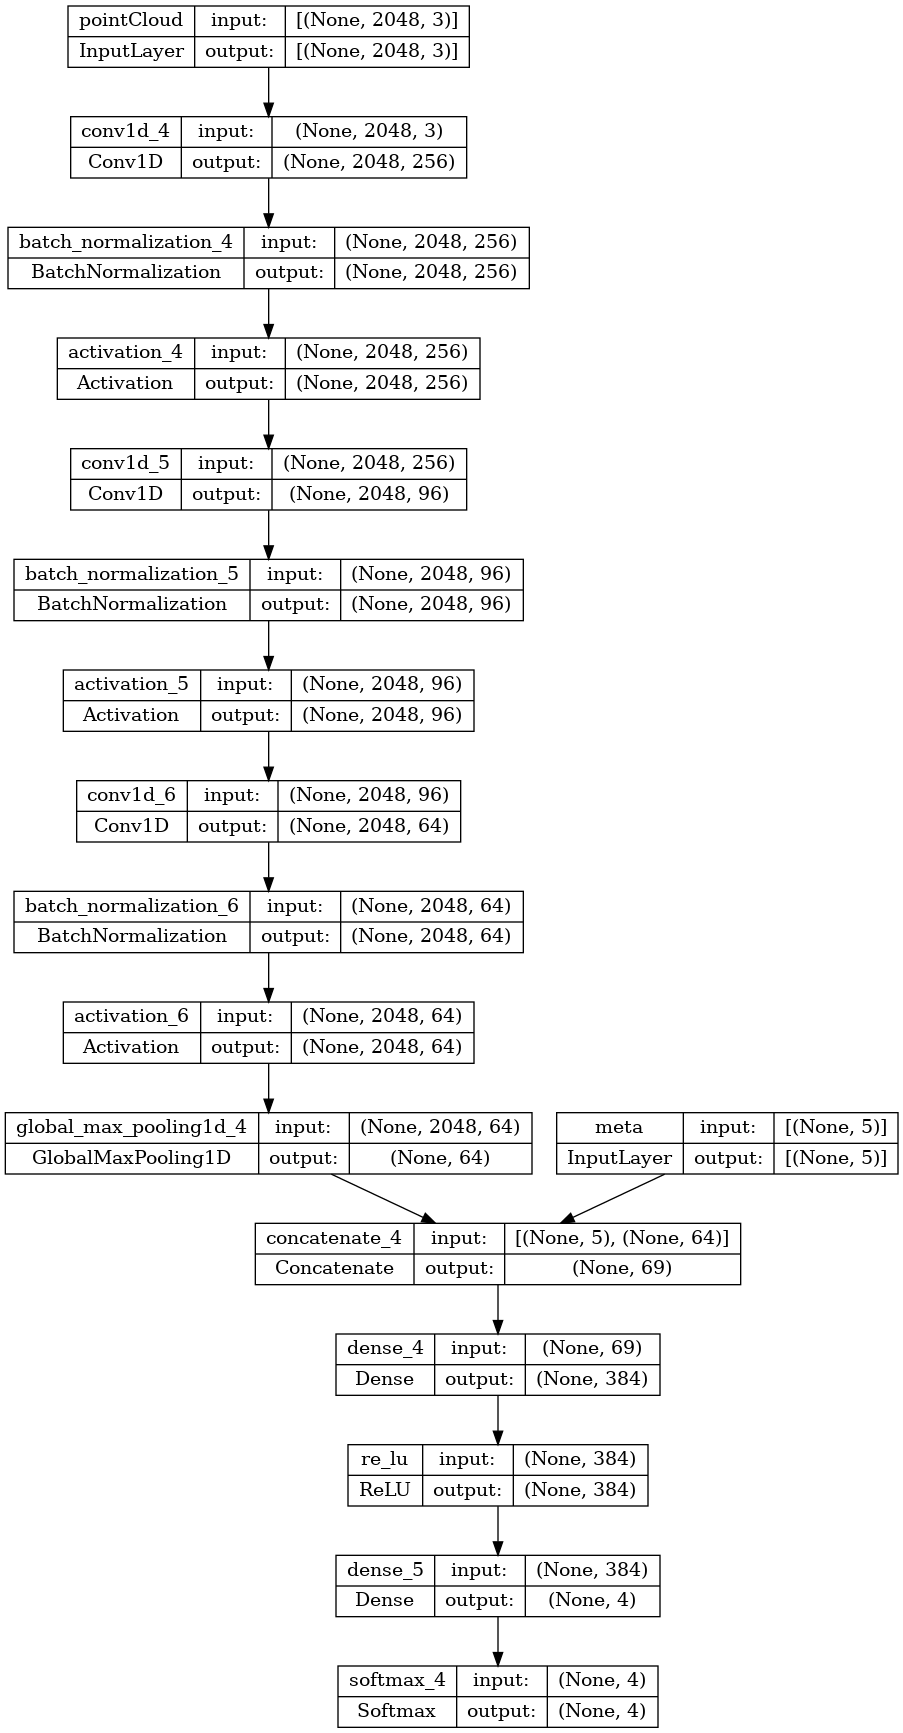

In [197]:
loaded_study = optuna.load_study(study_name='office10_is_test', storage='sqlite:///'+db_path)

best_trial = loaded_study.best_trial
best_model = total_model_builder(best_trial)
keras.utils.plot_model(best_model, show_shapes=True)

In [236]:
import pandas as pd

def plot_history(history:dict, ymax:float=None):
    history_df = pd.DataFrame(history)
    
    loss_df = history_df[["loss", "val_loss"]]
    loss_df.plot()
    plt.xlabel("epochs")
    plt.ylabel("Loss (categorical_crossentropy)")
    if ymax is not None:
        plt.ylim(0., ymax)
    plt.show()

    acc_df = history_df[["sparse_categorical_accuracy", "val_sparse_categorical_accuracy"]]
    acc_df.plot()
    plt.xlabel("epochs")
    plt.ylabel("Accuracy")
    plt.ylim(0., 1.)
    plt.show()

## チューニングの再現

In [199]:
from keras.callbacks import TensorBoard
import datetime

tb_log_dir = "/mnt/MachineLearning/tblogs/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
print("tb_log_dir = ", tb_log_dir)
# db_path = '/mnt/MachineLearning/OptunaLog/optuna_study.db'

"""
チューニング結果を確認するため、改めてチューニング時と同じデータセットで学習
最終テストは行わない
"""
tuning_dict = {}

for test_office in test_office_list:
    print("test_office:", test_office)
    
    fit_office_list = [office for office in office_list if office != test_office]
    
    val_office_list = [val_office for val_office in test_office_list if val_office != test_office]
    val_office = val_office_list[0]

    train_office_list = [office for office in fit_office_list if office != val_office]
    
    X_dict_train, y_train = get_officeDataset(train_office_list, df_ml, pointCloud_dict,
                                              objective_col="countTimeMean_bin", shuffle=True)
    X_dict_val, y_val = get_officeDataset([val_office], df_ml, pointCloud_dict,
                                          objective_col="countTimeMean_bin", shuffle=False)
    
    study_name = test_office + '_is_test'

    loaded_study = optuna.load_study(study_name=study_name, storage='sqlite:///'+db_path)

    best_trial = loaded_study.best_trial
    best_model = total_model_builder(best_trial)
    
    print(best_model.summary())
    
    tuning_history = best_model.fit(
        X_dict_train, y_train,
        validation_data = (X_dict_val, y_val),
        epochs = 200,
        batch_size=loaded_study.best_params["batch_size"],
        callbacks = [
            EarlyStopping(monitor='val_loss', min_delta=0.0, patience=10),
            TensorBoard(log_dir=tb_log_dir+"/"+test_office, histogram_freq=1, write_graph=True)
        ],
        # verbose=False,
    )

    tuning_dict[test_office] = {"best_trial":best_trial, "history":tuning_history}


tb_log_dir =  /mnt/MachineLearning/tblogs/20221227-103937
test_office: office1
Model: "predictionnet"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 pointCloud (InputLayer)        [(None, 2048, 3)]    0           []                               
                                                                                                  
 conv1d_7 (Conv1D)              (None, 2048, 32)     128         ['pointCloud[0][0]']             
                                                                                                  
 batch_normalization_7 (BatchNo  (None, 2048, 32)    128         ['conv1d_7[0][0]']               
 rmalization)                                                                                     
                                                                                                  
 activa

In [200]:
tb_log_dir

'/mnt/MachineLearning/tblogs/20221227-103937'

In [201]:
%load_ext tensorboard

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


In [202]:
%tensorboard  --logdir $tb_log_dir

Best trial (test for office1):
  Value: 0.4553571417927742
  Params: 
    activation: ELU
    batch_size: 128
    conv_layers: 1
    dense_layers: 1
    dropout: 0.5
    filters-0: 32
    lr: 0.0024150241972611614
    units-0: 256


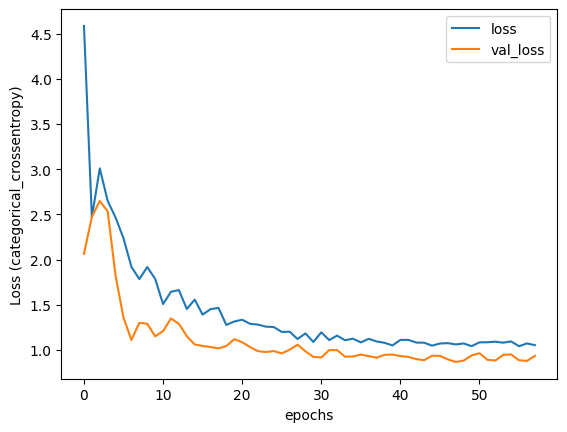

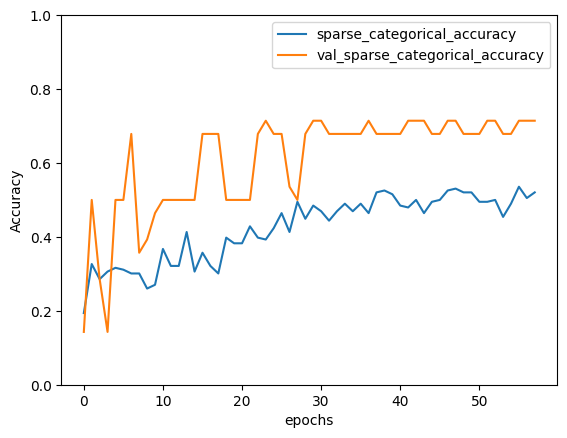

Best trial (test for office7):
  Value: 0.3232600726187229
  Params: 
    batch_size: 1
    conv_layers: 3
    dense_layers: 0
    filters-0: 224
    filters-1: 192
    filters-2: 128
    lr: 0.015616845589064853


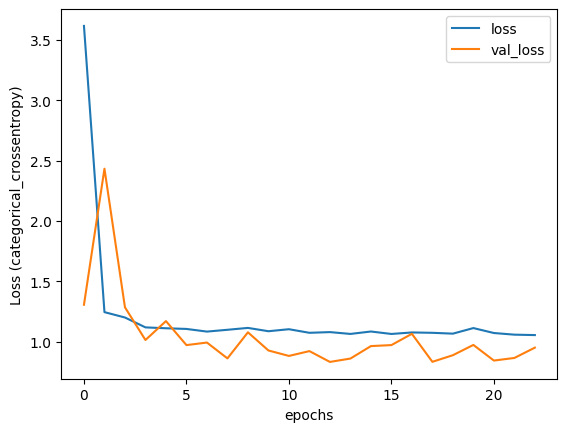

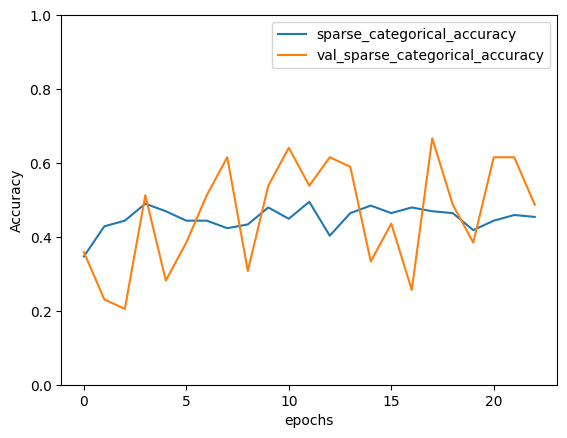

Best trial (test for office10):
  Value: 0.47367216646671295
  Params: 
    activation: ReLU
    batch_size: 32
    conv_layers: 3
    dense_layers: 1
    dropout: None
    filters-0: 256
    filters-1: 96
    filters-2: 64
    lr: 0.019199304634456484
    units-0: 384


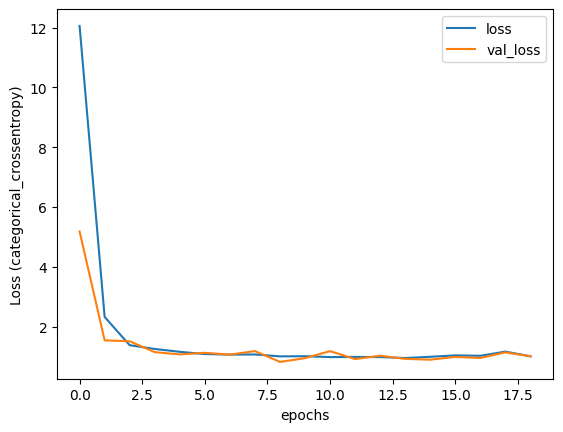

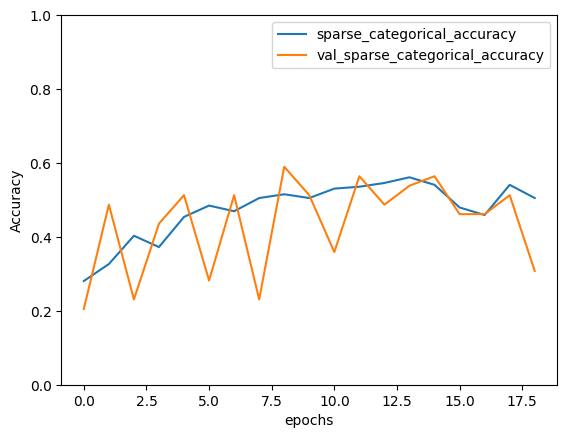

Best trial (test for office16):
  Value: 0.37934981659054756
  Params: 
    batch_size: 32
    conv_layers: 1
    dense_layers: 0
    filters-0: 224
    lr: 0.07717814795278011


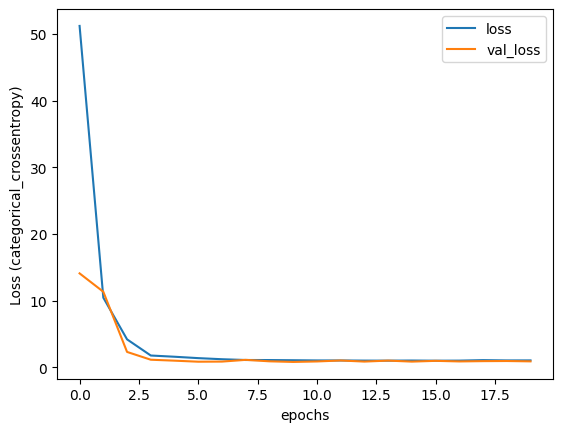

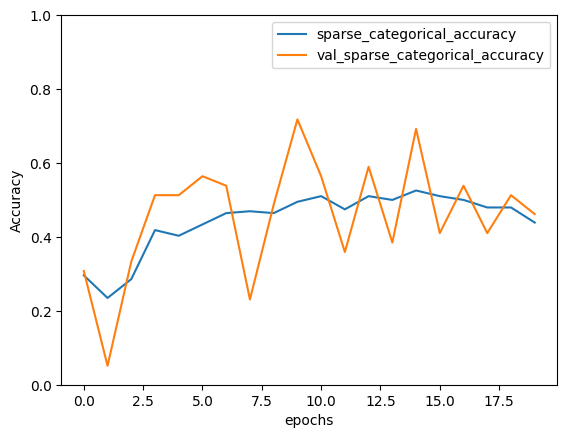

Best trial (test for office28):
  Value: 0.5144230797886848
  Params: 
    batch_size: 128
    conv_layers: 1
    dense_layers: 0
    filters-0: 64
    lr: 0.0001410123404518543


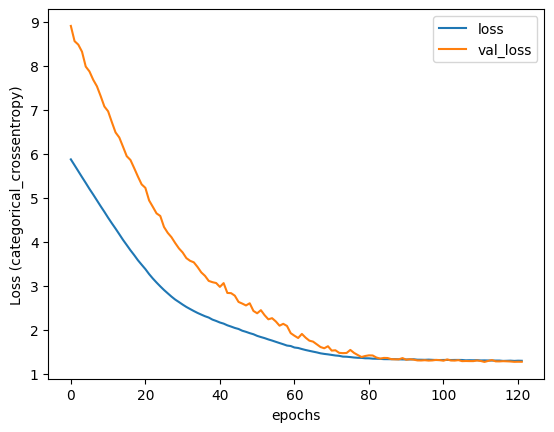

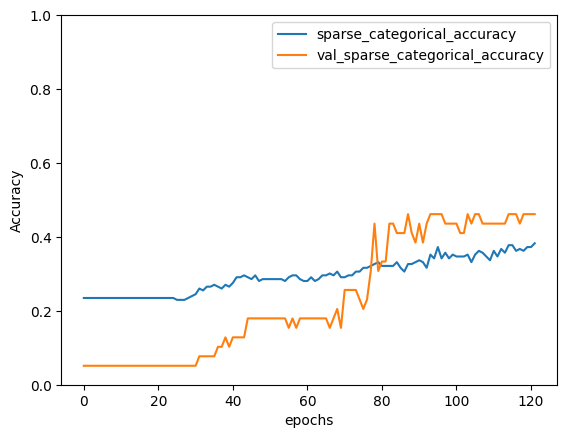

In [237]:
for test_office, result_dict in tuning_dict.items():
    print(f"Best trial (test for {test_office}):")
    best_trial = result_dict["best_trial"]

    print("  Value: {}".format(best_trial.value))

    print("  Params: ")
    for key, value in best_trial.params.items():
        print("    {}: {}".format(key, value))
        
    plot_history(result_dict["history"].history)

## 最終テスト

In [204]:
"""
最終テスト
チューナーに与えなかったオフィスを使って検証
"""

# db_path = '/mnt/MachineLearning/OptunaLog/optuna_study.db'

test_dict = {}

for test_office in test_office_list:
    print("test_office:", test_office)
    fit_office_list = [office for office in office_list if office != test_office]
    
    X_dict_fit, y_fit = get_officeDataset(fit_office_list, df_ml, pointCloud_dict,
                                          objective_col="countTimeMean_bin", shuffle=True)
    X_dict_test, y_test = get_officeDataset([test_office], df_ml, pointCloud_dict,
                                            objective_col="countTimeMean_bin", shuffle=False)
    
    study_name = test_office + '_is_test'

    loaded_study = optuna.load_study(study_name=study_name, storage='sqlite:///'+db_path)

    best_trial = loaded_study.best_trial
    best_model = total_model_builder(best_trial)

    test_history = best_model.fit(
        X_dict_fit, y_fit,
        batch_size = loaded_study.best_params["batch_size"],
        epochs = 200,
        validation_data = (X_dict_test, y_test),
        # callbacks=[EarlyStopping(monitor='val_loss', min_delta=0.0, patience=20)]
    )
    
    test_dict[test_office] = {"best_trial":best_trial, "history":test_history}


test_office: office1
Epoch 1/200
2/2 [==============================] - 1s 215ms/step - loss: 2.6292 - sparse_categorical_accuracy: 0.2768 - val_loss: 2.2069 - val_sparse_categorical_accuracy: 0.2821
Epoch 2/200
2/2 [==============================] - 0s 31ms/step - loss: 2.4481 - sparse_categorical_accuracy: 0.2723 - val_loss: 2.0134 - val_sparse_categorical_accuracy: 0.2051
Epoch 3/200
2/2 [==============================] - 0s 32ms/step - loss: 2.2220 - sparse_categorical_accuracy: 0.3125 - val_loss: 1.3746 - val_sparse_categorical_accuracy: 0.3333
Epoch 4/200
2/2 [==============================] - 0s 31ms/step - loss: 2.1071 - sparse_categorical_accuracy: 0.2812 - val_loss: 1.3052 - val_sparse_categorical_accuracy: 0.2051
Epoch 5/200
2/2 [==============================] - 0s 31ms/step - loss: 1.9273 - sparse_categorical_accuracy: 0.2768 - val_loss: 1.7172 - val_sparse_categorical_accuracy: 0.2051
Epoch 6/200
2/2 [==============================] - 0s 31ms/step - loss: 1.8676 - sparse_

Best trial (test for office1):
  Value: 0.4553571417927742
  Params: 
    activation: ELU
    batch_size: 128
    conv_layers: 1
    dense_layers: 1
    dropout: 0.5
    filters-0: 32
    lr: 0.0024150241972611614
    units-0: 256


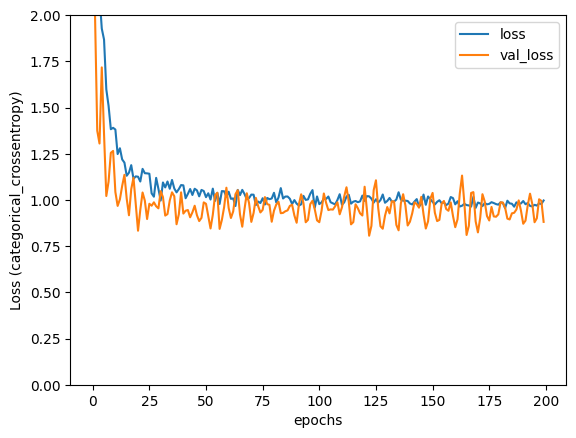

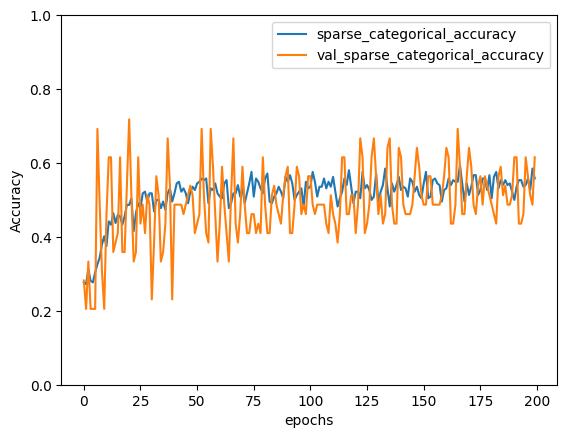

Best trial (test for office7):
  Value: 0.3232600726187229
  Params: 
    batch_size: 1
    conv_layers: 3
    dense_layers: 0
    filters-0: 224
    filters-1: 192
    filters-2: 128
    lr: 0.015616845589064853


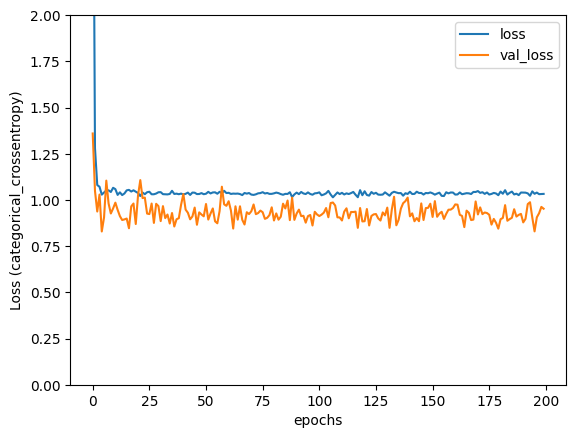

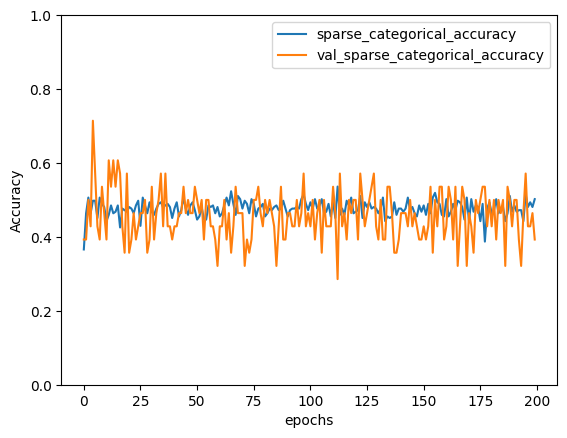

Best trial (test for office10):
  Value: 0.47367216646671295
  Params: 
    activation: ReLU
    batch_size: 32
    conv_layers: 3
    dense_layers: 1
    dropout: None
    filters-0: 256
    filters-1: 96
    filters-2: 64
    lr: 0.019199304634456484
    units-0: 384


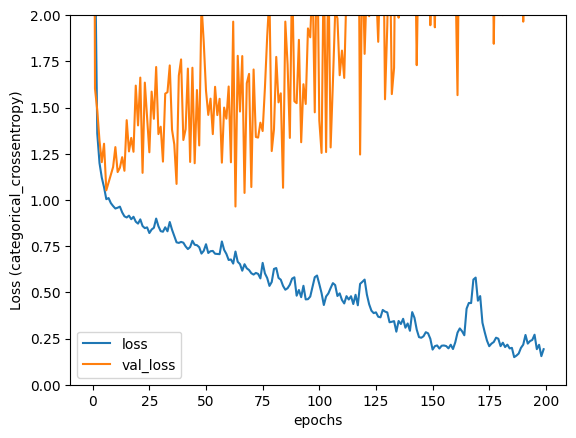

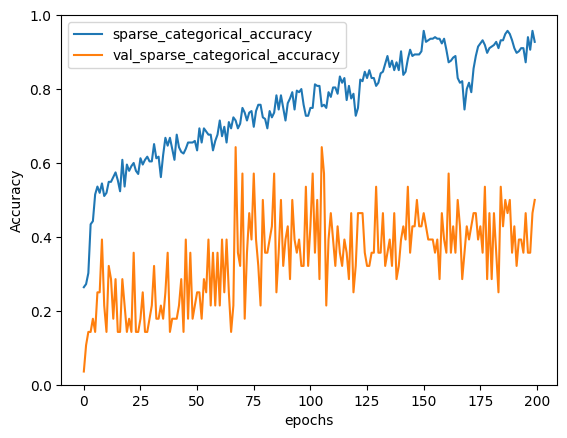

Best trial (test for office16):
  Value: 0.37934981659054756
  Params: 
    batch_size: 32
    conv_layers: 1
    dense_layers: 0
    filters-0: 224
    lr: 0.07717814795278011


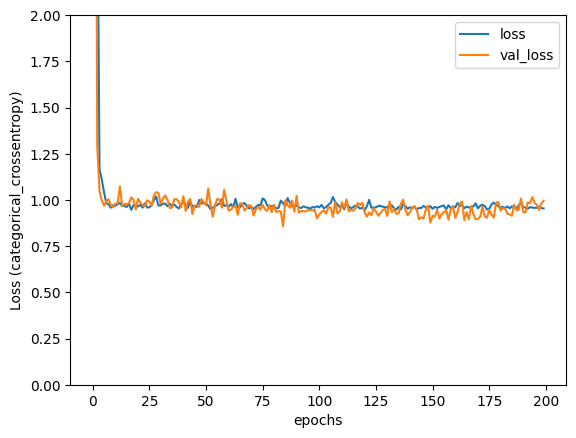

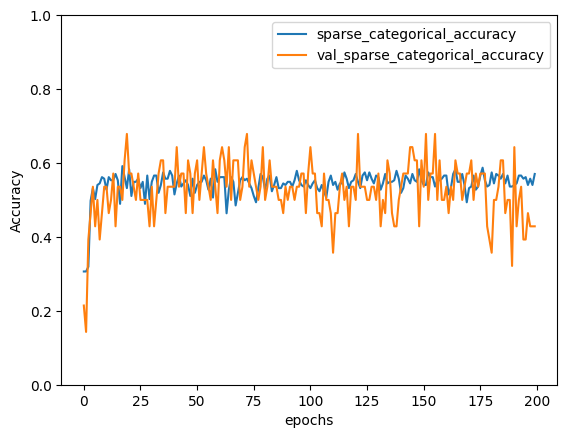

Best trial (test for office28):
  Value: 0.5144230797886848
  Params: 
    batch_size: 128
    conv_layers: 1
    dense_layers: 0
    filters-0: 64
    lr: 0.0001410123404518543


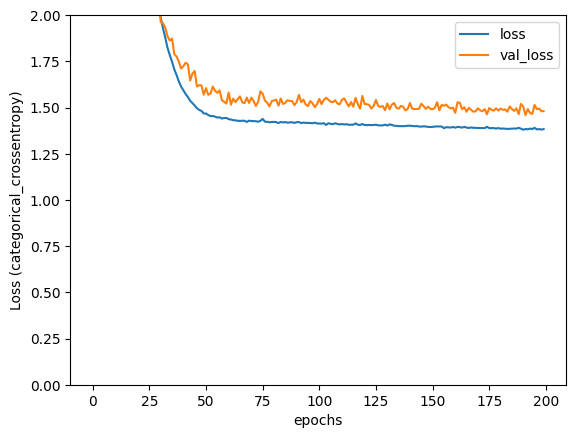

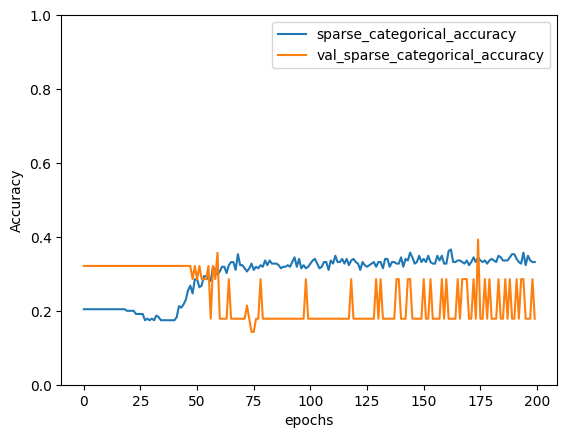

In [238]:
for test_office, result_dict in test_dict.items():
    print(f"Best trial (test for {test_office}):")
    best_trial = result_dict["best_trial"]

    print("  Value: {}".format(best_trial.value))

    print("  Params: ")
    for key, value in best_trial.params.items():
        print("    {}: {}".format(key, value))
        
        
    plot_history(result_dict["history"].history, ymax=2.)

In [220]:
"""
最終テスト
only office1
"""

test_office="office1"

print("test_office:", test_office)
fit_office_list = [office for office in office_list if office != test_office]
    
X_dict_fit, y_fit = get_officeDataset(fit_office_list, df_ml, pointCloud_dict,
                                      objective_col="countTimeMean_bin", shuffle=True)
X_dict_test, y_test = get_officeDataset([test_office], df_ml, pointCloud_dict,
                                      objective_col="countTimeMean_bin", shuffle=False)

study_name = test_office + '_is_test'

loaded_study = optuna.load_study(study_name=study_name, storage='sqlite:///'+db_path)

best_trial = loaded_study.best_trial
best_model = total_model_builder(best_trial)

test_history = best_model.fit(
    X_dict_fit, y_fit,
    batch_size = loaded_study.best_params["batch_size"],
    epochs = 200,
    validation_data = (X_dict_test, y_test),
    callbacks=[EarlyStopping(monitor='val_loss', min_delta=0.0, patience=20, restore_best_weights=True,)]
)



test_office: office1
Epoch 1/200
2/2 [==============================] - 1s 247ms/step - loss: 2.9381 - sparse_categorical_accuracy: 0.2946 - val_loss: 2.8590 - val_sparse_categorical_accuracy: 0.2308
Epoch 2/200
2/2 [==============================] - 0s 40ms/step - loss: 2.8582 - sparse_categorical_accuracy: 0.2723 - val_loss: 1.3998 - val_sparse_categorical_accuracy: 0.3333
Epoch 3/200
2/2 [==============================] - 0s 41ms/step - loss: 2.2456 - sparse_categorical_accuracy: 0.3080 - val_loss: 1.7041 - val_sparse_categorical_accuracy: 0.4359
Epoch 4/200
2/2 [==============================] - 0s 57ms/step - loss: 2.3324 - sparse_categorical_accuracy: 0.3527 - val_loss: 1.9186 - val_sparse_categorical_accuracy: 0.2051
Epoch 5/200
2/2 [==============================] - 0s 44ms/step - loss: 2.0197 - sparse_categorical_accuracy: 0.3348 - val_loss: 1.6773 - val_sparse_categorical_accuracy: 0.2051
Epoch 6/200
2/2 [==============================] - 0s 39ms/step - loss: 1.8710 - sparse_

  Value: 0.5144230797886848
  Params: 
    batch_size: 128
    conv_layers: 1
    dense_layers: 0
    filters-0: 64
    lr: 0.0001410123404518543


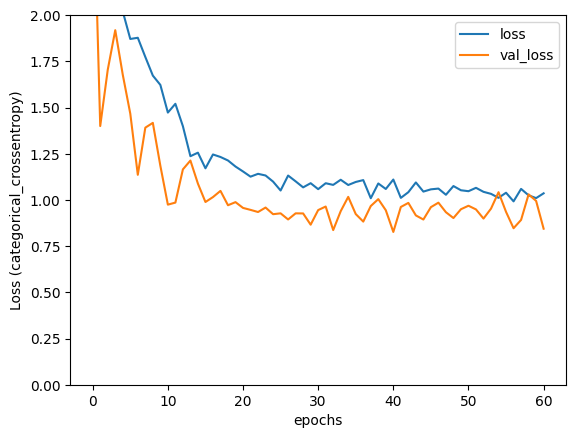

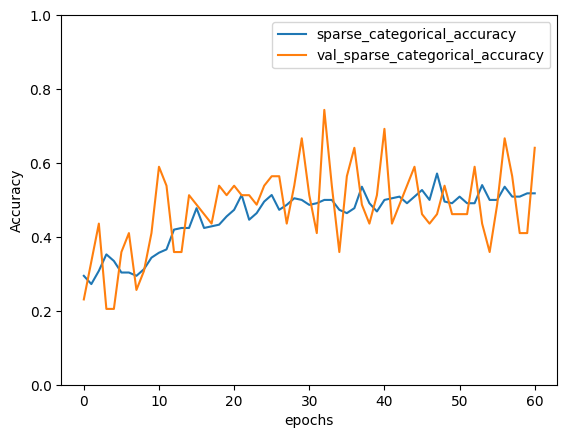

In [239]:
print("  Value: {}".format(best_trial.value))

print("  Params: ")
for key, value in best_trial.params.items():
    print("    {}: {}".format(key, value))

plot_history(test_history.history, ymax=2.)

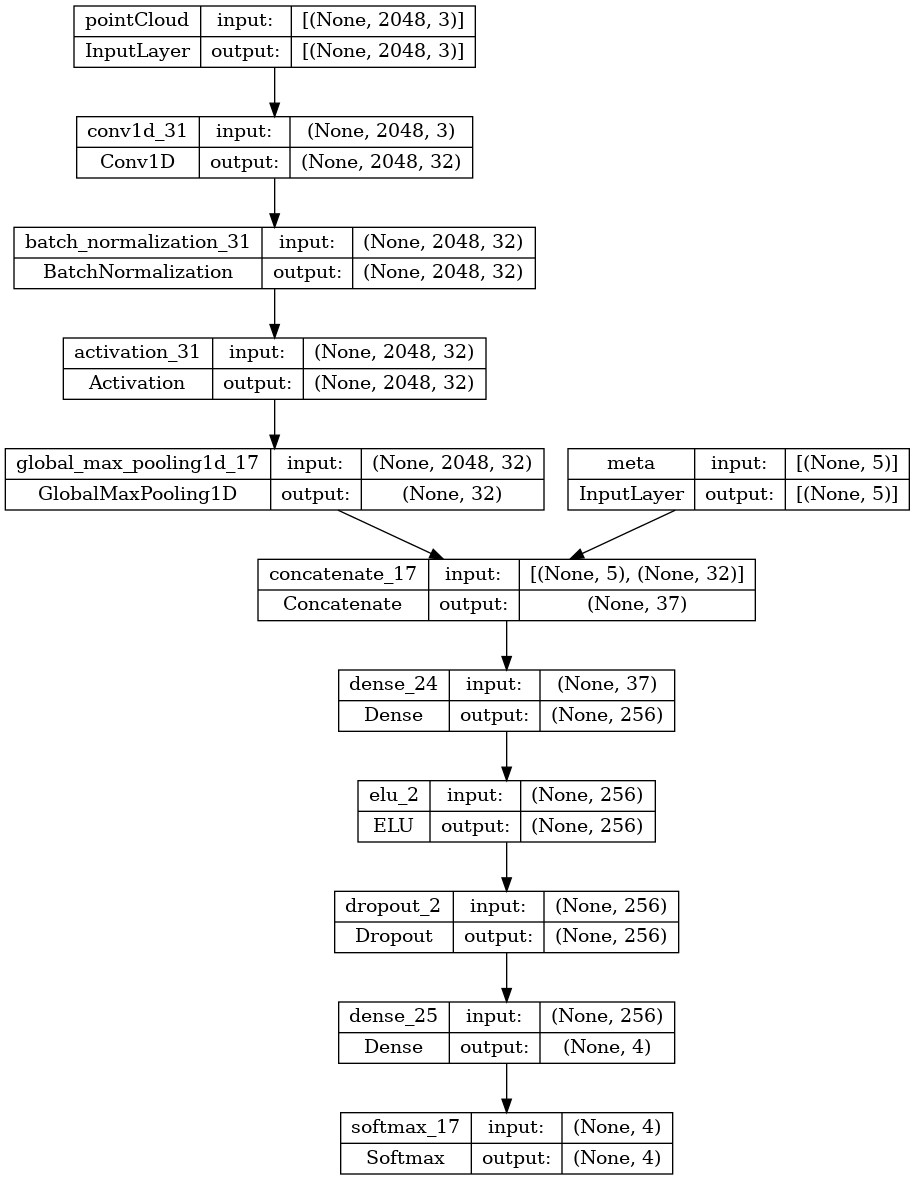

In [240]:
keras.utils.plot_model(best_model, show_shapes=True)

In [223]:
y_fit_pred_softmax = best_model.predict(X_dict_fit)
y_test_pred_softmax = best_model.predict(X_dict_test)

2/2 [==============================] - 0s 2ms/step


In [231]:
y_fit_pred = y_fit_pred_softmax.argmax(axis=1)
y_test_pred = y_test_pred_softmax.argmax(axis=1)

In [226]:
result_df = pd.DataFrame({"correct":y_test, "predict":y_test_pred})
result_df["match"] = (result_df["correct"] == result_df["predict"])
result_df

,correct,predict,match
case_name,,,
office1_0_0,3,3,True
office1_0_123_aout,3,3,True
office1_0_123_bout,3,3,True
office1_0_164_aout,2,3,False
office1_0_164_bout,3,3,True
office1_0_205_aout,3,3,True
office1_0_205_bout,3,3,True
office1_0_246_aout,3,3,True
office1_0_246_bout,3,3,True


In [233]:
from sklearn.metrics import accuracy_score

print("train_acc: ", accuracy_score(y_fit, y_fit_pred))
print("test_acc: ", accuracy_score(y_test, y_test_pred))

train_acc:  0.5625
test_acc:  0.6923076923076923


<AxesSubplot:>

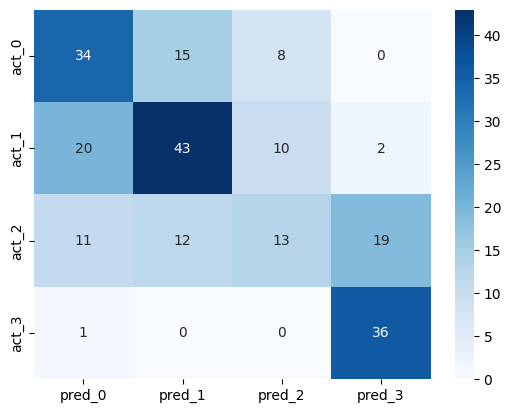

In [234]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

labels = [0, 1, 2, 3] # ラベルの順序を指定
cm = confusion_matrix(y_fit, y_fit_pred, labels=labels)
columns_labels = ["pred_" + str(l) for l in labels]
index_labels = ["act_" + str(l) for l in labels]
cm = pd.DataFrame(cm, columns=columns_labels, index=index_labels)

sns.heatmap(cm, annot=True, cmap='Blues')

<AxesSubplot:>

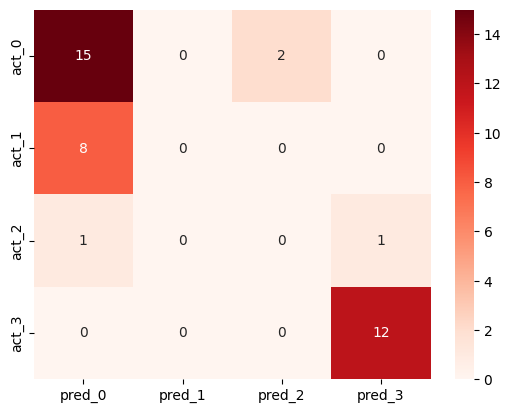

In [235]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

labels = [0, 1, 2, 3] # ラベルの順序を指定
cm = confusion_matrix(y_test, y_test_pred, labels=labels)
columns_labels = ["pred_" + str(l) for l in labels]
index_labels = ["act_" + str(l) for l in labels]
cm = pd.DataFrame(cm, columns=columns_labels, index=index_labels)

sns.heatmap(cm, annot=True, cmap='Reds')

In [344]:
y_fit.to_numpy().shape

(140,)

In [ ]:
X_dict_fit["meta"].index

In [ ]:
# #正規表現で書いており、.extractはパターンにマッチした最初の文字列のみを抜き出す。office+0-9までの数字1桁または2桁を探索
# office_array = X_index.str.extract("(office+[0-9]{1,2})").to_numpy()

#残差プロット
show_office_residual_plot(train_x=y_fit_pred, train_y=y_fit_pred - y_fit.to_numpy().reshape((-1,1)), 
                            test_x=y_test_pred, test_y=y_test_pred - y_test.to_numpy().reshape((-1,1)), 
                            office_array=X_dict_fit["meta"].index
                                  )

In [133]:
X_dict_fit

{'meta': array([[-1.38455178,  1.2655225 , -0.87131147,  1.14769521, -0.39824886],
        [ 1.27873108,  1.2655225 ,  1.14769521, -0.87131147, -0.39824886],
        [-1.38455178,  1.2655225 ,  1.14769521, -0.87131147, -0.39824886],
        ...,
        [ 0.44645519,  1.2655225 , -0.87131147,  1.14769521, -0.39824886],
        [ 1.27873108, -0.68946029, -0.87131147,  1.14769521, -0.39824886],
        [ 0.44645519, -1.66695169, -0.87131147, -0.87131147,  2.51099278]]),
 'pointCloud_aircon': array([[[ 1.3765091 , -2.0106473 , -0.52029866],
         [ 1.3765091 , -1.8412895 , -0.52029866],
         [ 1.3765091 , -1.7396748 , -0.52029866],
         ...,
         [ 2.7313716 , -0.92675734, -0.52029866],
         [ 2.7313716 , -0.8251426 , -0.52029866],
         [ 2.7313716 , -0.6557848 , -0.52029866]],
 
        [[-0.6557848 , -0.99450046, -0.52029866],
         [-0.6557848 , -0.8251426 , -0.52029866],
         [-0.6557848 , -0.72352785, -0.52029866],
         ...,
         [ 0.6990778 ,  0

In [85]:
df_total

,office,aircon,ventilation,n_from2sec,n_from2sec/S,countTimeMean_sit,countTimeMean_sit2stand,exhaust_a,exhaust_b,exhaust_off,n_from2sec/S_bin,countTimeMean_bin
case_name,,,,,,,,,,,,
office2_0_0,office2,0.0,0.0,6739.4,204.224242,902.212978,3665.252246,0,0,1,3,3
office2_0_164_aout,office2,0.0,164.0,7865.4,238.345455,594.272879,3491.917804,1,0,0,3,3
office2_0_164_bout,office2,0.0,164.0,6049.8,183.327273,432.678869,2354.737770,0,1,0,2,2
office2_0_246_aout,office2,0.0,246.0,7934.4,240.436364,326.691514,2902.480532,1,0,0,3,3
office2_0_246_bout,office2,0.0,246.0,7662.0,232.181818,562.535441,2757.177704,0,1,0,3,3
...,...,...,...,...,...,...,...,...,...,...,...,...
office3_960_164_bout,office3,960.0,164.0,5117.4,155.072727,779.372047,3209.723128,0,1,0,1,3
office3_960_246_aout,office3,960.0,246.0,4428.0,134.181818,1662.486855,3671.024626,1,0,0,0,3
office3_960_246_bout,office3,960.0,246.0,3890.0,117.878788,1343.338436,3968.834276,0,1,0,0,3


In [94]:
def plot_RoI_level(classification_level):
    #オフィスごとのRoI_levelをカウントしてみる
    unique_office = np.unique(office_list)
    num_RoI_level = np.zeros((len(unique_office), classification_level))#ラベルのカウント数を保存するリスト

    #各オフィスにアクセスするループ
    count = 0#ループの回数をカウントする
    for selected_office in unique_office:
        df_selected_office = df_total[df_total["office"]==selected_office]
        #各ラベルの個数カウント
        for i in range(classification_level):
            num_RoI_level[count, i] = (df_selected_office['countTimeMean_bin'] == i).sum()

        count += 1


    #グラフの描画
    colors = ("steelblue", "limegreen", "gold","orange","crimson")
    plt.figure(figsize=[12, 8]) 
    virtical = num_RoI_level#縦軸の値
    horizontal = np.arange(unique_office.shape[0])#横軸の値
    for level in range(classification_level):
        plt.bar(x=horizontal, height=virtical[:, level], tick_label=unique_office, bottom=virtical[:, :level].sum(axis=1), color=colors[level])

    plt.ylabel("count")
    plt.xlabel("office name")
    plt.legend(np.arange(classification_level), loc="best")
    plt.tight_layout()
    plt.grid()
    plt.show()

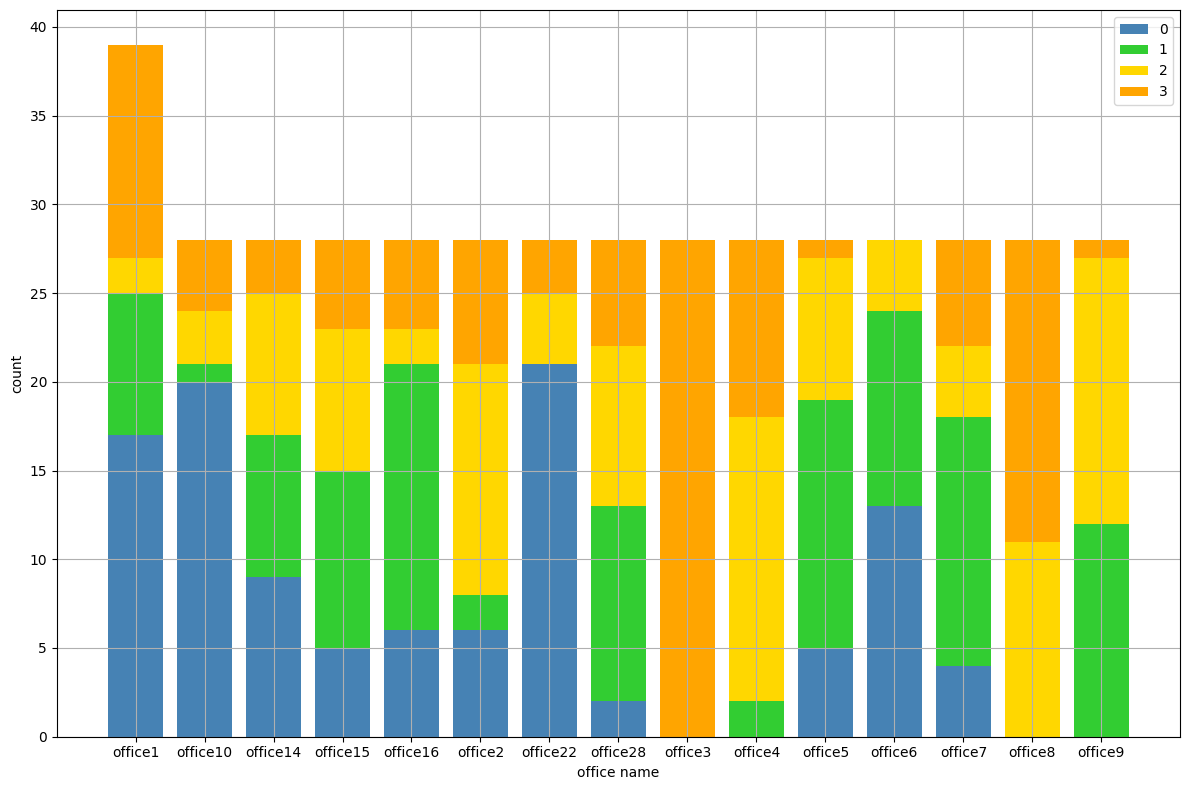

In [95]:
plot_RoI_level(4)

In [78]:
import gc
 
gc.collect()

8887

In [79]:
from keras.backend import clear_session

# Clear clutter from previous Keras session graphs.
clear_session()